## Perceptron

Nomes: Fernando Veizaga, Gabriel Siqueira

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Iris_Data.csv', sep=',', header=0)

classes = np.repeat(["[1 0 0]", "[0 1 0]", "[0 0 1]"], 50)
data_with_classes = data.assign(Class=classes)
data_with_classes.to_csv("Iris_Data_Classes.csv", index=False)
data = pd.read_csv('Iris_Data_Classes.csv', sep=',', header=0)
data

sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

       Class  
0    [1 0 0]  
1    [1 0 0]  
2    [1 0 0]  
3    [1 0 0]  
4    [1 0 0]  
..       ...  
145  [0 0 1]  
146  [0 0 1]  
147  [0 0 1]  
148  [0 0 1]  
149  [0 0 1]  

[150 rows x 6 columns]

In [2]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

X_train = train_data.iloc[:, :-2].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-2].values
y_test = test_data.iloc[:, -1].values

np.transpose(X_train)

array([[5.5, 6.3, 6.4, 6.6, 7.2, 5.7, 7.6, 5.6, 5.1, 7.7, 5.8, 5.2, 5. ,
        5.1, 5. , 6.3, 4.8, 5. , 5.1, 5.6, 5.1, 5.7, 7.7, 4.6, 6.2, 5.7,
        5.5, 6. , 5.8, 6. , 5.4, 6.2, 5.5, 5.4, 5. , 6.4, 5. , 5. , 5.5,
        6.7, 4.9, 5.8, 5. , 5. , 5.9, 5.1, 6.9, 6. , 6.1, 7.7, 5.5, 4.4,
        4.3, 6. , 7.2, 4.6, 5.1, 4.4, 6.3, 6.3, 4.6, 6.8, 6.3, 4.7, 6.1,
        6.5, 6.2, 7. , 6.4, 5.1, 6.9, 5.9, 6.5, 5.7, 5.2, 6.1, 4.5, 6.6,
        5.5, 5.3, 5.6, 7.3, 6.7, 5.1, 4.9, 6.7, 7.2, 4.9, 6.7, 4.9, 6.9,
        7.4, 6.3, 5.7, 6.5, 6.3, 6.4, 5.6, 5.9, 5.4, 6.1, 4.9, 5.8, 5.8,
        7.1],
       [2.4, 2.8, 3.1, 3. , 3.6, 2.9, 3. , 3. , 3.5, 2.8, 2.7, 3.4, 3.5,
        3.8, 2. , 2.7, 3.4, 3. , 3.3, 2.7, 3.4, 3. , 3.8, 3.2, 2.9, 2.5,
        4.2, 3. , 2.7, 2.2, 3. , 3.4, 2.3, 3.9, 2.3, 2.7, 3.3, 3.2, 2.4,
        3. , 3.1, 2.8, 3.4, 3.5, 3.2, 2.5, 3.2, 2.7, 2.6, 3. , 2.5, 2.9,
        3. , 2.2, 3.2, 3.1, 3.5, 3. , 2.5, 3.4, 3.4, 3. , 3.3, 3.2, 2.9,
        2.8, 2.8, 3.2, 3.2, 3.8, 3.1,

In [3]:
X_train

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2

In [4]:
y_train

array(['[0 1 0]', '[0 0 1]', '[0 0 1]', '[0 1 0]', '[0 0 1]', '[0 1 0]',
       '[0 0 1]', '[0 1 0]', '[1 0 0]', '[0 0 1]', '[0 1 0]', '[1 0 0]',
       '[1 0 0]', '[1 0 0]', '[0 1 0]', '[0 0 1]', '[1 0 0]', '[1 0 0]',
       '[1 0 0]', '[0 1 0]', '[1 0 0]', '[0 1 0]', '[0 0 1]', '[1 0 0]',
       '[0 1 0]', '[0 0 1]', '[1 0 0]', '[0 0 1]', '[0 0 1]', '[0 1 0]',
       '[0 1 0]', '[0 0 1]', '[0 1 0]', '[1 0 0]', '[0 1 0]', '[0 0 1]',
       '[1 0 0]', '[1 0 0]', '[0 1 0]', '[0 1 0]', '[1 0 0]', '[0 0 1]',
       '[1 0 0]', '[1 0 0]', '[0 1 0]', '[0 1 0]', '[0 0 1]', '[0 1 0]',
       '[0 0 1]', '[0 0 1]', '[0 1 0]', '[1 0 0]', '[1 0 0]', '[0 0 1]',
       '[0 0 1]', '[1 0 0]', '[1 0 0]', '[1 0 0]', '[0 1 0]', '[0 0 1]',
       '[1 0 0]', '[0 0 1]', '[0 0 1]', '[1 0 0]', '[0 1 0]', '[0 1 0]',
       '[0 0 1]', '[0 1 0]', '[0 0 1]', '[1 0 0]', '[0 0 1]', '[0 1 0]',
       '[0 0 1]', '[0 1 0]', '[0 1 0]', '[0 1 0]', '[1 0 0]', '[0 1 0]',
       '[0 1 0]', '[1 0 0]', '[0 1 0]', '[0 0 1]', 

In [5]:
for i in range (0,len(y_train)):
    s = y_train[i].replace("[", "").replace("]", "")
    elements = s.split(" ")
    y_train[i] = np.array([int(e) for e in elements])
    print(y_train[i])

y_train

[0 1 0]
[0 0 1]
[0 0 1]
[0 1 0]
[0 0 1]
[0 1 0]
[0 0 1]
[0 1 0]
[1 0 0]
[0 0 1]
[0 1 0]
[1 0 0]
[1 0 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[1 0 0]
[1 0 0]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 0 1]
[0 0 1]
[0 1 0]
[0 1 0]
[0 0 1]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[1 0 0]
[0 1 0]
[0 1 0]
[1 0 0]
[0 0 1]
[1 0 0]
[1 0 0]
[0 1 0]
[0 1 0]
[0 0 1]
[0 1 0]
[0 0 1]
[0 0 1]
[0 1 0]
[1 0 0]
[1 0 0]
[0 0 1]
[0 0 1]
[1 0 0]
[1 0 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 0 1]
[0 0 1]
[1 0 0]
[0 1 0]
[0 1 0]
[0 0 1]
[0 1 0]
[0 0 1]
[1 0 0]
[0 0 1]
[0 1 0]
[0 0 1]
[0 1 0]
[0 1 0]
[0 1 0]
[1 0 0]
[0 1 0]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[0 0 1]
[1 0 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[0 0 1]
[0 1 0]
[0 0 1]
[0 1 0]
[0 1 0]
[0 0 1]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]
[1 0 0]
[0 1 0]
[0 0 1]


array([array([0, 1, 0]), array([0, 0, 1]), array([0, 0, 1]),
       array([0, 1, 0]), array([0, 0, 1]), array([0, 1, 0]),
       array([0, 0, 1]), array([0, 1, 0]), array([1, 0, 0]),
       array([0, 0, 1]), array([0, 1, 0]), array([1, 0, 0]),
       array([1, 0, 0]), array([1, 0, 0]), array([0, 1, 0]),
       array([0, 0, 1]), array([1, 0, 0]), array([1, 0, 0]),
       array([1, 0, 0]), array([0, 1, 0]), array([1, 0, 0]),
       array([0, 1, 0]), array([0, 0, 1]), array([1, 0, 0]),
       array([0, 1, 0]), array([0, 0, 1]), array([1, 0, 0]),
       array([0, 0, 1]), array([0, 0, 1]), array([0, 1, 0]),
       array([0, 1, 0]), array([0, 0, 1]), array([0, 1, 0]),
       array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1]),
       array([1, 0, 0]), array([1, 0, 0]), array([0, 1, 0]),
       array([0, 1, 0]), array([1, 0, 0]), array([0, 0, 1]),
       array([1, 0, 0]), array([1, 0, 0]), array([0, 1, 0]),
       array([0, 1, 0]), array([0, 0, 1]), array([0, 1, 0]),
       array([0, 0, 1]),

In [6]:
NEURON = 3
INPUT = 4

### Função de ativação

In [25]:
import random

def f(X, bias, p):
    
    y = np.zeros((1, len(X)))
    
    if p == 1 :
        for i in range (0,len(X)):
            if(X[i] + bias[i] >= 0):
                y[0][i] = 1
            else:
                y[0][i] = 0
    
    elif p == 2:
        for i in range (0,len(X)):
            y[0][i] = 1/(1+np.exp(-(X[i]+bias[i])))
            
    elif p == 3:
        for i in range (0,len(X)):
            y[0][i] = 1/(1+np.exp(-(X[i]+bias[i])))
            
        maximo = y[0][0]
        for i in range (0, len(X)):
            if(y[0][i] >= maximo):
                maximo = y[0][i]
        
        aux = 0
        for i in range (0, len(X)):
            if(y[0][i] == maximo and aux == 0):
                y[0][i] = 1
                aux = i
        for j in range(0, len(X)):
            if(j != aux):
                y[0][j] = 0
                
    print(y)
               
    return y

def initialize(X):
    for i in range (0,len(X[0])):
        for j in range (0,len(X)):
            X[j][i] = random.uniform(-1, 1)
            
    return X

### Algoritmo de Aprendizagem

In [26]:
import array
W = np.zeros((NEURON,INPUT))
W = initialize(W)
bias = np.zeros((NEURON,1))
bias = initialize(bias)

def perceptron(it, alpha, X, D, p, W, bias):
    
    y = np.zeros((NEURON, 1))
    
    t = 0
    E = 1
    
    Epoca = np.zeros((it, 1))
    
    while t < it and E > 0:
        E = 0
        for i in range(0, len(np.transpose(X)[0])):
            
            y = np.array(f(np.matmul(W, np.transpose(X[i])), bias, p))
            
            
            e = np.array(np.array(D[i]) - y)
            
            W = W + alpha*(np.matmul(np.transpose(e),np.array([X[i]])))
            bias = bias + alpha*np.transpose(e)
            E = E + (np.matmul(e, np.transpose(e)))
            
        Epoca[t] = E
        t = t + 1
        
    return Epoca, W, bias

In [9]:
Epoca, W, bias = perceptron(1000, 0.1, X_train, y_train, 2, W, bias)

[[1.95770955e-04 2.44412365e-02 6.07733314e-01]]
[[5.45563727e-05 7.71814443e-01 8.57506451e-02]]
[[4.26380087e-05 4.95449190e-03 9.93856856e-01]]
[[4.30173962e-05 1.33543375e-02 9.77828881e-01]]
[[1.82585566e-05 9.26429043e-01 5.02475182e-02]]
[[1.13958620e-04 5.94038732e-03 9.90742693e-01]]
[[1.11669930e-05 7.52318871e-01 4.75983047e-01]]
[[1.21332779e-04 3.02645920e-03 9.67325513e-01]]
[[1.72708808e-04 8.92297891e-01 3.80966720e-03]]
[[0.0040943  0.01383714 0.1022615 ]]
[[0.00924276 0.05064109 0.98652873]]
[[0.00981265 0.94396756 0.00877918]]
[[0.4003877  0.21812111 0.00811725]]
[[0.89228187 0.07306763 0.01124377]]
[[0.93653925 0.07603275 0.20095196]]
[[0.20057097 0.83524752 0.10322424]]
[[0.08432414 0.04172473 0.402888  ]]
[[0.77637866 0.05358374 0.10346561]]
[[0.91847387 0.02789748 0.07191375]]
[[0.93869218 0.00905968 0.70781957]]
[[0.1614957  0.74009625 0.00151113]]
[[0.74306715 0.08805026 0.02471948]]
[[0.00555454 0.99115444 0.03071632]]
[[0.16749235 0.02140453 0.38416353]]
[[0.

[[3.09042585e-05 9.85748522e-01 9.76017652e-01]]
[[0.00423435 0.00103104 0.34543942]]
[[9.78154140e-01 6.33259576e-01 2.37290563e-08]]
[[2.05820503e-05 1.63666306e-01 7.82620362e-01]]
[[0.01069541 0.06244786 0.02179959]]
[[9.76681219e-01 8.38369992e-01 7.39238853e-08]]
[[9.84196528e-01 7.21136420e-02 9.06163345e-08]]
[[9.55284764e-01 2.55043438e-02 5.18248409e-07]]
[[0.01661719 0.32754627 0.05969694]]
[[0.00162463 0.78544675 0.41317584]]
[[9.22242598e-01 1.71161552e-02 2.25914667e-05]]
[[9.54870050e-01 5.41028917e-02 8.55333948e-06]]
[[9.67774133e-01 1.20518196e-02 1.34722041e-05]]
[[0.01720876 0.01068459 0.79938194]]
[[9.85782922e-01 6.14270781e-01 5.69019329e-08]]
[[0.02898389 0.13171198 0.01104484]]
[[2.46558552e-04 9.89703388e-01 6.17969641e-01]]
[[9.78784816e-01 1.41277756e-02 2.06753447e-06]]
[[0.02231902 0.00902076 0.16858826]]
[[9.66884547e-04 7.16817857e-01 9.82772626e-01]]
[[9.97258361e-01 1.32086753e-02 1.43546565e-08]]
[[0.00464281 0.01090198 0.7422467 ]]
[[0.00108044 0.013

[[1.31716455e-04 7.14604501e-01 9.06625849e-01]]
[[6.21270762e-05 8.36324581e-04 9.29507708e-01]]
[[9.73350734e-01 5.33930718e-03 6.10398072e-08]]
[[9.93246141e-01 1.65527864e-03 3.87514315e-09]]
[[9.82653286e-01 5.73329537e-03 5.46646182e-08]]
[[4.69265325e-04 8.10004045e-03 7.83252765e-01]]
[[1.77067064e-04 4.04805591e-02 4.25764714e-01]]
[[9.89964018e-01 8.35552451e-02 1.26513848e-08]]
[[1.89309087e-04 3.39875311e-01 9.21943886e-01]]
[[4.17176163e-05 1.07660309e-03 9.99716610e-01]]
[[9.90770518e-01 3.79765781e-02 9.02246229e-09]]
[[0.00187944 0.06005731 0.29430735]]
[[0.0025439  0.99143056 0.01408446]]
[[9.55256526e-04 9.66574683e-01 2.32984365e-01]]
[[0.00544563 0.0677832  0.2691682 ]]
[[3.49530318e-04 8.13835049e-01 9.94573459e-01]]
[[9.93802714e-01 1.60615830e-02 5.96191883e-09]]
[[3.26985635e-04 2.57398652e-02 9.73639653e-01]]
[[0.00862705 0.02653509 0.24321692]]
[[3.93115921e-04 9.60578366e-01 8.99945031e-01]]
[[0.03859882 0.15940363 0.00294601]]
[[0.00674365 0.56856917 0.29960

[[0.00674113 0.06321743 0.01140142]]
[[5.80008636e-04 6.99004416e-01 1.72700348e-01]]
[[9.87293335e-01 9.33110206e-01 2.25091883e-10]]
[[1.06123032e-04 5.77361671e-03 9.90612535e-01]]
[[9.93370058e-01 9.62512906e-02 1.01326364e-10]]
[[9.90574272e-01 1.03981444e-02 7.22000956e-10]]
[[0.00109406 0.00720861 0.26167943]]
[[9.20145620e-02 9.79091794e-01 3.85547271e-05]]
[[4.15328003e-05 9.80703942e-01 4.80841375e-01]]
[[1.04281545e-04 6.44959440e-02 9.63610291e-01]]
[[1.88896843e-05 9.97380429e-01 1.07082892e-01]]
[[1.16595063e-05 1.97656433e-02 9.88209116e-01]]
[[0.00257302 0.05993857 0.12030624]]
[[9.74970487e-01 7.01300513e-01 5.82624235e-09]]
[[9.93016850e-01 1.55349596e-01 7.69654680e-10]]
[[6.39942639e-05 7.61598076e-01 9.42083849e-01]]
[[2.84101850e-05 5.02481575e-04 9.38271555e-01]]
[[9.81090477e-01 4.31730703e-03 4.77768080e-09]]
[[9.95559154e-01 1.10791181e-03 2.05478136e-10]]
[[9.87598197e-01 4.65738266e-03 4.30076321e-09]]
[[2.32379842e-04 6.80175637e-03 7.61599387e-01]]
[[7.667

[[7.79610648e-06 8.68233868e-04 9.99937998e-01]]
[[9.95075226e-01 6.13622003e-02 6.10375057e-11]]
[[0.00066041 0.12369848 0.18351302]]
[[9.22490336e-04 9.94385943e-01 1.38978095e-02]]
[[2.97000067e-04 9.66995368e-01 3.88450544e-01]]
[[0.00226546 0.09547726 0.05312081]]
[[9.26656541e-05 6.32770854e-01 9.99249818e-01]]
[[9.96955223e-01 3.05946038e-02 6.58231221e-11]]
[[8.59253538e-05 7.23294164e-02 9.94766474e-01]]
[[0.00386736 0.04915779 0.25331832]]
[[1.12640105e-04 9.74781615e-01 9.71932453e-01]]
[[0.02368139 0.33952646 0.00073067]]
[[0.00342223 0.43201507 0.247603  ]]
[[9.47212954e-04 9.89900891e-01 5.71760121e-02]]
[[9.55244701e-01 9.92243706e-01 2.62524029e-09]]
[[0.00137649 0.9270949  0.00437468]]
[[7.48691991e-04 8.87855823e-01 1.68772599e-01]]
[[9.97711821e-01 3.28370464e-01 8.21093874e-13]]
[[0.00513294 0.26249094 0.00331491]]
[[3.45267982e-06 9.99832262e-01 9.57310942e-01]]
[[3.72991720e-05 1.57138917e-03 9.26237935e-01]]
[[9.96937670e-01 2.62006424e-03 9.64521755e-12]]
[[0.01

[[9.83488292e-01 7.15969627e-01 1.91217320e-10]]
[[9.95798301e-01 1.52255778e-01 1.77121921e-11]]
[[2.71422932e-05 8.18685446e-01 9.58110875e-01]]
[[1.12020154e-05 2.95056407e-04 9.33258575e-01]]
[[9.87373269e-01 3.29662876e-03 1.27166250e-10]]
[[9.97311706e-01 6.50474798e-04 3.14054329e-12]]
[[9.91741713e-01 3.58230724e-03 1.15428817e-10]]
[[1.03269546e-04 5.63986269e-03 7.26249196e-01]]
[[2.90799078e-05 3.80693180e-03 7.27103258e-01]]
[[9.95465671e-01 4.10252881e-02 5.20150517e-12]]
[[3.14662093e-05 1.73648025e-01 6.30754828e-01]]
[[5.09549793e-06 8.32702849e-04 9.99963291e-01]]
[[9.95837038e-01 6.58788844e-02 1.43948368e-11]]
[[0.00050856 0.14284205 0.17372011]]
[[7.15453887e-04 9.94500894e-01 1.35406649e-02]]
[[2.20984927e-04 9.65370235e-01 4.30585527e-01]]
[[0.00181705 0.09620651 0.03125547]]
[[6.59320879e-05 5.85081616e-01 9.99372729e-01]]
[[9.97473659e-01 3.59525995e-02 1.27000273e-11]]
[[6.10946596e-05 9.37101801e-02 9.95311036e-01]]
[[0.00315295 0.05431581 0.20504087]]
[[8.154

[[0.00141903 0.09386213 0.01663359]]
[[4.49236401e-05 5.35448209e-01 9.99431485e-01]]
[[9.97955822e-01 4.27666872e-02 1.63741891e-12]]
[[4.16221270e-05 1.20659033e-01 9.95459074e-01]]
[[0.00250608 0.05838803 0.14576328]]
[[5.66250950e-05 9.76759774e-01 9.88687600e-01]]
[[1.80623272e-02 4.24877663e-01 4.01957687e-04]]
[[0.00232228 0.36712466 0.24995592]]
[[5.99514524e-04 9.91116444e-01 6.04229743e-02]]
[[9.64481974e-01 9.93919651e-01 3.02794577e-10]]
[[8.54360872e-04 9.40134584e-01 4.00963208e-03]]
[[4.51696665e-04 9.08460525e-01 2.03055537e-01]]
[[9.98499635e-01 2.65249333e-01 2.49373011e-14]]
[[0.003491   0.29259919 0.00208438]]
[[1.43487614e-06 9.99858724e-01 9.84625761e-01]]
[[1.77927720e-05 1.21508364e-03 9.49016319e-01]]
[[9.97938980e-01 1.98864623e-03 2.64049656e-13]]
[[0.01396985 0.11416694 0.00078303]]
[[1.18379935e-05 4.15564163e-02 9.96185383e-01]]
[[1.22258145e-05 9.71765227e-01 5.97845242e-01]]
[[9.92376872e-01 1.21362917e-02 1.37819250e-11]]
[[1.23748135e-05 1.02114833e-05

[[1.05782617e-06 9.99862588e-01 9.89525714e-01]]
[[1.37561223e-05 1.10187684e-03 9.56756593e-01]]
[[9.98200782e-01 1.80305976e-03 7.07878634e-14]]
[[0.01267399 0.12040218 0.00057997]]
[[9.07337015e-06 3.39600529e-02 9.96823935e-01]]
[[9.54722621e-06 9.73233236e-01 6.12691595e-01]]
[[9.93220118e-01 1.25165014e-02 3.92178626e-12]]
[[9.45716587e-06 9.02933997e-06 9.99884706e-01]]
[[9.93809749e-01 1.12006647e-02 5.13464491e-12]]
[[0.00037098 0.000944   0.11533116]]
[[1.78042528e-06 9.59492702e-01 9.99161130e-01]]
[[7.65819298e-06 1.55728059e-04 9.99316200e-01]]
[[0.00201636 0.00078527 0.03327932]]
[[1.62587313e-05 1.34720418e-01 9.93410911e-01]]
[[2.98717608e-04 8.46993969e-01 1.40904255e-01]]
[[0.00192401 0.50886483 0.00141867]]
[[4.48523767e-05 2.70321401e-01 9.96791332e-01]]
[[4.87695021e-05 1.33303436e-01 9.79006284e-01]]
[[9.94597722e-01 4.27361574e-01 2.40644661e-13]]
[[0.00396254 0.12874384 0.00114394]]
[[8.18152420e-05 6.14503619e-01 9.96912978e-01]]
[[9.99857234e-01 5.47352148e-02

[[1.40058375e-06 1.23094108e-02 9.87420125e-01]]
[[0.00091345 0.08543429 0.01429798]]
[[9.89387082e-01 7.35502293e-01 1.97868391e-12]]
[[9.97582681e-01 1.51292945e-01 1.14919883e-13]]
[[1.03684190e-05 8.54942056e-01 9.69010544e-01]]
[[3.93527622e-06 1.79774428e-04 9.12538199e-01]]
[[9.91881543e-01 2.73487823e-03 1.10773806e-12]]
[[9.98459568e-01 3.86983616e-04 1.31263873e-14]]
[[9.94760388e-01 3.00979153e-03 1.01166095e-12]]
[[4.24220873e-05 4.77172288e-03 6.86110454e-01]]
[[1.00056544e-05 1.37469631e-03 8.09393663e-01]]
[[9.97229788e-01 2.79910340e-02 2.43504679e-14]]
[[1.09978913e-05 1.00695094e-01 5.49048375e-01]]
[[1.47736635e-06 6.93928049e-04 9.99987629e-01]]
[[9.97471859e-01 7.46645385e-02 1.04054667e-13]]
[[0.00023904 0.18972435 0.10370288]]
[[3.43006398e-04 9.93944690e-01 1.16596495e-02]]
[[9.36182963e-05 9.56924711e-01 5.39079223e-01]]
[[0.00095942 0.08527259 0.00628164]]
[[2.43885860e-05 4.67740374e-01 9.99477835e-01]]
[[9.98543546e-01 5.52829178e-02 4.84816930e-14]]
[[2.261

[[8.59828742e-06 8.58412774e-01 9.70451261e-01]]
[[3.20986826e-06 1.63469129e-04 9.05941789e-01]]
[[9.92538485e-01 2.67794248e-03 4.18676435e-13]]
[[9.98616051e-01 3.53217209e-04 4.26226227e-15]]
[[9.95200998e-01 2.95751350e-03 3.82488295e-13]]
[[3.57408329e-05 4.60896210e-03 6.79544955e-01]]
[[8.14422740e-06 1.15897243e-03 8.18552148e-01]]
[[9.97482038e-01 2.64627075e-02 8.30240431e-15]]
[[8.98407374e-06 8.98385168e-02 5.45027959e-01]]
[[1.16390529e-06 6.64393437e-04 9.99989254e-01]]
[[9.97705482e-01 7.58487076e-02 3.66076281e-14]]
[[0.00020684 0.19656839 0.08862153]]
[[2.97900185e-04 9.93709276e-01 1.08502108e-02]]
[[7.93655928e-05 9.54762457e-01 5.49443435e-01]]
[[0.00084875 0.08176713 0.00475218]]
[[2.01290061e-05 4.49346380e-01 9.99497204e-01]]
[[9.98691001e-01 5.96623666e-02 1.55370255e-14]]
[[1.86787519e-05 1.74648505e-01 9.95587959e-01]]
[[0.00155232 0.06328145 0.06053006]]
[[2.63606440e-05 9.76215070e-01 9.94043818e-01]]
[[1.33525774e-02 4.95723591e-01 1.55965933e-04]]
[[0.001

[[9.99922367e-01 3.14503217e-02 4.31620929e-19]]
[[0.00138448 0.65015569 0.00317246]]
[[1.64648815e-06 6.77975439e-01 9.98956317e-01]]
[[0.00277282 0.25919048 0.00098461]]
[[2.60330516e-05 7.56016593e-01 8.22204571e-01]]
[[8.49321422e-06 5.24723564e-04 9.97446854e-01]]
[[0.00107108 0.00615157 0.00272497]]
[[2.28472040e-06 2.69103973e-02 9.99859051e-01]]
[[0.00104561 0.70255259 0.03019179]]
[[1.29418320e-07 9.95082957e-01 9.99990512e-01]]
[[2.94135815e-04 6.58053243e-04 4.93993556e-01]]
[[9.98907021e-01 4.69225756e-01 1.93926477e-16]]
[[6.21482967e-08 8.00408214e-01 9.99707412e-01]]
[[0.0013869  0.00478262 0.00015372]]
[[9.98697589e-01 1.70746690e-01 2.06888355e-16]]
[[9.99140527e-01 2.10501598e-02 2.68334461e-16]]
[[9.95101082e-01 4.79307506e-03 6.69355275e-15]]
[[0.00158314 0.76335153 0.00335423]]
[[3.46032172e-05 1.15333746e-01 5.15835088e-01]]
[[9.86546000e-01 8.03877223e-02 8.74789113e-13]]
[[9.91306500e-01 3.52431631e-01 2.63562231e-13]]
[[9.92544188e-01 6.90799571e-03 4.88954888e

[[0.00256787 0.28816812 0.00083471]]
[[2.26682967e-05 7.47956783e-01 8.24862303e-01]]
[[7.27166615e-06 5.20660650e-04 9.97526945e-01]]
[[0.00097776 0.00592804 0.00222052]]
[[1.91154278e-06 2.41404567e-02 9.99868783e-01]]
[[0.00095595 0.71039582 0.02537538]]
[[1.05048951e-07 9.94746921e-01 9.99992770e-01]]
[[2.64311744e-04 6.51100301e-04 4.72175541e-01]]
[[9.99004238e-01 4.59124426e-01 8.63255943e-17]]
[[5.00207035e-08 8.03266524e-01 9.99823605e-01]]
[[0.00127718 0.0050099  0.00014911]]
[[9.98810773e-01 1.68097437e-01 9.37888354e-17]]
[[9.99217944e-01 2.06630591e-02 1.19070702e-16]]
[[9.95440979e-01 4.75688767e-03 3.14326438e-15]]
[[0.0014552  0.77878704 0.00350398]]
[[3.01025495e-05 1.05612529e-01 5.67289325e-01]]
[[9.87324933e-01 8.29620553e-02 3.42550257e-13]]
[[9.91819605e-01 3.54605343e-01 1.06566526e-13]]
[[9.92957100e-01 6.60956171e-03 1.92497083e-13]]
[[0.00061235 0.02028049 0.09648725]]
[[9.98287998e-01 6.25968979e-01 1.92766097e-15]]
[[0.00158006 0.15681005 0.00355417]]
[[6.24

[[1.17142372e-06 9.99241924e-01 1.54484514e-01]]
[[5.32378163e-07 6.70067147e-03 9.87914732e-01]]
[[0.00056416 0.09212513 0.00466878]]
[[9.92569840e-01 7.57145637e-01 2.80902192e-14]]
[[9.98463754e-01 1.54109150e-01 1.06686576e-15]]
[[4.60295571e-06 8.63108378e-01 9.73397428e-01]]
[[1.62505579e-06 1.17321603e-04 8.73098113e-01]]
[[9.9435046e-01 2.5661263e-03 1.5242706e-14]]
[[9.99029136e-01 2.63185380e-04 9.24289285e-17]]
[[9.96413439e-01 2.87548381e-03 1.39057621e-14]]
[[2.02279486e-05 4.03530923e-03 6.65708217e-01]]
[[4.10784249e-06 6.82047953e-04 8.39278769e-01]]
[[9.98166286e-01 2.27159726e-02 2.13818383e-16]]
[[4.59084802e-06 5.97051923e-02 5.45358636e-01]]
[[5.27131970e-07 5.63633501e-04 9.99992703e-01]]
[[9.98338290e-01 7.87146711e-02 9.84886158e-16]]
[[1.28060563e-04 2.13182209e-01 4.81056948e-02]]
[[1.86691978e-04 9.92620844e-01 7.42161348e-03]]
[[4.58782683e-05 9.46454597e-01 5.50230164e-01]]
[[0.0005653  0.06879508 0.00209319]]
[[1.06337959e-05 3.96368925e-01 9.99595830e-01]

[[3.44597320e-06 5.94622262e-04 9.83605317e-01]]
[[9.99122446e-01 1.05061139e-03 4.16493982e-17]]
[[7.48662449e-03 1.57681670e-01 1.22345147e-04]]
[[2.15035040e-06 1.01193089e-02 9.99015610e-01]]
[[2.50509784e-06 9.68481938e-01 7.59527696e-01]]
[[9.96339605e-01 1.33187410e-02 2.51905601e-15]]
[[2.22362656e-06 3.87365753e-06 9.99869867e-01]]
[[9.96600489e-01 1.06435500e-02 3.84745702e-15]]
[[0.00014103 0.00063749 0.01482293]]
[[3.61452932e-07 9.47598038e-01 9.99748342e-01]]
[[1.85199706e-06 1.69553441e-04 9.99658570e-01]]
[[0.00094447 0.00084874 0.00716016]]
[[4.30866857e-06 1.25819123e-01 9.95773190e-01]]
[[1.13440056e-04 8.76034078e-01 1.06826019e-01]]
[[9.04623618e-04 4.45062550e-01 3.47361876e-04]]
[[1.30863061e-05 3.01127015e-01 9.98527453e-01]]
[[1.47349939e-05 1.39910496e-01 9.85065985e-01]]
[[9.97100798e-01 4.00274947e-01 2.21680671e-16]]
[[0.00200101 0.13656443 0.0002356 ]]
[[2.62651537e-05 7.09469124e-01 9.98455992e-01]]
[[9.99948778e-01 1.95183156e-02 9.36051258e-21]]
[[0.001

[[1.26315090e-05 1.38987681e-01 9.85184238e-01]]
[[9.97319467e-01 3.92797303e-01 8.42181454e-17]]
[[0.00183254 0.1372353  0.000185  ]]
[[2.26933245e-05 7.27086906e-01 9.98548922e-01]]
[[9.99955003e-01 1.65851372e-02 2.69211061e-21]]
[[0.00093459 0.61932845 0.00154325]]
[[7.36557165e-07 6.09802095e-01 9.99442133e-01]]
[[0.00197005 0.4047638  0.00044589]]
[[1.40680173e-05 7.01529237e-01 8.26448574e-01]]
[[4.25794773e-06 5.44728309e-04 9.97805074e-01]]
[[0.00071328 0.00540791 0.00108715]]
[[1.03313552e-06 1.76402053e-02 9.99898532e-01]]
[[7.00907912e-04 7.43588023e-01 1.36796904e-02]]
[[5.11740434e-08 9.93138285e-01 9.99997117e-01]]
[[1.82585366e-04 6.37066223e-04 3.88754770e-01]]
[[9.99274160e-01 4.23450327e-01 5.01146645e-18]]
[[2.36782188e-08 8.07296425e-01 9.99970864e-01]]
[[0.00095995 0.00615131 0.00013537]]
[[9.99126478e-01 1.62626598e-01 5.81666691e-18]]
[[9.99432499e-01 1.97253824e-02 6.84427483e-18]]
[[9.96427171e-01 4.79295516e-03 2.20790564e-16]]
[[0.00108837 0.82985801 0.00411

[[7.66350536e-04 4.32693660e-01 2.35438673e-04]]
[[9.98564997e-06 3.17642859e-01 9.98682599e-01]]
[[1.13291742e-05 1.38084900e-01 9.85229626e-01]]
[[9.97463419e-01 3.86989357e-01 4.20071722e-17]]
[[0.00172215 0.13768202 0.00015512]]
[[2.04670344e-05 7.39891056e-01 9.98609057e-01]]
[[9.99958927e-01 1.47376514e-02 1.10085188e-21]]
[[0.00087449 0.6117589  0.00134605]]
[[6.42978408e-07 5.98353871e-01 9.99493646e-01]]
[[1.85917487e-03 4.33178264e-01 3.83979515e-04]]
[[1.26763455e-05 6.87761684e-01 8.25431287e-01]]
[[3.78836718e-06 5.59100111e-04 9.97867916e-01]]
[[0.00066568 0.00534753 0.00092735]]
[[9.03147649e-07 1.66950997e-02 9.99904588e-01]]
[[6.54826821e-04 7.52343109e-01 1.19069660e-02]]
[[4.37370044e-08 9.92682145e-01 9.99997640e-01]]
[[1.68374856e-04 6.36403935e-04 3.69816786e-01]]
[[9.99321961e-01 4.15511466e-01 2.64038110e-18]]
[[2.01125352e-08 8.07385791e-01 9.99980449e-01]]
[[0.00090169 0.00648032 0.00013192]]
[[9.99182649e-01 1.61820021e-01 3.10991221e-18]]
[[9.99470411e-01 1.

[[2.86634055e-06 4.46938601e-03 9.99621585e-01]]
[[9.98736797e-01 1.74600633e-01 3.48758036e-18]]
[[9.97642755e-01 5.45832350e-03 7.09357267e-17]]
[[7.04628857e-05 7.72009394e-03 8.17727812e-02]]
[[3.39534802e-02 9.91287336e-01 3.38912294e-07]]
[[1.36712188e-06 9.63077450e-01 9.63597322e-01]]
[[5.43842885e-06 2.46708127e-01 8.33920178e-01]]
[[6.14633351e-07 9.99332940e-01 1.99471011e-01]]
[[2.59250910e-07 3.33550706e-03 9.87333348e-01]]
[[0.00039326 0.08873833 0.00182863]]
[[9.94246420e-01 7.71051654e-01 9.57159354e-16]]
[[9.98893689e-01 1.56777199e-01 2.61789579e-17]]
[[2.52591116e-06 8.59423225e-01 9.74079993e-01]]
[[8.44522409e-07 8.30100342e-05 8.20647333e-01]]
[[9.95654598e-01 2.53268251e-03 5.75246385e-16]]
[[9.99306256e-01 1.98072311e-04 2.09389177e-18]]
[[9.97280245e-01 2.88699618e-03 5.21846044e-16]]
[[1.17457991e-05 3.45427193e-03 6.74452085e-01]]
[[2.13472958e-06 4.22330232e-04 8.51321206e-01]]
[[9.98644115e-01 2.02958947e-02 5.38716713e-18]]
[[2.41891363e-06 3.84293853e-02 

[[9.99345108e-01 1.88230494e-04 1.07493333e-18]]
[[9.97406373e-01 2.89372467e-03 2.92473769e-16]]
[[1.06956778e-05 3.35419135e-03 6.79281849e-01]]
[[1.90686744e-06 3.88907920e-04 8.53090532e-01]]
[[9.98712644e-01 1.99345876e-02 2.78110006e-18]]
[[2.16612749e-06 3.54243885e-02 5.50662170e-01]]
[[2.17173063e-07 4.45775105e-04 9.99995311e-01]]
[[9.98841772e-01 7.93251259e-02 1.31148214e-17]]
[[7.49834433e-05 2.20749563e-01 2.19959986e-02]]
[[1.10789393e-04 9.90724606e-01 3.90410560e-03]]
[[2.48563523e-05 9.34802194e-01 5.03944278e-01]]
[[0.00035896 0.05404356 0.00093225]]
[[5.20107445e-06 3.45764569e-01 9.99735655e-01]]
[[9.99382344e-01 9.96406218e-02 3.89453153e-18]]
[[4.85924217e-06 2.17691893e-01 9.97463618e-01]]
[[0.00069401 0.08102484 0.0155489 ]]
[[7.25127269e-06 9.75199387e-01 9.97363167e-01]]
[[7.99767956e-03 6.01280829e-01 2.23068676e-05]]
[[0.00070171 0.31928479 0.09740447]]
[[1.45254594e-04 9.89463595e-01 6.14161898e-02]]
[[9.81802277e-01 9.95341607e-01 1.88788587e-13]]
[[2.032

[[8.73551304e-06 6.31627076e-01 8.19664639e-01]]
[[2.49491675e-06 6.38207008e-04 9.98102454e-01]]
[[0.00051976 0.00523779 0.00051862]]
[[5.58315113e-07 1.41080255e-02 9.99925554e-01]]
[[5.13198496e-04 7.86486140e-01 7.16440395e-03]]
[[2.49504878e-08 9.90759852e-01 9.99998856e-01]]
[[1.25954485e-04 6.44929039e-04 3.03369801e-01]]
[[9.99467259e-01 3.87477427e-01 2.45409669e-19]]
[[1.12256592e-08 8.07179642e-01 9.99995287e-01]]
[[0.00072043 0.00790533 0.00011592]]
[[9.99353996e-01 1.58595903e-01 3.04538860e-19]]
[[9.99585437e-01 1.90503019e-02 3.33656235e-19]]
[[9.97183541e-01 5.00654225e-03 1.33216699e-17]]
[[8.14236831e-04 8.74894631e-01 4.61311580e-03]]
[[1.15273540e-05 6.24381591e-02 8.52545787e-01]]
[[9.91512449e-01 1.06451272e-01 5.93424610e-16]]
[[9.94590494e-01 3.53686632e-01 2.28436850e-16]]
[[9.95227806e-01 4.85429495e-03 3.53156126e-16]]
[[0.00029835 0.02225309 0.01973272]]
[[9.98987607e-01 5.84899572e-01 2.50229113e-18]]
[[0.00084028 0.19397589 0.00055869]]
[[1.58765974e-07 8.

[[0.00068484 0.00828023 0.00011142]]
[[9.99387042e-01 1.57626890e-01 1.76691917e-19]]
[[9.99607497e-01 1.89239575e-02 1.91400946e-19]]
[[9.97297600e-01 5.05489129e-03 7.94707048e-18]]
[[7.73704118e-04 8.81982793e-01 4.66027628e-03]]
[[1.05944020e-05 6.00989701e-02 8.67652823e-01]]
[[9.91800539e-01 1.09307605e-01 3.44063068e-16]]
[[9.94781449e-01 3.52681021e-01 1.34619232e-16]]
[[9.95387052e-01 4.71751300e-03 2.06451944e-16]]
[[0.00028025 0.02253516 0.01803001]]
[[9.99033055e-01 5.80971945e-01 1.37769003e-18]]
[[0.00079536 0.19857088 0.00048565]]
[[1.40899413e-07 8.20152274e-01 9.99495744e-01]]
[[9.98359467e-01 3.92630202e-02 3.19505200e-17]]
[[0.00052105 0.03949078 0.00042355]]
[[1.98660456e-06 7.43091300e-01 9.99947086e-01]]
[[9.99953140e-01 2.03315609e-03 1.57033802e-22]]
[[3.26307720e-05 5.53012146e-03 7.48392578e-01]]
[[2.70257436e-06 1.52233369e-02 9.99947255e-01]]
[[3.49907672e-04 9.60387126e-01 6.88945514e-03]]
[[1.09338643e-04 1.36348931e-02 6.70914796e-01]]
[[4.20663432e-06 9.

[[4.47344603e-03 9.83615234e-01 1.66237696e-05]]
[[1.55679930e-06 8.93156477e-01 9.87136274e-01]]
[[9.99156252e-01 2.89417523e-02 1.75860324e-19]]
[[9.99554949e-01 3.27455246e-02 5.55418099e-20]]
[[8.04545561e-04 2.15838723e-01 1.44058929e-04]]
[[2.36820977e-05 3.65880492e-01 1.88284740e-02]]
[[9.97749327e-01 9.89156187e-01 1.63708187e-18]]
[[1.69046420e-06 5.66368831e-03 9.99818555e-01]]
[[9.99002094e-01 2.16845283e-01 1.91615846e-19]]
[[9.98065701e-01 5.25258230e-03 4.67541413e-18]]
[[4.73900576e-05 8.91072185e-03 7.68323354e-02]]
[[2.92634271e-02 9.92588987e-01 1.47313599e-07]]
[[8.14419485e-07 9.59603937e-01 9.79711985e-01]]
[[3.47661768e-06 3.10650778e-01 8.69615716e-01]]
[[3.67067585e-07 9.99357361e-01 2.48695734e-01]]
[[1.45767313e-07 1.61167446e-03 9.86228268e-01]]
[[0.00029427 0.07968189 0.00079494]]
[[9.95289051e-01 7.77213583e-01 5.30810891e-17]]
[[9.99145434e-01 1.57581905e-01 1.10391399e-18]]
[[1.56552134e-06 8.52360304e-01 9.72946795e-01]]
[[5.00919467e-07 6.18925499e-05 

[[9.95175961e-01 3.50055525e-01 4.20948979e-17]]
[[9.95717302e-01 4.42447488e-03 6.37227406e-17]]
[[0.00024438 0.02322885 0.01512565]]
[[9.99125597e-01 5.72097845e-01 3.69642287e-19]]
[[0.00070527 0.20962011 0.00036325]]
[[1.08488967e-07 7.92034426e-01 9.99574637e-01]]
[[9.98505431e-01 4.62447437e-02 9.30133234e-18]]
[[0.00045813 0.04578433 0.00032939]]
[[1.59452553e-06 7.68831136e-01 9.99959486e-01]]
[[9.99959456e-01 1.78563054e-03 3.05412104e-23]]
[[2.73658538e-05 5.14947795e-03 7.44524496e-01]]
[[2.18263463e-06 1.49241142e-02 9.99957885e-01]]
[[3.07284596e-04 9.60552105e-01 6.06709277e-03]]
[[9.38474278e-05 1.40707977e-02 6.51670794e-01]]
[[3.40061977e-06 8.01486940e-02 9.80564955e-01]]
[[1.81994020e-04 9.94998674e-01 9.54781176e-03]]
[[9.99471446e-01 2.27430921e-01 7.93948138e-21]]
[[4.30731555e-03 9.84595274e-01 1.52924585e-05]]
[[1.42155215e-06 8.94902483e-01 9.88749811e-01]]
[[9.99191929e-01 2.91494811e-02 1.04243938e-19]]
[[9.99575310e-01 3.26460523e-02 3.26141612e-20]]
[[7.665

[[9.99092825e-01 2.36192919e-01 5.73560685e-20]]
[[9.98214319e-01 5.11481267e-03 1.52510854e-18]]
[[4.03562747e-05 9.41470341e-03 7.76479563e-02]]
[[2.75487208e-02 9.93013487e-01 1.04273704e-07]]
[[6.59522110e-07 9.57656768e-01 9.84520788e-01]]
[[2.89764236e-06 3.40048401e-01 8.85130040e-01]]
[[2.97631942e-07 9.99357367e-01 2.74667999e-01]]
[[1.15311751e-07 1.14953176e-03 9.85490575e-01]]
[[0.00026144 0.07468036 0.00055089]]
[[9.95652735e-01 7.77802121e-01 1.54608245e-17]]
[[9.99229907e-01 1.57224754e-01 2.86801487e-19]]
[[1.28901247e-06 8.48769260e-01 9.71814594e-01]]
[[4.05092210e-07 5.47623989e-05 7.22444016e-01]]
[[9.96746297e-01 2.52130757e-03 1.28726117e-17]]
[[9.99521740e-01 1.39751623e-04 2.62330138e-20]]
[[9.97998494e-01 2.93227471e-03 1.15302659e-17]]
[[6.40199751e-06 2.82433238e-03 7.29584483e-01]]
[[1.02671675e-06 2.45188569e-04 8.64295758e-01]]
[[9.99030183e-01 1.80234504e-02 6.26354650e-20]]
[[1.18308345e-06 2.20236338e-02 5.44392856e-01]]
[[1.06303453e-07 3.49309502e-04 

[[6.05443880e-07 9.56763471e-01 9.86201845e-01]]
[[2.69132268e-06 3.52504747e-01 8.91337251e-01]]
[[2.73379098e-07 9.99355917e-01 2.86445049e-01]]
[[1.04858504e-07 9.95896816e-04 9.85121677e-01]]
[[0.00024919 0.07249493 0.0004723 ]]
[[9.95791400e-01 7.77662449e-01 9.28696713e-18]]
[[9.99261614e-01 1.56937995e-01 1.64410769e-19]]
[[1.19140833e-06 8.47224237e-01 9.71201205e-01]]
[[3.71691494e-07 5.20963182e-05 7.07038728e-01]]
[[9.96853664e-01 2.51893707e-03 8.20816815e-18]]
[[9.99541972e-01 1.33726853e-04 1.56386938e-20]]
[[9.98068606e-01 2.93608886e-03 7.33703994e-18]]
[[5.96378348e-06 2.75478732e-03 7.40012110e-01]]
[[9.42483993e-07 2.29671298e-04 8.66570973e-01]]
[[9.99067269e-01 1.77571986e-02 3.62373506e-20]]
[[1.08824620e-06 2.05487625e-02 5.42165724e-01]]
[[9.63106406e-08 3.36341724e-04 9.99997343e-01]]
[[9.99166959e-01 7.63408753e-02 1.83426753e-19]]
[[4.59427795e-05 2.19537214e-01 1.02209608e-02]]
[[6.87147412e-05 9.88087403e-01 1.90020784e-03]]
[[1.41767980e-05 9.20876687e-01 

[[2.38649390e-07 9.99351948e-01 3.06863685e-01]]
[[9.00792104e-08 7.86006355e-04 9.84433338e-01]]
[[0.00023078 0.06885704 0.0003669 ]]
[[9.96003232e-01 7.76947759e-01 4.06546428e-18]]
[[9.99309492e-01 1.56295880e-01 6.67675052e-20]]
[[1.05055325e-06 8.44664514e-01 9.70002796e-01]]
[[3.23933372e-07 4.80916195e-05 6.80432732e-01]]
[[9.97017543e-01 2.51403113e-03 3.99788728e-18]]
[[9.99572482e-01 1.24436950e-04 6.84594388e-21]]
[[9.98175399e-01 2.94062298e-03 3.56078929e-18]]
[[5.32521314e-06 2.64605640e-03 7.58275101e-01]]
[[8.22011521e-07 2.06728365e-04 8.71015838e-01]]
[[9.99123522e-01 1.73272877e-02 1.49537249e-20]]
[[9.52281720e-07 1.83655781e-02 5.37853854e-01]]
[[8.22601920e-08 3.16019067e-04 9.99997687e-01]]
[[9.99218367e-01 7.53071574e-02 7.74968412e-20]]
[[4.17821005e-05 2.18667459e-01 8.78622586e-03]]
[[6.26395830e-05 9.87442362e-01 1.63808771e-03]]
[[1.27146338e-05 9.17698242e-01 4.31676625e-01]]
[[0.00021844 0.04020836 0.00035949]]
[[2.37554727e-06 2.91429844e-01 9.99860274e-

[[3.14879905e-05 1.01980433e-02 8.21374015e-02]]
[[2.50914092e-02 9.93562646e-01 6.04119343e-08]]
[[4.75569791e-07 9.53911443e-01 9.90170146e-01]]
[[2.18497637e-06 3.89277996e-01 9.08080823e-01]]
[[2.15099223e-07 9.99347591e-01 3.23808838e-01]]
[[8.01974131e-08 6.52091975e-04 9.83817974e-01]]
[[0.00021761 0.06598432 0.00030086]]
[[9.96157464e-01 7.75970061e-01 2.14204014e-18]]
[[9.99343910e-01 1.55646228e-01 3.32077291e-20]]
[[9.54216842e-07 8.42643174e-01 9.68885868e-01]]
[[2.91600725e-07 4.52346688e-05 6.58461579e-01]]
[[9.97136744e-01 2.50919670e-03 2.30704049e-18]]
[[9.99594384e-01 1.17616943e-04 3.64408672e-21]]
[[9.98252895e-01 2.94257760e-03 2.04870974e-18]]
[[4.88375511e-06 2.56505201e-03 7.73333229e-01]]
[[7.40421234e-07 1.90638998e-04 8.75269753e-01]]
[[9.99164156e-01 1.69944797e-02 7.53922805e-21]]
[[8.59953433e-07 1.68345498e-02 5.34022267e-01]]
[[7.29212572e-08 3.00883832e-04 9.99997933e-01]]
[[9.99255464e-01 7.44192220e-02 3.98497946e-20]]
[[3.88589234e-05 2.17900072e-01 

[[9.99201420e-01 1.66706500e-02 3.87802955e-21]]
[[7.79602510e-07 1.54688942e-02 5.30069710e-01]]
[[6.49397632e-08 2.86705098e-04 9.99998153e-01]]
[[9.99289456e-01 7.34875048e-02 2.09014220e-20]]
[[3.62405590e-05 2.17088076e-01 6.97973450e-03]]
[[5.45244593e-05 9.86377373e-01 1.30350298e-03]]
[[1.08002930e-05 9.12608540e-01 4.14511231e-01]]
[[0.00019356 0.03738143 0.0002764 ]]
[[1.96265169e-06 2.78157284e-01 9.99882898e-01]]
[[9.99638558e-01 1.44514287e-01 5.07624817e-21]]
[[1.84690340e-06 2.12317416e-01 9.98689596e-01]]
[[0.00038885 0.11290548 0.0058267 ]]
[[2.86185369e-06 9.74819962e-01 9.98648541e-01]]
[[5.51743002e-03 6.74402034e-01 4.04175004e-06]]
[[0.00040325 0.34685833 0.0510681 ]]
[[7.53086270e-05 9.86720858e-01 4.44398778e-02]]
[[9.86417822e-01 9.95074275e-01 3.05564848e-15]]
[[1.05875076e-04 8.80428720e-01 2.32445931e-03]]
[[4.90611913e-05 9.73832813e-01 3.69641586e-01]]
[[9.99753381e-01 9.17102750e-02 1.53387641e-22]]
[[6.36189533e-04 4.49357216e-01 1.11892441e-04]]
[[2.991

[[5.09977026e-08 8.92012601e-01 9.99934626e-01]]
[[3.23200221e-07 2.77869089e-04 9.99832861e-01]]
[[0.00036978 0.00121434 0.00061798]]
[[8.36149003e-07 1.47873165e-01 9.96400852e-01]]
[[3.43218610e-05 8.74992411e-01 4.28804412e-02]]
[[3.53852162e-04 3.72034747e-01 3.34707159e-05]]
[[2.83730574e-06 4.32762145e-01 9.99391909e-01]]
[[3.33378948e-06 1.17569246e-01 9.88096069e-01]]
[[9.98622262e-01 2.94607606e-01 8.92773369e-21]]
[[8.56091960e-04 1.41580277e-01 1.90279560e-05]]
[[6.41327790e-06 8.76932839e-01 9.99280251e-01]]
[[9.99985061e-01 3.58625603e-03 2.28276842e-26]]
[[4.13485766e-04 5.33103340e-01 2.56327554e-04]]
[[1.39557466e-07 4.51290032e-01 9.99862240e-01]]
[[9.66556906e-04 7.68243250e-01 5.92908895e-05]]
[[3.91825665e-06 5.40801332e-01 8.16545467e-01]]
[[1.01493126e-06 7.94881472e-04 9.98637105e-01]]
[[0.00030434 0.00435048 0.00013632]]
[[1.97902294e-07 8.45258806e-03 9.99965066e-01]]
[[3.02813544e-04 8.41134084e-01 2.24973358e-03]]
[[7.45289184e-09 9.85253715e-01 9.99999776e-

[[9.28261290e-06 9.07534395e-01 3.97416115e-01]]
[[0.00017301 0.03496093 0.0002153 ]]
[[1.64387878e-06 2.66039820e-01 9.99901867e-01]]
[[9.99671908e-01 1.54049418e-01 1.41469061e-21]]
[[1.54921296e-06 2.08829362e-01 9.98850183e-01]]
[[0.00034996 0.12094384 0.00481817]]
[[2.41673609e-06 9.74614319e-01 9.98808684e-01]]
[[5.15639578e-03 6.86262939e-01 2.83643399e-06]]
[[0.00036439 0.35442268 0.04469498]]
[[6.67840250e-05 9.86098779e-01 4.04944907e-02]]
[[9.87113785e-01 9.94961760e-01 1.33989700e-15]]
[[9.40327194e-05 8.70743963e-01 2.08319793e-03]]
[[4.32444532e-05 9.76734517e-01 3.66777438e-01]]
[[9.99776953e-01 8.61462371e-02 4.50586807e-23]]
[[5.77223124e-04 4.63486372e-01 9.58446239e-05]]
[[2.40049077e-08 9.99705934e-01 9.99958900e-01]]
[[5.56136975e-07 1.95889029e-04 9.97540244e-01]]
[[9.99649683e-01 4.06835815e-04 7.96404357e-22]]
[[3.72041538e-03 2.15061461e-01 1.48981100e-05]]
[[3.17319384e-07 1.28078417e-03 9.99922695e-01]]
[[4.24731177e-07 9.17960642e-01 9.34572738e-01]]
[[9.983

[[3.06501066e-07 9.00780348e-07 9.99956303e-01]]
[[9.98466316e-01 8.05822645e-03 7.71819346e-20]]
[[3.77418831e-05 2.42197542e-04 1.35583847e-03]]
[[4.14036139e-08 8.85041220e-01 9.99949397e-01]]
[[2.68355309e-07 3.04023955e-04 9.99861494e-01]]
[[0.00033453 0.00129204 0.00050552]]
[[7.01980142e-07 1.54430572e-01 9.96814503e-01]]
[[3.02143433e-05 8.73010756e-01 4.05371789e-02]]
[[3.20034125e-04 3.63491846e-01 2.66029413e-05]]
[[2.40954591e-06 4.51048575e-01 9.99493324e-01]]
[[2.84403966e-06 1.14177758e-01 9.89188926e-01]]
[[9.98725716e-01 2.79710769e-01 2.82176848e-21]]
[[7.81748765e-04 1.41744052e-01 1.47647469e-05]]
[[5.51620732e-06 8.90974290e-01 9.99377367e-01]]
[[9.99986877e-01 2.98275090e-03 5.32575931e-27]]
[[3.75090499e-04 5.28176952e-01 2.09436571e-04]]
[[1.14446496e-07 4.28459280e-01 9.99891903e-01]]
[[8.87572048e-04 8.03729045e-01 4.64814690e-05]]
[[3.36314786e-06 5.40377670e-01 8.20726942e-01]]
[[8.55059202e-07 7.78624382e-04 9.98736347e-01]]
[[0.00027475 0.00392218 0.000104

[[9.97612935e-01 2.47256273e-03 1.95752173e-19]]
[[9.99679262e-01 9.00821421e-05 2.17841947e-22]]
[[9.98560737e-01 2.93068277e-03 1.71288732e-19]]
[[3.31386856e-06 2.22659708e-03 8.43225956e-01]]
[[4.63330409e-07 1.32102656e-04 9.05680229e-01]]
[[9.99323863e-01 1.54544092e-02 3.30377098e-22]]
[[5.44482252e-07 1.12896657e-02 5.18791071e-01]]
[[4.24877097e-08 2.38657247e-04 9.99998783e-01]]
[[9.99400921e-01 6.94769954e-02 1.86955953e-21]]
[[2.80771617e-05 2.13628229e-01 4.43974322e-03]]
[[4.25118468e-05 9.84138949e-01 8.28067774e-04]]
[[8.05931572e-06 9.02504982e-01 3.78012435e-01]]
[[0.00015581 0.03287666 0.00017117]]
[[1.39321612e-06 2.55033409e-01 9.99918316e-01]]
[[9.99700199e-01 1.63064915e-01 4.26882097e-22]]
[[1.31484912e-06 2.05010105e-01 9.98996311e-01]]
[[0.00031717 0.12908095 0.00406267]]
[[2.06396272e-06 9.74354620e-01 9.98952988e-01]]
[[4.84054714e-03 6.96651127e-01 2.03303054e-06]]
[[3.31457139e-04 3.62172360e-01 3.96095554e-02]]
[[5.96905444e-05 9.85481545e-01 3.70406296e-

[[9.96850643e-01 7.64546253e-01 7.41518724e-20]]
[[9.99493625e-01 1.50167010e-01 8.55171796e-22]]
[[5.84545692e-07 8.31933152e-01 9.60156274e-01]]
[[1.70601959e-07 3.31673168e-05 5.30843424e-01]]
[[9.97670966e-01 2.46529858e-03 1.39712041e-19]]
[[9.99689300e-01 8.67259356e-05 1.48504193e-22]]
[[9.98598038e-01 2.92595313e-03 1.22011230e-19]]
[[3.14374148e-06 2.18389577e-03 8.51792070e-01]]
[[4.34714580e-07 1.25666508e-04 9.10995864e-01]]
[[9.99343013e-01 1.52390032e-02 2.15542854e-22]]
[[5.11688619e-07 1.06850468e-02 5.18491050e-01]]
[[3.94796310e-08 2.31024847e-04 9.99998861e-01]]
[[9.99418319e-01 6.86952357e-02 1.21873192e-21]]
[[2.68641771e-05 2.12967789e-01 4.06119000e-03]]
[[4.07200537e-05 9.83705518e-01 7.57155376e-04]]
[[7.66119240e-06 9.00636779e-01 3.69714114e-01]]
[[0.00015006 0.03216981 0.00015808]]
[[1.31297177e-06 2.51180313e-01 9.99923956e-01]]
[[9.99709724e-01 1.66293103e-01 2.77916002e-22]]
[[1.23976093e-06 2.03530155e-01 9.99048686e-01]]
[[0.00030618 0.1321393  0.003833

[[2.72285380e-06 5.51410836e-01 8.29609432e-01]]
[[6.74649145e-07 7.24057122e-04 9.98869792e-01]]
[[2.38484817e-04 3.24937434e-03 7.24240035e-05]]
[[1.23508957e-07 5.27390759e-03 9.99978237e-01]]
[[2.38079860e-04 8.42120978e-01 1.30367193e-03]]
[[4.30726473e-09 9.81347993e-01 9.99999896e-01]]
[[5.04932054e-05 7.77572978e-04 1.43196023e-01]]
[[9.99744775e-01 2.99616568e-01 5.32604523e-23]]
[[1.81339265e-09 8.17251347e-01 9.99999923e-01]]
[[3.55039950e-04 1.51498898e-02 4.11385230e-05]]
[[9.99684815e-01 1.33566856e-01 7.64208513e-23]]
[[9.99803738e-01 1.65017403e-02 7.63795282e-23]]
[[9.98396590e-01 5.76693815e-03 5.49521965e-21]]
[[4.00258858e-04 9.48230916e-01 3.49201890e-03]]
[[3.56426593e-06 4.09197876e-02 9.63867373e-01]]
[[9.94704570e-01 1.65010355e-01 2.56919793e-19]]
[[9.96701316e-01 3.28230975e-01 1.17249936e-19]]
[[9.97011615e-01 3.13995381e-03 1.86755910e-19]]
[[0.00012579 0.02812394 0.00767109]]
[[9.99463595e-01 5.23542220e-01 4.80591191e-22]]
[[3.93745196e-04 2.84493741e-01 

[[6.73065530e-06 8.95718416e-01 3.44360223e-01]]
[[0.00013633 0.03045786 0.00013012]]
[[1.12821411e-06 2.41594310e-01 9.99937632e-01]]
[[9.99732693e-01 1.74460264e-01 9.31276006e-23]]
[[1.06674242e-06 1.99545515e-01 9.99181616e-01]]
[[0.00027978 0.14026508 0.00333462]]
[[1.68780362e-06 9.73912966e-01 9.99135150e-01]]
[[4.46544487e-03 7.08812997e-01 1.33983509e-06]]
[[2.93688629e-04 3.72948959e-01 3.44262653e-02]]
[[5.17165892e-05 9.84641822e-01 3.32638087e-02]]
[[9.88469280e-01 9.94643446e-01 2.23642575e-16]]
[[7.30926256e-05 8.47330090e-01 1.62472666e-03]]
[[3.30773581e-05 9.82273986e-01 3.56276941e-01]]
[[9.99819678e-01 7.58054863e-02 3.30276552e-24]]
[[4.69408635e-04 4.97275418e-01 7.04759216e-05]]
[[1.50462113e-08 9.99649587e-01 9.99982612e-01]]
[[3.73706877e-07 1.46834728e-04 9.98688982e-01]]
[[9.99712192e-01 3.09009425e-04 6.79035759e-23]]
[[3.19235322e-03 2.25782274e-01 9.49658526e-06]]
[[2.08748860e-07 7.67128652e-04 9.99967489e-01]]
[[2.88238721e-07 8.95656792e-01 9.56796433e-

[[9.98629723e-01 1.28650333e-02 3.33996710e-21]]
[[1.99887982e-07 6.82804628e-07 9.99978291e-01]]
[[9.98704101e-01 7.58360086e-03 7.07945657e-21]]
[[2.84130555e-05 2.04670746e-04 1.04185166e-03]]
[[2.59950138e-08 8.71671503e-01 9.99973903e-01]]
[[1.77125981e-07 3.76464083e-04 9.99916407e-01]]
[[0.00026739 0.00149151 0.00034338]]
[[4.74867144e-07 1.71386047e-01 9.97779215e-01]]
[[2.27264923e-05 8.66733547e-01 3.75933580e-02]]
[[2.55638335e-04 3.44109306e-01 1.67154476e-05]]
[[1.67203988e-06 4.93283606e-01 9.99689927e-01]]
[[1.99363397e-06 1.06615845e-01 9.91892662e-01]]
[[9.98928851e-01 2.45369069e-01 2.16998009e-22]]
[[6.38012698e-04 1.41406900e-01 8.78274150e-06]]
[[3.93851136e-06 9.17892981e-01 9.99575744e-01]]
[[9.99990167e-01 1.99003073e-03 2.11195989e-28]]
[[3.01618651e-04 5.23236959e-01 1.38363782e-04]]
[[7.34526041e-08 3.75880144e-01 9.99942249e-01]]
[[7.33418071e-04 8.67952003e-01 2.76101398e-05]]
[[2.38968932e-06 5.64435209e-01 8.36669011e-01]]
[[5.82734550e-07 6.76397072e-04 

[[7.14393705e-04 8.75138038e-01 2.57775151e-05]]
[[2.27983429e-06 5.70143802e-01 8.39473666e-01]]
[[5.52757814e-07 6.57565506e-04 9.98978938e-01]]
[[2.11700093e-04 2.67738168e-03 5.35425435e-05]]
[[9.81163289e-08 3.94800849e-03 9.99983307e-01]]
[[2.11677789e-04 8.36388628e-01 1.00169290e-03]]
[[3.29645936e-09 9.78891891e-01 9.99999929e-01]]
[[4.39046426e-05 7.99624697e-04 1.27229696e-01]]
[[9.99771372e-01 2.84172644e-01 1.34595985e-23]]
[[1.37417462e-09 8.19848831e-01 9.99999956e-01]]
[[3.18603698e-04 1.67040300e-02 3.21821829e-05]]
[[9.99716885e-01 1.28145336e-01 1.96867122e-23]]
[[9.99824509e-01 1.59757744e-02 1.96793659e-23]]
[[9.98525648e-01 5.88080663e-03 1.55267777e-21]]
[[3.59216327e-04 9.55003355e-01 3.09284762e-03]]
[[2.98055445e-06 3.90768447e-02 9.70061161e-01]]
[[9.95064878e-01 1.77795545e-01 7.57742370e-20]]
[[9.96938132e-01 3.21831657e-01 3.52841971e-20]]
[[9.97215361e-01 2.92090186e-03 5.81637640e-20]]
[[0.00011039 0.02938813 0.00671132]]
[[9.99512763e-01 5.12965479e-01 

[[9.99481621e-01 3.27684711e-01 3.48981924e-23]]
[[9.98882819e-01 3.79222071e-03 1.85921802e-21]]
[[1.56651057e-05 1.27079906e-02 1.15358281e-01]]
[[1.92729662e-02 9.94649055e-01 1.17446270e-08]]
[[1.88251584e-07 9.39769037e-01 9.97617361e-01]]
[[9.82210744e-07 5.48723711e-01 9.53296764e-01]]
[[8.58334499e-08 9.99271011e-01 5.04108003e-01]]
[[2.86818234e-08 1.07850020e-04 9.76759919e-01]]
[[1.29215996e-04 4.11182913e-02 4.66351280e-05]]
[[9.97273912e-01 7.49029943e-01 6.01987484e-21]]
[[9.99580601e-01 1.44202060e-01 5.58909312e-23]]
[[4.08099003e-07 8.24746567e-01 9.51091719e-01]]
[[1.15120707e-07 2.65599058e-05 4.38396199e-01]]
[[9.97995608e-01 2.40578078e-03 1.72136796e-20]]
[[9.99744110e-01 6.81650361e-05 1.39560946e-23]]
[[9.98805703e-01 2.87696395e-03 1.48874505e-20]]
[[2.27685070e-06 1.94023194e-03 8.93022166e-01]]
[[2.94185294e-07 9.27199836e-05 9.43266011e-01]]
[[9.99448722e-01 1.38883839e-02 1.62987413e-23]]
[[3.49817350e-07 7.62473331e-03 5.37298828e-01]]
[[2.51827805e-08 1.8

[[2.17751300e-06 1.90891035e-03 8.97114058e-01]]
[[2.78713844e-07 8.89262237e-05 9.47212429e-01]]
[[9.99461901e-01 1.36974170e-02 1.14774512e-23]]
[[3.31895031e-07 7.27805779e-03 5.42903947e-01]]
[[2.36644032e-08 1.83642074e-04 9.99999191e-01]]
[[9.99526085e-01 6.26550600e-02 5.61328455e-23]]
[[1.97482331e-05 2.07965556e-01 1.88850254e-03]]
[[3.01647062e-05 9.80289353e-01 3.51639312e-04]]
[[5.38233430e-06 8.86815825e-01 2.86687973e-01]]
[[1.15508799e-04 2.78152743e-02 9.49382146e-05]]
[[8.68269677e-07 2.26036487e-01 9.99957440e-01]]
[[9.99768072e-01 1.87981531e-01 1.42871800e-23]]
[[8.22937101e-07 1.92300896e-01 9.99389942e-01]]
[[0.00023942 0.15515625 0.00268137]]
[[1.31483486e-06 9.73172873e-01 9.99340986e-01]]
[[4.03970765e-03 7.22139690e-01 8.07867884e-07]]
[[2.52669861e-04 3.87437208e-01 2.94522397e-02]]
[[4.32716701e-05 9.83520511e-01 2.93546387e-02]]
[[9.89322635e-01 9.94357552e-01 6.38174672e-17]]
[[6.13431909e-05 8.28851059e-01 1.36818127e-03]]
[[2.74509630e-05 9.85561867e-01 

[[9.99044476e-01 2.22699749e-01 4.09263456e-23]]
[[5.57764088e-04 1.40526879e-01 6.50302040e-06]]
[[3.15186059e-06 9.32299751e-01 9.99683839e-01]]
[[9.99991868e-01 1.53346220e-03 2.62062545e-29]]
[[2.61101416e-04 5.24291692e-01 1.08728406e-04]]
[[5.47833959e-08 3.41210146e-01 9.99964165e-01]]
[[6.46410695e-04 8.99083389e-01 2.00201660e-05]]
[[1.90612404e-06 5.95854901e-01 8.51315888e-01]]
[[4.52142764e-07 5.82480654e-04 9.99086914e-01]]
[[1.87721879e-04 2.15097952e-03 3.99342964e-05]]
[[7.77906565e-08 2.86814247e-03 9.99987554e-01]]
[[1.88000085e-04 8.27020056e-01 7.73161512e-04]]
[[2.51745152e-09 9.76087644e-01 9.99999952e-01]]
[[3.81271711e-05 8.23220645e-04 1.13521331e-01]]
[[9.99795289e-01 2.68693744e-01 3.36120519e-24]]
[[1.03907639e-09 8.22876001e-01 9.99999974e-01]]
[[2.85625303e-04 1.83717844e-02 2.47421554e-05]]
[[9.99745803e-01 1.22289952e-01 5.01068078e-24]]
[[9.99843154e-01 1.54029154e-02 5.02734014e-24]]
[[9.98644660e-01 5.97950862e-03 4.34228266e-22]]
[[3.22098290e-04 9.6

[[6.31196283e-04 9.04045323e-01 1.88933779e-05]]
[[1.82656342e-06 6.02733315e-01 8.54400501e-01]]
[[4.31016408e-07 5.64521975e-04 9.99112434e-01]]
[[1.82421547e-04 2.03701867e-03 3.73243823e-05]]
[[7.36060079e-08 2.65075820e-03 9.99988443e-01]]
[[1.82760359e-04 8.24342754e-01 7.28009326e-04]]
[[2.36091310e-09 9.75382944e-01 9.99999957e-01]]
[[3.68666684e-05 8.29259409e-04 1.10616711e-01]]
[[9.99800593e-01 2.65081564e-01 2.41803315e-24]]
[[9.72173658e-10 8.23682999e-01 9.99999977e-01]]
[[2.78284954e-04 1.87801261e-02 2.31991628e-05]]
[[9.99752226e-01 1.20836655e-01 3.62080643e-24]]
[[9.99847284e-01 1.52594637e-02 3.63796746e-24]]
[[9.98671474e-01 5.99942333e-03 3.20938966e-22]]
[[3.13840029e-04 9.62143065e-01 2.60555920e-03]]
[[2.38414709e-06 3.70753377e-02 9.76221224e-01]]
[[9.95478445e-01 1.94703348e-01 1.64753261e-20]]
[[9.97209281e-01 3.12854500e-01 7.88284652e-21]]
[[9.97449711e-01 2.66561834e-03 1.37169052e-20]]
[[9.38102722e-05 3.11012016e-02 5.66162080e-03]]
[[9.99567771e-01 4.9

[[1.28757291e-05 1.36151329e-02 1.29328782e-01]]
[[1.78927851e-02 9.94894745e-01 7.23959587e-09]]
[[1.44889826e-07 9.35597108e-01 9.98410064e-01]]
[[7.83722606e-07 5.95798345e-01 9.60401288e-01]]
[[6.62409142e-08 9.99247490e-01 5.51533003e-01]]
[[2.14567222e-08 6.43937548e-05 9.76336152e-01]]
[[1.11499717e-04 3.55311454e-02 2.80779260e-05]]
[[9.97522091e-01 7.35983643e-01 1.15057885e-21]]
[[9.99629828e-01 1.39782949e-01 9.25897358e-24]]
[[3.21260747e-07 8.21141997e-01 9.44767249e-01]]
[[8.85820239e-08 2.29826317e-05 3.87011628e-01]]
[[9.98185242e-01 2.35057154e-03 4.12904160e-21]]
[[9.99774995e-01 5.76592578e-05 2.82564116e-24]]
[[9.98926117e-01 2.82377525e-03 3.56052973e-21]]
[[1.83696176e-06 1.79461393e-03 9.09469937e-01]]
[[2.26819139e-07 7.58564213e-05 9.60387470e-01]]
[[9.99509249e-01 1.29623448e-02 3.06467989e-24]]
[[2.71591587e-07 6.09889737e-03 5.69844141e-01]]
[[1.86685957e-08 1.64833613e-04 9.99999257e-01]]
[[9.99568867e-01 5.95908641e-02 1.29119135e-23]]
[[1.71249747e-05 2.0

[[1.76413860e-08 1.60594411e-04 9.99999269e-01]]
[[9.99578481e-01 5.88456476e-02 9.07748359e-24]]
[[1.65523121e-05 2.04719979e-01 1.09215784e-03]]
[[2.53950213e-05 9.78027710e-01 2.03653965e-04]]
[[4.39542500e-06 8.78417004e-01 2.26635063e-01]]
[[9.9400794e-05 2.5754105e-02 6.9849607e-05]]
[[6.84796614e-07 2.13033417e-01 9.99969762e-01]]
[[9.99795993e-01 1.99316618e-01 2.60433826e-24]]
[[6.50511548e-07 1.85788494e-01 9.99526771e-01]]
[[0.00020789 0.16928668 0.00217098]]
[[1.04853941e-06 9.72309518e-01 9.99477509e-01]]
[[3.68875088e-03 7.32676001e-01 4.99864904e-07]]
[[2.20410396e-04 4.01110275e-01 2.51459644e-02]]
[[3.68058377e-05 9.82443830e-01 2.55688141e-02]]
[[9.90038514e-01 9.94061604e-01 2.02767484e-17]]
[[5.23351233e-05 8.10908947e-01 1.14084067e-03]]
[[2.31832268e-05 9.88112519e-01 3.31647669e-01]]
[[9.99863786e-01 6.49624484e-02 1.08828516e-25]]
[[3.56709764e-04 5.49357233e-01 4.95755277e-05]]
[[8.10067835e-09 9.99555893e-01 9.99994685e-01]]
[[2.20515203e-07 9.92584597e-05 9.9

[[2.84176659e-04 9.66564733e-01 2.27260076e-03]]
[[2.02317177e-06 3.57558587e-02 9.79914536e-01]]
[[9.95759002e-01 2.07460336e-01 5.40393030e-21]]
[[9.97392743e-01 3.05705223e-01 2.64022667e-21]]
[[9.97608959e-01 2.49050461e-03 4.81939293e-21]]
[[8.32460657e-05 3.24414291e-02 4.99580805e-03]]
[[9.99604157e-01 4.88878850e-01 6.91019008e-24]]
[[2.74087222e-04 3.48669191e-01 4.34615819e-05]]
[[1.38424617e-08 4.08050337e-01 9.99954564e-01]]
[[9.99282352e-01 2.87702816e-01 3.36665215e-22]]
[[1.66666833e-04 1.92967586e-01 5.45459169e-05]]
[[2.82193010e-07 8.91576582e-01 9.99997660e-01]]
[[9.99987018e-01 6.04724058e-04 4.90037288e-29]]
[[6.84183053e-06 4.03480973e-03 8.23061653e-01]]
[[4.05528573e-07 1.85003049e-02 9.99992098e-01]]
[[1.10840163e-04 9.68488720e-01 9.43811103e-04]]
[[2.81276235e-05 2.43663160e-02 4.13985572e-01]]
[[6.34381468e-07 3.72007034e-02 9.99058754e-01]]
[[5.99352965e-05 9.96967557e-01 1.35106480e-02]]
[[9.99768621e-01 1.19576529e-01 1.75035356e-25]]
[[2.11012219e-03 9.9

[[2.43642421e-07 9.32060595e-01 9.99540455e-01]]
[[9.99648208e-01 2.85057031e-02 2.84738385e-24]]
[[9.99827813e-01 2.54700839e-02 7.33141412e-25]]
[[2.99680401e-04 4.00973673e-01 5.21272781e-05]]
[[5.30518533e-06 1.22866579e-01 4.90203598e-02]]
[[9.98953909e-01 9.95696134e-01 3.90401629e-23]]
[[2.48757087e-07 9.46561151e-03 9.99997152e-01]]
[[9.99572913e-01 3.30435339e-01 2.57664345e-24]]
[[9.99050044e-01 3.30280660e-03 1.88047704e-22]]
[[1.12754663e-05 1.42714870e-02 1.39447028e-01]]
[[1.70144739e-02 9.95051289e-01 5.19399350e-09]]
[[1.21323053e-07 9.32781943e-01 9.98784427e-01]]
[[6.72509841e-07 6.26884786e-01 9.64106892e-01]]
[[5.55736448e-08 9.99236021e-01 5.79350275e-01]]
[[1.76249259e-08 4.59335243e-05 9.76999126e-01]]
[[1.00885844e-04 3.23199115e-02 2.02642865e-05]]
[[9.97676599e-01 7.26541383e-01 3.82294427e-22]]
[[9.99659756e-01 1.36812186e-01 2.79579512e-24]]
[[2.73194484e-07 8.19477684e-01 9.40734886e-01]]
[[7.41697216e-08 2.08649790e-05 3.58200683e-01]]
[[9.98302987e-01 2.3

[[9.99795590e-01 1.82734568e-04 1.04871330e-24]]
[[2.43917222e-03 2.40779020e-01 4.53794135e-06]]
[[9.99893201e-08 3.14790984e-04 9.99994594e-01]]
[[1.45927819e-07 8.45292150e-01 9.81183640e-01]]
[[9.98942304e-01 1.33475386e-02 8.84531630e-23]]
[[1.04124596e-07 4.91056109e-07 9.99994595e-01]]
[[9.98995917e-01 7.08654946e-03 2.12582026e-22]]
[[1.84281030e-05 1.72588379e-04 8.71182791e-04]]
[[1.27931055e-08 8.61753231e-01 9.99992350e-01]]
[[9.40361280e-08 5.17639576e-04 9.99968206e-01]]
[[0.00018996 0.00182484 0.00022702]]
[[2.61656771e-07 1.98627075e-01 9.98966433e-01]]
[[1.47247201e-05 8.53485903e-01 3.88529490e-02]]
[[1.81415546e-04 3.15222024e-01 9.62400289e-06]]
[[9.57359047e-07 5.56363808e-01 9.99880422e-01]]
[[1.15926124e-06 9.65709003e-02 9.95633787e-01]]
[[9.99176426e-01 1.94796316e-01 4.95458365e-24]]
[[4.67867497e-04 1.38529738e-01 4.68331397e-06]]
[[2.35551601e-06 9.47284709e-01 9.99795295e-01]]
[[9.99993650e-01 1.10273586e-03 1.89496732e-30]]
[[2.16218277e-04 5.30094446e-01 

[[1.73535381e-07 6.16809087e-05 9.73121443e-01]]
[[9.99564443e-01 1.20045492e-02 5.74398884e-25]]
[[2.09310146e-07 4.85707707e-03 6.13662710e-01]]
[[1.37185275e-08 1.42776921e-04 9.99999310e-01]]
[[9.99618621e-01 5.55184787e-02 1.90069473e-24]]
[[1.42306822e-05 2.01618058e-01 6.60101858e-04]]
[[2.19160509e-05 9.75941489e-01 1.23385863e-04]]
[[3.69564257e-06 8.71066280e-01 1.78190511e-01]]
[[8.74064796e-05 2.42363487e-02 5.07547595e-05]]
[[5.58826446e-07 2.02627450e-01 9.99976329e-01]]
[[9.99817159e-01 2.08325356e-01 5.95074969e-25]]
[[5.31908227e-07 1.80483999e-01 9.99597638e-01]]
[[0.00018421 0.18164257 0.00173103]]
[[8.63830593e-07 9.71424798e-01 9.99548079e-01]]
[[3.41239433e-03 7.40798764e-01 3.16245047e-07]]
[[1.96047200e-04 4.12707989e-01 2.10288156e-02]]
[[3.20370957e-05 9.81497906e-01 2.15852621e-02]]
[[9.90611300e-01 9.93794394e-01 7.45090074e-18]]
[[4.56813669e-05 7.95073633e-01 9.28763644e-04]]
[[2.00605388e-05 9.89970955e-01 3.07858521e-01]]
[[9.99878428e-01 6.13673595e-02 

[[3.34091433e-03 7.42898629e-01 2.76685155e-07]]
[[1.89899996e-04 4.15781958e-01 1.98556735e-02]]
[[3.08506941e-05 9.81240030e-01 2.04019066e-02]]
[[9.90760888e-01 9.93721782e-01 5.65310676e-18]]
[[4.40243010e-05 7.90753771e-01 8.69149089e-04]]
[[1.92872118e-05 9.90425462e-01 2.99437837e-01]]
[[9.99882123e-01 6.04643082e-02 1.99899611e-26]]
[[3.09399362e-04 5.77982922e-01 4.32391577e-05]]
[[5.88002222e-09 9.99501536e-01 9.99997206e-01]]
[[1.67798154e-07 8.13647753e-05 9.99708633e-01]]
[[9.99805604e-01 1.68935966e-04 5.85094414e-25]]
[[2.34406644e-03 2.42838053e-01 4.11592295e-06]]
[[8.96834947e-08 2.76954222e-04 9.99995976e-01]]
[[1.31973486e-07 8.36900082e-01 9.83587793e-01]]
[[9.98986536e-01 1.34833535e-02 4.96533079e-23]]
[[9.34466860e-08 4.70074867e-07 9.99995855e-01]]
[[9.99037331e-01 7.03654772e-03 1.22016684e-22]]
[[1.71511778e-05 1.69590453e-04 8.69289619e-04]]
[[1.13748986e-08 8.61560903e-01 9.99993900e-01]]
[[8.46649969e-08 5.43054827e-04 9.99973501e-01]]
[[0.00017948 0.00187

[[6.00729773e-08 1.86270401e-05 3.30188126e-01]]
[[9.98432468e-01 2.25064932e-03 4.82111020e-22]]
[[9.99813872e-01 4.47560495e-05 2.61221623e-25]]
[[9.99081939e-01 2.72050376e-03 4.16246008e-22]]
[[1.33679957e-06 1.60208562e-03 9.21551605e-01]]
[[1.54285558e-07 5.62970910e-05 9.77361190e-01]]
[[9.99586615e-01 1.15911086e-02 2.79626408e-25]]
[[1.86696639e-07 4.39889671e-03 6.34340585e-01]]
[[1.19830869e-08 1.33825227e-04 9.99999330e-01]]
[[9.99638569e-01 5.37487949e-02 8.25053585e-25]]
[[1.31200468e-05 1.99800325e-01 5.01302636e-04]]
[[2.02469230e-05 9.74772338e-01 9.38424974e-05]]
[[3.36662267e-06 8.67075716e-01 1.55214952e-01]]
[[8.15665120e-05 2.35121403e-02 4.15970124e-05]]
[[5.00951079e-07 1.97268964e-01 9.99978717e-01]]
[[9.99827598e-01 2.12966032e-01 2.66875982e-25]]
[[4.77343212e-07 1.77746716e-01 9.99620677e-01]]
[[1.72602440e-04 1.88339627e-01 1.49844159e-03]]
[[7.78345257e-07 9.70894039e-01 9.99570469e-01]]
[[3.27237661e-03 7.44918700e-01 2.41831049e-07]]
[[1.84066732e-04 4.1

[[9.91077596e-01 9.93566648e-01 3.08159787e-18]]
[[4.06256505e-05 7.81400661e-01 7.40216943e-04]]
[[1.77069966e-05 9.91342357e-01 2.78471470e-01]]
[[9.99889765e-01 5.86048452e-02 9.27650351e-27]]
[[2.89595627e-04 5.91186797e-01 4.09085223e-05]]
[[5.06694367e-09 9.99475962e-01 9.99997929e-01]]
[[1.47790711e-07 7.43763822e-05 9.99776790e-01]]
[[9.99817257e-01 1.53522440e-04 2.88318125e-25]]
[[2.23189765e-03 2.45445143e-01 3.65671311e-06]]
[[7.84276796e-08 2.36890486e-04 9.99997218e-01]]
[[1.16595503e-07 8.26318900e-01 9.86144565e-01]]
[[9.99038441e-01 1.36780651e-02 2.46116239e-23]]
[[8.17787469e-08 4.47154604e-07 9.99997036e-01]]
[[9.99085968e-01 6.98979912e-03 6.21689987e-23]]
[[1.56983481e-05 1.66636333e-04 8.72876825e-04]]
[[9.84161391e-09 8.61862356e-01 9.99995403e-01]]
[[7.43901924e-08 5.74596419e-04 9.99978924e-01]]
[[0.00016736 0.00194279 0.00020614]]
[[2.09844592e-07 2.07540028e-01 9.99266715e-01]]
[[1.25400301e-05 8.48578978e-01 4.10363898e-02]]
[[1.59764462e-04 3.05077459e-01 

[[2.77965534e-08 2.66127008e-01 9.99990098e-01]]
[[4.82487675e-04 9.44374254e-01 1.04889754e-05]]
[[1.12938354e-06 6.88158496e-01 8.93217062e-01]]
[[2.51257018e-07 3.92441012e-04 9.99396454e-01]]
[[1.32028875e-04 1.10080382e-03 1.89218859e-05]]
[[3.94435558e-08 1.08330229e-03 9.99995580e-01]]
[[1.32822976e-04 7.88125281e-01 3.94411119e-04]]
[[1.14488294e-09 9.67153370e-01 9.99999986e-01]]
[[2.52227800e-05 9.13275412e-04 8.75064960e-02]]
[[9.99851450e-01 2.28219737e-01 6.39018172e-26]]
[[4.59178615e-10 8.35406023e-01 9.99999994e-01]]
[[2.07420767e-04 2.35406726e-02 1.10111273e-05]]
[[9.99814059e-01 1.03525888e-01 1.00286560e-25]]
[[9.99886785e-01 1.34770304e-02 1.03808163e-25]]
[[9.98937857e-01 6.08554803e-03 1.15447538e-23]]
[[2.34167885e-04 9.73501636e-01 1.71467996e-03]]
[[1.46895770e-06 3.34097082e-02 9.85614172e-01]]
[[9.96254410e-01 2.32111040e-01 6.44269917e-22]]
[[9.97715551e-01 2.91231885e-01 3.26878280e-22]]
[[9.97890621e-01 2.17877984e-03 6.66857295e-22]]
[[6.59735928e-05 3.5

[[2.44890935e-04 4.45066772e-01 4.12009706e-05]]
[[3.90538884e-06 9.26127441e-02 6.26433302e-02]]
[[9.99104770e-01 9.95784831e-01 4.26244577e-24]]
[[1.68025606e-07 8.85700428e-03 9.99998905e-01]]
[[9.99640620e-01 3.20019731e-01 2.61179489e-25]]
[[9.99177749e-01 2.90142395e-03 2.57982584e-23]]
[[8.40738788e-06 1.56821862e-02 1.62317874e-01]]
[[1.52203821e-02 9.95358579e-01 2.46422750e-09]]
[[8.18587573e-08 9.26045227e-01 9.99311876e-01]]
[[4.79096022e-07 6.90837730e-01 9.69900653e-01]]
[[3.76675429e-08 9.99232464e-01 6.27620652e-01]]
[[1.13982751e-08 2.29833444e-05 9.80550509e-01]]
[[8.08144879e-05 2.68885928e-02 1.04144742e-05]]
[[9.97983754e-01 7.06673222e-01 3.59697214e-23]]
[[9.99717481e-01 1.30943953e-01 2.13958194e-25]]
[[1.90832250e-07 8.18048026e-01 9.33170954e-01]]
[[5.00522197e-08 1.69038197e-05 3.10781487e-01]]
[[9.98536228e-01 2.20081038e-03 1.75427900e-22]]
[[9.99829682e-01 3.97677431e-05 8.57738311e-26]]
[[9.99146892e-01 2.66749306e-03 1.51804129e-22]]
[[1.15148516e-06 1.5

[[4.62654647e-07 6.96928419e-01 9.70352758e-01]]
[[3.61893301e-08 9.99234094e-01 6.31671418e-01]]
[[1.08980696e-08 2.15156840e-05 9.81003872e-01]]
[[7.89883603e-05 2.64530789e-02 9.76503872e-06]]
[[9.98012851e-01 7.04872765e-01 2.83826553e-23]]
[[9.99722820e-01 1.30423245e-01 1.65352795e-25]]
[[1.83915057e-07 8.18048958e-01 9.32505918e-01]]
[[4.80663387e-08 1.65462303e-05 3.07010556e-01]]
[[9.98558259e-01 2.18984603e-03 1.40250957e-22]]
[[9.99832998e-01 3.87503584e-05 6.70655225e-26]]
[[9.99160647e-01 2.65577075e-03 1.21435693e-22]]
[[1.11400096e-06 1.50379594e-03 9.23884004e-01]]
[[1.23664696e-07 4.73568669e-05 9.83590015e-01]]
[[9.99625235e-01 1.08407464e-02 7.40248169e-26]]
[[1.50570248e-07 3.65757415e-03 6.73409635e-01]]
[[9.29110894e-09 1.18086779e-04 9.99999371e-01]]
[[9.99673253e-01 5.05362774e-02 1.75482123e-25]]
[[1.12604670e-05 1.96076830e-01 3.00070172e-04]]
[[1.74442405e-05 9.72503813e-01 5.63135626e-05]]
[[2.82502686e-06 8.59535775e-01 1.19063076e-01]]
[[7.16172356e-05 2.2

[[1.43094938e-04 2.96562830e-01 7.29273197e-06]]
[[6.50980067e-07 5.93411048e-01 9.99944522e-01]]
[[7.96733031e-07 9.20073928e-02 9.97433348e-01]]
[[9.99312369e-01 1.66065804e-01 4.27011563e-25]]
[[3.77505984e-04 1.35043302e-01 3.39417367e-06]]
[[1.65079363e-06 9.60456392e-01 9.99885746e-01]]
[[9.99995298e-01 7.54878114e-04 9.17515922e-32]]
[[1.71737847e-04 5.42276016e-01 6.42342092e-05]]
[[2.33937888e-08 2.48755613e-01 9.99992986e-01]]
[[4.47895803e-04 9.51642932e-01 9.00737195e-06]]
[[9.88650851e-07 7.11235216e-01 9.03192166e-01]]
[[2.16383773e-07 3.58474476e-04 9.99469617e-01]]
[[1.20714044e-04 9.42127690e-04 1.61165319e-05]]
[[3.31838079e-08 8.58328218e-04 9.99996734e-01]]
[[1.21576005e-04 7.78104313e-01 3.40933877e-04]]
[[9.37074928e-10 9.64926363e-01 9.99999990e-01]]
[[2.27038401e-05 9.41075475e-04 8.38071251e-02]]
[[9.99863012e-01 2.19526387e-01 2.42329545e-26]]
[[3.73125023e-10 8.39247697e-01 9.99999996e-01]]
[[1.91196264e-04 2.48982405e-02 8.96777987e-06]]
[[9.99828186e-01 9.8

[[9.98613909e-01 2.16177744e-03 7.84973662e-23]]
[[9.99841308e-01 3.62518753e-05 3.54565312e-26]]
[[9.99195328e-01 2.62571533e-03 6.80770250e-23]]
[[1.02221905e-06 1.46048225e-03 9.24144558e-01]]
[[1.11407445e-07 4.36282614e-05 9.85884611e-01]]
[[9.99642145e-01 1.05037580e-02 3.99852435e-26]]
[[1.36046429e-07 3.35608866e-03 6.91424670e-01]]
[[8.24026647e-09 1.11151614e-04 9.99999394e-01]]
[[9.99688413e-01 4.90972061e-02 8.55849607e-26]]
[[1.04772731e-05 1.94184994e-01 2.36828940e-04]]
[[1.62605134e-05 9.71410079e-01 4.44835414e-05]]
[[2.60072646e-06 8.55978698e-01 1.05148765e-01]]
[[6.73548418e-05 2.18227028e-02 2.19663123e-05]]
[[3.70101451e-07 1.83192843e-01 9.99982703e-01]]
[[9.99853434e-01 2.25418907e-01 2.85450572e-26]]
[[3.53759688e-07 1.70460487e-01 9.99645352e-01]]
[[1.44142799e-04 2.06962845e-01 9.33919023e-04]]
[[5.83281952e-07 9.69224955e-01 9.99590726e-01]]
[[2.91378740e-03 7.55738511e-01 1.07185089e-07]]
[[1.54546767e-04 4.34239870e-01 1.26044692e-02]]
[[2.41721451e-05 9.7

[[1.14024254e-04 8.58362041e-04 1.46105761e-05]]
[[2.97286690e-08 7.44859654e-04 9.99997318e-01]]
[[1.14919446e-04 7.72150493e-01 3.11912386e-04]]
[[8.24986025e-10 9.63529936e-01 9.99999992e-01]]
[[2.12334191e-05 9.59329372e-04 8.18076739e-02]]
[[9.99869881e-01 2.14345971e-01 1.31876858e-26]]
[[3.26990315e-10 8.41719464e-01 9.99999997e-01]]
[[1.81539246e-04 2.57740009e-02 7.87603271e-06]]
[[9.99836592e-01 9.58778021e-02 2.10739863e-26]]
[[9.99901048e-01 1.26276210e-02 2.22649039e-26]]
[[9.99039399e-01 6.03585129e-03 2.75006642e-24]]
[[2.05086781e-04 9.77217460e-01 1.40369646e-03]]
[[1.17962173e-06 3.19225788e-02 9.88582328e-01]]
[[9.96558376e-01 2.48299236e-01 1.57503583e-22]]
[[9.97912753e-01 2.81581720e-01 8.14784837e-23]]
[[9.98063681e-01 1.98785070e-03 1.81232791e-22]]
[[5.62709614e-05 3.69753447e-02 3.40709578e-03]]
[[9.99703245e-01 4.53268754e-01 1.46124939e-25]]
[[1.94362435e-04 4.15806065e-01 2.04997148e-05]]
[[6.54041783e-09 2.57666093e-01 9.99982832e-01]]
[[9.99450252e-01 4.6

[[2.07195495e-05 9.66077925e-04 8.11194312e-02]]
[[9.99872305e-01 2.12517187e-01 1.05720541e-26]]
[[3.11580225e-10 8.42621566e-01 9.99999997e-01]]
[[1.78129329e-04 2.60970768e-02 7.51140557e-06]]
[[9.99839561e-01 9.48365766e-02 1.69346567e-26]]
[[9.99902921e-01 1.25083752e-02 1.79479147e-26]]
[[9.99052990e-01 6.02489157e-03 2.25050694e-24]]
[[2.01255656e-04 9.77689460e-01 1.36354253e-03]]
[[1.14338815e-06 3.17185364e-02 9.88948061e-01]]
[[9.96599451e-01 2.50536219e-01 1.29319209e-22]]
[[9.97939344e-01 2.80258481e-01 6.70478705e-23]]
[[9.98087079e-01 1.96222233e-03 1.51044710e-22]]
[[5.50130874e-05 3.72278192e-02 3.33742577e-03]]
[[9.99708137e-01 4.51189936e-01 1.17844011e-25]]
[[1.90543463e-04 4.19605999e-01 1.96769781e-05]]
[[6.26330228e-09 2.50320924e-01 9.99983810e-01]]
[[9.99458640e-01 4.70320902e-01 7.21411952e-24]]
[[1.13014785e-04 2.32297037e-01 2.84347339e-05]]
[[1.44849990e-07 9.00348272e-01 9.99999301e-01]]
[[9.99991616e-01 3.58988371e-04 3.75356304e-31]]
[[4.01073669e-06 3.6

[[9.99242485e-01 2.58425869e-03 2.98028677e-23]]
[[9.03713741e-07 1.40174938e-03 9.23755034e-01]]
[[9.59241395e-08 3.87800223e-05 9.88604853e-01]]
[[9.99665027e-01 1.00435287e-02 1.67303028e-26]]
[[1.17638826e-07 2.97104340e-03 7.16397479e-01]]
[[6.93784261e-09 1.01759639e-04 9.99999430e-01]]
[[9.99708899e-01 4.71391553e-02 3.10361984e-26]]
[[9.44880416e-06 1.91333531e-01 1.70185450e-04]]
[[1.47027170e-05 9.69825285e-01 3.19902207e-05]]
[[2.30994308e-06 8.50899283e-01 8.83347886e-02]]
[[6.16839905e-05 2.11881096e-02 1.58856375e-05]]
[[3.22040239e-07 1.77085958e-01 9.99983745e-01]]
[[9.99863941e-01 2.31060723e-01 1.02304916e-26]]
[[3.08273376e-07 1.67191548e-01 9.99643498e-01]]
[[1.32687287e-04 2.15515026e-01 7.32129142e-04]]
[[5.10878417e-07 9.68360926e-01 9.99585503e-01]]
[[2.76240749e-03 7.60513262e-01 7.19259426e-08]]
[[1.42606021e-04 4.40627051e-01 1.02476717e-02]]
[[2.19769956e-05 9.78983516e-01 1.02810677e-02]]
[[9.91996657e-01 9.93139170e-01 4.40426767e-19]]
[[3.16005682e-05 7.5

[[9.25139118e-08 3.76902233e-05 9.89175934e-01]]
[[9.99670332e-01 9.93647787e-03 1.35771156e-26]]
[[1.13574297e-07 2.88557708e-03 7.22260887e-01]]
[[6.65505211e-09 9.95857044e-05 9.99999439e-01]]
[[9.99713644e-01 4.66852544e-02 2.43482915e-26]]
[[9.21560709e-06 1.90620918e-01 1.57387190e-04]]
[[1.43489307e-05 9.69439936e-01 2.95874905e-05]]
[[2.24463955e-06 8.49676386e-01 8.47678562e-02]]
[[6.03856226e-05 2.10466029e-02 1.46616498e-05]]
[[3.11384533e-07 1.75643439e-01 9.99983952e-01]]
[[9.99866364e-01 2.32422224e-01 7.98736071e-27]]
[[2.98180281e-07 1.66405080e-01 9.99642205e-01]]
[[1.30055638e-04 2.17578730e-01 6.89166421e-04]]
[[4.94760155e-07 9.68142990e-01 9.99583275e-01]]
[[2.72698135e-03 7.61654260e-01 6.52128838e-08]]
[[1.39857823e-04 4.42097542e-01 9.73116098e-03]]
[[2.14764890e-05 9.78836607e-01 9.72876457e-03]]
[[9.92073958e-01 9.93107159e-01 3.69076193e-19]]
[[3.08978459e-05 7.50772075e-01 3.69494828e-04]]
[[1.32331468e-05 9.93804087e-01 1.91753099e-01]]
[[9.99912217e-01 5.3

[[7.81185291e-07 7.48535950e-01 9.17073188e-01]]
[[1.66097837e-07 3.12205588e-04 9.99581756e-01]]
[[1.03003977e-04 7.36304550e-04 1.23055638e-05]]
[[2.44374253e-08 5.86455865e-04 9.99998115e-01]]
[[1.03941871e-04 7.62627331e-01 2.66992362e-04]]
[[6.57437489e-10 9.61064878e-01 9.99999994e-01]]
[[1.88439161e-05 9.92392894e-04 7.85523635e-02]]
[[9.99881258e-01 2.05759968e-01 4.52202589e-27]]
[[2.58466600e-10 8.46074125e-01 9.99999998e-01]]
[[1.65516810e-04 2.73630819e-02 6.25173905e-06]]
[[9.99850541e-01 9.09413630e-02 7.30820160e-27]]
[[9.99909836e-01 1.20541351e-02 7.84303491e-27]]
[[9.99103742e-01 5.97456405e-03 1.04287579e-24]]
[[1.87085467e-04 9.79400236e-01 1.21635059e-03]]
[[1.01328327e-06 3.09472788e-02 9.90239156e-01]]
[[9.96753702e-01 2.59022477e-01 6.06636177e-23]]
[[9.98039069e-01 2.75287209e-01 3.16878781e-23]]
[[9.98174964e-01 1.86661977e-03 7.50382298e-23]]
[[5.04040003e-05 3.81823328e-02 3.08174328e-03]]
[[9.99726322e-01 4.43175339e-01 5.15878124e-26]]
[[1.76456078e-04 4.3

[[1.09697279e-07 7.70488951e-03 9.99999592e-01]]
[[9.99701966e-01 3.01754674e-01 2.30267803e-26]]
[[9.99296816e-01 2.51118356e-03 3.18075551e-24]]
[[6.11188437e-06 1.67825597e-02 1.85981021e-01]]
[[1.34830375e-02 9.95615265e-01 1.08211781e-09]]
[[5.33216115e-08 9.16620896e-01 9.99612785e-01]]
[[3.31157604e-07 7.49975845e-01 9.73804696e-01]]
[[2.46684307e-08 9.99267811e-01 6.64535961e-01]]
[[7.09159801e-09 1.20963659e-05 9.85342444e-01]]
[[6.34549877e-05 2.32734599e-02 5.43039210e-06]]
[[9.98270084e-01 6.91444053e-01 3.10345130e-24]]
[[9.99768963e-01 1.26382089e-01 1.48794491e-26]]
[[1.29173450e-07 8.18946257e-01 9.26970351e-01]]
[[3.26233753e-08 1.35266086e-05 2.78665533e-01]]
[[9.98752479e-01 2.09115452e-03 1.67045907e-23]]
[[9.99861574e-01 3.05070457e-05 6.50806043e-27]]
[[9.99281286e-01 2.55021142e-03 1.45539386e-23]]
[[8.11658475e-07 1.35367484e-03 9.22785949e-01]]
[[8.41869103e-08 3.49943115e-05 9.90526008e-01]]
[[9.99683752e-01 9.66557996e-03 7.90545861e-27]]
[[1.03632447e-07 2.6

[[4.49037342e-08 3.74611065e-07 9.99999299e-01]]
[[9.99275249e-01 7.00949489e-03 3.16907013e-24]]
[[1.05467709e-05 1.61989384e-04 8.45850202e-04]]
[[5.13693847e-09 8.69415388e-01 9.99998568e-01]]
[[4.16007996e-08 7.13937089e-04 9.99991860e-01]]
[[0.00012221 0.00220711 0.0001581 ]]
[[1.21385319e-07 2.25078603e-01 9.99668204e-01]]
[[8.42125956e-06 8.39616537e-01 4.38397253e-02]]
[[1.16539934e-04 2.81356090e-01 5.60367674e-06]]
[[4.66299898e-07 6.18964662e-01 9.99970382e-01]]
[[5.76001579e-07 8.98123112e-02 9.98325677e-01]]
[[9.99411231e-01 1.47073704e-01 5.43620063e-26]]
[[3.13539824e-04 1.31654147e-01 2.52843614e-06]]
[[1.21380678e-06 9.68352140e-01 9.99928508e-01]]
[[9.99996370e-01 5.59386576e-04 7.35829268e-33]]
[[1.40711862e-04 5.55489791e-01 4.99829345e-05]]
[[1.56127113e-08 2.11406712e-01 9.99996710e-01]]
[[3.76164811e-04 9.64333935e-01 6.11173785e-06]]
[[7.23550403e-07 7.59487096e-01 9.20377695e-01]]
[[1.52399429e-07 3.00433913e-04 9.99612300e-01]]
[[9.78186847e-05 6.85467412e-04 

[[1.92203510e-05 9.78142245e-01 7.39501844e-03]]
[[9.92435446e-01 9.92970916e-01 1.57105540e-19]]
[[2.77267294e-05 7.39466579e-01 2.68617540e-04]]
[[1.17929001e-05 9.94537931e-01 1.58028524e-01]]
[[9.99919759e-01 5.15277227e-02 2.56256726e-28]]
[[2.11375658e-04 6.49099387e-01 2.91051571e-05]]
[[2.49775151e-09 9.99361699e-01 9.99999404e-01]]
[[8.07885061e-08 5.01820077e-05 9.99928855e-01]]
[[9.99863621e-01 1.00761958e-04 1.06409131e-26]]
[[1.76722777e-03 2.60249035e-01 1.92397069e-06]]
[[4.14195115e-08 1.15856148e-04 9.99999457e-01]]
[[6.46754491e-08 7.73402053e-01 9.92819554e-01]]
[[9.99250321e-01 1.51125527e-02 9.25846591e-25]]
[[4.33541620e-08 3.71616617e-07 9.99999349e-01]]
[[9.99284999e-01 7.02319166e-03 2.65863666e-24]]
[[1.03039380e-05 1.62108354e-04 8.37013263e-04]]
[[4.94512899e-09 8.70117351e-01 9.99998647e-01]]
[[4.02089114e-08 7.21814336e-04 9.99992224e-01]]
[[0.00011997 0.0022215  0.00015455]]
[[1.17555804e-07 2.25915507e-01 9.99680179e-01]]
[[8.22725880e-06 8.39276952e-01 

[[9.98273495e-01 1.76111955e-03 3.31528898e-23]]
[[4.54554424e-05 3.92562738e-02 2.80175393e-03]]
[[9.99746338e-01 4.33820228e-01 1.96659177e-26]]
[[1.61153299e-04 4.50531345e-01 1.39810792e-05]]
[[4.34575566e-09 1.95235066e-01 9.99990136e-01]]
[[9.99524509e-01 5.34971871e-01 1.32730406e-24]]
[[9.45022126e-05 2.40986362e-01 2.14337603e-05]]
[[1.06524381e-07 9.03257927e-01 9.99999595e-01]]
[[9.99993144e-01 2.89774938e-04 4.50177184e-32]]
[[3.13550546e-06 3.51500394e-03 8.84705088e-01]]
[[1.57316679e-07 2.09856555e-02 9.99996939e-01]]
[[6.26300127e-05 9.72609755e-01 2.41502962e-04]]
[[1.42642266e-05 3.18749974e-02 2.91161215e-01]]
[[2.46037769e-07 2.36136329e-02 9.99866078e-01]]
[[3.21091934e-05 9.97493884e-01 1.40783815e-02]]
[[9.99854266e-01 6.81901142e-02 6.06145212e-28]]
[[1.41252428e-03 9.97284375e-01 1.06579983e-06]]
[[9.67509807e-08 9.41629397e-01 9.99910545e-01]]
[[9.99771501e-01 2.46136397e-02 1.43373899e-26]]
[[9.99892301e-01 1.98543342e-02 3.40044816e-27]]
[[1.83375355e-04 5.0

[[9.26136388e-08 7.18381469e-03 9.99999719e-01]]
[[9.99723279e-01 2.93776346e-01 8.92902922e-27]]
[[9.99339071e-01 2.37131921e-03 1.40715254e-24]]
[[5.38521181e-06 1.70247417e-02 1.94746546e-01]]
[[1.28492346e-02 9.95695531e-01 7.79004583e-10]]
[[4.49646387e-08 9.12009498e-01 9.99688614e-01]]
[[2.85936635e-07 7.70281874e-01 9.74971142e-01]]
[[2.08491976e-08 9.99291297e-01 6.76663829e-01]]
[[5.87246954e-09 9.70436642e-06 9.87068389e-01]]
[[5.76347782e-05 2.23624674e-02 4.25107127e-06]]
[[9.98371738e-01 6.88000547e-01 1.20650480e-24]]
[[9.99786647e-01 1.25143439e-01 5.32208009e-27]]
[[1.10624722e-07 8.19682984e-01 9.24883428e-01]]
[[2.75202762e-08 1.24065950e-05 2.69655560e-01]]
[[9.98828932e-01 2.05272665e-03 6.62764409e-24]]
[[9.99872481e-01 2.76422122e-05 2.36912945e-27]]
[[9.99328446e-01 2.50954310e-03 5.78970939e-24]]
[[7.06410346e-07 1.29569289e-03 9.20789026e-01]]
[[7.11109230e-08 3.06572679e-05 9.92514088e-01]]
[[9.99706382e-01 9.20969762e-03 3.03649611e-27]]
[[8.79658377e-08 2.3

[[9.41267195e-06 1.62951735e-04 7.93524935e-04]]
[[4.26579450e-09 8.73061227e-01 9.99998897e-01]]
[[3.52309452e-08 7.52035361e-04 9.99993399e-01]]
[[0.00011169 0.00227659 0.00013999]]
[[1.03794213e-07 2.29000847e-01 9.99718888e-01]]
[[7.51534293e-06 8.38162792e-01 4.23014382e-02]]
[[1.06480619e-04 2.74918299e-01 4.85549716e-06]]
[[4.02664332e-07 6.28347328e-01 9.99976743e-01]]
[[4.99420899e-07 8.92507276e-02 9.98566788e-01]]
[[9.99449952e-01 1.40323903e-01 2.19571734e-26]]
[[2.88956966e-04 1.30213483e-01 2.16583341e-06]]
[[1.06029561e-06 9.71056146e-01 9.99940008e-01]]
[[9.99996759e-01 4.94915188e-04 2.44353663e-33]]
[[1.28906956e-04 5.61679663e-01 4.36151180e-05]]
[[1.30698793e-08 1.96609010e-01 9.99997547e-01]]
[[3.48372207e-04 9.68435315e-01 5.02819884e-06]]
[[6.30746348e-07 7.77522691e-01 9.24812491e-01]]
[[1.30625753e-07 2.82663533e-04 9.99659494e-01]]
[[8.91730369e-05 6.09503826e-04 9.60473186e-06]]
[[1.85065176e-08 4.31170873e-04 9.99998844e-01]]
[[9.01412907e-05 7.51890856e-01 

[[3.41180631e-08 7.59286299e-04 9.99993635e-01]]
[[0.00010976 0.0022898  0.00013631]]
[[1.00702606e-07 2.29713613e-01 9.99726654e-01]]
[[7.35196782e-06 8.37940633e-01 4.18673407e-02]]
[[1.04639977e-04 2.73691612e-01 4.71198099e-06]]
[[3.91411932e-07 6.30039805e-01 9.99977740e-01]]
[[4.85845990e-07 8.91643723e-02 9.98605352e-01]]
[[9.99457124e-01 1.39120179e-01 1.84214515e-26]]
[[2.84435291e-04 1.29944300e-01 2.09743708e-06]]
[[1.03296098e-06 9.71533783e-01 9.99941854e-01]]
[[9.99996829e-01 4.83671035e-04 1.97480084e-33]]
[[1.26743466e-04 5.62888158e-01 4.23885955e-05]]
[[1.26287243e-08 1.93869668e-01 9.99997675e-01]]
[[3.43245090e-04 9.69144709e-01 4.83221076e-06]]
[[6.14242342e-07 7.80770895e-01 9.25458646e-01]]
[[1.26792942e-07 2.79665719e-04 9.99667551e-01]]
[[8.75929386e-05 5.96750571e-04 9.30526714e-06]]
[[1.78795344e-08 4.16106385e-04 9.99998910e-01]]
[[8.85628751e-05 7.50793234e-01 2.07227331e-04]]
[[4.57898213e-10 9.57134751e-01 9.99999997e-01]]
[[1.55769777e-05 1.04489584e-03 

[[1.58214855e-04 9.82717359e-01 9.21797173e-04]]
[[7.67829574e-07 2.93022244e-02 9.92528945e-01]]
[[9.97080768e-01 2.77303595e-01 1.09972803e-23]]
[[9.98249763e-01 2.64966714e-01 5.81132811e-24]]
[[9.98361396e-01 1.66906686e-03 1.54562519e-23]]
[[4.12379232e-05 4.02096257e-02 2.55328828e-03]]
[[9.99763853e-01 4.25170925e-01 7.99427018e-27]]
[[1.47949297e-04 4.65319723e-01 1.17351777e-05]]
[[3.60624499e-09 1.71824872e-01 9.99992307e-01]]
[[9.99554949e-01 5.61355893e-01 5.66182354e-25]]
[[8.62596238e-05 2.44108855e-01 1.85174281e-05]]
[[9.10625788e-08 9.04514734e-01 9.99999690e-01]]
[[9.99993813e-01 2.62085309e-04 1.55655629e-32]]
[[2.76529203e-06 3.44222109e-03 8.92653120e-01]]
[[1.35073228e-07 2.13315932e-02 9.99997382e-01]]
[[5.71423242e-05 9.73436781e-01 1.94674832e-04]]
[[1.27862518e-05 3.29847135e-02 2.76693246e-01]]
[[2.11208254e-07 2.19265493e-02 9.99900065e-01]]
[[2.90418701e-05 9.97566946e-01 1.38105727e-02]]
[[9.99864692e-01 6.28788267e-02 2.53173419e-28]]
[[1.32417634e-03 9.9

[[9.98377854e-01 1.65209491e-03 1.33441226e-23]]
[[4.04690777e-05 4.03871108e-02 2.50664777e-03]]
[[9.99767095e-01 4.23522192e-01 6.72290687e-27]]
[[1.45524788e-04 4.68089320e-01 1.13413205e-05]]
[[3.47853814e-09 1.67648876e-01 9.99992663e-01]]
[[9.99560602e-01 5.65966464e-01 4.80533301e-25]]
[[8.47515782e-05 2.44625094e-01 1.79948655e-05]]
[[8.83436976e-08 9.04743122e-01 9.99999705e-01]]
[[9.99993934e-01 2.57221214e-04 1.26925341e-32]]
[[2.69894222e-06 3.42850975e-03 8.94070428e-01]]
[[1.31151326e-07 2.13960116e-02 9.99997460e-01]]
[[5.61388065e-05 9.73599218e-01 1.86778087e-04]]
[[1.25187267e-05 3.31933858e-02 2.74002136e-01]]
[[2.05066918e-07 2.16160656e-02 9.99905503e-01]]
[[2.84837693e-05 9.97580770e-01 1.37522928e-02]]
[[9.99866618e-01 6.19290525e-02 2.14089363e-28]]
[[1.30774960e-03 9.97501076e-01 8.54775686e-07]]
[[8.03052635e-08 9.42367771e-01 9.99933303e-01]]
[[9.99790497e-01 2.40208919e-02 5.10813888e-27]]
[[9.99902006e-01 1.90493842e-02 1.19092986e-27]]
[[1.66085556e-04 5.2

[[1.79170760e-09 9.99315904e-01 9.99999601e-01]]
[[6.08177931e-08 4.26708961e-05 9.99951203e-01]]
[[9.99881060e-01 8.48909695e-05 2.19181421e-27]]
[[1.58339124e-03 2.69041741e-01 1.28317575e-06]]
[[3.06720638e-08 8.44285476e-05 9.99999702e-01]]
[[4.90256273e-08 7.47474022e-01 9.93791579e-01]]
[[9.99332696e-01 1.61298549e-02 1.93118011e-25]]
[[3.21675029e-08 3.50871658e-07 9.99999630e-01]]
[[9.99362611e-01 7.19753123e-03 5.87388639e-25]]
[[8.45362523e-06 1.64728186e-04 7.25943867e-04]]
[[3.57922239e-09 8.76960524e-01 9.99999106e-01]]
[[3.01128424e-08 7.87180743e-04 9.99994409e-01]]
[[0.00010259 0.00234078 0.00012175]]
[[8.95256958e-08 2.32368505e-01 9.99751922e-01]]
[[6.74950534e-06 8.37249947e-01 3.98138761e-02]]
[[9.77759111e-05 2.68970811e-01 4.16254625e-06]]
[[3.50541585e-07 6.36278516e-01 9.99981057e-01]]
[[4.36446570e-07 8.88855448e-02 9.98734814e-01]]
[[9.99484129e-01 1.34719875e-01 9.28689605e-27]]
[[2.67504732e-04 1.28932298e-01 1.83856418e-06]]
[[9.33145130e-07 9.73268597e-01 

[[9.48571265e-06 9.95637515e-01 1.04782901e-01]]
[[9.99932260e-01 4.87202129e-02 3.61945577e-29]]
[[1.78534336e-04 6.75275798e-01 2.11423441e-05]]
[[1.71038957e-09 9.99309988e-01 9.99999620e-01]]
[[5.84498089e-08 4.17660957e-05 9.99953288e-01]]
[[9.99883310e-01 8.30030917e-05 1.75254983e-27]]
[[1.55924543e-03 2.70366312e-01 1.20541687e-06]]
[[2.94097574e-08 8.08727526e-05 9.99999724e-01]]
[[4.71625012e-08 7.43808044e-01 9.93862561e-01]]
[[9.99343452e-01 1.62911667e-02 1.54736127e-25]]
[[3.08523196e-08 3.48609202e-07 9.99999655e-01]]
[[9.99372756e-01 7.23015301e-03 4.74389298e-25]]
[[8.22282390e-06 1.65320165e-04 7.06471350e-04]]
[[3.42105845e-09 8.78027287e-01 9.99999148e-01]]
[[2.89195660e-08 7.96111438e-04 9.99994617e-01]]
[[0.00010036 0.00235717 0.00011701]]
[[8.61794393e-08 2.33192294e-01 9.99758643e-01]]
[[6.56523565e-06 8.37083425e-01 3.90408340e-02]]
[[9.56510950e-05 2.67460072e-01 3.98898604e-06]]
[[3.38243588e-07 6.38185549e-01 9.99981966e-01]]
[[4.21551727e-07 8.88125434e-02 

[[2.79275984e-08 7.67368864e-05 9.99999747e-01]]
[[4.49670758e-08 7.39286105e-01 9.93932498e-01]]
[[9.99356442e-01 1.64961386e-02 1.17727429e-25]]
[[2.93076645e-08 3.46031124e-07 9.99999682e-01]]
[[9.99385011e-01 7.27303620e-03 3.64450257e-25]]
[[7.94748344e-06 1.66123402e-04 6.81707758e-04]]
[[3.23603176e-09 8.79371200e-01 9.99999196e-01]]
[[2.75161243e-08 8.07037078e-04 9.99994850e-01]]
[[9.76945760e-05 2.37729673e-03 1.11222695e-04]]
[[8.22334817e-08 2.34185130e-01 9.99766079e-01]]
[[6.34542400e-06 8.36915072e-01 3.80301682e-02]]
[[9.30999581e-05 2.65613577e-01 3.77929020e-06]]
[[3.23702296e-07 6.40459599e-01 9.99982991e-01]]
[[4.03920499e-07 8.87327734e-02 9.98810667e-01]]
[[9.99502772e-01 1.31802958e-01 5.65241394e-27]]
[[2.55906349e-04 1.28240717e-01 1.66051432e-06]]
[[8.67105560e-07 9.74408871e-01 9.99951773e-01]]
[[9.99997261e-01 4.16966946e-04 4.73140483e-34]]
[[1.13153144e-04 5.71024486e-01 3.43670806e-05]]
[[1.00332772e-08 1.76519412e-01 9.99998330e-01]]
[[3.10780610e-04 9.7

[[9.99887590e-01 7.95098836e-05 1.12903007e-27]]
[[1.51301496e-03 2.73023360e-01 1.06248764e-06]]
[[2.70859247e-08 7.44075433e-05 9.99999760e-01]]
[[4.37164320e-08 7.36604752e-01 9.93965445e-01]]
[[9.99364004e-01 1.66208107e-02 1.00109660e-25]]
[[2.84302939e-08 3.44611005e-07 9.99999697e-01]]
[[9.99392147e-01 7.29983119e-03 3.11691196e-25]]
[[7.78891879e-06 1.66637464e-04 6.66726086e-04]]
[[3.13130174e-09 8.80181829e-01 9.99999222e-01]]
[[2.67179758e-08 8.13471812e-04 9.99994976e-01]]
[[9.61489044e-05 2.38919094e-03 1.07826024e-04]]
[[7.99841838e-08 2.34762855e-01 9.99770084e-01]]
[[6.21884635e-06 8.36833833e-01 3.74051229e-02]]
[[9.16224886e-05 2.64527420e-01 3.65745501e-06]]
[[3.15393588e-07 6.41768710e-01 9.99983552e-01]]
[[3.93836458e-07 8.86903616e-02 9.98832665e-01]]
[[9.99508706e-01 1.30894852e-01 4.80503640e-27]]
[[2.52230101e-04 1.28022750e-01 1.60430989e-06]]
[[8.46576108e-07 9.74762240e-01 9.99952851e-01]]
[[9.99997315e-01 4.08890075e-04 3.88980381e-34]]
[[1.11409742e-04 5.7

[[4.98522601e-05 9.74698790e-01 1.41717985e-04]]
[[1.08634597e-05 3.45382656e-02 2.56583058e-01]]
[[1.68242685e-07 1.96625973e-02 9.99934767e-01]]
[[2.50088193e-05 9.97670971e-01 1.33201727e-02]]
[[9.99878842e-01 5.61316114e-02 7.01343772e-29]]
[[1.20274384e-03 9.97704677e-01 6.70168315e-07]]
[[6.55908894e-08 9.42885374e-01 9.99951095e-01]]
[[9.99809333e-01 2.34719957e-02 1.68502177e-27]]
[[9.99911555e-01 1.83031661e-02 3.85535907e-28]]
[[1.49147673e-04 5.39774460e-01 2.00817610e-05]]
[[1.83932463e-06 4.71928890e-02 9.84198033e-02]]
[[9.99388800e-01 9.95567075e-01 2.17115328e-26]]
[[6.40263769e-08 6.05924181e-03 9.99999872e-01]]
[[9.99764564e-01 2.76270661e-01 1.16442444e-27]]
[[9.99422463e-01 2.09825148e-03 2.43309720e-25]]
[[4.08646781e-06 1.71648565e-02 2.12245570e-01]]
[[1.15680603e-02 9.95838293e-01 3.80504692e-10]]
[[3.09901093e-08 9.00158515e-01 9.99803979e-01]]
[[2.07526901e-07 8.08840771e-01 9.77110585e-01]]
[[1.44436938e-08 9.99353917e-01 7.00629435e-01]]
[[3.89056974e-09 6.4

[[9.98497941e-01 1.53129587e-03 4.37108016e-24]]
[[3.50595159e-05 4.16686973e-02 2.16413108e-03]]
[[9.99790390e-01 4.11245599e-01 1.80655688e-27]]
[[1.28298583e-04 4.88200520e-01 8.70276024e-06]]
[[2.64240549e-09 1.39267200e-01 9.99994847e-01]]
[[9.99601395e-01 5.96380193e-01 1.38305205e-25]]
[[7.40889983e-05 2.47716310e-01 1.43954579e-05]]
[[7.01133737e-08 9.06364116e-01 9.99999797e-01]]
[[9.99994785e-01 2.24523277e-04 2.70713283e-33]]
[[2.24267344e-06 3.32777176e-03 9.03628055e-01]]
[[1.04761201e-07 2.18607860e-02 9.99997978e-01]]
[[4.90480914e-05 9.74849807e-01 1.36479723e-04]]
[[1.06544044e-05 3.47146678e-02 2.54262824e-01]]
[[1.63741114e-07 1.94121836e-02 9.99937960e-01]]
[[2.45670875e-05 9.97682983e-01 1.32562159e-02]]
[[9.99880426e-01 5.54088539e-02 6.02584231e-29]]
[[1.18903259e-03 9.97730321e-01 6.48035109e-07]]
[[6.37970909e-08 9.42937452e-01 9.99953103e-01]]
[[9.99811777e-01 2.34038502e-02 1.44884325e-27]]
[[9.99912788e-01 1.82104558e-02 3.30643144e-28]]
[[1.46966061e-04 5.4

[[2.12603873e-03 7.82692796e-01 9.62197870e-09]]
[[9.60556953e-05 4.65015596e-01 3.42441615e-03]]
[[1.37678107e-05 9.76177428e-01 3.14923621e-03]]
[[9.93421001e-01 9.92752761e-01 1.21062389e-20]]
[[2.00334240e-05 7.08866970e-01 9.84990697e-05]]
[[8.34494950e-06 9.96143044e-01 8.09308275e-02]]
[[9.99938671e-01 4.73076666e-02 1.12366553e-29]]
[[1.61634048e-04 6.88960231e-01 1.66995428e-05]]
[[1.36879057e-09 9.99283283e-01 9.99999687e-01]]
[[4.83093764e-08 3.78464312e-05 9.99961088e-01]]
[[9.99893513e-01 7.48872898e-05 5.94725914e-28]]
[[1.44840186e-03 2.77015294e-01 8.77582967e-07]]
[[2.40384587e-08 6.60947024e-05 9.99999801e-01]]
[[3.91625941e-08 7.26112503e-01 9.94040229e-01]]
[[9.99392636e-01 1.71310934e-02 5.30788194e-26]]
[[2.52522175e-08 3.39805811e-07 9.99999747e-01]]
[[9.99419177e-01 7.41431390e-03 1.68975181e-25]]
[[7.20017482e-06 1.68915985e-04 6.06959549e-04]]
[[2.75429311e-09 8.83441870e-01 9.99999308e-01]]
[[2.38204302e-08 8.38379926e-04 9.99995402e-01]]
[[9.03504549e-05 2.4

[[9.98533916e-01 1.49628967e-03 3.07766075e-24]]
[[3.35080169e-05 4.20474367e-02 2.06088995e-03]]
[[9.99797241e-01 4.07493892e-01 1.19587703e-27]]
[[1.23299527e-04 4.94164539e-01 7.98998852e-06]]
[[2.42288534e-09 1.31497494e-01 9.99995376e-01]]
[[9.99613455e-01 6.04391446e-01 9.35104780e-26]]
[[7.10127763e-05 2.48403781e-01 1.33902319e-05]]
[[6.51834352e-08 9.06840851e-01 9.99999819e-01]]
[[9.99995027e-01 2.15615068e-04 1.66844762e-33]]
[[2.11539970e-06 3.29740147e-03 9.06208868e-01]]
[[9.75933565e-08 2.19977920e-02 9.99998116e-01]]
[[4.70039388e-05 9.75244348e-01 1.23675369e-04]]
[[1.01258856e-05 3.51670530e-02 2.48243345e-01]]
[[1.52516486e-07 1.87757943e-02 9.99945568e-01]]
[[2.34472371e-05 9.97714032e-01 1.30840757e-02]]
[[9.99884475e-01 5.35906043e-02 4.05479738e-29]]
[[1.15387164e-03 9.97795122e-01 5.93319461e-07]]
[[5.93294445e-08 9.43055454e-01 9.99957953e-01]]
[[9.99818027e-01 2.32328320e-02 9.76652880e-28]]
[[9.99915935e-01 1.79777979e-02 2.21381910e-28]]
[[1.41404301e-04 5.4

[[9.99797996e-01 3.88041303e-02 1.73678506e-28]]
[[5.41031495e-06 1.74037462e-01 3.55872832e-05]]
[[8.53916078e-06 9.61333928e-01 6.69354605e-06]]
[[1.21814477e-06 8.24935854e-01 3.97745300e-02]]
[[3.83699633e-05 1.88676939e-02 2.59649945e-06]]
[[1.51948756e-07 1.48420757e-01 9.99986785e-01]]
[[9.99908743e-01 2.60150966e-01 4.60439023e-29]]
[[1.46673601e-07 1.50530198e-01 9.99583374e-01]]
[[8.48308224e-05 2.59877689e-01 1.83289084e-04]]
[[2.49807231e-07 9.62814409e-01 9.99495219e-01]]
[[2.07058475e-03 7.84806383e-01 7.87727247e-09]]
[[9.22956547e-05 4.66910067e-01 3.06505685e-03]]
[[1.31325485e-05 9.75911518e-01 2.79411387e-03]]
[[9.93549226e-01 9.92744369e-01 8.44852035e-21]]
[[1.91336158e-05 7.04941866e-01 8.54955776e-05]]
[[7.94664441e-06 9.96313239e-01 7.32093681e-02]]
[[9.99940953e-01 4.68082535e-02 7.17221098e-30]]
[[1.55611639e-04 6.93857806e-01 1.51459980e-05]]
[[1.25721774e-09 9.99273811e-01 9.99999706e-01]]
[[4.49201203e-08 3.65171800e-05 9.99963334e-01]]
[[9.99897163e-01 7.2

[[3.22525308e-09 5.47341917e-06 9.91526947e-01]]
[[4.24459783e-05 2.09246185e-02 2.01701261e-06]]
[[9.98655215e-01 6.86632165e-01 6.49821278e-26]]
[[9.99834141e-01 1.23061415e-01 2.21494049e-28]]
[[6.76311437e-08 8.22906938e-01 9.19129416e-01]]
[[1.60328659e-08 9.52129919e-06 2.50313793e-01]]
[[9.99041084e-01 1.95005878e-03 3.64172076e-25]]
[[9.99901630e-01 2.08107487e-05 1.00345054e-28]]
[[9.99458180e-01 2.40456297e-03 3.20261425e-25]]
[[4.54605553e-07 1.14009553e-03 9.09692135e-01]]
[[4.15953798e-08 2.03747726e-05 9.96370258e-01]]
[[9.99767823e-01 7.98749802e-03 1.56857292e-28]]
[[5.22794832e-08 1.57726126e-03 8.31086075e-01]]
[[2.65592691e-09 6.12847549e-05 9.99999672e-01]]
[[9.99800463e-01 3.85814043e-02 1.46900279e-28]]
[[5.30945329e-06 1.73427147e-01 3.39728009e-05]]
[[8.38402046e-06 9.61059524e-01 6.39095844e-06]]
[[1.19211852e-06 8.24132027e-01 3.89055516e-02]]
[[3.77599606e-05 1.88121154e-02 2.44743541e-06]]
[[1.48143204e-07 1.47590712e-01 9.99986874e-01]]
[[9.99909959e-01 2.6

[[1.11066921e-04 3.46138268e-02 2.21922958e-06]]
[[9.99898047e-01 7.39549000e-02 8.54824548e-29]]
[[9.99939478e-01 9.91647923e-03 9.84027128e-29]]
[[9.99333720e-01 5.54920381e-03 1.80187423e-26]]
[[1.25898447e-04 9.86160793e-01 6.04498328e-04]]
[[5.26002764e-07 2.73870121e-02 9.94516537e-01]]
[[9.97472221e-01 2.98939953e-01 1.11395816e-24]]
[[9.98500358e-01 2.53741607e-01 5.94416361e-25]]
[[9.98584600e-01 1.44803083e-03 1.85064792e-24]]
[[3.13766747e-05 4.25767343e-02 1.91538882e-03]]
[[9.99806790e-01 4.02161871e-01 6.57857685e-28]]
[[1.16385388e-04 5.02493614e-01 7.04521932e-06]]
[[2.13618145e-09 1.21131939e-01 9.99996039e-01]]
[[9.99630315e-01 6.14840341e-01 5.30219942e-26]]
[[6.67724181e-05 2.49180077e-01 1.20329562e-05]]
[[5.86355423e-08 9.07512318e-01 9.99999846e-01]]
[[9.99995359e-01 2.03696777e-04 8.28330402e-34]]
[[1.94333335e-06 3.25451949e-03 9.09622930e-01]]
[[8.80493390e-08 2.21886990e-02 9.99998299e-01]]
[[4.41874192e-05 9.75812950e-01 1.07199260e-04]]
[[9.40469946e-06 3.5

[[7.99065147e-06 9.60346678e-01 5.67200615e-06]]
[[1.12651190e-06 8.22055298e-01 3.67724290e-02]]
[[3.62067416e-05 1.86710868e-02 2.09862159e-06]]
[[1.38614475e-07 1.45459745e-01 9.99987112e-01]]
[[9.9991307e-01 2.6329337e-01 2.4282375e-29]]
[[1.33945452e-07 1.48746924e-01 9.99576079e-01]]
[[8.03137342e-05 2.64881382e-01 1.55394950e-04]]
[[2.28889250e-07 9.62068140e-01 9.99483202e-01]]
[[1.99883941e-03 7.87582325e-01 6.04340358e-09]]
[[8.75058017e-05 4.69305072e-01 2.64636833e-03]]
[[1.23302220e-05 9.75560440e-01 2.38534332e-03]]
[[9.93716270e-01 9.92740945e-01 5.23641163e-21]]
[[1.79958749e-05 6.99854403e-01 7.08800790e-05]]
[[7.44473185e-06 9.96522923e-01 6.39905735e-02]]
[[9.99943863e-01 4.61731302e-02 3.93455896e-30]]
[[1.47923771e-04 7.00120488e-01 1.32239701e-05]]
[[1.12241703e-09 9.99261777e-01 9.99999728e-01]]
[[4.07656406e-08 3.48719023e-05 9.99965880e-01]]
[[9.99901834e-01 6.87958592e-05 2.25223370e-28]]
[[1.35626669e-03 2.83302492e-01 6.47784947e-07]]
[[2.00835810e-08 5.5605

[[2.18334676e-09 8.89665327e-01 9.99999423e-01]]
[[1.93489038e-08 8.82982900e-04 9.99995966e-01]]
[[8.07216306e-05 2.52042252e-03 7.36937338e-05]]
[[5.90133670e-08 2.40788231e-01 9.99799623e-01]]
[[4.98652633e-06 8.36724362e-01 2.98503983e-02]]
[[7.68811998e-05 2.52956189e-01 2.46320184e-06]]
[[2.37144544e-07 6.54507431e-01 9.99988075e-01]]
[[2.98475540e-07 8.83952867e-02 9.99005395e-01]]
[[9.99569209e-01 1.22178361e-01 8.01713487e-28]]
[[2.15221628e-04 1.25906681e-01 1.06241717e-06]]
[[6.50965211e-07 9.78109250e-01 9.99961564e-01]]
[[9.99997844e-01 3.33847327e-04 4.52707814e-35]]
[[9.39678147e-05 5.84177797e-01 2.28465860e-05]]
[[6.88363936e-09 1.51867144e-01 9.99998935e-01]]
[[2.64102535e-04 9.78351358e-01 2.15043907e-06]]
[[3.84411123e-07 8.26308508e-01 9.27326024e-01]]
[[7.48902504e-08 2.43261428e-04 9.99766485e-01]]
[[6.38464657e-05 4.41504029e-04 5.07523064e-06]]
[[9.71918106e-09 2.41661145e-04 9.99999582e-01]]
[[6.47908979e-05 7.38749752e-01 1.18631632e-04]]
[[2.26277389e-10 9.4

[[6.29255245e-05 4.36681748e-04 4.92678669e-06]]
[[9.45076262e-09 2.36534698e-04 9.99999599e-01]]
[[6.38668352e-05 7.38470189e-01 1.15393277e-04]]
[[2.19071687e-10 9.48877234e-01 9.99999999e-01]]
[[1.05598951e-05 1.14532615e-03 5.85108893e-02]]
[[9.99923534e-01 1.74242572e-01 2.94619585e-29]]
[[8.28320000e-11 8.64006207e-01 1.00000000e+00]]
[[1.05754389e-04 3.55265924e-02 1.93988608e-06]]
[[9.99902701e-01 7.23248216e-02 4.99026116e-29]]
[[9.99942354e-01 9.69827598e-03 5.79322607e-29]]
[[9.99357370e-01 5.48627635e-03 1.10270308e-26]]
[[1.19925367e-04 9.86764449e-01 5.48700846e-04]]
[[4.85321701e-07 2.70323324e-02 9.94822549e-01]]
[[9.97548209e-01 3.02986349e-01 6.86457104e-25]]
[[9.98548773e-01 2.51791376e-01 3.66934166e-25]]
[[9.98627926e-01 1.40783953e-03 1.18118884e-24]]
[[2.96055601e-05 4.30252713e-02 1.79142938e-03]]
[[9.99814855e-01 3.97568753e-01 3.88305689e-28]]
[[1.10595966e-04 5.09530362e-01 6.29253055e-06]]
[[1.91108195e-09 1.12808879e-01 9.99996537e-01]]
[[9.99644603e-01 6.2

[[9.99909613e-01 1.91475714e-05 3.60998318e-29]]
[[9.99494820e-01 2.37669229e-03 1.25109249e-25]]
[[3.93540125e-07 1.09761859e-03 9.04478291e-01]]
[[3.48938175e-08 1.79427378e-05 9.97120857e-01]]
[[9.99784935e-01 7.65183693e-03 6.06594266e-29]]
[[4.40908232e-08 1.39968192e-03 8.49883785e-01]]
[[2.17060962e-09 5.52189741e-05 9.99999720e-01]]
[[9.99815614e-01 3.72232088e-02 5.05179456e-29]]
[[4.70399867e-06 1.69508807e-01 2.54276978e-05]]
[[7.45114125e-06 9.59327380e-01 4.79102683e-06]]
[[1.03746311e-06 8.19115496e-01 3.40076098e-02]]
[[3.40605023e-05 1.84768511e-02 1.68345242e-06]]
[[1.25834865e-07 1.42475168e-01 9.99987473e-01]]
[[9.99917401e-01 2.66440736e-01 1.24416843e-29]]
[[1.21734736e-07 1.46963790e-01 9.99569357e-01]]
[[7.58161433e-05 2.70008703e-01 1.30920330e-04]]
[[2.08752403e-07 9.61276226e-01 9.99471372e-01]]
[[1.92596406e-03 7.90447091e-01 4.58312172e-09]]
[[8.27284083e-05 4.71674794e-01 2.27052554e-03]]
[[1.15380243e-05 9.75194914e-01 2.02358551e-03]]
[[9.93887338e-01 9.9

[[6.83472012e-06 9.96770450e-01 5.36068692e-02]]
[[9.99947456e-01 4.53909804e-02 1.78851004e-30]]
[[1.38419255e-04 7.07873202e-01 1.09828111e-05]]
[[9.67430528e-10 9.99247019e-01 9.99999752e-01]]
[[3.58972163e-08 3.29179337e-05 9.99968621e-01]]
[[9.99907628e-01 6.48245697e-05 1.08513270e-28]]
[[1.29109998e-03 2.88193916e-01 5.10832398e-07]]
[[1.75530555e-08 4.90831523e-05 9.99999872e-01]]
[[2.93142675e-08 6.98317744e-01 9.93915113e-01]]
[[9.99461880e-01 1.86562082e-02 9.85877285e-27]]
[[1.84803638e-08 3.32468175e-07 9.99999832e-01]]
[[9.99484627e-01 7.78926296e-03 3.32530264e-26]]
[[5.85407965e-06 1.76964243e-04 4.53632917e-04]]
[[1.96494929e-09 8.92583207e-01 9.99999463e-01]]
[[1.76069261e-08 9.03144059e-04 9.99996161e-01]]
[[7.66966293e-05 2.55965834e-03 6.52000165e-05]]
[[5.39933838e-08 2.42506576e-01 9.99804751e-01]]
[[4.67483420e-06 8.36913616e-01 2.76022827e-02]]
[[7.30368857e-05 2.49700272e-01 2.17083632e-06]]
[[2.18170349e-07 6.57733000e-01 9.99988992e-01]]
[[2.75229822e-07 8.8

[[9.98672119e-01 1.36793171e-03 7.36417171e-25]]
[[2.78475742e-05 4.34792187e-02 1.66598261e-03]]
[[9.99822987e-01 3.92859346e-01 2.23050261e-28]]
[[1.04807260e-04 5.16613367e-01 5.57695607e-06]]
[[1.69951621e-09 1.04825699e-01 9.99996987e-01]]
[[9.99659056e-01 6.30671011e-01 1.89684426e-26]]
[[5.97112364e-05 2.49987898e-01 9.85967943e-06]]
[[4.83820056e-08 9.08686725e-01 9.99999884e-01]]
[[9.99995906e-01 1.84727110e-04 2.33931726e-34]]
[[1.66587667e-06 3.18037819e-03 9.14942980e-01]]
[[7.30424147e-08 2.25116561e-02 9.99998581e-01]]
[[3.95004749e-05 9.76822023e-01 8.26420189e-05]]
[[8.22378836e-06 3.68664660e-02 2.24252960e-01]]
[[1.14072560e-07 1.64532963e-02 9.99967862e-01]]
[[1.93763940e-05 9.97834705e-01 1.23144614e-02]]
[[9.99899640e-01 4.71439312e-02 8.16078908e-30]]
[[1.02063239e-03 9.98028467e-01 4.11694599e-07]]
[[4.40907849e-08 9.43314527e-01 9.99972861e-01]]
[[9.99841477e-01 2.26317678e-02 1.97317189e-28]]
[[9.99927659e-01 1.71628134e-02 4.35086684e-29]]
[[1.20772977e-04 5.7

[[1.30906726e-06 3.59703069e-02 1.16381374e-01]]
[[9.99485350e-01 9.95408245e-01 2.13790380e-27]]
[[4.13994749e-08 4.90057959e-03 9.99999946e-01]]
[[9.99805395e-01 2.56515327e-01 1.09199525e-28]]
[[9.99507292e-01 1.83211592e-03 3.15828042e-26]]
[[2.94982580e-06 1.67978168e-02 2.29424718e-01]]
[[1.02175776e-02 9.95969941e-01 1.63824270e-10]]
[[1.99497651e-08 8.83479864e-01 9.99885481e-01]]
[[1.42042501e-07 8.45540065e-01 9.79199620e-01]]
[[9.35849460e-09 9.99436054e-01 7.25981668e-01]]
[[2.39082293e-09 4.40125081e-06 9.93250976e-01]]
[[3.64257800e-05 2.08535676e-02 1.41085292e-06]]
[[9.98777061e-01 6.90409577e-01 1.56532664e-26]]
[[9.99853658e-01 1.22872935e-01 4.70524264e-29]]
[[5.29019988e-08 8.25028010e-01 9.16756054e-01]]
[[1.22409107e-08 8.40052911e-06 2.45073978e-01]]
[[9.99131725e-01 1.90710132e-03 8.67301672e-26]]
[[9.99913537e-01 1.83625238e-05 2.11459394e-29]]
[[9.99513030e-01 2.36304116e-03 7.64453287e-26]]
[[3.64841406e-07 1.07683316e-03 9.01387229e-01]]
[[3.18186558e-08 1.6

[[9.99808163e-01 2.55095769e-01 9.14887274e-29]]
[[9.99513140e-01 1.81446217e-03 2.71102235e-26]]
[[2.87832648e-06 1.67541650e-02 2.30552357e-01]]
[[1.01225030e-02 9.95978828e-01 1.53772165e-10]]
[[1.92984570e-08 8.82137125e-01 9.99890019e-01]]
[[1.38042398e-07 8.47957114e-01 9.79342297e-01]]
[[9.05753144e-09 9.99442232e-01 7.27766039e-01]]
[[2.30471335e-09 4.29769377e-06 9.93442706e-01]]
[[3.57492631e-05 2.08690397e-02 1.35125976e-06]]
[[9.98791180e-01 6.91028318e-01 1.31654112e-26]]
[[9.99855882e-01 1.22881272e-01 3.89737957e-29]]
[[5.13340207e-08 8.25312984e-01 9.16490960e-01]]
[[1.18428081e-08 8.27587350e-06 2.44624174e-01]]
[[9.99142205e-01 1.90211663e-03 7.27750322e-26]]
[[9.99914890e-01 1.80965763e-05 1.74858917e-29]]
[[9.99519347e-01 2.35833044e-03 6.41599792e-26]]
[[3.55142906e-07 1.06967996e-03 9.00224399e-01]]
[[3.07909300e-08 1.64363003e-05 9.97558115e-01]]
[[9.99796325e-01 7.42964009e-03 3.10008399e-29]]
[[3.90557436e-08 1.29013610e-03 8.62305102e-01]]
[[1.88014574e-09 5.1

[[1.82905583e-07 9.60135580e-01 9.99456387e-01]]
[[1.82596625e-03 7.94444448e-01 3.09569636e-09]]
[[7.63203328e-05 4.74827305e-01 1.82800104e-03]]
[[1.04886903e-05 9.74677163e-01 1.60493086e-03]]
[[9.94124499e-01 9.92768464e-01 1.54840806e-21]]
[[1.53782798e-05 6.87560781e-01 4.42458421e-05]]
[[6.29786914e-06 9.96981496e-01 4.52524864e-02]]
[[9.99950676e-01 4.46917161e-02 8.40450926e-31]]
[[1.29894268e-04 7.14829089e-01 9.13456664e-06]]
[[8.39222881e-10 9.99233923e-01 9.99999770e-01]]
[[3.17835309e-08 3.12409980e-05 9.99970784e-01]]
[[9.99912846e-01 6.14339060e-05 5.38941369e-29]]
[[1.23166078e-03 2.92988466e-01 4.04392315e-07]]
[[1.54301190e-08 4.37334878e-05 9.99999891e-01]]
[[2.60334205e-08 6.86922383e-01 9.93763704e-01]]
[[9.99487871e-01 1.93547122e-02 4.93032951e-27]]
[[1.62605203e-08 3.31546178e-07 9.99999856e-01]]
[[9.99509225e-01 7.97193228e-03 1.70243147e-26]]
[[5.37802559e-06 1.81093969e-04 3.97490200e-04]]
[[1.71108032e-09 8.96461749e-01 9.99999508e-01]]
[[1.55558504e-08 9.2

[[1.57292396e-08 3.31492748e-07 9.99999862e-01]]
[[9.99515412e-01 8.02192039e-03 1.43062844e-26]]
[[5.26091756e-06 1.82241852e-04 3.83780916e-04]]
[[1.65073494e-09 8.97472893e-01 9.99999519e-01]]
[[1.50637143e-08 9.36592014e-04 9.99996426e-01]]
[[7.04752964e-05 2.62608809e-03 5.28434594e-05]]
[[4.66115438e-08 2.45380100e-01 9.99811124e-01]]
[[4.20167409e-06 8.37380090e-01 2.40376423e-02]]
[[6.70963873e-05 2.44457711e-01 1.74697035e-06]]
[[1.90062282e-07 6.62640092e-01 9.99990249e-01]]
[[2.40689300e-07 8.82814270e-02 9.99080046e-01]]
[[9.99610862e-01 1.16708952e-01 1.97956485e-28]]
[[1.90285137e-04 1.24623552e-01 7.44620159e-07]]
[[5.30884125e-07 9.80155451e-01 9.99965643e-01]]
[[9.99998180e-01 2.89414932e-04 8.52283159e-36]]
[[8.23373869e-05 5.93131974e-01 1.64339609e-05]]
[[5.26600396e-09 1.37080068e-01 9.99999183e-01]]
[[2.35238290e-04 9.80955818e-01 1.42527518e-06]]
[[3.12553029e-07 8.40179486e-01 9.23465492e-01]]
[[5.93511040e-08 2.33765754e-04 9.99793178e-01]]
[[5.55205616e-05 4.0

[[4.13361438e-06 8.37464924e-01 2.35153344e-02]]
[[6.62307079e-05 2.43671662e-01 1.68851719e-06]]
[[1.86091434e-07 6.63347390e-01 9.99990418e-01]]
[[2.35798774e-07 8.82722680e-02 9.99085403e-01]]
[[9.99614614e-01 1.16235811e-01 1.73185447e-28]]
[[1.88062852e-04 1.24517314e-01 7.18914098e-07]]
[[5.20656859e-07 9.80329837e-01 9.99965951e-01]]
[[9.99998210e-01 2.85684833e-04 7.26866498e-36]]
[[8.13061396e-05 5.93961537e-01 1.59047244e-05]]
[[5.13315891e-09 1.35782909e-01 9.99999202e-01]]
[[2.32655501e-04 9.81170868e-01 1.36867910e-06]]
[[3.06443872e-07 8.41337346e-01 9.22977337e-01]]
[[5.80488873e-08 2.32989202e-04 9.99795427e-01]]
[[5.47853053e-05 3.97223110e-04 3.69554463e-06]]
[[7.23602582e-09 1.95397544e-04 9.99999726e-01]]
[[5.56910121e-05 7.36621302e-01 8.81027534e-05]]
[[1.60924999e-10 9.45363498e-01 9.99999999e-01]]
[[8.97257536e-06 1.18406578e-03 5.18173174e-02]]
[[9.99932370e-01 1.67890634e-01 7.34226775e-30]]
[[6.01915798e-11 8.68000081e-01 1.00000000e+00]]
[[9.32437619e-05 3.7

[[2.98558629e-07 8.42825725e-01 9.22303364e-01]]
[[5.63728056e-08 2.31992583e-04 9.99798335e-01]]
[[5.38291737e-05 3.92936692e-04 3.56156019e-06]]
[[6.99457168e-09 1.91023588e-04 9.99999739e-01]]
[[5.47297040e-05 7.36475250e-01 8.50826603e-05]]
[[1.54740151e-10 9.44918929e-01 9.99999999e-01]]
[[8.78869932e-06 1.18884955e-03 5.09865432e-02]]
[[9.99933415e-01 1.67149675e-01 6.15691997e-30]]
[[5.77989292e-11 8.68479161e-01 1.00000000e+00]]
[[9.17636528e-05 3.81483579e-02 1.30227087e-06]]
[[9.99914987e-01 6.80827365e-02 1.05727392e-29]]
[[9.99949915e-01 9.12113860e-03 1.25771107e-29]]
[[9.99421024e-01 5.29940242e-03 2.67625777e-27]]
[[1.04189576e-04 9.88300742e-01 4.09119496e-04]]
[[3.84453893e-07 2.61117488e-02 9.95555360e-01]]
[[9.97755036e-01 3.13528410e-01 1.69688794e-25]]
[[9.98680119e-01 2.46977630e-01 9.11116858e-26]]
[[9.98745831e-01 1.30401328e-03 3.23216003e-25]]
[[2.50251948e-05 4.42290330e-02 1.46082753e-03]]
[[9.99836331e-01 3.84976265e-01 8.49307885e-29]]
[[9.54180980e-05 5.2

[[9.99819782e-01 2.49036243e-01 4.23218297e-29]]
[[9.99537843e-01 1.74114067e-03 1.39392937e-26]]
[[2.58605591e-06 1.65460702e-02 2.35203427e-01]]
[[9.71781894e-03 9.96016413e-01 1.16645780e-10]]
[[1.66953249e-08 8.76180885e-01 9.99907832e-01]]
[[1.21859876e-07 8.57979891e-01 9.79943452e-01]]
[[7.85325565e-09 9.99468857e-01 7.35338528e-01]]
[[1.96373732e-09 3.90094728e-06 9.94233140e-01]]
[[3.29399919e-05 2.09923267e-02 1.12098904e-06]]
[[9.98850854e-01 6.94058166e-01 6.20270652e-27]]
[[9.99865191e-01 1.22988624e-01 1.71811809e-29]]
[[4.50174011e-08 8.26620559e-01 9.15402085e-01]]
[[1.02513721e-08 7.76184304e-06 2.43147713e-01]]
[[9.99186437e-01 1.88097537e-03 3.38562480e-26]]
[[9.99920550e-01 1.70122573e-05 7.63882846e-30]]
[[9.99545947e-01 2.33859856e-03 2.98755146e-26]]
[[3.15747996e-07 1.03991021e-03 8.94737058e-01]]
[[2.66796826e-08 1.49137168e-05 9.97979562e-01]]
[[9.99808614e-01 7.19111293e-03 1.44364948e-29]]
[[3.39909096e-08 1.17965187e-03 8.75634703e-01]]
[[1.59484312e-09 4.7

[[8.39537293e-06 1.19931455e-03 4.91769967e-02]]
[[9.99935669e-01 1.65561679e-01 4.17302348e-30]]
[[5.28414563e-11 8.69516808e-01 1.00000000e+00]]
[[8.85738963e-05 3.87923236e-02 1.17694976e-06]]
[[9.99917794e-01 6.71278607e-02 7.19008434e-30]]
[[9.99951637e-01 8.98952745e-03 8.60555685e-30]]
[[9.99435846e-01 5.25239103e-03 1.88261028e-27]]
[[1.00600605e-04 9.88639380e-01 3.79180187e-04]]
[[3.62762327e-07 2.59064422e-02 9.95710323e-01]]
[[9.97803709e-01 3.15883622e-01 1.19854291e-25]]
[[9.98710930e-01 2.45961546e-01 6.44163203e-26]]
[[9.98773570e-01 1.28087456e-03 2.34170153e-25]]
[[2.39988944e-05 4.45090244e-02 1.38553732e-03]]
[[9.99841280e-01 3.82009568e-01 5.82145820e-29]]
[[9.19723197e-05 5.32429317e-01 4.13333587e-06]]
[[1.27792803e-09 8.83904401e-02 9.99997837e-01]]
[[9.99691756e-01 6.45780727e-01 5.28065836e-27]]
[[5.19466618e-05 2.50104585e-01 7.63116357e-06]]
[[3.80730690e-08 9.10100613e-01 9.99999917e-01]]
[[9.99996499e-01 1.65042893e-04 4.89180117e-35]]
[[1.37475448e-06 3.0

[[9.99998354e-01 2.67539758e-04 3.17944436e-36]]
[[7.61498649e-05 5.98194463e-01 1.33765231e-05]]
[[4.49473871e-09 1.29344808e-01 9.99999291e-01]]
[[2.19679432e-04 9.82208194e-01 1.10543422e-06]]
[[2.76558878e-07 8.46938710e-01 9.20140328e-01]]
[[5.17257116e-08 2.29241404e-04 9.99806520e-01]]
[[5.11168422e-05 3.81143452e-04 3.19496894e-06]]
[[6.33110288e-09 1.79096953e-04 9.99999773e-01]]
[[5.20014761e-05 7.36137720e-01 7.67631605e-05]]
[[1.37920521e-10 9.43619226e-01 9.99999999e-01]]
[[8.27019852e-06 1.20271394e-03 4.85925136e-02]]
[[9.99936391e-01 1.65055508e-01 3.67351192e-30]]
[[5.13097038e-11 8.69850852e-01 1.00000000e+00]]
[[8.75517710e-05 3.90023955e-02 1.13836822e-06]]
[[9.99918695e-01 6.68229992e-02 6.33637661e-30]]
[[9.99952189e-01 8.94738694e-03 7.59901916e-30]]
[[9.99440622e-01 5.23697680e-03 1.67759285e-27]]
[[9.94504312e-05 9.88746919e-01 3.69760974e-04]]
[[3.55916353e-07 2.58411456e-02 9.95759234e-01]]
[[9.97819436e-01 3.16632676e-01 1.06939418e-25]]
[[9.98720878e-01 2.4

[[5.82195450e-06 9.55925758e-01 2.75669978e-06]]
[[7.75763029e-07 8.09580381e-01 2.67544041e-02]]
[[2.74514354e-05 1.78724065e-02 7.99185399e-07]]
[[8.94279929e-08 1.33025079e-01 9.99988921e-01]]
[[9.99931005e-01 2.76029266e-01 1.22118401e-30]]
[[8.68703733e-08 1.41544809e-01 9.99556432e-01]]
[[6.18548209e-05 2.86814464e-01 7.31611644e-05]]
[[1.50814076e-07 9.58481551e-01 9.99440076e-01]]
[[1.68922932e-03 8.00009761e-01 1.76353782e-09]]
[[6.78419484e-05 4.78962564e-01 1.34200983e-03]]
[[9.12533115e-06 9.73935541e-01 1.15602585e-03]]
[[9.94453717e-01 9.92826695e-01 5.47770676e-22]]
[[1.34337942e-05 6.77819814e-01 2.98951867e-05]]
[[5.45385675e-06 9.97300003e-01 3.36560729e-02]]
[[9.99955861e-01 4.35676914e-02 2.22776350e-31]]
[[1.16147802e-04 7.26026402e-01 6.53647915e-06]]
[[6.53577518e-10 9.99213172e-01 9.99999796e-01]]
[[2.56572561e-08 2.86892718e-05 9.99973886e-01]]
[[9.99921304e-01 5.63016485e-05 1.57366178e-29]]
[[1.13363887e-03 3.01601404e-01 2.65128049e-07]]
[[1.22986534e-08 3.6

[[1.08907431e-07 8.66303859e-01 9.80456718e-01]]
[[6.90586789e-09 9.99492193e-01 7.41861185e-01]]
[[1.69989720e-09 3.60894680e-06 9.94883372e-01]]
[[3.05973912e-05 2.11756933e-02 9.49226187e-07]]
[[9.98902011e-01 6.97181684e-01 3.15897295e-27]]
[[9.99873053e-01 1.23175680e-01 8.24402311e-30]]
[[3.99948900e-08 8.27884617e-01 9.14516719e-01]]
[[9.00131797e-09 7.33847528e-06 2.42489441e-01]]
[[9.99224278e-01 1.86271848e-03 1.69901696e-26]]
[[9.99925320e-01 1.61331830e-05 3.62681894e-30]]
[[9.99568623e-01 2.32187283e-03 1.50026545e-26]]
[[2.84013236e-07 1.01504027e-03 8.89174057e-01]]
[[2.34468229e-08 1.37073681e-05 9.98299209e-01]]
[[9.99819036e-01 6.99004402e-03 7.27853830e-30]]
[[2.99923609e-08 1.09220707e-03 8.86885949e-01]]
[[1.37501937e-09 4.41315002e-05 9.99999815e-01]]
[[9.99845706e-01 3.45760840e-02 4.77602488e-30]]
[[3.57709333e-06 1.60880995e-01 1.39311433e-05]]
[[5.70643325e-06 9.55664480e-01 2.64314335e-06]]
[[7.57657938e-07 8.08866843e-01 2.63025433e-02]]
[[2.69745228e-05 1.7

[[9.99647658e-01 1.12198727e-01 5.01347086e-29]]
[[1.68669944e-04 1.23660418e-01 5.15354517e-07]]
[[4.34793826e-07 9.81796578e-01 9.99968340e-01]]
[[9.99998458e-01 2.54691963e-04 1.66666689e-36]]
[[7.23460579e-05 6.01405817e-01 1.16482266e-05]]
[[4.05130751e-09 1.24655480e-01 9.99999352e-01]]
[[2.10037410e-04 9.82933413e-01 9.32517830e-07]]
[[2.55231879e-07 8.50863323e-01 9.17598916e-01]]
[[4.72639526e-08 2.26605213e-04 9.99814630e-01]]
[[4.84193579e-05 3.69928617e-04 2.85102343e-06]]
[[5.70286430e-09 1.67911462e-04 9.99999804e-01]]
[[4.92863385e-05 7.35909637e-01 6.88773536e-05]]
[[1.22246555e-10 9.42268742e-01 9.99999999e-01]]
[[7.75926238e-06 1.21695462e-03 4.61689300e-02]]
[[9.99939365e-01 1.62985985e-01 2.13938885e-30]]
[[4.52876745e-11 8.71234562e-01 1.00000000e+00]]
[[8.33427863e-05 3.98865482e-02 9.87529689e-07]]
[[9.99922406e-01 6.55738004e-02 3.70731267e-30]]
[[9.99954460e-01 8.77412459e-03 4.48420439e-30]]
[[9.99460431e-01 5.17171521e-03 1.02890186e-27]]
[[9.47134702e-05 9.8

[[1.63659964e-03 8.02173115e-01 1.40771959e-09]]
[[6.46685914e-05 4.80502543e-01 1.18677940e-03]]
[[8.62286648e-06 9.73638997e-01 1.01549675e-03]]
[[9.94582072e-01 9.92857589e-01 3.59772591e-22]]
[[1.27154935e-05 6.74074289e-01 2.55916646e-05]]
[[5.14398659e-06 9.97412712e-01 2.98767705e-02]]
[[9.99957808e-01 4.31463541e-02 1.29955814e-31]]
[[1.10982560e-04 7.30218867e-01 5.69139298e-06]]
[[5.90423684e-10 9.99205518e-01 9.99999805e-01]]
[[2.35179900e-08 2.77797970e-05 9.99974982e-01]]
[[9.99924499e-01 5.44790631e-05 9.54649476e-30]]
[[1.09604523e-03 3.05137057e-01 2.22660739e-07]]
[[1.12148994e-08 3.34655378e-05 9.99999925e-01]]
[[1.94087007e-08 6.59002870e-01 9.93229758e-01]]
[[9.99546806e-01 2.12492595e-02 8.85701834e-28]]
[[1.18466937e-08 3.33931445e-07 9.99999899e-01]]
[[9.99565067e-01 8.48772009e-03 3.23965888e-27]]
[[4.35993818e-06 1.93233633e-04 2.82197052e-04]]
[[1.21524681e-09 9.06049712e-01 9.99999594e-01]]
[[1.14501560e-08 9.96404561e-04 9.99996785e-01]]
[[6.07323370e-05 2.7

[[9.99559096e-01 9.95257689e-01 2.68867751e-28]]
[[2.79492113e-08 4.08143551e-03 9.99999974e-01]]
[[9.99836029e-01 2.40323382e-01 1.32128140e-29]]
[[9.99572823e-01 1.64122342e-03 5.10631476e-27]]
[[2.19919257e-06 1.61916862e-02 2.41423642e-01]]
[[9.13583084e-03 9.96070198e-01 7.67435325e-11]]
[[1.34059010e-08 8.66967932e-01 9.99929557e-01]]
[[1.00894020e-07 8.71597651e-01 9.80791606e-01]]
[[6.32777220e-09 9.99507609e-01 7.46137908e-01]]
[[1.54102083e-09 3.43971283e-06 9.95293496e-01]]
[[2.90998528e-05 2.13361102e-02 8.48569895e-07]]
[[9.98935449e-01 6.99477669e-01 1.99948618e-27]]
[[9.99878130e-01 1.23346420e-01 5.01154995e-30]]
[[3.69038383e-08 8.28787477e-01 9.13966533e-01]]
[[8.23946721e-09 7.07088097e-06 2.42400151e-01]]
[[9.99248971e-01 1.85070377e-03 1.06275095e-26]]
[[9.99928396e-01 1.55835465e-05 2.18621003e-30]]
[[9.99583377e-01 2.31101744e-03 9.38792491e-27]]
[[2.64277780e-07 9.99145780e-04 8.85026302e-01]]
[[2.14748417e-08 1.29676263e-05 9.98488988e-01]]
[[9.99825790e-01 6.8

[[9.99715796e-01 6.55058030e-01 1.88643965e-27]]
[[4.64315549e-05 2.49667243e-01 6.18034417e-06]]
[[3.13870461e-08 9.11211745e-01 9.99999936e-01]]
[[9.99996913e-01 1.51763415e-04 1.39712722e-35]]
[[1.17757482e-06 3.03118662e-03 9.24063076e-01]]
[[4.79589068e-08 2.31328862e-02 9.99999043e-01]]
[[3.06975675e-05 9.78909740e-01 4.56496094e-05]]
[[6.07886996e-06 3.88789755e-02 1.91068867e-01]]
[[7.48054914e-08 1.38065214e-02 9.99984768e-01]]
[[1.46926821e-05 9.97990603e-01 1.10114996e-02]]
[[9.99918155e-01 4.00223031e-02 8.24275932e-31]]
[[8.54155560e-04 9.98292968e-01 2.37583077e-07]]
[[2.86521342e-08 9.43289626e-01 9.99985287e-01]]
[[9.99870216e-01 2.19714087e-02 1.98269540e-29]]
[[9.99941818e-01 1.62898571e-02 4.20068635e-30]]
[[9.60634024e-05 6.03265789e-01 9.77488932e-06]]
[[9.42394277e-07 2.85219491e-02 1.35117866e-01]]
[[9.99564040e-01 9.95246668e-01 2.31132068e-28]]
[[2.71593595e-08 4.03005600e-03 9.99999976e-01]]
[[9.99838063e-01 2.39215649e-01 1.13288216e-29]]
[[9.99577242e-01 1.6

[[2.33408569e-07 8.54805402e-01 9.14475107e-01]]
[[4.27457232e-08 2.23923134e-04 9.99823233e-01]]
[[4.55817799e-05 3.58653973e-04 2.51239272e-06]]
[[5.07614225e-09 1.56834017e-04 9.99999834e-01]]
[[4.64281049e-05 7.35777281e-01 6.10296405e-05]]
[[1.06877727e-10 9.40784396e-01 1.00000000e+00]]
[[7.22711860e-06 1.23244919e-03 4.35907220e-02]]
[[9.99942511e-01 1.60825967e-01 1.17263137e-30]]
[[3.94093894e-11 8.72712416e-01 1.00000000e+00]]
[[7.88921569e-05 4.08548430e-02 8.41997167e-07]]
[[9.99926337e-01 6.42647930e-02 2.04244112e-30]]
[[9.99956860e-01 8.59160343e-03 2.49417919e-30]]
[[9.99481640e-01 5.09959843e-03 5.97451553e-28]]
[[8.97032429e-05 9.89637935e-01 2.93732899e-04]]
[[2.99993916e-07 2.52995998e-02 9.96162550e-01]]
[[9.97955413e-01 3.22838571e-01 3.84805426e-26]]
[[9.98806705e-01 2.43112392e-01 2.07382003e-26]]
[[9.98860005e-01 1.21223859e-03 8.17460817e-26]]
[[2.09277062e-05 4.53744858e-02 1.16034572e-03]]
[[9.99856438e-01 3.72811864e-01 1.69638718e-29]]
[[8.15489373e-05 5.4

[[8.03467702e-05 5.46776824e-01 3.01161215e-06]]
[[9.51519967e-10 7.50781480e-02 9.99998459e-01]]
[[9.99722261e-01 6.57305576e-01 1.40907758e-27]]
[[4.49776447e-05 2.49479797e-01 5.81928617e-06]]
[[2.97149621e-08 9.11522139e-01 9.99999940e-01]]
[[9.99997021e-01 1.48357584e-04 9.80489164e-36]]
[[1.12700604e-06 3.01406436e-03 9.25045992e-01]]
[[4.54730813e-08 2.32015093e-02 9.99999088e-01]]
[[2.97347708e-05 9.79150937e-01 4.23082197e-05]]
[[5.85076770e-06 3.90945763e-02 1.87052689e-01]]
[[7.09152971e-08 1.35259674e-02 9.99986123e-01]]
[[1.41874206e-05 9.98008598e-01 1.08322581e-02]]
[[9.99920237e-01 3.92727272e-02 6.17819628e-31]]
[[8.35134258e-04 9.98321193e-01 2.21159744e-07]]
[[2.71315079e-08 9.43267447e-01 9.99986358e-01]]
[[9.99873456e-01 2.19011846e-02 1.48370719e-29]]
[[9.99943399e-01 1.62000956e-02 3.12768068e-30]]
[[9.33219475e-05 6.06739133e-01 9.29376232e-06]]
[[9.01796251e-07 2.77195596e-02 1.37702629e-01]]
[[9.99573619e-01 9.95224985e-01 1.71545717e-28]]
[[2.56674651e-08 3.9

[[1.00048667e-08 1.02654524e-03 9.99996934e-01]]
[[5.64446421e-05 2.81278996e-03 2.96770624e-05]]
[[3.16955726e-08 2.53479018e-01 9.99821341e-01]]
[[3.17623474e-06 8.39090768e-01 1.61953443e-02]]
[[5.37068121e-05 2.31648176e-01 9.56426595e-07]]
[[1.32343888e-07 6.73352018e-01 9.99992581e-01]]
[[1.69287871e-07 8.81083501e-02 9.99146579e-01]]
[[9.99670302e-01 1.09562855e-01 1.99636436e-29]]
[[1.55579350e-04 1.23164407e-01 4.00067659e-07]]
[[3.80347916e-07 9.82730355e-01 9.99969708e-01]]
[[9.99998620e-01 2.35334897e-04 5.60132285e-37]]
[[6.63400523e-05 6.06621347e-01 9.17787633e-06]]
[[3.39865040e-09 1.17380854e-01 9.99999440e-01]]
[[1.94683558e-04 9.84010550e-01 6.96080940e-07]]
[[2.22837903e-07 8.56684573e-01 9.12747850e-01]]
[[4.05755672e-08 2.22623960e-04 9.99827555e-01]]
[[4.41763958e-05 3.53259544e-04 2.35370306e-06]]
[[4.77875071e-09 1.51598096e-04 9.99999848e-01]]
[[4.50116636e-05 7.35749531e-01 5.73205999e-05]]
[[9.96859191e-11 9.40024792e-01 1.00000000e+00]]
[[6.96566765e-06 1.2

[[1.03024817e-03 3.11625868e-01 1.61169092e-07]]
[[9.46778962e-09 2.93572701e-05 9.99999939e-01]]
[[1.66089937e-08 6.44514982e-01 9.92892799e-01]]
[[9.99575211e-01 2.23371884e-02 3.56319439e-28]]
[[1.00142023e-08 3.37594633e-07 9.99999916e-01]]
[[9.99592018e-01 8.79269975e-03 1.34355666e-27]]
[[3.90056799e-06 2.00667170e-04 2.34632570e-04]]
[[1.01357519e-09 9.10983811e-01 9.99999632e-01]]
[[9.73225773e-09 1.03278275e-03 9.99996963e-01]]
[[5.56047426e-05 2.82612455e-03 2.85268172e-05]]
[[3.08809369e-08 2.54065954e-01 9.99821904e-01]]
[[3.11682700e-06 8.39214448e-01 1.57559763e-02]]
[[5.29056641e-05 2.30837174e-01 9.17431624e-07]]
[[1.29148283e-07 6.73976518e-01 9.99992706e-01]]
[[1.65312316e-07 8.80937829e-02 9.99149780e-01]]
[[9.99673965e-01 1.09146333e-01 1.70976954e-29]]
[[1.53478251e-04 1.23091856e-01 3.83258375e-07]]
[[3.71879156e-07 9.82875928e-01 9.99969914e-01]]
[[9.99998646e-01 2.32344766e-04 4.66346354e-37]]
[[6.53794382e-05 6.07471035e-01 8.81343778e-06]]
[[3.29964928e-09 1.1

[[6.90099273e-08 1.26947708e-01 9.99990205e-01]]
[[9.99939784e-01 2.81587899e-01 2.17653865e-31]]
[[6.72520440e-08 1.38404275e-01 9.99561023e-01]]
[[5.30009617e-05 2.98096429e-01 4.83266904e-05]]
[[1.17849034e-07 9.56428777e-01 9.99431679e-01]]
[[1.52918609e-03 8.06604021e-01 8.74160631e-10]]
[[5.83519745e-05 4.83557949e-01 9.17031616e-04]]
[[7.63633666e-06 9.73014126e-01 7.75244274e-04]]
[[9.94847112e-01 9.92934699e-01 1.46575668e-22]]
[[1.13021945e-05 6.66456814e-01 1.84934924e-05]]
[[4.53761529e-06 9.97626343e-01 2.32236215e-02]]
[[9.99961693e-01 4.23066233e-02 4.10148102e-32]]
[[1.00664881e-04 7.38546165e-01 4.22152290e-06]]
[[4.74838348e-10 9.99190523e-01 9.99999823e-01]]
[[1.95125618e-08 2.60457863e-05 9.99977150e-01]]
[[9.99930911e-01 5.10113103e-05 3.27605553e-30]]
[[1.01956491e-03 3.12714315e-01 1.52596060e-07]]
[[9.20163239e-09 2.87394018e-05 9.99999941e-01]]
[[1.61790993e-08 6.42108229e-01 9.92834666e-01]]
[[9.99579811e-01 2.25250156e-02 3.05700349e-28]]
[[9.73484391e-09 3.3

[[9.99299255e-01 1.82597585e-03 3.87616834e-27]]
[[9.99934566e-01 1.45228614e-05 7.37841265e-31]]
[[9.99613315e-01 2.28902990e-03 3.42623218e-27]]
[[2.26447396e-07 9.67705918e-04 8.75033881e-01]]
[[1.77849476e-08 1.15755440e-05 9.98832846e-01]]
[[9.99839423e-01 6.60132483e-03 1.69907503e-30]]
[[2.29486326e-08 9.37652556e-04 9.08762932e-01]]
[[1.00118398e-09 3.82615157e-05 9.99999867e-01]]
[[9.99863623e-01 3.30367202e-02 9.62183211e-31]]
[[2.95731930e-06 1.55268588e-01 9.55604633e-06]]
[[4.74119423e-06 9.53368905e-01 1.82723381e-06]]
[[6.09030798e-07 8.02722693e-01 2.28745410e-02]]
[[2.29388726e-05 1.74394049e-02 4.48385191e-07]]
[[6.72901401e-08 1.26404068e-01 9.99990338e-01]]
[[9.99940575e-01 2.82049451e-01 1.84278172e-31]]
[[6.55968758e-08 1.38143093e-01 9.99562233e-01]]
[[5.22096283e-05 2.99124080e-01 4.64766446e-05]]
[[1.15052893e-07 9.56234575e-01 9.99431731e-01]]
[[1.51443693e-03 8.07212526e-01 8.17309323e-10]]
[[5.75017156e-05 4.83968217e-01 8.84480748e-04]]
[[7.50499231e-06 9.7

[[1.01880428e-06 2.97617912e-03 9.27231638e-01]]
[[4.02348113e-08 2.33511406e-02 9.99999184e-01]]
[[2.76345835e-05 9.79683835e-01 3.54994967e-05]]
[[5.35813887e-06 3.95576347e-02 1.78010161e-01]]
[[6.27188425e-08 1.29223274e-02 9.99988792e-01]]
[[1.30906654e-05 9.98048456e-01 1.04107228e-02]]
[[9.99924825e-01 3.76592400e-02 3.18579830e-31]]
[[7.92991279e-04 9.98382173e-01 1.87203851e-07]]
[[2.39339767e-08 9.43207351e-01 9.99988518e-01]]
[[9.99880601e-01 2.17488150e-02 7.61661645e-30]]
[[9.99946871e-01 1.60084060e-02 1.58711362e-30]]
[[8.73116779e-05 6.14393722e-01 8.26073762e-06]]
[[8.14951474e-07 2.60215170e-02 1.43706777e-01]]
[[9.99594852e-01 9.95175427e-01 8.63545675e-29]]
[[2.25400319e-08 3.72193809e-03 9.99999983e-01]]
[[9.99850686e-01 2.32281082e-01 4.16427461e-30]]
[[9.99604865e-01 1.55438723e-03 1.88674688e-27]]
[[1.87259064e-06 1.58157728e-02 2.46631857e-01]]
[[8.59277220e-03 9.96120556e-01 5.05933496e-11]]
[[1.07813783e-08 8.57770108e-01 9.99946199e-01]]
[[8.36504394e-08 8.8

[[3.59916523e-08 2.19839089e-04 9.99837224e-01]]
[[4.11050806e-05 3.41889368e-04 2.02804475e-06]]
[[4.15894733e-09 1.40709283e-04 9.99999875e-01]]
[[4.19141827e-05 7.35767671e-01 4.96386803e-05]]
[[8.49250707e-11 9.38308471e-01 1.00000000e+00]]
[[6.39937975e-06 1.25802201e-03 3.95052362e-02]]
[[9.99947515e-01 1.57462112e-01 4.19753318e-31]]
[[3.10658292e-11 8.75092711e-01 1.00000000e+00]]
[[7.18186279e-05 4.24629332e-02 6.39655227e-07]]
[[9.99932600e-01 6.22141935e-02 7.37476510e-31]]
[[9.99960672e-01 8.30386274e-03 9.15531193e-31]]
[[9.99515954e-01 4.97857736e-03 2.36107768e-28]]
[[8.17371413e-05 9.90336835e-01 2.37259658e-04]]
[[2.57138870e-07 2.48766892e-02 9.96483906e-01]]
[[9.98070492e-01 3.27662921e-01 1.53194361e-26]]
[[9.98879074e-01 2.41294615e-01 8.27125146e-27]]
[[9.98925541e-01 1.16393092e-03 3.48632028e-26]]
[[1.87281748e-05 4.60235406e-02 1.00145253e-03]]
[[9.99867656e-01 3.65938292e-01 6.25112897e-30]]
[[7.39691320e-05 5.54593956e-01 2.47634682e-06]]
[[7.94374563e-10 6.8

[[9.99998758e-01 2.19425128e-04 2.00049629e-37]]
[[6.11145828e-05 6.11290506e-01 7.30039131e-06]]
[[2.87801813e-09 1.11209618e-01 9.99999512e-01]]
[[1.81184964e-04 9.84881107e-01 5.25745400e-07]]
[[1.95969820e-07 8.61359194e-01 9.07642869e-01]]
[[3.51178316e-08 2.19299806e-04 9.99839167e-01]]
[[4.05022461e-05 3.39723336e-04 1.96754702e-06]]
[[4.04215796e-09 1.38658871e-04 9.99999880e-01]]
[[4.13058784e-05 7.35782902e-01 4.82002418e-05]]
[[8.21804141e-11 9.37962612e-01 1.00000000e+00]]
[[6.28907602e-06 1.26157374e-03 3.89562356e-02]]
[[9.99948193e-01 1.57013978e-01 3.62490308e-31]]
[[3.00276400e-11 8.75417878e-01 1.00000000e+00]]
[[7.08609100e-05 4.26869569e-02 6.14928575e-07]]
[[9.99933449e-01 6.19398040e-02 6.37657613e-31]]
[[9.99961188e-01 8.26520409e-03 7.93480975e-31]]
[[9.99520661e-01 4.96160962e-03 2.06806706e-28]]
[[8.06582381e-05 9.90429278e-01 2.30042216e-04]]
[[2.51536713e-07 2.48210718e-02 9.96527348e-01]]
[[9.98086380e-01 3.28294727e-01 1.34302850e-26]]
[[9.98889045e-01 2.4

[[9.99964079e-01 4.17922473e-02 1.90573958e-32]]
[[9.43241072e-05 7.43616102e-01 3.45930507e-06]]
[[4.10670309e-10 9.99181540e-01 9.99999834e-01]]
[[1.72290324e-08 2.50362395e-05 9.99978517e-01]]
[[9.99934874e-01 4.89954635e-05 1.60934215e-30]]
[[9.71563892e-04 3.17718291e-01 1.18442113e-07]]
[[8.06438505e-09 2.61238034e-05 9.99999949e-01]]
[[1.43308467e-08 6.31121376e-01 9.92566237e-01]]
[[9.99600440e-01 2.34085788e-02 1.50529458e-28]]
[[8.54053376e-09 3.42367172e-07 9.99999930e-01]]
[[9.99615975e-01 9.09702114e-03 5.84164707e-28]]
[[3.51020418e-06 2.08234972e-04 1.97333138e-04]]
[[8.53558014e-10 9.15473175e-01 9.99999664e-01]]
[[8.34355804e-09 1.06795610e-03 9.99997122e-01]]
[[5.11472817e-05 2.90209928e-03 2.28890056e-05]]
[[2.67097279e-08 2.57436900e-01 9.99825120e-01]]
[[2.80558073e-06 8.39891397e-01 1.35138724e-02]]
[[4.86546438e-05 2.26451382e-01 7.27056635e-07]]
[[1.12699744e-07 6.77253994e-01 9.99993357e-01]]
[[1.44804440e-07 8.80028750e-02 9.99166403e-01]]
[[9.99693629e-01 1.0

[[9.99894654e-01 1.24194137e-01 8.50714001e-31]]
[[2.76800612e-08 8.32251857e-01 9.12342124e-01]]
[[6.00525850e-09 6.23698137e-06 2.44375502e-01]]
[[9.99330852e-01 1.81027246e-03 1.97365527e-27]]
[[9.99938377e-01 1.38968207e-05 3.57207052e-31]]
[[9.99632049e-01 2.27529666e-03 1.74505618e-27]]
[[2.04282376e-07 9.48669817e-04 8.67464242e-01]]
[[1.56831127e-08 1.07779818e-05 9.99021478e-01]]
[[9.99847903e-01 6.44217043e-03 8.79716710e-31]]
[[2.03177525e-08 8.79750021e-04 9.17803313e-01]]
[[8.66603277e-10 3.60083891e-05 9.99999887e-01]]
[[9.99871057e-01 3.24090270e-02 4.67908554e-31]]
[[2.71212579e-06 1.52859989e-01 8.13956979e-06]]
[[4.35797033e-06 9.52400723e-01 1.56342494e-06]]
[[5.51442739e-07 8.00201062e-01 2.17050735e-02]]
[[2.13086201e-05 1.72758365e-02 3.57946926e-07]]
[[5.98733288e-08 1.23995332e-01 9.99990965e-01]]
[[9.99944101e-01 2.84007048e-01 8.55597775e-32]]
[[5.84530546e-08 1.37033851e-01 9.99569686e-01]]
[[4.86986670e-05 3.03713762e-01 3.89230527e-05]]
[[1.02953931e-07 9.5

[[9.99949982e-01 1.55841007e-01 2.43835119e-31]]
[[2.73907743e-11 8.76278780e-01 1.00000000e+00]]
[[6.83343766e-05 4.32848032e-02 5.52673886e-07]]
[[9.99935693e-01 6.12201775e-02 4.30369444e-31]]
[[9.99962550e-01 8.16365181e-03 5.38965197e-31]]
[[9.99533156e-01 4.91621285e-03 1.44548850e-28]]
[[7.78115863e-05 9.90670488e-01 2.11517707e-04]]
[[2.36990824e-07 2.46764662e-02 9.96642252e-01]]
[[9.98128670e-01 3.29933448e-01 9.40802509e-27]]
[[9.98915561e-01 2.40494961e-01 5.08432547e-27]]
[[9.98958660e-01 1.14082125e-03 2.22157535e-26]]
[[1.76594032e-05 4.63488164e-02 9.25695628e-04]]
[[9.99873230e-01 3.62518241e-01 3.68690194e-30]]
[[7.02472185e-05 5.59118422e-01 2.19078495e-06]]
[[7.09723326e-10 6.47776755e-02 9.99998903e-01]]
[[9.99749569e-01 6.65724466e-01 3.78864819e-28]]
[[3.89789739e-05 2.48402213e-01 4.43535555e-06]]
[[2.32264693e-08 9.12887852e-01 9.99999957e-01]]
[[9.99997462e-01 1.34730639e-04 2.00221573e-36]]
[[9.24984498e-07 2.94185451e-03 9.29260241e-01]]
[[3.57874986e-08 2.3

[[9.32169739e-09 8.51699469e-01 9.99955157e-01]]
[[7.38120944e-08 8.90362505e-01 9.82064444e-01]]
[[4.42611700e-09 9.99565829e-01 7.62439185e-01]]
[[1.03172189e-09 2.93423159e-06 9.96720005e-01]]
[[2.36996529e-05 2.22463559e-02 5.40431643e-07]]
[[9.99061578e-01 7.09788946e-01 3.10494343e-28]]
[[9.99896826e-01 1.24340375e-01 6.60230848e-31]]
[[2.65636132e-08 8.32770915e-01 9.12154253e-01]]
[[5.73934684e-09 6.13216447e-06 2.44942171e-01]]
[[9.99341801e-01 1.80480775e-03 1.54923651e-27]]
[[9.99939686e-01 1.36872726e-05 2.75442767e-31]]
[[9.99638526e-01 2.27055664e-03 1.36990124e-27]]
[[1.96889832e-07 9.42218369e-04 8.64565600e-01]]
[[1.49928045e-08 1.05153119e-05 9.99082141e-01]]
[[9.99850826e-01 6.38779118e-03 6.95387165e-31]]
[[1.94514430e-08 8.60663429e-04 9.20907236e-01]]
[[8.22967915e-10 3.52590284e-05 9.99999894e-01]]
[[9.99873616e-01 3.21948585e-02 3.61888431e-31]]
[[2.62941077e-06 1.52022790e-01 7.69854669e-06]]
[[4.22849731e-06 9.52066366e-01 1.48136227e-06]]
[[5.32185164e-07 7.9

[[9.99963374e-01 8.10247467e-03 4.23449036e-31]]
[[9.99540779e-01 4.88827989e-03 1.15614952e-28]]
[[7.60868952e-05 9.90814664e-01 2.00667382e-04]]
[[2.28345308e-07 2.45904482e-02 9.96712195e-01]]
[[9.98154562e-01 3.30905086e-01 7.53415901e-27]]
[[9.98931776e-01 2.40165523e-01 4.07343662e-27]]
[[9.98973396e-01 1.13082968e-03 1.80951337e-26]]
[[1.71931328e-05 4.64928548e-02 8.93030178e-04]]
[[9.99875690e-01 3.61011095e-01 2.89905362e-30]]
[[6.86149015e-05 5.61090833e-01 2.07178957e-06]]
[[6.74222802e-10 6.32258545e-02 9.99998968e-01]]
[[9.99754062e-01 6.66951859e-01 3.00995921e-28]]
[[3.80147548e-05 2.48185943e-01 4.22972780e-06]]
[[2.22463260e-08 9.13120639e-01 9.99999959e-01]]
[[9.99997532e-01 1.32606110e-04 1.51726399e-36]]
[[8.93548911e-07 2.93002808e-03 9.29977687e-01]]
[[3.43182835e-08 2.35289769e-02 9.99999294e-01]]
[[2.51266961e-05 9.80329893e-01 2.82313899e-05]]
[[4.77927282e-06 4.00927954e-02 1.66690311e-01]]
[[5.34635133e-08 1.22188071e-02 9.99991495e-01]]
[[1.17913200e-05 9.9

[[4.61878914e-05 3.07020568e-01 3.41391564e-05]]
[[9.46143595e-08 9.54701572e-01 9.99438561e-01]]
[[1.39947226e-03 8.11935890e-01 4.76184306e-10]]
[[5.10195148e-05 4.87085660e-01 6.63332563e-04]]
[[6.51569288e-06 9.72225851e-01 5.54758815e-04]]
[[9.95173195e-01 9.93051193e-01 4.56885447e-23]]
[[9.69118687e-06 6.57363545e-01 1.23355126e-05]]
[[3.85234937e-06 9.97855940e-01 1.68716870e-02]]
[[9.99966224e-01 4.13312005e-02 9.15864943e-33]]
[[8.86205752e-05 7.48130935e-01 2.86119905e-06]]
[[3.57331756e-10 9.99173641e-01 9.99999844e-01]]
[[1.52914584e-08 2.41658774e-05 9.99979801e-01]]
[[9.99938454e-01 4.72585442e-05 8.15730544e-31]]
[[9.27672264e-04 3.22445175e-01 9.28786984e-08]]
[[7.10633491e-09 2.39517826e-05 9.99999956e-01]]
[[1.27579422e-08 6.20851297e-01 9.92317837e-01]]
[[9.99619242e-01 2.42738829e-02 7.63836308e-29]]
[[7.53349307e-09 3.46898919e-07 9.99999939e-01]]
[[9.99633843e-01 9.34489440e-03 3.03235168e-28]]
[[3.23028963e-06 2.14495422e-04 1.72616153e-04]]
[[7.45479233e-10 9.1

[[1.98543570e-05 1.71259764e-02 2.90436355e-07]]
[[5.35298026e-08 1.21846210e-01 9.99991585e-01]]
[[9.99947282e-01 2.85618374e-01 4.11772479e-32]]
[[5.23349702e-08 1.36118194e-01 9.99579741e-01]]
[[4.55534765e-05 3.07858520e-01 3.30072571e-05]]
[[9.25491654e-08 9.54534638e-01 9.99440077e-01]]
[[1.38705951e-03 8.12442293e-01 4.48415658e-10]]
[[5.03352937e-05 4.87413328e-01 6.42640510e-04]]
[[6.41256116e-06 9.72148673e-01 5.37053091e-04]]
[[9.95204772e-01 9.93063563e-01 4.06536615e-23]]
[[9.54258795e-06 6.56503218e-01 1.18590982e-05]]
[[3.78948950e-06 9.97876323e-01 1.63498742e-02]]
[[9.99966648e-01 4.12402598e-02 7.88114087e-33]]
[[8.74926048e-05 7.49017489e-01 2.75234882e-06]]
[[3.47268739e-10 9.99172102e-01 9.99999846e-01]]
[[1.49213828e-08 2.39980826e-05 9.99980063e-01]]
[[9.99939164e-01 4.69237425e-05 7.09658899e-31]]
[[9.18906898e-04 3.23404940e-01 8.83577022e-08]]
[[6.92413498e-09 2.35420403e-05 9.99999958e-01]]
[[1.24569825e-08 6.18777979e-01 9.92268907e-01]]
[[9.99622990e-01 2.4

[[1.12582482e-05 9.98117405e-01 9.59713338e-03]]
[[9.99932720e-01 3.50102041e-02 9.20758677e-32]]
[[7.19643556e-04 9.98482907e-01 1.35933850e-07]]
[[1.89196487e-08 9.43073669e-01 9.99991652e-01]]
[[9.99892921e-01 2.14933796e-02 2.17697161e-30]]
[[9.99952815e-01 1.56984428e-02 4.43950036e-31]]
[[7.70688250e-05 6.27505888e-01 6.57999544e-06]]
[[6.74032032e-07 2.33272950e-02 1.55228197e-01]]
[[9.99631837e-01 9.95084513e-01 2.37281203e-29]]
[[1.76658543e-08 3.38225869e-03 9.99999989e-01]]
[[9.99865698e-01 2.23956322e-01 1.12192974e-30]]
[[9.99638217e-01 1.46956263e-03 6.09282855e-28]]
[[1.56081460e-06 1.53859672e-02 2.51312091e-01]]
[[8.01640538e-03 9.96174392e-01 3.14953597e-11]]
[[8.42184692e-09 8.47532660e-01 9.99960562e-01]]
[[6.76412479e-08 8.94833173e-01 9.82399724e-01]]
[[4.00565497e-09 9.99580516e-01 7.66710488e-01]]
[[9.22352589e-10 2.83411382e-06 9.97052166e-01]]
[[2.23786217e-05 2.25604823e-02 4.77262506e-07]]
[[9.99093970e-01 7.12801892e-01 1.84719292e-28]]
[[9.99901505e-01 1.2

[[5.11325501e-08 1.21010991e-01 9.99991842e-01]]
[[9.99948529e-01 2.86205901e-01 3.05652337e-32]]
[[5.00207721e-08 1.35783464e-01 9.99584679e-01]]
[[4.43260049e-05 3.09481792e-01 3.09019242e-05]]
[[8.86021426e-08 9.54208919e-01 9.99443531e-01]]
[[1.36286782e-03 8.13426265e-01 3.98459445e-10]]
[[4.90107229e-05 4.88046630e-01 6.03945402e-04]]
[[6.21364308e-06 9.71997487e-01 5.04068782e-04]]
[[9.95266512e-01 9.93088232e-01 3.22887684e-23]]
[[9.25579692e-06 6.54833010e-01 1.09798125e-05]]
[[3.66834965e-06 9.97915263e-01 1.53726491e-02]]
[[9.99967470e-01 4.10643115e-02 5.85942871e-33]]
[[8.53068761e-05 7.50728553e-01 2.55001339e-06]]
[[3.28221671e-10 9.99169142e-01 9.99999850e-01]]
[[1.42166253e-08 2.36770873e-05 9.99980581e-01]]
[[9.99940542e-01 4.62832763e-05 5.39116662e-31]]
[[9.01838387e-04 3.25287713e-01 8.00708506e-08]]
[[6.57790386e-09 2.27663952e-05 9.99999960e-01]]
[[1.18833375e-08 6.14721953e-01 9.92175088e-01]]
[[9.99630282e-01 2.48087984e-02 5.04870429e-29]]
[[6.97763130e-09 3.4

[[9.99638825e-01 9.95066750e-01 1.83004965e-29]]
[[1.68243905e-08 3.32205906e-03 9.99999990e-01]]
[[9.99868516e-01 2.22393354e-01 8.62052465e-31]]
[[9.99644545e-01 1.45418173e-03 4.85536490e-28]]
[[1.50490667e-06 1.53012680e-02 2.52079350e-01]]
[[7.90568534e-03 9.96184769e-01 2.86358644e-11]]
[[8.01516586e-09 8.45528276e-01 9.99962973e-01]]
[[6.48226811e-08 8.96899023e-01 9.82561134e-01]]
[[3.81541417e-09 9.99587408e-01 7.68757262e-01]]
[[8.73318679e-10 2.79036805e-06 9.97204486e-01]]
[[2.17615087e-05 2.27210992e-02 4.49306697e-07]]
[[9.99109339e-01 7.14274040e-01 1.43399114e-28]]
[[9.99903707e-01 1.24858968e-01 2.84818903e-31]]
[[2.31735337e-08 8.34516788e-01 9.11616781e-01]]
[[4.93883111e-09 5.80839866e-06 2.47312165e-01]]
[[9.99376812e-01 1.78728165e-03 6.92189999e-28]]
[[9.99943825e-01 1.30429748e-05 1.16112374e-31]]
[[9.99659183e-01 2.25548353e-03 6.12167336e-28]]
[[1.74236211e-07 9.22133430e-04 8.54187628e-01]]
[[1.29131829e-08 9.72186652e-06 9.99260532e-01]]
[[9.99860113e-01 6.2

[[9.99883511e-01 3.56238387e-01 1.30603043e-30]]
[[6.34673035e-05 5.67250003e-01 1.72131185e-06]]
[[5.68699123e-10 5.85415265e-02 9.99999157e-01]]
[[9.99768392e-01 6.70588378e-01 1.40223598e-28]]
[[3.49844126e-05 2.47436826e-01 3.61541858e-06]]
[[1.92819581e-08 9.13876448e-01 9.99999966e-01]]
[[9.99997752e-01 1.26055498e-04 6.05346498e-37]]
[[7.96726487e-07 2.89252006e-03 9.32344428e-01]]
[[2.98633922e-08 2.36695315e-02 9.99999377e-01]]
[[2.31227038e-05 9.80850952e-01 2.30962297e-05]]
[[4.32461532e-06 4.05013096e-02 1.57214717e-01]]
[[4.64968611e-08 1.16726504e-02 9.99993312e-01]]
[[1.07617890e-05 9.98136556e-01 9.35130497e-03]]
[[9.99934914e-01 3.43042829e-02 6.34968162e-32]]
[[6.99054191e-04 9.98509870e-01 1.23291437e-07]]
[[1.76347832e-08 9.43031195e-01 9.99992404e-01]]
[[9.99896351e-01 2.14237935e-02 1.49532711e-30]]
[[9.99954459e-01 1.56168974e-02 3.03001902e-31]]
[[7.42454558e-05 6.31118047e-01 6.13735778e-06]]
[[6.36818090e-07 2.26304476e-02 1.58760403e-01]]
[[9.99642226e-01 9.9

[[2.68675733e-08 2.13998920e-04 9.99859682e-01]]
[[3.44798450e-05 3.19225368e-04 1.42440554e-06]]
[[2.96357255e-09 1.19673330e-04 9.99999924e-01]]
[[3.52223701e-05 7.36106528e-01 3.50938723e-05]]
[[5.74581485e-11 9.34353672e-01 1.00000000e+00]]
[[5.20345209e-06 1.29845027e-03 3.35259765e-02]]
[[9.99955026e-01 1.52617500e-01 7.34317917e-32]]
[[2.07366189e-11 8.78724000e-01 1.00000000e+00]]
[[6.12183169e-05 4.50177267e-02 3.99745239e-07]]
[[9.99942029e-01 5.92314724e-02 1.30942698e-31]]
[[9.99966384e-01 7.88184631e-03 1.67175894e-31]]
[[9.99568979e-01 4.78377938e-03 4.89009229e-29]]
[[6.97902666e-05 9.91327611e-01 1.63519680e-04]]
[[1.97871758e-07 2.42877144e-02 9.96971191e-01]]
[[9.98250941e-01 3.34300447e-01 3.19850069e-27]]
[[9.98992010e-01 2.39084721e-01 1.73267989e-27]]
[[9.99028231e-01 1.09527419e-03 8.20891315e-27]]
[[1.55086147e-05 4.70242483e-02 7.77321982e-04]]
[[9.99884729e-01 3.55498656e-01 1.14788201e-30]]
[[6.26712518e-05 5.68192738e-01 1.67044495e-06]]
[[5.53245953e-10 5.7

[[6.35687729e-09 3.53930510e-07 9.99999950e-01]]
[[9.99656686e-01 9.68771377e-03 1.25023057e-28]]
[[2.88667254e-06 2.23279238e-04 1.44818581e-04]]
[[6.20694548e-10 9.23163436e-01 9.99999721e-01]]
[[6.27116733e-09 1.13473978e-03 9.99997413e-01]]
[[4.38026820e-05 3.04938418e-03 1.52867596e-05]]
[[2.04072180e-08 2.64087605e-01 9.99832389e-01]]
[[2.30845189e-06 8.41019077e-01 1.02124531e-02]]
[[4.16532718e-05 2.18945841e-01 4.73587377e-07]]
[[8.75306700e-08 6.82492839e-01 9.99994409e-01]]
[[1.13257597e-07 8.77898603e-02 9.99196538e-01]]
[[9.99726960e-01 1.03432792e-01 1.45698533e-30]]
[[1.23619710e-04 1.22307689e-01 1.93494154e-07]]
[[2.59887675e-07 9.84809236e-01 9.99972688e-01]]
[[9.99998993e-01 1.93376854e-04 2.55825104e-38]]
[[5.18390150e-05 6.19813093e-01 4.60399845e-06]]
[[2.06168804e-09 1.00723677e-01 9.99999631e-01]]
[[1.56860852e-04 9.86276088e-01 2.98100451e-07]]
[[1.51438945e-07 8.68714162e-01 8.96557638e-01]]
[[2.62805187e-08 2.13602755e-04 9.99861326e-01]]
[[3.40249304e-05 3.1

[[1.95130239e-11 8.79226340e-01 1.00000000e+00]]
[[5.97643016e-05 4.53796328e-02 3.72398256e-07]]
[[9.99943328e-01 5.88332067e-02 1.00965530e-31]]
[[9.99967167e-01 7.82521838e-03 1.29445337e-31]]
[[9.99576423e-01 4.75598112e-03 3.85893055e-29]]
[[6.81505474e-05 9.91457515e-01 1.54494966e-04]]
[[1.90221329e-07 2.42120573e-02 9.97039920e-01]]
[[9.98276547e-01 3.35141672e-01 2.52586513e-27]]
[[9.99007978e-01 2.38836440e-01 1.36919172e-27]]
[[9.99042795e-01 1.08627207e-03 6.60419156e-27]]
[[1.50746851e-05 4.71639289e-02 7.48166821e-04]]
[[9.99887098e-01 3.54063904e-01 8.89472774e-31]]
[[6.11276621e-05 5.70012071e-01 1.57432783e-06]]
[[5.23937362e-10 5.65186252e-02 9.99999237e-01]]
[[9.99774990e-01 6.72126267e-01 9.70159962e-29]]
[[3.36125143e-05 2.47066022e-01 3.35353910e-06]]
[[1.79986307e-08 9.14230512e-01 9.99999969e-01]]
[[9.99997850e-01 1.23156098e-04 3.89050713e-37]]
[[7.53908629e-07 2.87539311e-03 9.33483656e-01]]
[[2.79290142e-08 2.37324178e-02 9.99999414e-01]]
[[2.22157618e-05 9.8

[[9.99969652e-01 4.05991847e-02 2.57125184e-33]]
[[7.95021854e-05 7.55221946e-01 2.06569084e-06]]
[[2.80510545e-10 9.99161440e-01 9.99999861e-01]]
[[1.24243445e-08 2.28517515e-05 9.99982023e-01]]
[[9.99944213e-01 4.46364422e-05 2.51206123e-31]]
[[8.55950485e-04 3.30430340e-01 6.09099215e-08]]
[[5.70208690e-09 2.08221159e-05 9.99999967e-01]]
[[1.04212606e-08 6.03715790e-01 9.91939031e-01]]
[[9.99649841e-01 2.58047362e-02 2.35014816e-29]]
[[6.05562101e-09 3.56100295e-07 9.99999953e-01]]
[[9.99662946e-01 9.78661089e-03 9.70836296e-29]]
[[2.79534182e-06 2.25837866e-04 1.37927727e-04]]
[[5.89032002e-10 9.24336458e-01 9.99999730e-01]]
[[5.98361462e-09 1.14584218e-03 9.99997462e-01]]
[[4.27003420e-05 3.07418122e-03 1.43206917e-05]]
[[1.95239747e-08 2.65219234e-01 9.99833846e-01]]
[[2.23563638e-06 8.41181960e-01 9.76513884e-03]]
[[4.06028012e-05 2.17793264e-01 4.41801645e-07]]
[[8.39677059e-08 6.83257800e-01 9.99994569e-01]]
[[1.08772907e-07 8.77497337e-02 9.99201929e-01]]
[[9.99732075e-01 1.0

[[9.95455071e-01 9.93167118e-01 1.56979631e-23]]
[[8.41047709e-06 6.49839376e-01 8.67966679e-06]]
[[3.31271103e-06 9.98026867e-01 1.27170216e-02]]
[[9.99969919e-01 4.05426468e-02 2.31623693e-33]]
[[7.87933800e-05 7.55764874e-01 2.01163138e-06]]
[[2.74968040e-10 9.99160516e-01 9.99999863e-01]]
[[1.22134121e-08 2.27537308e-05 9.99982206e-01]]
[[9.99944663e-01 4.44408324e-05 2.28022009e-31]]
[[8.50289049e-04 3.31071914e-01 5.88358410e-08]]
[[5.59948493e-09 2.05960455e-05 9.99999968e-01]]
[[1.02488622e-08 6.02349875e-01 9.91912255e-01]]
[[9.99652250e-01 2.59315566e-02 2.13274135e-29]]
[[5.94754225e-09 3.56920791e-07 9.99999954e-01]]
[[9.99665238e-01 9.82334334e-03 8.83939135e-29]]
[[2.76220502e-06 2.26790839e-04 1.35480825e-04]]
[[5.77703365e-10 9.24764556e-01 9.99999733e-01]]
[[5.88034083e-09 1.14996420e-03 9.99997480e-01]]
[[4.22985373e-05 3.08340701e-03 1.39795018e-05]]
[[1.92061691e-08 2.65640940e-01 9.99834409e-01]]
[[2.20921721e-06 8.41240551e-01 9.60544164e-03]]
[[4.02199273e-05 2.1

[[5.04042720e-11 9.33115549e-01 1.00000000e+00]]
[[4.85457941e-06 1.31105433e-03 3.17746578e-02]]
[[9.99957292e-01 1.51215470e-01 4.09390580e-32]]
[[1.81090993e-11 8.79827458e-01 1.00000000e+00]]
[[5.80261654e-05 4.58151506e-02 3.41365880e-07]]
[[9.99944881e-01 5.83612881e-02 7.33761264e-32]]
[[9.99968103e-01 7.75803956e-03 9.45576561e-32]]
[[9.99585381e-01 4.72247122e-03 2.88524408e-29]]
[[6.61900600e-05 9.91610705e-01 1.44062521e-04]]
[[1.81231579e-07 2.41234784e-02 9.97122972e-01]]
[[9.98307457e-01 3.36121987e-01 1.88987989e-27]]
[[9.99027232e-01 2.38558534e-01 1.02536155e-27]]
[[9.99060371e-01 1.07565992e-03 5.05647710e-27]]
[[1.45585344e-05 4.73315354e-02 7.13867447e-04]]
[[9.99889941e-01 3.52351037e-01 6.50314305e-31]]
[[5.92844862e-05 5.72168170e-01 1.46387322e-06]]
[[4.90069666e-10 5.49722349e-02 9.99999297e-01]]
[[9.99780228e-01 6.73288423e-01 7.18333813e-29]]
[[3.25342246e-05 2.46762270e-01 3.15490153e-06]]
[[1.70160230e-08 9.14513833e-01 9.99999971e-01]]
[[9.99997927e-01 1.2

[[4.04903829e-08 1.11895092e-02 9.99994726e-01]]
[[9.83090735e-06 9.98172933e-01 8.85967760e-03]]
[[9.99939102e-01 3.29971079e-02 3.00985292e-32]]
[[6.59509285e-04 9.98559922e-01 1.01107692e-07]]
[[1.53140445e-08 9.42945686e-01 9.99993711e-01]]
[[9.99902903e-01 2.12927511e-02 7.02639364e-31]]
[[9.99957587e-01 1.54671468e-02 1.40587659e-31]]
[[6.88894725e-05 6.37941992e-01 5.32619486e-06]]
[[5.68234383e-07 2.13649843e-02 1.66005831e-01]]
[[9.99662190e-01 9.95006257e-01 7.36579504e-30]]
[[1.41885621e-08 3.13046950e-03 9.99999992e-01]]
[[9.99877897e-01 2.17215904e-01 3.42589705e-31]]
[[9.99665767e-01 1.40441113e-03 2.19276132e-28]]
[[1.32495044e-06 1.50126747e-02 2.54259748e-01]]
[[7.53095389e-03 9.96219894e-01 2.05297287e-11]]
[[6.74282232e-09 8.38701249e-01 9.99970377e-01]]
[[5.58695861e-08 9.03556208e-01 9.83117774e-01]]
[[3.21924441e-09 9.99610067e-01 7.75745578e-01]]
[[7.21654280e-10 2.66006112e-06 9.97689964e-01]]
[[1.97366815e-05 2.33136955e-02 3.64350302e-07]]
[[9.99160933e-01 7.1

[[3.16489366e-09 9.99612216e-01 7.76433421e-01]]
[[7.07988976e-10 2.64872616e-06 9.97734829e-01]]
[[1.95444124e-05 2.33753736e-02 3.56813899e-07]]
[[9.99165931e-01 7.19887980e-01 5.41698583e-29]]
[[9.99911710e-01 1.25567541e-01 9.87280314e-32]]
[[1.95143235e-08 8.36737238e-01 9.11146907e-01]]
[[4.08774134e-09 5.44943670e-06 2.51348689e-01]]
[[9.99418188e-01 1.76657221e-03 2.49358568e-28]]
[[9.99948629e-01 1.23333201e-05 3.89525576e-32]]
[[9.99683487e-01 2.23791217e-03 2.20543079e-28]]
[[1.49388947e-07 8.99584611e-04 8.39318938e-01]]
[[1.06994671e-08 8.87396709e-06 9.99441970e-01]]
[[9.99870971e-01 6.02173624e-03 1.20101834e-31]]
[[1.40336603e-08 7.41130503e-04 9.42042661e-01]]
[[5.58780087e-10 3.04882307e-05 9.99999935e-01]]
[[9.99891218e-01 3.07567497e-02 5.36394567e-32]]
[[2.08485315e-06 1.46205471e-01 5.22536359e-06]]
[[3.37335239e-06 9.49772108e-01 1.02279245e-06]]
[[4.07754042e-07 7.93572946e-01 1.93873962e-02]]
[[1.70314558e-05 1.68234252e-02 1.89295923e-07]]
[[4.19808652e-08 1.1

[[3.86266220e-05 2.15609902e-01 3.86220677e-07]]
[[7.74203563e-08 6.84678857e-01 9.99994872e-01]]
[[1.00517842e-07 8.76677825e-02 9.99213121e-01]]
[[9.99741787e-01 1.01947458e-01 6.71629883e-31]]
[[1.15463565e-04 1.22183813e-01 1.56564607e-07]]
[[2.32104780e-07 9.85290165e-01 9.99973480e-01]]
[[9.99999083e-01 1.83905819e-04 1.02980826e-38]]
[[4.81797146e-05 6.23225043e-01 3.75868934e-06]]
[[1.77746187e-09 9.67915674e-02 9.99999676e-01]]
[[1.47120684e-04 9.86773696e-01 2.31814615e-07]]
[[1.35036307e-07 8.71268883e-01 8.91580608e-01]]
[[2.31012742e-08 2.11397981e-04 9.99870769e-01]]
[[3.14870220e-05 3.09799653e-04 1.19491633e-06]]
[[2.48756598e-09 1.11220925e-04 9.99999942e-01]]
[[3.21944587e-05 7.36354961e-01 2.94278512e-05]]
[[4.69597299e-11 9.32467033e-01 1.00000000e+00]]
[[4.67583336e-06 1.31765190e-03 3.08759694e-02]]
[[9.99958468e-01 1.50500589e-01 2.98528844e-32]]
[[1.68305853e-11 8.80400231e-01 1.00000000e+00]]
[[5.63707145e-05 4.62325278e-02 3.13448194e-07]]
[[9.99946363e-01 5.7

[[5.09163463e-09 1.94824728e-05 9.99999971e-01]]
[[9.39175027e-09 5.95326765e-01 9.91786341e-01]]
[[9.99664588e-01 2.65950337e-02 1.28345460e-29]]
[[5.41236142e-09 3.61340738e-07 9.99999959e-01]]
[[9.99676984e-01 1.00157828e-02 5.41253990e-29]]
[[2.59501911e-06 2.31805914e-04 1.23575390e-04]]
[[5.21856424e-10 9.26942854e-01 9.99999750e-01]]
[[5.36803618e-09 1.17155644e-03 9.99997577e-01]]
[[4.02556177e-05 3.13189398e-03 1.23335378e-05]]
[[1.76247726e-08 2.67862524e-01 9.99837567e-01]]
[[2.07592267e-06 8.41530758e-01 8.82177764e-03]]
[[3.82734630e-05 2.15217872e-01 3.76855929e-07]]
[[7.62718968e-08 6.84930157e-01 9.99994927e-01]]
[[9.90678834e-08 8.76522215e-02 9.99215291e-01]]
[[9.99743535e-01 1.01775942e-01 6.11274125e-31]]
[[1.14507984e-04 1.22172085e-01 1.52617348e-07]]
[[2.28931411e-07 9.85345068e-01 9.99973577e-01]]
[[9.99999093e-01 1.82830394e-04 9.22025216e-39]]
[[4.77522016e-05 6.23624250e-01 3.66765885e-06]]
[[1.74564863e-09 9.63410072e-02 9.99999681e-01]]
[[1.45976903e-04 9.8

[[9.99087136e-01 1.06003894e-03 3.33386313e-27]]
[[1.37884836e-05 4.75844369e-02 6.63501043e-04]]
[[9.99894231e-01 3.49785645e-01 3.98928277e-31]]
[[5.65196394e-05 5.75364767e-01 1.30688583e-06]]
[[4.41556968e-10 5.27314067e-02 9.99999382e-01]]
[[9.99788154e-01 6.74951587e-01 4.49269791e-29]]
[[3.09210099e-05 2.46289801e-01 2.86961148e-06]]
[[1.55892992e-08 9.14945629e-01 9.99999974e-01]]
[[9.99998042e-01 1.17597711e-04 1.54757292e-37]]
[[6.71826157e-07 2.84160341e-03 9.35871805e-01]]
[[2.42867514e-08 2.38539150e-02 9.99999484e-01]]
[[2.04370076e-05 9.81550392e-01 1.71395468e-05]]
[[3.72729182e-06 4.10127713e-02 1.43855816e-01]]
[[3.77796220e-08 1.09676012e-02 9.99995317e-01]]
[[9.39544164e-06 9.98190130e-01 8.61569896e-03]]
[[9.99941096e-01 3.23940371e-02 2.06975548e-32]]
[[6.40553916e-04 9.98583067e-01 9.14343445e-08]]
[[1.42690977e-08 9.42903484e-01 9.99994277e-01]]
[[9.99906026e-01 2.12311965e-02 4.80890780e-31]]
[[9.99959072e-01 1.53986316e-02 9.56211287e-32]]
[[6.63541379e-05 6.4

[[2.21761647e-07 9.85469069e-01 9.99973802e-01]]
[[9.99999116e-01 1.80405917e-04 7.14266547e-39]]
[[4.67785512e-05 6.24533422e-01 3.46623311e-06]]
[[1.67428111e-09 9.53221875e-02 9.99999693e-01]]
[[1.43367223e-04 9.86956276e-01 2.09570891e-07]]
[[1.28937275e-07 8.72193330e-01 8.89616175e-01]]
[[2.19309771e-08 2.10557985e-04 9.99874498e-01]]
[[3.05181094e-05 3.06857451e-04 1.12614613e-06]]
[[2.34205782e-09 1.08621597e-04 9.99999948e-01]]
[[3.12134556e-05 7.36443455e-01 2.77110452e-05]]
[[4.38094835e-11 9.31845472e-01 1.00000000e+00]]
[[4.50685189e-06 1.32397369e-03 3.00250860e-02]]
[[9.99959590e-01 1.49827431e-01 2.18987591e-32]]
[[1.56641584e-11 8.80946100e-01 1.00000000e+00]]
[[5.47925142e-05 4.66323995e-02 2.88282374e-07]]
[[9.99947777e-01 5.74966458e-02 3.94704906e-32]]
[[9.99969846e-01 7.63474202e-03 5.13709298e-32]]
[[9.99602229e-01 4.65943221e-03 1.63978888e-29]]
[[6.25416312e-05 9.91889305e-01 1.25692291e-04]]
[[1.64963675e-07 2.39644283e-02 9.97280429e-01]]
[[9.98365878e-01 3.3

[[1.50158662e-08 9.15126444e-01 9.99999975e-01]]
[[9.99998089e-01 1.16251261e-04 1.21698336e-37]]
[[6.51929756e-07 2.83322151e-03 9.36498144e-01]]
[[2.34176457e-08 2.38834974e-02 9.99999501e-01]]
[[1.99971881e-05 9.81664508e-01 1.62633524e-05]]
[[3.63087089e-06 4.10917754e-02 1.41588531e-01]]
[[3.64215157e-08 1.08555064e-02 9.99995602e-01]]
[[9.17325766e-06 9.98198940e-01 8.48774029e-03]]
[[9.99942123e-01 3.20886756e-02 1.69799328e-32]]
[[6.30761959e-04 9.98594798e-01 8.66764692e-08]]
[[1.37461825e-08 9.42881512e-01 9.99994555e-01]]
[[9.99907635e-01 2.11997339e-02 3.93491689e-31]]
[[9.99959835e-01 1.53640837e-02 7.79879843e-32]]
[[6.50527611e-05 6.42789842e-01 4.77038523e-06]]
[[5.20769748e-07 2.05052404e-02 1.71726338e-01]]
[[9.99676712e-01 9.94967983e-01 4.03717377e-30]]
[[1.26851775e-08 3.01914895e-03 9.99999994e-01]]
[[9.99883691e-01 2.14051214e-01 1.86269357e-31]]
[[9.99679008e-01 1.37485894e-03 1.29746636e-28]]
[[1.21854981e-06 1.48306637e-02 2.55231547e-01]]
[[7.29435309e-03 9.9

[[9.56808770e-09 8.43953043e-06 9.99530570e-01]]
[[9.99877010e-01 5.91595636e-03 6.72661833e-32]]
[[1.25957529e-08 7.09395127e-04 9.48235191e-01]]
[[4.91530861e-10 2.91981697e-05 9.99999946e-01]]
[[9.99896479e-01 3.03422664e-02 2.86763228e-32]]
[[1.93064711e-06 1.44467537e-01 4.65262771e-06]]
[[3.13021731e-06 9.49096297e-01 9.17486073e-07]]
[[3.73334501e-07 7.91921580e-01 1.90326925e-02]]
[[1.59523689e-05 1.67036186e-02 1.59496013e-07]]
[[3.78438699e-08 1.16126142e-01 9.99993555e-01]]
[[9.99956007e-01 2.89130283e-01 4.38377385e-33]]
[[3.71673480e-08 1.34104853e-01 9.99628592e-01]]
[[3.70449211e-05 3.19110055e-01 2.05283485e-05]]
[[6.65477884e-08 9.52213190e-01 9.99481576e-01]]
[[1.21412885e-03 8.19349077e-01 1.87025916e-10]]
[[4.11325566e-05 4.91771066e-01 4.08607506e-04]]
[[5.05165062e-06 9.71050848e-01 3.40395329e-04]]
[[9.95652252e-01 9.93254138e-01 7.16754692e-24]]
[[7.57531912e-06 6.44817109e-01 6.79902463e-06]]
[[2.96358874e-06 9.98132164e-01 1.04129634e-02]]
[[9.99972380e-01 4.0

[[9.99202359e-01 7.23620519e-01 2.78771618e-29]]
[[9.99916772e-01 1.26072487e-01 4.79105620e-32]]
[[1.73583095e-08 8.38240053e-01 9.10981234e-01]]
[[3.59346682e-09 5.23331585e-06 2.54766597e-01]]
[[9.99444755e-01 1.75336872e-03 1.23770554e-28]]
[[9.99951660e-01 1.19081204e-05 1.84422850e-32]]
[[9.99699026e-01 2.22683836e-03 1.09464911e-28]]
[[1.34523989e-07 8.85867577e-04 8.27927063e-01]]
[[9.41237594e-09 8.37969530e-06 9.99542509e-01]]
[[9.99877872e-01 5.90104873e-03 6.17834484e-32]]
[[1.23974551e-08 7.05020404e-04 9.49110923e-01]]
[[4.82364245e-10 2.90195299e-05 9.99999947e-01]]
[[9.99897229e-01 3.02838917e-02 2.61642573e-32]]
[[1.90899113e-06 1.44220621e-01 4.57648140e-06]]
[[3.09603370e-06 9.49000643e-01 9.03537639e-07]]
[[3.68532499e-07 7.91689616e-01 1.89925798e-02]]
[[1.57998241e-05 1.66865032e-02 1.55630419e-07]]
[[3.72718536e-08 1.15905437e-01 9.99993641e-01]]
[[9.99956354e-01 2.89239163e-01 3.97619929e-33]]
[[3.66129730e-08 1.34041689e-01 9.99631311e-01]]
[[3.67100063e-05 3.1

[[1.70171084e-08 8.38492685e-01 9.10967256e-01]]
[[3.51578354e-09 5.19880776e-06 2.55400282e-01]]
[[9.99449136e-01 1.75120493e-03 1.09862716e-28]]
[[9.99952156e-01 1.18403586e-05 1.62411433e-32]]
[[9.99701583e-01 2.22503296e-03 9.71638854e-29]]
[[1.32154350e-07 8.83667784e-04 8.25887013e-01]]
[[9.20998072e-09 8.30190882e-06 9.99557930e-01]]
[[9.99879004e-01 5.88154070e-03 5.52036815e-32]]
[[1.21395541e-08 6.99331771e-04 9.50257975e-01]]
[[4.70482973e-10 2.87869416e-05 9.99999949e-01]]
[[9.99898215e-01 3.02075175e-02 2.31742325e-32]]
[[1.88067532e-06 1.43896774e-01 4.47849181e-06]]
[[3.05132271e-06 9.48875324e-01 8.85610631e-07]]
[[3.62265886e-07 7.91386378e-01 1.89441733e-02]]
[[1.55999798e-05 1.66640159e-02 1.50690355e-07]]
[[3.65273339e-08 1.15616808e-01 9.99993755e-01]]
[[9.99956810e-01 2.89378188e-01 3.49435400e-33]]
[[3.58912604e-08 1.33960923e-01 9.99634981e-01]]
[[3.62709621e-05 3.20126557e-01 1.96210208e-05]]
[[6.43443429e-08 9.51996080e-01 9.99487787e-01]]
[[1.19773401e-03 8.1

[[1.07037398e-04 1.22101104e-01 1.24352345e-07]]
[[2.04723026e-07 9.85763374e-01 9.99974374e-01]]
[[9.99999173e-01 1.74676154e-04 3.76608904e-39]]
[[4.44191404e-05 6.26734207e-01 3.01142858e-06]]
[[1.50759615e-09 9.28975028e-02 9.99999722e-01]]
[[1.37015090e-04 9.87253667e-01 1.75767548e-07]]
[[1.18899561e-07 8.73681538e-01 8.86272499e-01]]
[[2.00199414e-08 2.09148403e-04 9.99880918e-01]]
[[2.88903374e-05 3.02037848e-04 1.01651210e-06]]
[[2.10711216e-09 1.04405500e-04 9.99999956e-01]]
[[2.95645239e-05 7.36598215e-01 2.49533581e-05]]
[[3.87870375e-11 9.30791706e-01 1.00000000e+00]]
[[4.22508418e-06 1.33468998e-03 2.86021910e-02]]
[[9.99961483e-01 1.48711964e-01 1.27170680e-32]]
[[1.38106411e-11 8.81865098e-01 1.00000000e+00]]
[[5.21307850e-05 4.73100473e-02 2.48936639e-07]]
[[9.99950166e-01 5.67995583e-02 2.30366235e-32]]
[[9.99971280e-01 7.53514392e-03 3.02390275e-32]]
[[9.99616285e-01 4.60701848e-03 1.00360818e-29]]
[[5.95373108e-05 9.92111975e-01 1.11589339e-04]]
[[1.52025997e-07 2.3

[[1.27589007e-07 8.79420941e-04 8.21755247e-01]]
[[8.82229660e-09 8.15287817e-06 9.99587146e-01]]
[[9.99881213e-01 5.84375250e-03 4.41841655e-32]]
[[1.16450546e-08 6.88428329e-04 9.52483230e-01]]
[[4.47832989e-10 2.83401968e-05 9.99999953e-01]]
[[9.99900136e-01 3.00596234e-02 1.82343555e-32]]
[[1.82589015e-06 1.43267099e-01 4.29393933e-06]]
[[2.96476716e-06 9.48632111e-01 8.51925392e-07]]
[[3.50180979e-07 7.90800033e-01 1.88643826e-02]]
[[1.52120487e-05 1.66201587e-02 1.41493116e-07]]
[[3.50979422e-08 1.15058300e-01 9.99993980e-01]]
[[9.99957698e-01 2.89636145e-01 2.70724495e-33]]
[[3.45051533e-08 1.33810677e-01 9.99642462e-01]]
[[3.54177748e-05 3.21243754e-01 1.86608042e-05]]
[[6.19476786e-08 9.51756041e-01 9.99495210e-01]]
[[1.17951659e-03 8.20683445e-01 1.55667013e-10]]
[[3.93666766e-05 4.92590819e-01 3.72420762e-04]]
[[4.79648830e-06 9.70828252e-01 3.10676133e-04]]
[[9.95743649e-01 9.93295569e-01 4.93009855e-24]]
[[7.20496690e-06 6.42569003e-01 6.07828269e-06]]
[[2.80954169e-06 9.9

[[1.11970043e-06 1.46542097e-02 2.55800867e-01]]
[[7.06279177e-03 9.96263504e-01 1.32179681e-11]]
[[5.36506234e-09 8.30187944e-01 9.99978120e-01]]
[[4.59021149e-08 9.11118748e-01 9.83846140e-01]]
[[2.57169634e-09 9.99636628e-01 7.84644662e-01]]
[[5.60810618e-10 2.53161744e-06 9.98230772e-01]]
[[1.73455235e-05 2.41500411e-02 2.77030805e-07]]
[[9.99224450e-01 7.25910390e-01 1.83393345e-29]]
[[9.99919807e-01 1.26395082e-01 3.03724041e-32]]
[[1.61249399e-08 8.39173570e-01 9.10951747e-01]]
[[3.31339593e-09 5.10819480e-06 2.57199233e-01]]
[[9.99460841e-01 1.74544684e-03 7.94595640e-29]]
[[9.99953474e-01 1.16625878e-05 1.14994387e-32]]
[[9.99708408e-01 2.22024140e-03 7.02735845e-29]]
[[1.25934429e-07 8.77879182e-04 8.20188165e-01]]
[[8.68253601e-09 8.09914451e-06 9.99597570e-01]]
[[9.99882022e-01 5.82999178e-03 4.06796629e-32]]
[[1.14666227e-08 6.84495524e-04 9.53294614e-01]]
[[4.39703365e-10 2.81787528e-05 9.99999954e-01]]
[[9.99900840e-01 3.00057828e-02 1.66833420e-32]]
[[1.80595748e-06 1.4

[[9.99688905e-01 2.79657520e-02 4.46146192e-30]]
[[4.44611159e-09 3.71080267e-07 9.99999968e-01]]
[[9.99700149e-01 1.04144900e-02 1.95179848e-29]]
[[2.27822645e-06 2.42308100e-04 1.03090307e-04]]
[[4.22177048e-10 9.31136230e-01 9.99999785e-01]]
[[4.43878962e-09 1.21637116e-03 9.99997784e-01]]
[[3.63067621e-05 3.23328600e-03 9.55684059e-06]]
[[1.47334186e-08 2.72528675e-01 9.99845382e-01]]
[[1.82333839e-06 8.42044751e-01 7.44565498e-03]]
[[3.45120593e-05 2.11017633e-01 2.87353210e-07]]
[[6.44547041e-08 6.87549924e-01 9.99995523e-01]]
[[8.41113865e-08 8.74685350e-02 9.99242537e-01]]
[[9.99762415e-01 9.99765442e-02 2.12177882e-31]]
[[1.04276261e-04 1.22084284e-01 1.15022098e-07]]
[[1.96048262e-07 9.85912909e-01 9.99974690e-01]]
[[9.99999202e-01 1.71778129e-04 2.66530338e-39]]
[[4.31914824e-05 6.27876275e-01 2.79294227e-06]]
[[1.42436655e-09 9.16620478e-02 9.99999737e-01]]
[[1.33693531e-04 9.87403370e-01 1.59898027e-07]]
[[1.13793880e-07 8.74421514e-01 8.84531858e-01]]
[[1.90554373e-08 2.0

[[1.79743964e-06 8.42093931e-01 7.31319657e-03]]
[[3.41205186e-05 2.10578735e-01 2.79074271e-07]]
[[6.32688617e-08 6.87816069e-01 9.99995587e-01]]
[[8.26065279e-08 8.74474878e-02 9.99245893e-01]]
[[9.99764408e-01 9.97924410e-02 1.88864322e-31]]
[[1.03205252e-04 1.22079139e-01 1.11558032e-07]]
[[1.92723533e-07 9.85970149e-01 9.99974816e-01]]
[[9.99999213e-01 1.70671189e-04 2.32550129e-39]]
[[4.27159268e-05 6.28317805e-01 2.71156234e-06]]
[[1.39276935e-09 9.11885315e-02 9.99999742e-01]]
[[1.32403745e-04 9.87460426e-01 1.54052674e-07]]
[[1.11837942e-07 8.74701776e-01 8.83860468e-01]]
[[1.86873510e-08 2.08134863e-04 9.99885657e-01]]
[[2.77183430e-05 2.98665804e-04 9.42048147e-07]]
[[1.94535574e-09 1.01487375e-04 9.99999961e-01]]
[[2.83766119e-05 7.36712908e-01 2.30643352e-05]]
[[3.53784174e-11 9.30027111e-01 1.00000000e+00]]
[[4.02391778e-06 1.34246597e-03 2.75817929e-02]]
[[9.99962853e-01 1.47922063e-01 8.43360385e-33]]
[[1.25573860e-11 8.82527189e-01 1.00000000e+00]]
[[5.02059209e-05 4.7

[[9.99903531e-01 3.44338117e-01 1.28540015e-31]]
[[5.06021059e-05 5.82020552e-01 1.00506005e-06]]
[[3.46859545e-10 4.82585780e-02 9.99999544e-01]]
[[9.99805419e-01 6.78197445e-01 1.51129198e-29]]
[[2.74864802e-05 2.45227217e-01 2.30975485e-06]]
[[1.27281316e-08 9.15893343e-01 9.99999980e-01]]
[[9.99998283e-01 1.10783344e-04 4.21762684e-38]]
[[5.70969631e-07 2.79835154e-03 9.39280960e-01]]
[[1.99407177e-08 2.40040298e-02 9.99999570e-01]]
[[1.81682884e-05 9.82135720e-01 1.29120129e-05]]
[[3.23445060e-06 4.14033344e-02 1.31887536e-01]]
[[3.09898342e-08 1.04010700e-02 9.99996665e-01]]
[[8.25448239e-06 9.98235554e-01 7.93349836e-03]]
[[9.99946440e-01 3.08451502e-02 7.08068728e-33]]
[[5.89335197e-04 9.98642654e-01 6.83083788e-08]]
[[1.16592051e-08 9.42788329e-01 9.99995628e-01]]
[[9.99914407e-01 2.10693390e-02 1.62104886e-31]]
[[9.99963034e-01 1.52244518e-02 3.16809512e-32]]
[[5.96114938e-05 6.49569594e-01 4.02234720e-06]]
[[4.55923869e-07 1.93555145e-02 1.80812749e-01]]
[[9.99697654e-01 9.9

[[2.71606546e-05 2.97090836e-04 9.07899973e-07]]
[[1.87056767e-09 1.00133535e-04 9.99999963e-01]]
[[2.78111417e-05 7.36768064e-01 2.21933466e-05]]
[[3.38169031e-11 9.29662013e-01 1.00000000e+00]]
[[3.92871193e-06 1.34617953e-03 2.70971019e-02]]
[[9.99963507e-01 1.47550449e-01 6.89370053e-33]]
[[1.19846353e-11 8.82842025e-01 1.00000000e+00]]
[[4.92873990e-05 4.80362578e-02 2.11019337e-07]]
[[9.99952724e-01 5.60716302e-02 1.25609773e-32]]
[[9.99972813e-01 7.43096185e-03 1.66458131e-32]]
[[9.99631503e-01 4.55071905e-03 5.77066975e-30]]
[[5.63266704e-05 9.92342675e-01 9.75396458e-05]]
[[1.38665991e-07 2.37126244e-02 9.97558845e-01]]
[[9.98468338e-01 3.40583873e-01 3.78094388e-28]]
[[9.99127071e-01 2.37492401e-01 2.06764750e-28]]
[[9.99151789e-01 1.02506764e-03 1.15540663e-27]]
[[1.20082404e-05 4.81806430e-02 5.51006634e-04]]
[[9.99904403e-01 3.43837557e-01 1.14942767e-31]]
[[5.00530334e-05 5.82622956e-01 9.79354306e-07]]
[[3.38697467e-10 4.78662612e-02 9.99999558e-01]]
[[9.99807043e-01 6.7

[[9.99701527e-01 1.32748967e-03 5.01646617e-29]]
[[1.04799204e-06 1.45219633e-02 2.55933508e-01]]
[[6.88676953e-03 9.96279710e-01 1.11179115e-11]]
[[4.90371349e-09 8.27029149e-01 9.99980635e-01]]
[[4.24878728e-08 9.13737500e-01 9.84132374e-01]]
[[2.35430470e-09 9.99646026e-01 7.88037042e-01]]
[[5.07862250e-10 2.49201346e-06 9.98415158e-01]]
[[1.64863254e-05 2.44877616e-02 2.49017253e-07]]
[[9.99248055e-01 7.28366342e-01 1.15579545e-29]]
[[9.99923019e-01 1.26751694e-01 1.83749333e-32]]
[[1.48677905e-08 8.40185029e-01 9.10994636e-01]]
[[3.03011106e-09 4.97961301e-06 2.60134578e-01]]
[[9.99478005e-01 1.73707960e-03 4.86724470e-29]]
[[9.99955393e-01 1.14107135e-05 6.82491827e-33]]
[[9.99718397e-01 2.21331192e-03 4.30445756e-29]]
[[1.17108079e-07 8.69635223e-04 8.11127690e-01]]
[[7.94389278e-09 7.81513396e-06 9.99651645e-01]]
[[9.99886427e-01 5.75601488e-03 2.56881010e-32]]
[[1.05220741e-08 6.63694751e-04 9.57665172e-01]]
[[3.97065500e-10 2.73221357e-05 9.99999961e-01]]
[[9.99904668e-01 2.9

[[1.62939545e-05 2.45660633e-02 2.42985748e-07]]
[[9.99253403e-01 7.28922803e-01 1.03880640e-29]]
[[9.99923743e-01 1.26834008e-01 1.63596378e-32]]
[[1.45916191e-08 8.40415707e-01 9.11016648e-01]]
[[2.96819080e-09 4.95123246e-06 2.60851488e-01]]
[[9.99481890e-01 1.73520070e-03 4.34486891e-29]]
[[9.99955824e-01 1.13551789e-05 6.04865515e-33]]
[[9.99720654e-01 2.21176132e-03 3.84246960e-29]]
[[1.15158830e-07 8.67811039e-04 8.08951611e-01]]
[[7.78238011e-09 7.75303629e-06 9.99663227e-01]]
[[9.99887421e-01 5.73955232e-03 2.31021745e-32]]
[[1.03151802e-08 6.59143569e-04 9.58639509e-01]]
[[3.87818320e-10 2.71340888e-05 9.99999962e-01]]
[[9.99905531e-01 2.96521390e-02 9.08737000e-33]]
[[1.67508324e-06 1.41514761e-01 3.81988440e-06]]
[[2.72615608e-06 9.47958487e-01 7.66022452e-07]]
[[3.17195226e-07 7.89191018e-01 1.87549788e-02]]
[[1.41350766e-05 1.64970755e-02 1.18528051e-07]]
[[3.12410120e-08 1.13522141e-01 9.99994626e-01]]
[[9.99960183e-01 2.90266860e-01 1.28952833e-33]]
[[3.07615015e-08 1.3

[[2.64696203e-05 2.95166369e-04 8.66716653e-07]]
[[1.77985446e-09 9.84872548e-05 9.99999966e-01]]
[[2.71102744e-05 7.36836686e-01 2.11387370e-05]]
[[3.19357471e-11 9.29208820e-01 1.00000000e+00]]
[[3.81121705e-06 1.35078973e-03 2.64970277e-02]]
[[9.99964320e-01 1.47094048e-01 5.33838065e-33]]
[[1.12958630e-11 8.83231693e-01 1.00000000e+00]]
[[4.81468671e-05 4.83275412e-02 1.96953270e-07]]
[[9.99953752e-01 5.57850412e-02 9.75148534e-33]]
[[9.99973428e-01 7.38989642e-03 1.29737386e-32]]
[[9.99637669e-01 4.52810267e-03 4.57962648e-30]]
[[5.50384267e-05 9.92433001e-01 9.21979182e-05]]
[[1.33442839e-07 2.36637219e-02 9.97618350e-01]]
[[9.98490082e-01 3.41102923e-01 2.99909000e-28]]
[[9.99140513e-01 2.37395949e-01 1.64286226e-28]]
[[9.99164136e-01 1.01884547e-03 9.35000868e-28]]
[[1.16812073e-05 4.82915764e-02 5.30969315e-04]]
[[9.99906313e-01 3.42747362e-01 8.96259447e-32]]
[[4.88527995e-05 5.83929517e-01 9.24490890e-07]]
[[3.21221776e-10 4.70223227e-02 9.99999587e-01]]
[[9.99810608e-01 6.7

[[8.20130709e-09 2.08511389e-05 9.99986500e-01]]
[[9.99954140e-01 4.06416741e-05 2.43641971e-32]]
[[7.28670139e-04 3.45044518e-01 2.66006008e-08]]
[[3.67033789e-09 1.64169755e-05 9.99999982e-01]]
[[6.95388519e-09 5.72966496e-01 9.91584042e-01]]
[[9.99703749e-01 2.88380197e-02 2.24885236e-30]]
[[3.91227833e-09 3.77650366e-07 9.99999973e-01]]
[[9.99714302e-01 1.06687824e-02 1.00808851e-29]]
[[2.09326943e-06 2.49077660e-04 9.24335885e-05]]
[[3.67824426e-10 9.33606473e-01 9.99999807e-01]]
[[3.92264860e-09 1.24507377e-03 9.99997924e-01]]
[[3.39486330e-05 3.29868273e-03 8.13909145e-06]]
[[1.31127368e-08 2.75545764e-01 9.99851398e-01]]
[[1.67585762e-06 8.42313896e-01 6.71432692e-03]]
[[3.22665393e-05 2.08500059e-01 2.42391006e-07]]
[[5.77696008e-08 6.89057240e-01 9.99995894e-01]]
[[7.56173730e-08 8.73428225e-02 9.99263448e-01]]
[[9.99773928e-01 9.89302226e-02 1.06927559e-31]]
[[9.81177283e-05 1.22065262e-01 9.62417442e-08]]
[[1.77239518e-07 9.86236042e-01 9.99975450e-01]]
[[9.99999265e-01 1.6

[[5.32643610e-08 9.50851725e-01 9.99528947e-01]]
[[1.10973833e-03 8.23302955e-01 1.06615696e-10]]
[[3.58868281e-05 4.94180763e-01 3.08551016e-04]]
[[4.29984506e-06 9.70380391e-01 2.58779425e-04]]
[[9.95929970e-01 9.93381176e-01 2.24886550e-24]]
[[6.48250848e-06 6.38164434e-01 4.85440348e-06]]
[[2.51051840e-06 9.98261620e-01 7.85444053e-03]]
[[9.99975674e-01 3.93439561e-02 1.89652160e-34]]
[[6.34796113e-05 7.67071247e-01 1.08525917e-06]]
[[1.69937954e-10 9.99141636e-01 9.99999898e-01]]
[[8.08040675e-09 2.07926647e-05 9.99986659e-01]]
[[9.99954460e-01 4.05248195e-05 2.24298991e-32]]
[[7.24487461e-04 3.45525559e-01 2.58396203e-08]]
[[3.61296437e-09 1.62949559e-05 9.99999982e-01]]
[[6.85405138e-09 5.71966676e-01 9.91584928e-01]]
[[9.99705512e-01 2.89430818e-02 2.06865438e-30]]
[[3.85164053e-09 3.78459345e-07 9.99999974e-01]]
[[9.99715983e-01 1.06994336e-02 9.30104809e-30]]
[[2.07173773e-06 2.49897101e-04 9.12574025e-05]]
[[3.61686415e-10 9.33894281e-01 9.99999810e-01]]
[[3.86388022e-09 1.2

[[9.51365067e-09 2.77967041e-03 9.99999996e-01]]
[[9.99897336e-01 2.06788677e-01 3.84729050e-32]]
[[9.99710628e-01 1.30944629e-03 3.33888735e-29]]
[[9.82766473e-07 1.43987669e-02 2.55781771e-01]]
[[6.72006572e-03 9.96294903e-01 9.40053879e-12]]
[[4.49369455e-09 8.24075316e-01 9.99982830e-01]]
[[3.94157191e-08 9.16101733e-01 9.84410575e-01]]
[[2.16082542e-09 9.99654597e-01 7.91264260e-01]]
[[4.61238261e-10 2.45844168e-06 9.98580220e-01]]
[[1.56927035e-05 2.48170525e-02 2.24698968e-07]]
[[9.99270269e-01 7.30675575e-01 7.37926226e-30]]
[[9.99926013e-01 1.27096921e-01 1.12742410e-32]]
[[1.37411117e-08 8.41146010e-01 9.11119846e-01]]
[[2.77824040e-09 4.86355001e-06 2.63247743e-01]]
[[9.99494135e-01 1.72932007e-03 3.01786167e-29]]
[[9.99957178e-01 1.11837344e-05 4.10624118e-33]]
[[9.99727761e-01 2.20692122e-03 2.66890105e-29]]
[[1.09131197e-07 8.62165081e-04 8.01764370e-01]]
[[7.28677203e-09 7.56253409e-06 9.99698180e-01]]
[[9.99890544e-01 5.68837563e-03 1.64500393e-32]]
[[9.67946417e-09 6.4

[[4.72006585e-05 5.85703603e-01 8.51916668e-07]]
[[2.97984339e-10 4.58914839e-02 9.99999626e-01]]
[[9.99815547e-01 6.79876161e-01 7.59816475e-30]]
[[2.55242932e-05 2.44597863e-01 2.01873897e-06]]
[[1.12037015e-08 9.16448823e-01 9.99999983e-01]]
[[9.99998420e-01 1.07051027e-04 1.86163720e-38]]
[[5.15421954e-07 2.77374737e-03 9.41450581e-01]]
[[1.76143528e-08 2.40864737e-02 9.99999617e-01]]
[[1.68726866e-05 9.82464518e-01 1.08158319e-05]]
[[2.95828749e-06 4.16055759e-02 1.24717450e-01]]
[[2.73571942e-08 1.00918395e-02 9.99997308e-01]]
[[7.60893503e-06 9.98261346e-01 7.51976416e-03]]
[[9.99949548e-01 2.99932189e-02 3.59898169e-33]]
[[5.59237963e-04 9.98675516e-01 5.66933488e-08]]
[[1.02677772e-08 9.42721644e-01 9.99996310e-01]]
[[9.99919290e-01 2.09776563e-02 8.15665989e-32]]
[[9.99965327e-01 1.51298440e-02 1.57770737e-32]]
[[5.57258653e-05 6.54312269e-01 3.51960344e-06]]
[[4.11451507e-07 1.85864749e-02 1.88188784e-01]]
[[9.99712879e-01 9.94871715e-01 7.84033433e-31]]
[[9.37280422e-09 2.7

[[7.15086825e-08 8.72756436e-02 9.99275539e-01]]
[[9.99779741e-01 9.84180208e-02 7.47133517e-32]]
[[9.50329382e-05 1.22065323e-01 8.78332917e-08]]
[[1.68102301e-07 9.86392272e-01 9.99975865e-01]]
[[9.99999297e-01 1.62548497e-04 7.85329992e-40]]
[[3.90993573e-05 6.31651223e-01 2.14992822e-06]]
[[1.16421492e-09 8.76863820e-02 9.99999786e-01]]
[[1.22535227e-04 9.87876997e-01 1.14773607e-07]]
[[9.73695422e-08 8.76715140e-01 8.78900115e-01]]
[[1.59901879e-08 2.05996733e-04 9.99895990e-01]]
[[2.52387882e-05 2.91814839e-04 7.96403582e-07]]
[[1.62365838e-09 9.56414285e-05 9.99999971e-01]]
[[2.58613923e-05 7.36959005e-01 1.93269664e-05]]
[[2.87313654e-11 9.28400497e-01 1.00000000e+00]]
[[3.60327860e-06 1.35901470e-03 2.54287684e-02]]
[[9.99965773e-01 1.46293089e-01 3.32807054e-33]]
[[1.01258788e-11 8.83923708e-01 1.00000000e+00]]
[[4.61086445e-05 4.88470482e-02 1.73379646e-07]]
[[9.99955592e-01 5.52813560e-02 6.10829537e-33]]
[[9.99974527e-01 7.31765833e-03 8.18579669e-33]]
[[9.99648784e-01 4.4

[[1.52967772e-05 2.49874322e-02 2.13122373e-07]]
[[9.99281508e-01 7.31839699e-01 5.84821052e-30]]
[[9.99927517e-01 1.27274579e-01 8.75263257e-33]]
[[1.31916241e-08 8.41634182e-01 9.11219823e-01]]
[[2.65613643e-09 4.80669128e-06 2.64964448e-01]]
[[9.99502287e-01 1.72544415e-03 2.35415368e-29]]
[[9.99958074e-01 1.10726633e-05 3.15436837e-33]]
[[9.99732486e-01 2.20374198e-03 2.08195962e-29]]
[[1.05216235e-07 8.58495981e-04 7.96686471e-01]]
[[6.96806809e-09 7.44009395e-06 9.99720159e-01]]
[[9.99892615e-01 5.65493035e-03 1.30629267e-32]]
[[9.26994929e-09 6.36189705e-04 9.63654556e-01]]
[[3.41638299e-10 2.61822106e-05 9.99999969e-01]]
[[9.99910038e-01 2.93215900e-02 4.93672686e-33]]
[[1.55257080e-06 1.40074518e-01 3.47110935e-06]]
[[2.53190913e-06 9.47408551e-01 7.03691206e-07]]
[[2.90717822e-07 7.87893898e-01 1.88167250e-02]]
[[1.32495791e-05 1.63946162e-02 1.02258189e-07]]
[[2.81952625e-08 1.12278680e-01 9.99995180e-01]]
[[9.99962249e-01 2.90687096e-01 6.73028257e-34]]
[[2.78012182e-08 1.3

[[9.99921039e-01 2.09453801e-02 6.30991465e-32]]
[[9.99966145e-01 1.50972660e-02 1.21596568e-32]]
[[5.43424031e-05 6.55975168e-01 3.34732618e-06]]
[[3.95997329e-07 1.83235048e-02 1.91032868e-01]]
[[9.99718359e-01 9.94857170e-01 5.99430980e-31]]
[[8.92298288e-09 2.73444816e-03 9.99999997e-01]]
[[9.99900148e-01 2.05338690e-01 2.70037800e-32]]
[[9.99717229e-01 1.29677851e-03 2.46274073e-29]]
[[9.36791696e-07 1.43103873e-02 2.55479638e-01]]
[[6.59840662e-03 9.96305872e-01 8.29658377e-12]]
[[4.21041835e-09 8.21948965e-01 9.99984322e-01]]
[[3.72704227e-08 9.17755182e-01 9.84618167e-01]]
[[2.02698777e-09 9.99660640e-01 7.93622160e-01]]
[[4.29282241e-10 2.43620920e-06 9.98694796e-01]]
[[1.51258664e-05 2.50622089e-02 2.08238809e-07]]
[[9.99286392e-01 7.32344314e-01 5.27966961e-30]]
[[9.99928169e-01 1.27352341e-01 7.83033557e-33]]
[[1.29570448e-08 8.41846576e-01 9.11271785e-01]]
[[2.60416269e-09 4.78237210e-06 2.65742201e-01]]
[[9.99505829e-01 1.72377101e-03 2.11023884e-29]]
[[9.99958462e-01 1.1

[[1.52614570e-10 9.99138220e-01 9.99999906e-01]]
[[7.36762821e-09 2.04466422e-05 9.99987647e-01]]
[[9.99956396e-01 3.98332081e-05 1.34278150e-32]]
[[6.99012426e-04 3.48444377e-01 2.15981424e-08]]
[[3.27578437e-09 1.55809163e-05 9.99999985e-01]]
[[6.26469243e-09 5.65915983e-01 9.91614756e-01]]
[[9.99716236e-01 2.95878434e-02 1.23158072e-30]]
[[3.49512069e-09 3.83501889e-07 9.99999977e-01]]
[[9.99726214e-01 1.08876256e-02 5.64297555e-30]]
[[1.94274070e-06 2.54943802e-04 8.44986282e-05]]
[[3.25756984e-10 9.35616815e-01 9.99999826e-01]]
[[3.51772114e-09 1.26987710e-03 9.99998050e-01]]
[[3.19972659e-05 3.35544288e-03 7.09325374e-06]]
[[1.18327207e-08 2.78164859e-01 9.99857307e-01]]
[[1.55581979e-06 8.42511081e-01 6.16191268e-03]]
[[3.04087560e-05 2.06421798e-01 2.09635203e-07]]
[[5.24539194e-08 6.90266522e-01 9.99996210e-01]]
[[6.88439628e-08 8.72296867e-02 9.99284215e-01]]
[[9.99783606e-01 9.80838322e-02 5.85838828e-32]]
[[9.29916715e-05 1.22068852e-01 8.26163426e-08]]
[[1.62161648e-07 9.8

[[3.99853425e-06 9.70099997e-01 2.30966835e-04]]
[[9.96049155e-01 9.93436113e-01 1.33953707e-24]]
[[6.04305390e-06 6.35485653e-01 4.21876688e-06]]
[[2.32965803e-06 9.98310702e-01 6.96427861e-03]]
[[9.99977026e-01 3.90721852e-02 9.72171516e-35]]
[[5.98839867e-05 7.69571945e-01 9.27260231e-07]]
[[1.49262851e-10 9.99137548e-01 9.99999907e-01]]
[[7.22841883e-09 2.03788163e-05 9.99987849e-01]]
[[9.99956785e-01 3.96976173e-05 1.20810025e-32]]
[[6.93862790e-04 3.49031444e-01 2.08183403e-08]]
[[3.21015387e-09 1.54425678e-05 9.99999985e-01]]
[[6.14942472e-09 5.64702262e-01 9.91626236e-01]]
[[9.99718401e-01 2.97190414e-02 1.10665375e-30]]
[[3.42569319e-09 3.84543833e-07 9.99999978e-01]]
[[9.99728280e-01 1.09259359e-02 5.09060449e-30]]
[[1.91711361e-06 2.55974332e-04 8.32154143e-05]]
[[3.18793088e-10 9.35958339e-01 9.99999829e-01]]
[[3.45017987e-09 1.27422979e-03 9.99998072e-01]]
[[3.16619658e-05 3.36542546e-03 6.92469486e-06]]
[[1.16184161e-08 2.78625313e-01 9.99858416e-01]]
[[1.53538264e-06 8.4

[[9.99895485e-01 5.60930505e-03 9.42256998e-33]]
[[8.71860651e-09 6.24116035e-04 9.66360490e-01]]
[[3.17659109e-10 2.56791610e-05 9.99999973e-01]]
[[9.99912525e-01 2.91435165e-02 3.48341487e-33]]
[[1.48634607e-06 1.39291647e-01 3.29610218e-06]]
[[2.42674563e-06 9.47111113e-01 6.72850620e-07]]
[[2.76531839e-07 7.87198570e-01 1.89230184e-02]]
[[1.27666417e-05 1.63383663e-02 9.42968263e-08]]
[[2.65830642e-08 1.11609688e-01 9.99995488e-01]]
[[9.99963385e-01 2.90877456e-01 4.64035913e-34]]
[[2.62326794e-08 1.33075184e-01 9.99701352e-01]]
[[3.00092376e-05 3.28197024e-01 1.34879187e-05]]
[[4.75652343e-08 9.50228401e-01 9.99558212e-01]]
[[1.06016954e-03 8.25095033e-01 8.09385815e-11]]
[[3.34814478e-05 4.95254187e-01 2.69870732e-04]]
[[3.96161340e-06 9.70065234e-01 2.27743360e-04]]
[[9.96064114e-01 9.93442988e-01 1.25407658e-24]]
[[5.98914142e-06 6.35157692e-01 4.14609560e-06]]
[[2.30752685e-06 9.98316595e-01 6.86034510e-03]]
[[9.99977192e-01 3.90389834e-02 8.92882414e-35]]
[[5.94397984e-05 7.6

[[2.72365377e-07 7.86994470e-01 1.89659760e-02]]
[[1.26235986e-05 1.63216670e-02 9.20557799e-08]]
[[2.61122753e-08 1.11412946e-01 9.99995580e-01]]
[[9.99963723e-01 2.90928483e-01 4.14605130e-34]]
[[2.57744191e-08 1.33044068e-01 9.99705459e-01]]
[[2.96911290e-05 3.28596311e-01 1.32299040e-05]]
[[4.67640841e-08 9.50138905e-01 9.99562863e-01]]
[[1.05292256e-03 8.25351551e-01 7.77081790e-11]]
[[3.31345086e-05 4.95406907e-01 2.64644348e-04]]
[[3.91318667e-06 9.70019513e-01 2.23575467e-04]]
[[9.96083856e-01 9.93452052e-01 1.14921209e-24]]
[[5.91840573e-06 6.34727734e-01 4.05245310e-06]]
[[2.27850910e-06 9.98324284e-01 6.72570065e-03]]
[[9.99977412e-01 3.89954785e-02 7.97708677e-35]]
[[5.88559465e-05 7.70273073e-01 8.85707096e-07]]
[[1.43623285e-10 9.99136407e-01 9.99999910e-01]]
[[6.99317140e-09 2.02640266e-05 9.99988199e-01]]
[[9.99957453e-01 3.94681243e-05 1.00598496e-32]]
[[6.85020588e-04 3.50036542e-01 1.95363657e-08]]
[[3.09941921e-09 1.52096372e-05 9.99999986e-01]]
[[5.95450850e-09 5.6

[[1.11051985e-08 2.79754805e-01 9.99861228e-01]]
[[1.48601384e-06 8.42615405e-01 5.85940097e-03]]
[[2.93149129e-05 2.05203774e-01 1.92127225e-07]]
[[4.94171072e-08 6.90960693e-01 9.99996401e-01]]
[[6.49659173e-08 8.71592802e-02 9.99298183e-01]]
[[9.99789373e-01 9.75948570e-02 4.04462615e-32]]
[[8.99595998e-05 1.22079162e-01 7.53565969e-08]]
[[1.53494322e-07 9.86640606e-01 9.99976608e-01]]
[[9.99999347e-01 1.57803492e-04 3.83277855e-40]]
[[3.68655081e-05 6.33678448e-01 1.85109820e-06]]
[[1.03339570e-09 8.56179853e-02 9.99999812e-01]]
[[1.16383741e-04 9.88118659e-01 9.47198699e-08]]
[[8.87999088e-08 8.77853077e-01 8.76087921e-01]]
[[1.44155485e-08 2.04689280e-04 9.99902531e-01]]
[[2.37137652e-05 2.87803390e-04 7.14543791e-07]]
[[1.43971428e-09 9.22712579e-05 9.99999976e-01]]
[[2.43130149e-05 7.37109127e-01 1.71983731e-05]]
[[2.50182310e-11 9.27399966e-01 1.00000000e+00]]
[[3.34810578e-06 1.36920015e-03 2.41038562e-02]]
[[9.99967586e-01 1.45324142e-01 1.79248277e-33]]
[[8.77581504e-12 8.8

[[9.99967958e-01 1.45129375e-01 1.57152554e-33]]
[[8.51297932e-12 8.84948293e-01 1.00000000e+00]]
[[4.30494875e-05 4.96213116e-02 1.41595082e-07]]
[[9.99958361e-01 5.45479478e-02 2.90724375e-33]]
[[9.99976177e-01 7.21232868e-03 3.94071201e-33]]
[[9.99665705e-01 4.42743654e-03 1.51430110e-30]]
[[4.92777830e-05 9.92819787e-01 7.03612593e-05]]
[[1.11070614e-07 2.34602923e-02 9.97892690e-01]]
[[9.98589697e-01 3.43224354e-01 9.87309082e-29]]
[[9.99201923e-01 2.37089571e-01 5.46691533e-29]]
[[9.99220664e-01 9.92285694e-04 3.40117186e-28]]
[[1.02373205e-05 4.87840235e-02 4.44934436e-04]]
[[9.99914926e-01 3.37974673e-01 2.72633197e-32]]
[[4.35026102e-05 5.89559765e-01 7.01566182e-07]]
[[2.49377248e-10 4.34920389e-02 9.99999704e-01]]
[[9.99826747e-01 6.81551889e-01 3.38509446e-30]]
[[2.34017630e-05 2.43911381e-01 1.72718994e-06]]
[[9.64734095e-09 9.17056912e-01 9.99999986e-01]]
[[9.99998566e-01 1.03166437e-04 7.13522957e-39]]
[[4.57135480e-07 2.74740579e-03 9.44014265e-01]]
[[1.52301276e-08 2.4

[[4.77897939e-08 6.91333411e-01 9.99996507e-01]]
[[6.28851207e-08 8.71197144e-02 9.99306409e-01]]
[[9.99792542e-01 9.73313089e-02 3.28651956e-32]]
[[8.83008423e-05 1.22087328e-01 7.16238327e-08]]
[[1.48832694e-07 9.86719388e-01 9.99976869e-01]]
[[9.99999364e-01 1.56303369e-04 3.00767921e-40]]
[[3.61371088e-05 6.34332255e-01 1.76114428e-06]]
[[9.92445449e-10 8.49605765e-02 9.99999821e-01]]
[[1.14368053e-04 9.88194807e-01 8.88136561e-08]]
[[8.60676855e-08 8.78206441e-01 8.75238366e-01]]
[[1.39173856e-08 2.04265918e-04 9.99904686e-01]]
[[2.32176347e-05 2.86533529e-04 6.89135266e-07]]
[[1.38216695e-09 9.12126749e-05 9.99999978e-01]]
[[2.38090412e-05 7.37157276e-01 1.65331415e-05]]
[[2.38709907e-11 9.27075462e-01 1.00000000e+00]]
[[3.26570190e-06 1.37250487e-03 2.36719416e-02]]
[[9.99968178e-01 1.45015065e-01 1.45296268e-33]]
[[8.36004081e-12 8.85050194e-01 1.00000000e+00]]
[[4.27417600e-05 4.96986446e-02 1.38627263e-07]]
[[9.99958641e-01 5.44758083e-02 2.69020199e-33]]
[[9.99976343e-01 7.2

[[8.57148149e-09 9.42636215e-01 9.99997102e-01]]
[[9.99925750e-01 2.08601218e-02 3.06325329e-32]]
[[9.99968341e-01 1.50130859e-02 5.84436838e-33]]
[[5.06373868e-05 6.60347107e-01 2.90415147e-06]]
[[3.55619043e-07 1.76482721e-02 1.99322769e-01]]
[[9.99733198e-01 9.94818095e-01 2.80971930e-31]]
[[7.77139796e-09 2.64585375e-03 9.99999997e-01]]
[[9.99905950e-01 2.02416337e-01 1.25458256e-32]]
[[9.99730943e-01 1.27163709e-03 1.27458399e-29]]
[[8.44862748e-07 1.41302933e-02 2.54248749e-01]]
[[6.34357316e-03 9.96328443e-01 6.34219139e-12]]
[[3.65888404e-09 8.17595575e-01 9.99987159e-01]]
[[3.30338737e-08 9.21019725e-01 9.85065724e-01]]
[[1.76597472e-09 9.99672686e-01 7.98540156e-01]]
[[3.67717439e-10 2.39538068e-06 9.98918635e-01]]
[[1.39723087e-05 2.55855023e-02 1.77059957e-07]]
[[9.99319921e-01 7.35774386e-01 2.56354043e-30]]
[[9.99932600e-01 1.27892973e-01 3.56555841e-33]]
[[1.14156818e-08 8.43303005e-01 9.11787445e-01]]
[[2.26506580e-09 4.62201198e-06 2.71642472e-01]]
[[9.99530108e-01 1.7

[[2.27960802e-05 2.43716077e-01 1.64836642e-06]]
[[9.22119458e-09 9.17231120e-01 9.99999987e-01]]
[[9.99998607e-01 1.02090176e-04 5.34030438e-39]]
[[4.40859978e-07 2.73996982e-03 9.44792100e-01]]
[[1.45755056e-08 2.41958725e-02 9.99999680e-01]]
[[1.50719362e-05 9.82910470e-01 8.26893269e-06]]
[[2.58141242e-06 4.18575783e-02 1.14265175e-01]]
[[2.26145147e-08 9.68246196e-03 9.99998060e-01]]
[[6.71970223e-06 9.98296687e-01 6.91682205e-03]]
[[9.99953945e-01 2.88570714e-02 1.27739751e-33]]
[[5.16239895e-04 9.98719440e-01 4.24877729e-08]]
[[8.45716065e-09 9.42630325e-01 9.99997154e-01]]
[[9.99926209e-01 2.08519597e-02 2.84764622e-32]]
[[9.99968554e-01 1.50051719e-02 5.42775812e-33]]
[[5.02781578e-05 6.60763914e-01 2.86262775e-06]]
[[3.51783536e-07 1.75851015e-02 2.00184785e-01]]
[[9.99734650e-01 9.94814305e-01 2.60226991e-31]]
[[7.66386124e-09 2.63755773e-03 9.99999997e-01]]
[[9.99906516e-01 2.02136862e-01 1.16093435e-32]]
[[9.99732288e-01 1.26925989e-03 1.19244726e-29]]
[[8.36108653e-07 1.4

[[2.95897973e-09 3.92107610e-07 9.99999982e-01]]
[[9.99742890e-01 1.11987930e-02 2.40559866e-30]]
[[1.74002192e-06 2.63343450e-04 7.49025576e-05]]
[[2.72280230e-10 9.38305973e-01 9.99999852e-01]]
[[2.99492633e-09 1.30532820e-03 9.99998238e-01]]
[[2.93185174e-05 3.43692429e-03 5.83389299e-06]]
[[1.01673679e-08 2.81919935e-01 9.99867002e-01]]
[[1.39414495e-06 8.42739951e-01 5.48339770e-03]]
[[2.78590926e-05 2.03593458e-01 1.70764758e-07]]
[[4.54842696e-08 6.91862082e-01 9.99996661e-01]]
[[5.99337308e-08 8.70613711e-02 9.99319060e-01]]
[[9.99797133e-01 9.69562249e-02 2.42044818e-32]]
[[8.59072833e-05 1.22102199e-01 6.65237093e-08]]
[[1.42206698e-07 9.86830898e-01 9.99977264e-01]]
[[9.99999387e-01 1.54184367e-04 2.10456439e-40]]
[[3.50878064e-05 6.35266677e-01 1.63778212e-06]]
[[9.34927933e-10 8.40290798e-02 9.99999833e-01]]
[[1.11455466e-04 9.88302165e-01 8.08200491e-08]]
[[8.21863002e-08 8.78700068e-01 8.74089486e-01]]
[[1.32130839e-08 2.03659152e-04 9.99907807e-01]]
[[2.25039499e-05 2.8

[[2.72966900e-09 1.44367262e-05 9.99999989e-01]]
[[5.29947723e-09 5.55435282e-01 9.91785250e-01]]
[[9.99735150e-01 3.07416225e-02 4.70837947e-31]]
[[2.91705200e-09 3.92837895e-07 9.99999983e-01]]
[[9.99744270e-01 1.12246847e-02 2.23667808e-30]]
[[1.72366750e-06 2.64045288e-04 7.41847736e-05]]
[[2.68128730e-10 9.38521280e-01 9.99999855e-01]]
[[2.95391727e-09 1.30828821e-03 9.99998255e-01]]
[[2.90996578e-05 3.44374521e-03 5.73958710e-06]]
[[1.00360620e-08 2.82233838e-01 9.99867882e-01]]
[[1.38110063e-06 8.42756399e-01 5.43211883e-03]]
[[2.76508123e-05 2.03364364e-01 1.67883255e-07]]
[[4.49319032e-08 6.91988816e-01 9.99996698e-01]]
[[5.92260163e-08 8.70469844e-02 9.99322278e-01]]
[[9.99798252e-01 9.68660825e-02 2.24450385e-32]]
[[8.53258986e-05 1.22106353e-01 6.53345967e-08]]
[[1.40615333e-07 9.86857588e-01 9.99977363e-01]]
[[9.99999393e-01 1.53677918e-04 1.92716009e-40]]
[[3.48332556e-05 6.35491922e-01 1.60893944e-06]]
[[9.21236810e-10 8.38059494e-02 9.99999836e-01]]
[[1.10747288e-04 9.8

[[3.08181665e-06 1.37989395e-03 2.26995352e-02]]
[[9.99969513e-01 1.44333162e-01 8.91456241e-34]]
[[7.46787020e-12 8.85662865e-01 1.00000000e+00]]
[[4.08748216e-05 5.01648480e-02 1.21485324e-07]]
[[9.99960336e-01 5.40451215e-02 1.65954984e-33]]
[[9.99977351e-01 7.14001714e-03 2.26880823e-33]]
[[9.99677923e-01 4.38505270e-03 9.05890796e-31]]
[[4.68184547e-05 9.92975631e-01 6.20462502e-05]]
[[1.02020054e-07 2.33815432e-02 9.98014103e-01]]
[[9.98633517e-01 3.44026050e-01 5.88691799e-29]]
[[9.99228844e-01 2.37020797e-01 3.28178830e-29]]
[[9.99245511e-01 9.81633059e-04 2.12974393e-28]]
[[9.63056848e-06 4.89909920e-02 4.09993323e-04]]
[[9.99918641e-01 3.36002422e-01 1.57000642e-32]]
[[4.12274059e-05 5.91842532e-01 6.17153450e-07]]
[[2.21787745e-10 4.21083309e-02 9.99999747e-01]]
[[9.99833744e-01 6.82507380e-01 1.98499364e-30]]
[[2.21018064e-05 2.43493246e-01 1.56037629e-06]]
[[8.74267092e-09 9.17430845e-01 9.99999988e-01]]
[[9.99998654e-01 1.00875551e-04 3.79402685e-39]]
[[4.22405005e-07 2.7

[[9.99934982e-01 1.28190252e-01 2.28451373e-33]]
[[1.06270115e-08 8.44089831e-01 9.12202945e-01]]
[[2.09328715e-09 4.53969477e-06 2.75305962e-01]]
[[9.99543289e-01 1.70654904e-03 6.25395255e-30]]
[[9.99962514e-01 1.05521707e-05 7.74730222e-34]]
[[9.99756158e-01 2.18837108e-03 5.53255066e-30]]
[[8.67033026e-08 8.41191117e-04 7.66994663e-01]]
[[5.49767789e-09 6.87673597e-06 9.99815668e-01]]
[[9.99902942e-01 5.49503639e-03 3.86523775e-33]]
[[7.37241001e-09 5.94788022e-04 9.73123051e-01]]
[[2.60317805e-10 2.44501901e-05 9.99999981e-01]]
[[9.99918978e-01 2.86980226e-02 1.35027048e-33]]
[[1.31928549e-06 1.37311462e-01 2.89719901e-06]]
[[2.16090669e-06 9.46363864e-01 6.04404061e-07]]
[[2.41167773e-07 7.85471273e-01 1.95029347e-02]]
[[1.15337673e-05 1.61941113e-02 7.66320536e-08]]
[[2.26283902e-08 1.09938347e-01 9.99996291e-01]]
[[9.99966318e-01 2.91235826e-01 1.68705091e-34]]
[[2.23798866e-08 1.32852135e-01 9.99739178e-01]]
[[2.72605536e-05 3.31596674e-01 1.14154535e-05]]
[[4.08127906e-08 9.4

[[1.60437379e-09 9.99680308e-01 8.01806398e-01]]
[[3.30147711e-10 2.37192400e-06 9.99056938e-01]]
[[1.32214205e-05 2.59423091e-02 1.58418622e-07]]
[[9.99342306e-01 7.38018434e-01 1.54953800e-30]]
[[9.99935521e-01 1.28258043e-01 2.06068894e-33]]
[[1.04523288e-08 8.44267951e-01 9.12312765e-01]]
[[2.05540901e-09 4.52145074e-06 2.76189045e-01]]
[[9.99546286e-01 1.70521426e-03 5.64562028e-30]]
[[9.99962834e-01 1.05166701e-05 6.95321800e-34]]
[[9.99757882e-01 2.18729357e-03 4.99463027e-30]]
[[8.54263771e-08 8.40004592e-04 7.64513767e-01]]
[[5.39864205e-09 6.83894497e-06 9.99821701e-01]]
[[9.99903691e-01 5.48393403e-03 3.52167264e-33]]
[[7.24406516e-09 5.92006873e-04 9.73777405e-01]]
[[2.54946745e-10 2.43331183e-05 9.99999981e-01]]
[[9.99919625e-01 2.86547784e-02 1.22335239e-33]]
[[1.30291621e-06 1.37117578e-01 2.86144282e-06]]
[[2.13481360e-06 9.46291118e-01 5.98455716e-07]]
[[2.37736835e-07 7.85304631e-01 1.95901699e-02]]
[[1.14117620e-05 1.61798216e-02 7.50780802e-08]]
[[2.22498886e-08 1.0

[[9.99750094e-01 1.13339951e-02 1.63855191e-30]]
[[1.65538003e-06 2.67013024e-04 7.12814229e-05]]
[[2.51062077e-10 9.39416591e-01 9.99999864e-01]]
[[2.78462448e-09 1.32080244e-03 9.99998324e-01]]
[[2.81810812e-05 3.47261088e-03 5.35734225e-06]]
[[9.49288265e-09 2.83561264e-01 9.99871729e-01]]
[[1.32663225e-06 8.42821619e-01 5.22385496e-03]]
[[2.67766929e-05 2.02407201e-01 1.56250910e-07]]
[[4.26421345e-08 6.92514293e-01 9.99996858e-01]]
[[5.62896604e-08 8.69856141e-02 9.99336456e-01]]
[[9.99802969e-01 9.64913583e-02 1.62572148e-32]]
[[8.28813200e-05 1.22126085e-01 6.05403927e-08]]
[[1.34001838e-07 9.86968087e-01 9.99977796e-01]]
[[9.99999416e-01 1.51584259e-04 1.32294384e-40]]
[[3.37643272e-05 6.36431066e-01 1.49232289e-06]]
[[8.64860488e-10 8.28814759e-02 9.99999848e-01]]
[[1.07766405e-04 9.88433576e-01 7.15623615e-08]]
[[7.73837258e-08 8.79296575e-01 8.72791277e-01]]
[[1.23473552e-08 2.02899939e-04 9.99911768e-01]]
[[2.16055520e-05 2.82533236e-04 6.10597939e-07]]
[[1.20298480e-09 8.7

[[9.33378625e-09 2.83958988e-01 9.99872922e-01]]
[[1.31051810e-06 8.42839824e-01 5.16408645e-03]]
[[2.65166900e-05 2.02123978e-01 1.52931830e-07]]
[[4.19699672e-08 6.92668541e-01 9.99996906e-01]]
[[5.54268648e-08 8.69670592e-02 9.99340890e-01]]
[[9.99804380e-01 9.63810600e-02 1.47425216e-32]]
[[8.21527314e-05 1.22132662e-01 5.91743409e-08]]
[[1.32055177e-07 9.87000472e-01 9.99977930e-01]]
[[9.99999423e-01 1.50971586e-04 1.18038675e-40]]
[[3.34461830e-05 6.36708349e-01 1.45899270e-06]]
[[8.48429347e-10 8.26103176e-02 9.99999851e-01]]
[[1.06876968e-04 9.88464490e-01 6.94681026e-08]]
[[7.62449008e-08 8.79435604e-01 8.72508139e-01]]
[[1.21430301e-08 2.02718588e-04 9.99912724e-01]]
[[2.13898926e-05 2.82013250e-04 6.00549202e-07]]
[[1.17992216e-09 8.74771238e-05 9.99999983e-01]]
[[2.19513166e-05 7.37330079e-01 1.41956985e-05]]
[[1.98986495e-11 9.25888646e-01 1.00000000e+00]]
[[2.96483508e-06 1.38459708e-03 2.20739177e-02]]
[[9.99970373e-01 1.43905615e-01 6.43268411e-34]]
[[6.92595140e-12 8.8

[[9.99753128e-01 1.13909297e-02 1.38970941e-30]]
[[1.62026734e-06 2.68561720e-04 6.98482633e-05]]
[[2.42456286e-10 9.39874324e-01 9.99999869e-01]]
[[2.69880992e-09 1.32733177e-03 9.99998361e-01]]
[[2.77056993e-05 3.48768956e-03 5.16796610e-06]]
[[9.21682731e-09 2.84253981e-01 9.99873819e-01]]
[[1.29862376e-06 8.42852937e-01 5.12051999e-03]]
[[2.63243541e-05 2.01914943e-01 1.50517328e-07]]
[[4.14753809e-08 6.92782023e-01 9.99996941e-01]]
[[5.47917679e-08 8.69532473e-02 9.99344236e-01]]
[[9.99805426e-01 9.62998231e-02 1.37058242e-32]]
[[8.16133226e-05 1.22137733e-01 5.81811428e-08]]
[[1.30621240e-07 9.87024284e-01 9.99978030e-01]]
[[9.99999428e-01 1.50521383e-04 1.08421192e-40]]
[[3.32107783e-05 6.36912819e-01 1.43473000e-06]]
[[8.36374183e-10 8.24108846e-02 9.99999854e-01]]
[[1.06218174e-04 9.88487194e-01 6.79501809e-08]]
[[7.54061829e-08 8.79537384e-01 8.72306565e-01]]
[[1.19927917e-08 2.02584715e-04 9.99913432e-01]]
[[2.12303962e-05 2.81631062e-04 5.93185761e-07]]
[[1.16300371e-09 8.7

[[9.99999435e-01 1.49933213e-04 9.68725560e-41]]
[[3.29010932e-05 6.37180871e-01 1.40332331e-06]]
[[8.20648163e-10 8.21501023e-02 9.99999857e-01]]
[[1.05350621e-04 9.88516839e-01 6.59937211e-08]]
[[7.43079284e-08 8.79669862e-01 8.72052096e-01]]
[[1.17963774e-08 2.02409022e-04 9.99914364e-01]]
[[2.10206720e-05 2.81131628e-04 5.83591500e-07]]
[[1.14093625e-09 8.67545259e-05 9.99999984e-01]]
[[2.15758241e-05 7.37363906e-01 1.37448823e-05]]
[[1.91442827e-11 9.25651222e-01 1.00000000e+00]]
[[2.90459229e-06 1.38701725e-03 2.17493618e-02]]
[[9.99970819e-01 1.43687539e-01 5.41003936e-34]]
[[6.65466762e-12 8.86250645e-01 1.00000000e+00]]
[[3.90514854e-05 5.06141197e-02 1.06130061e-07]]
[[9.99961995e-01 5.36368251e-02 1.01298463e-33]]
[[9.99978336e-01 7.08124269e-03 1.39530751e-33]]
[[9.99688298e-01 4.34998337e-03 5.75853507e-31]]
[[4.47555722e-05 9.93101644e-01 5.55289485e-05]]
[[9.46651625e-08 2.33194726e-02 9.98118006e-01]]
[[9.98670930e-01 3.44648630e-01 3.72871412e-29]]
[[9.99251782e-01 2.3

[[9.65238138e-04 8.28326987e-01 4.70710481e-11]]
[[2.90345957e-05 4.97161703e-01 2.09273779e-04]]
[[3.34813965e-06 9.69477423e-01 1.79855174e-04]]
[[9.96325557e-01 9.93561134e-01 3.83184324e-25]]
[[5.09106359e-06 6.29747922e-01 3.09333395e-06]]
[[1.94083355e-06 9.98410280e-01 5.29175100e-03]]
[[9.99980016e-01 3.84934448e-02 1.92826535e-35]]
[[5.19321590e-05 7.74808834e-01 6.44108450e-07]]
[[1.08738863e-10 9.99129072e-01 9.99999929e-01]]
[[5.5060086e-09 1.9534291e-05 9.9999065e-01]]
[[9.99961971e-01 3.80087891e-05 2.70535760e-33]]
[[6.24383945e-04 3.56786731e-01 1.24557682e-08]]
[[2.40489632e-09 1.37648473e-05 9.99999991e-01]]
[[4.71821361e-09 5.48768281e-01 9.91991780e-01]]
[[9.99747526e-01 3.15005102e-02 2.42222021e-31]]
[[2.57284805e-09 3.99180024e-07 9.99999986e-01]]
[[9.99756093e-01 1.14465341e-02 1.18093923e-30]]
[[1.58625271e-06 2.70076124e-04 6.84992497e-05]]
[[2.34230644e-10 9.40315805e-01 9.99999873e-01]]
[[2.61649021e-09 1.33371598e-03 9.99998397e-01]]
[[2.72431349e-05 3.5024

[[4.60710744e-05 6.65534712e-01 2.39603018e-06]]
[[3.07938224e-07 1.68766570e-02 2.11194279e-01]]
[[9.99751839e-01 9.94770097e-01 1.01015191e-31]]
[[6.45880968e-09 2.54446097e-03 9.99999998e-01]]
[[9.99913188e-01 1.98927179e-01 4.45936352e-33]]
[[9.99748250e-01 1.24229710e-03 5.24783596e-30]]
[[7.35744181e-07 1.39120487e-02 2.51281282e-01]]
[[6.01772568e-03 9.96356271e-01 4.43492342e-12]]
[[3.03165008e-09 8.12280470e-01 9.99990254e-01]]
[[2.81047723e-08 9.24797977e-01 9.85662561e-01]]
[[1.46833218e-09 9.99686813e-01 8.04686544e-01]]
[[2.98876879e-10 2.35335639e-06 9.99172706e-01]]
[[1.25639255e-05 2.62638869e-02 1.43152703e-07]]
[[9.99362303e-01 7.39980350e-01 9.73229591e-31]]
[[9.99938103e-01 1.28584611e-01 1.24163251e-33]]
[[9.63530302e-09 8.45119499e-01 9.12929799e-01]]
[[1.87910305e-09 4.43612156e-06 2.80720932e-01]]
[[9.99560718e-01 1.69889368e-03 3.41038833e-30]]
[[9.99964365e-01 1.03507442e-05 4.08408176e-34]]
[[9.99766173e-01 2.18220691e-03 3.01805771e-30]]
[[7.94235235e-08 8.3

[[2.27467071e-10 9.40681733e-01 9.99999877e-01]]
[[2.54857784e-09 1.33907351e-03 9.99998428e-01]]
[[2.68564921e-05 3.51483584e-03 4.84361185e-06]]
[[8.73232418e-09 2.85499740e-01 9.99877724e-01]]
[[1.24890165e-06 8.42904720e-01 4.94355200e-03]]
[[2.55163714e-05 2.01041652e-01 1.40745838e-07]]
[[3.94224121e-08 6.93252810e-01 9.99997091e-01]]
[[5.21532788e-08 8.68944534e-02 9.99358924e-01]]
[[9.99809840e-01 9.59619811e-02 1.00350130e-32]]
[[7.93431793e-05 1.22160919e-01 5.41666400e-08]]
[[1.24654525e-07 9.87122935e-01 9.99978468e-01]]
[[9.99999450e-01 1.48658621e-04 7.54012902e-41]]
[[3.22213119e-05 6.37765367e-01 1.33639259e-06]]
[[7.86658435e-10 8.15840722e-02 9.99999865e-01]]
[[1.03442720e-04 9.88581023e-01 6.18567892e-08]]
[[7.19176706e-08 8.79955006e-01 8.71538745e-01]]
[[1.13701524e-08 2.02025145e-04 9.99916415e-01]]
[[2.05607160e-05 2.80048865e-04 5.62897716e-07]]
[[1.09325125e-09 8.58697442e-05 9.99999985e-01]]
[[2.11079502e-05 7.37405447e-01 1.31932165e-05]]
[[1.82269279e-11 9.2

[[4.77342638e-04 9.98755835e-01 3.18975889e-08]]
[[6.99371521e-09 9.42553979e-01 9.99997798e-01]]
[[9.99932407e-01 2.07447087e-02 1.01136685e-32]]
[[9.99971423e-01 1.49035932e-02 1.90325970e-33]]
[[4.54602582e-05 6.66208597e-01 2.33136726e-06]]
[[3.01739836e-07 1.67787252e-02 2.12949688e-01]]
[[9.99754364e-01 9.94763727e-01 8.73493546e-32]]
[[6.29219494e-09 2.53158641e-03 9.99999998e-01]]
[[9.99914164e-01 1.98472198e-01 3.85004235e-33]]
[[9.99750602e-01 1.23852545e-03 4.62707097e-30]]
[[7.21509827e-07 1.38833474e-02 2.50734220e-01]]
[[5.97306402e-03 9.96359975e-01 4.21727268e-12]]
[[2.95215540e-09 8.11578114e-01 9.99990634e-01]]
[[2.74703775e-08 9.25281014e-01 9.85746398e-01]]
[[1.43053937e-09 9.99688633e-01 8.05506843e-01]]
[[2.90251359e-10 2.34840039e-06 9.99204692e-01]]
[[1.23767184e-05 2.63568271e-02 1.38984675e-07]]
[[9.99368068e-01 7.40537196e-01 8.48694735e-31]]
[[9.99938843e-01 1.28678561e-01 1.06957913e-33]]
[[9.40727149e-09 8.45362543e-01 9.13136695e-01]]
[[1.83015795e-09 4.4

[[9.99769342e-01 2.18030578e-03 2.47584034e-30]]
[[7.71883817e-08 8.32392230e-04 7.46728542e-01]]
[[4.76776191e-09 6.59897923e-06 9.99858717e-01]]
[[9.99908653e-01 5.41224515e-03 1.86613921e-33]]
[[6.42464251e-09 5.74335428e-04 9.77979797e-01]]
[[2.21082731e-10 2.35870295e-05 9.99999986e-01]]
[[9.99923910e-01 2.83757338e-02 6.24787252e-34]]
[[1.19633645e-06 1.35859248e-01 2.64359654e-06]]
[[1.96470979e-06 9.45820966e-01 5.63317531e-07]]
[[2.15556819e-07 7.84234230e-01 2.03369625e-02]]
[[1.06116824e-05 1.60862934e-02 6.56848826e-08]]
[[1.98266520e-08 1.08730837e-01 9.99996896e-01]]
[[9.99968545e-01 2.91382893e-01 7.39643056e-35]]
[[1.96452284e-08 1.32752577e-01 9.99770876e-01]]
[[2.51939074e-05 3.34062539e-01 1.00811104e-05]]
[[3.59946189e-08 9.48894103e-01 9.99640861e-01]]
[[9.47316246e-04 8.28902733e-01 4.24088326e-11]]
[[2.82192907e-05 4.97497767e-01 1.99607576e-04]]
[[3.23743854e-06 9.69369919e-01 1.72316296e-04]]
[[9.96375634e-01 9.93583087e-01 3.03084006e-25]]
[[4.92850830e-06 6.2

[[9.99999465e-01 1.47317717e-04 5.73350186e-41]]
[[3.14925292e-05 6.38385672e-01 1.26763705e-06]]
[[7.51027133e-10 8.09872558e-02 9.99999873e-01]]
[[1.01391752e-04 9.88648456e-01 5.76548599e-08]]
[[6.93866270e-08 8.80252046e-01 8.71063042e-01]]
[[1.09207424e-08 2.01616540e-04 9.99918618e-01]]
[[2.00682320e-05 2.78909078e-04 5.41265149e-07]]
[[1.04328000e-09 8.49415569e-05 9.99999987e-01]]
[[2.06068572e-05 7.37449136e-01 1.26147007e-05]]
[[1.72721108e-11 9.25043725e-01 1.00000000e+00]]
[[2.75005537e-06 1.39321145e-03 2.09086460e-02]]
[[9.99971974e-01 1.43135305e-01 3.41090589e-34]]
[[5.98301797e-12 8.86759498e-01 1.00000000e+00]]
[[3.74409067e-05 5.10046636e-02 9.36582343e-08]]
[[9.99963464e-01 5.32872074e-02 6.42226216e-34]]
[[9.99979207e-01 7.03087469e-03 8.90760625e-34]]
[[9.99697568e-01 4.31947379e-03 3.78785225e-31]]
[[4.29326885e-05 9.93209196e-01 5.01132358e-05]]
[[8.83485984e-08 2.32677573e-02 9.98211422e-01]]
[[9.98704525e-01 3.45160268e-01 2.44302263e-29]]
[[9.99272339e-01 2.3

[[9.99972149e-01 1.43053120e-01 3.17486574e-34]]
[[5.88492289e-12 8.86835715e-01 1.00000000e+00]]
[[3.71966693e-05 5.10632894e-02 9.18536866e-08]]
[[9.99963687e-01 5.32351477e-02 5.98312203e-34]]
[[9.99979339e-01 7.02337149e-03 8.30745648e-34]]
[[9.99698982e-01 4.31489203e-03 3.54890088e-31]]
[[4.26561949e-05 9.93225184e-01 4.93197075e-05]]
[[8.74056389e-08 2.32601755e-02 9.98225724e-01]]
[[9.98709666e-01 3.45234692e-01 2.28738052e-29]]
[[9.99275482e-01 2.36986292e-01 1.29539392e-29]]
[[9.99288661e-01 9.64652947e-04 9.09389404e-29]]
[[8.61778195e-06 4.93335447e-02 3.53328393e-04]]
[[9.99924983e-01 3.32783378e-01 5.74573796e-33]]
[[3.73898694e-05 5.95510842e-01 4.88269719e-07]]
[[1.79194241e-10 3.99396471e-02 9.99999811e-01]]
[[9.99845748e-01 6.83991304e-01 7.49466823e-31]]
[[1.99201447e-05 2.42805670e-01 1.30011730e-06]]
[[7.30921205e-09 9.18055797e-01 9.99999991e-01]]
[[9.99998802e-01 9.72032052e-05 1.20173241e-39]]
[[3.65858127e-07 2.70541766e-03 9.48811386e-01]]
[[1.16274416e-08 2.4

[[2.58077903e-05 3.54867180e-03 4.46696760e-06]]
[[8.14939450e-09 2.87049815e-01 9.99882852e-01]]
[[1.18806143e-06 8.42961296e-01 4.73866335e-03]]
[[2.45186886e-05 1.99975579e-01 1.29482436e-07]]
[[3.69431167e-08 6.93820332e-01 9.99997279e-01]]
[[4.89617614e-08 8.68202431e-02 9.99378522e-01]]
[[9.9981534e-01 9.5552902e-02 6.7424343e-33]]
[[7.65305408e-05 1.22193625e-01 4.95498434e-08]]
[[1.17415882e-07 9.87241574e-01 9.99979046e-01]]
[[9.99999476e-01 1.46423634e-04 4.74612432e-41]]
[[3.09982616e-05 6.38802395e-01 1.22272863e-06]]
[[7.27337512e-10 8.05885474e-02 9.99999878e-01]]
[[9.99974292e-05 9.88693370e-01 5.49376182e-08]]
[[6.76887667e-08 8.80448390e-01 8.70788150e-01]]
[[1.06204093e-08 2.01341305e-04 9.99920116e-01]]
[[1.97346013e-05 2.78148703e-04 5.26915351e-07]]
[[1.01006638e-09 8.43241650e-05 9.99999987e-01]]
[[2.02673159e-05 7.37478240e-01 1.22299049e-05]]
[[1.66413056e-11 9.24832883e-01 1.00000000e+00]]
[[2.69622416e-06 1.39536181e-03 2.06128196e-02]]
[[9.99972380e-01 1.4294

[[2.15011078e-06 4.21050450e-02 1.01111187e-01]]
[[1.75166715e-08 9.23781412e-03 9.99998755e-01]]
[[5.68843218e-06 9.98336779e-01 6.16964139e-03]]
[[9.99959241e-01 2.76106140e-02 3.16688487e-34]]
[[4.63735477e-04 9.98767760e-01 2.86659798e-08]]
[[6.51988223e-09 9.42529062e-01 9.99997998e-01]]
[[9.99934561e-01 2.07088928e-02 6.89269728e-33]]
[[9.99972415e-01 1.48706883e-02 1.29163917e-33]]
[[4.38007156e-05 6.68012294e-01 2.15972548e-06]]
[[2.85118497e-07 1.65191646e-02 2.17951431e-01]]
[[9.99761266e-01 9.94746518e-01 5.81881216e-32]]
[[5.85022583e-09 2.49746231e-03 9.99999998e-01]]
[[9.99916827e-01 1.97252439e-01 2.55369158e-33]]
[[9.99757039e-01 1.22847582e-03 3.25557867e-30]]
[[6.83279324e-07 1.38061394e-02 2.49036857e-01]]
[[5.85034861e-03 9.96369997e-01 3.66659235e-12]]
[[2.74143616e-09 8.09684760e-01 9.99991626e-01]]
[[2.57769690e-08 9.26564949e-01 9.85979104e-01]]
[[1.33027555e-09 9.99693486e-01 8.07722053e-01]]
[[2.67505169e-10 2.33569843e-06 9.99289023e-01]]
[[1.18695750e-05 2.6

[[9.99817520e-01 9.53945188e-02 5.74220492e-33]]
[[7.54206775e-05 1.22207686e-01 4.78321314e-08]]
[[1.14606831e-07 9.87287267e-01 9.99979284e-01]]
[[9.99999486e-01 1.45564373e-04 3.93743186e-41]]
[[3.05165425e-05 6.39205264e-01 1.18026831e-06]]
[[7.04619251e-10 8.02047886e-02 9.99999883e-01]]
[[9.86358577e-05 9.88736497e-01 5.23891346e-08]]
[[6.60486850e-08 8.80635762e-01 8.70560051e-01]]
[[1.03311860e-08 2.01074639e-04 9.99921577e-01]]
[[1.94097391e-05 2.77417651e-04 5.13177259e-07]]
[[9.78222476e-10 8.37319547e-05 9.99999988e-01]]
[[1.99366366e-05 7.37506177e-01 1.18607264e-05]]
[[1.60394675e-11 9.24628698e-01 1.00000000e+00]]
[[2.64396153e-06 1.39744456e-03 2.03240367e-02]]
[[9.99972776e-01 1.42762738e-01 2.44694728e-34]]
[[5.54214872e-12 8.87106035e-01 1.00000000e+00]]
[[3.63233315e-05 5.12714925e-02 8.55837405e-08]]
[[9.99964486e-01 5.30511499e-02 4.62639291e-34]]
[[9.99979811e-01 6.99684590e-03 6.44881375e-34]]
[[9.99704061e-01 4.29861663e-03 2.80081695e-31]]
[[4.16673799e-05 9.9

[[6.70485012e-07 1.37802835e-02 2.48387199e-01]]
[[5.80833475e-03 9.96373373e-01 3.49309669e-12]]
[[2.67184203e-09 8.09049399e-01 9.99991948e-01]]
[[2.52137387e-08 9.26989943e-01 9.86059536e-01]]
[[1.29713300e-09 9.99695097e-01 8.08465680e-01]]
[[2.60031786e-10 2.33164658e-06 9.99316694e-01]]
[[1.16983848e-05 2.66979049e-02 1.24537099e-07]]
[[9.99389241e-01 7.42543425e-01 5.07474858e-31]]
[[9.99941541e-01 1.29021695e-01 6.10765444e-34]]
[[8.59835605e-09 8.46243152e-01 9.14020371e-01]]
[[1.65750909e-09 4.32802833e-06 2.87621679e-01]]
[[9.99580125e-01 1.69069837e-03 1.67742733e-30]]
[[9.99966401e-01 1.01408345e-05 1.93403330e-34]]
[[9.99777290e-01 2.17565140e-03 1.48542137e-30]]
[[7.17269193e-08 8.27399800e-04 7.32926015e-01]]
[[4.35758379e-09 6.44390794e-06 9.99881329e-01]]
[[9.99912081e-01 5.36477814e-03 1.18007554e-33]]
[[5.89002781e-09 5.62904900e-04 9.80730254e-01]]
[[1.99412516e-10 2.31023469e-05 9.99999988e-01]]
[[9.99926866e-01 2.81911613e-02 3.85339229e-34]]
[[1.12467853e-06 1.3

[[4.28483380e-09 6.41650511e-06 9.99885207e-01]]
[[9.99912708e-01 5.35629332e-03 1.08322189e-33]]
[[5.79504155e-09 5.60884108e-04 9.81218162e-01]]
[[1.95599565e-10 2.30164857e-05 9.99999989e-01]]
[[9.99927406e-01 2.81581858e-02 3.52117805e-34]]
[[1.11175366e-06 1.34869354e-01 2.48975517e-06]]
[[1.82943511e-06 9.45453697e-01 5.40230461e-07]]
[[1.98160000e-07 7.83406131e-01 2.12104306e-02]]
[[9.96921688e-06 1.60116945e-02 5.90822140e-08]]
[[1.79562679e-08 1.07916265e-01 9.99997313e-01]]
[[9.99970115e-01 2.91424935e-01 3.99881841e-35]]
[[1.78169007e-08 1.32716989e-01 9.99794418e-01]]
[[2.37479887e-05 3.35729716e-01 9.25459681e-06]]
[[3.27598636e-08 9.48507111e-01 9.99670685e-01]]
[[9.11972750e-04 8.30001771e-01 3.44637899e-11]]
[[2.66345612e-05 4.98136188e-01 1.82018349e-04]]
[[3.02394156e-06 9.69162220e-01 1.58683715e-04]]
[[9.96475109e-01 9.93625760e-01 1.88820082e-25]]
[[4.61452588e-06 6.26950442e-01 2.64556164e-06]]
[[1.74789976e-06 9.98456193e-01 4.57773555e-03]]
[[9.99981549e-01 3.8

[[9.99850919e-01 6.84572353e-01 4.80341631e-31]]
[[1.89999379e-05 2.42524225e-01 1.19763790e-06]]
[[6.73709485e-09 9.18316491e-01 9.99999992e-01]]
[[9.99998863e-01 9.57266528e-05 7.11656144e-40]]
[[3.42690260e-07 2.69471497e-03 9.50227200e-01]]
[[1.07413579e-08 2.43350013e-02 9.99999761e-01]]
[[1.25674977e-05 9.83497221e-01 5.39346767e-06]]
[[2.07219429e-06 4.21444363e-02 9.85701384e-02]]
[[1.66361137e-08 9.16093959e-03 9.99998862e-01]]
[[5.50035284e-06 9.98343906e-01 6.02790182e-03]]
[[9.99960233e-01 2.73936383e-02 2.38770023e-34]]
[[4.53805534e-04 9.98776187e-01 2.64546748e-08]]
[[6.18634208e-09 9.42511536e-01 9.99998137e-01]]
[[9.99936128e-01 2.06833751e-02 5.17066425e-33]]
[[9.99973134e-01 1.48475616e-02 9.66062972e-34]]
[[4.25983812e-05 6.69292553e-01 2.03910984e-06]]
[[2.73279133e-07 1.63371715e-02 2.21805699e-01]]
[[9.99766304e-01 9.94734161e-01 4.28796503e-32]]
[[5.53981648e-09 2.47353756e-03 9.99999998e-01]]
[[9.99918765e-01 1.96384903e-01 1.87588852e-33]]
[[9.99761746e-01 1.2

[[9.99299678e-01 2.37006128e-01 7.80036716e-30]]
[[9.99311101e-01 9.56595454e-04 5.72178409e-29]]
[[8.11173527e-06 4.95020239e-02 3.25821615e-04]]
[[9.99928226e-01 3.31221188e-01 3.31990892e-33]]
[[3.54520899e-05 5.97264401e-01 4.29453528e-07]]
[[1.59543434e-10 3.89259529e-02 9.99999839e-01]]
[[9.99851915e-01 6.84680373e-01 4.40050380e-31]]
[[1.88240554e-05 2.42471182e-01 1.17853814e-06]]
[[6.62997347e-09 9.18366009e-01 9.99999992e-01]]
[[9.99998875e-01 9.54497595e-05 6.41941558e-40]]
[[3.38309853e-07 2.69269391e-03 9.50505940e-01]]
[[1.05752237e-08 2.43410031e-02 9.99999765e-01]]
[[1.24514940e-05 9.83523121e-01 5.27807205e-06]]
[[2.04906751e-06 4.21557928e-02 9.78050073e-02]]
[[1.63772474e-08 9.13835827e-03 9.99998893e-01]]
[[5.44441372e-06 9.98346011e-01 5.98542769e-03]]
[[9.99960530e-01 2.73298143e-02 2.19107368e-34]]
[[4.50828896e-04 9.98778666e-01 2.58154043e-08]]
[[6.08835530e-09 9.42506396e-01 9.99998177e-01]]
[[9.99936597e-01 2.06758323e-02 4.73753710e-33]]
[[9.99973349e-01 1.4

[[9.99998884e-01 9.52459083e-05 5.94387634e-40]]
[[3.35076967e-07 2.69120313e-03 9.50714050e-01]]
[[1.04529033e-08 2.43454181e-02 9.99999767e-01]]
[[1.23656161e-05 9.83542207e-01 5.19362349e-06]]
[[2.03197449e-06 4.21640864e-02 9.72362023e-02]]
[[1.61866619e-08 9.12174036e-03 9.99998915e-01]]
[[5.40303469e-06 9.98347564e-01 5.95391617e-03]]
[[9.99960750e-01 2.72828190e-02 2.05489947e-34]]
[[4.48620013e-04 9.98780492e-01 2.53479575e-08]]
[[6.01623439e-09 9.42502615e-01 9.99998206e-01]]
[[9.99936945e-01 2.06702674e-02 4.43796729e-33]]
[[9.99973508e-01 1.48357857e-02 8.27916808e-34]]
[[4.19734814e-05 6.69948574e-01 1.97767704e-06]]
[[2.67193918e-07 1.62446311e-02 2.23892101e-01]]
[[9.99768936e-01 9.94727783e-01 3.64470069e-32]]
[[5.38174034e-09 2.46137364e-03 9.99999999e-01]]
[[9.99919775e-01 1.95939800e-01 1.59181795e-33]]
[[9.99764208e-01 1.21776177e-03 2.17289586e-30]]
[[6.41948147e-07 1.37226375e-02 2.46772310e-01]]
[[5.71280601e-03 9.96380936e-01 3.12510983e-12]]
[[2.51833274e-09 8.0

[[9.99768176e-01 3.27534427e-02 7.44242091e-32]]
[[2.05625085e-09 4.09972610e-07 9.99999990e-01]]
[[9.99775837e-01 1.18129994e-02 3.80928114e-31]]
[[1.36765900e-06 2.80101238e-04 6.07896772e-05]]
[[1.84036007e-10 9.43094315e-01 9.99999904e-01]]
[[2.10716567e-09 1.37597263e-03 9.99998648e-01]]
[[2.42186230e-05 3.60038887e-03 3.94406653e-06]]
[[7.29883838e-09 2.89412550e-01 9.99891265e-01]]
[[1.09708922e-06 8.43031632e-01 4.45744335e-03]]
[[2.30070719e-05 1.98391710e-01 1.14012039e-07]]
[[3.33058849e-08 6.94649072e-01 9.99997568e-01]]
[[4.42687666e-08 8.67048606e-02 9.99411454e-01]]
[[9.99823784e-01 9.49518033e-02 3.58456957e-33]]
[[7.22480200e-05 1.22251245e-01 4.32297767e-08]]
[[1.06726119e-07 9.87414266e-01 9.99980003e-01]]
[[9.99999516e-01 1.43180531e-04 2.27689442e-41]]
[[2.91423729e-05 6.40335324e-01 1.06599635e-06]]
[[6.41817552e-10 7.91371465e-02 9.99999897e-01]]
[[9.47370029e-05 9.88855955e-01 4.56358461e-08]]
[[6.14506123e-08 8.81148576e-01 8.70145748e-01]]
[[9.52515850e-09 2.0

[[1.57534802e-08 9.08399630e-03 9.99998966e-01]]
[[5.30835420e-06 9.98351101e-01 5.88151930e-03]]
[[9.99961255e-01 2.71759959e-02 1.77084838e-34]]
[[4.43542988e-04 9.98784643e-01 2.42957451e-08]]
[[5.85237491e-09 9.42494038e-01 9.99998273e-01]]
[[9.99937743e-01 2.06575838e-02 3.81423106e-33]]
[[9.99973874e-01 1.48244581e-02 7.10526971e-34]]
[[4.13636531e-05 6.70582308e-01 1.91856097e-06]]
[[2.61300834e-07 1.61556921e-02 2.25986442e-01]]
[[9.99771513e-01 9.94721591e-01 3.10181730e-32]]
[[5.22962592e-09 2.44968440e-03 9.99999999e-01]]
[[9.99920764e-01 1.95509450e-01 1.35249425e-33]]
[[9.99766621e-01 1.21427198e-03 1.89044202e-30]]
[[6.28335119e-07 1.36951705e-02 2.45914245e-01]]
[[5.66630953e-03 9.96384558e-01 2.95862417e-12]]
[[2.44595386e-09 8.06953255e-01 9.99992975e-01]]
[[2.33710938e-08 9.28371598e-01 9.86334133e-01]]
[[1.18945459e-09 9.99700351e-01 8.10913490e-01]]
[[2.35915682e-10 2.31900769e-06 9.99405677e-01]]
[[1.11289031e-05 2.69883806e-02 1.13189576e-07]]
[[9.99407377e-01 7.4

[[9.98771250e-01 3.46048704e-01 1.01423080e-29]]
[[9.99313058e-01 2.37026853e-01 5.84545197e-30]]
[[9.99323527e-01 9.52363308e-04 4.39774419e-29]]
[[7.83762107e-06 4.95921631e-02 3.11155480e-04]]
[[9.99930005e-01 3.30391156e-01 2.43006705e-33]]
[[3.43963276e-05 5.98188778e-01 3.99138533e-07]]
[[1.49355625e-10 3.83973619e-02 9.99999853e-01]]
[[9.99855307e-01 6.85038857e-01 3.24957874e-31]]
[[1.82285270e-05 2.42293583e-01 1.11502269e-06]]
[[6.27262381e-09 9.18532774e-01 9.99999993e-01]]
[[9.99998915e-01 9.45254971e-05 4.49390458e-40]]
[[3.23593977e-07 2.68591517e-03 9.51470297e-01]]
[[1.00204662e-08 2.43609955e-02 9.99999777e-01]]
[[1.20587311e-05 9.83609791e-01 4.89860695e-06]]
[[1.97108806e-06 4.21929297e-02 9.51867946e-02]]
[[1.55129670e-08 9.06305860e-03 9.99998993e-01]]
[[5.25539810e-06 9.98353070e-01 5.84084949e-03]]
[[9.99961539e-01 2.71166874e-02 1.62748474e-34]]
[[4.40689267e-04 9.98786949e-01 2.37177604e-08]]
[[5.76143519e-09 9.42489286e-01 9.99998310e-01]]
[[9.99938191e-01 2.0

[[9.99930376e-01 3.30220560e-01 2.27455789e-33]]
[[3.41767717e-05 5.98378125e-01 3.92985937e-07]]
[[1.47282660e-10 3.82895693e-02 9.99999856e-01]]
[[9.99856015e-01 6.85111905e-01 3.04723515e-31]]
[[1.81048317e-05 2.42257106e-01 1.10205314e-06]]
[[6.19944212e-09 9.18567222e-01 9.99999993e-01]]
[[9.99998923e-01 9.43361577e-05 4.16677719e-40]]
[[3.20560073e-07 2.68452031e-03 9.51674713e-01]]
[[9.90675091e-09 2.43650828e-02 9.99999779e-01]]
[[1.19771553e-05 9.83627587e-01 4.82195199e-06]]
[[1.95495529e-06 4.22003874e-02 9.46375482e-02]]
[[1.53358307e-08 9.04764793e-03 9.99999013e-01]]
[[5.21621513e-06 9.98354522e-01 5.81067622e-03]]
[[9.99961749e-01 2.70730116e-02 1.52805286e-34]]
[[4.38571157e-04 9.98788647e-01 2.32949614e-08]]
[[5.69447681e-09 9.42485792e-01 9.99998337e-01]]
[[9.99938524e-01 2.06453102e-02 3.28247721e-33]]
[[9.99974231e-01 1.48135601e-02 6.10623425e-34]]
[[4.07683906e-05 6.71194542e-01 1.86165740e-06]]
[[2.55592037e-07 1.60701954e-02 2.28088878e-01]]
[[9.99774037e-01 9.9

[[1.69843684e-06 9.45105624e-01 5.22505379e-07]]
[[1.81530625e-07 7.82628000e-01 2.23838486e-02]]
[[9.34135672e-06 1.59396035e-02 5.33678559e-08]]
[[1.61952143e-08 1.07145369e-01 9.99997710e-01]]
[[9.99971667e-01 2.91419684e-01 2.11224088e-35]]
[[1.60931878e-08 1.32708245e-01 9.99818275e-01]]
[[2.23298482e-05 3.37309701e-01 8.52453759e-06]]
[[2.96991469e-08 9.48137157e-01 9.99701877e-01]]
[[8.76559937e-04 8.31050988e-01 2.79294902e-11]]
[[2.50780023e-05 4.98741920e-01 1.66211501e-04]]
[[2.81647987e-06 9.68960782e-01 1.46537298e-04]]
[[9.96575777e-01 9.93667448e-01 1.15756265e-25]]
[[4.30877017e-06 6.25199573e-01 2.39422582e-06]]
[[1.62477567e-06 9.98484077e-01 4.15923909e-03]]
[[9.99982548e-01 3.80379552e-02 4.07308916e-36]]
[[4.52034107e-05 7.78842505e-01 4.65162153e-07]]
[[7.98939262e-11 9.99122598e-01 9.99999948e-01]]
[[4.22416031e-09 1.89036294e-05 9.99993107e-01]]
[[9.99966412e-01 3.67473712e-05 6.44046479e-34]]
[[5.63422561e-04 3.63177179e-01 7.72006891e-09]]
[[1.81525852e-09 1.2

[[9.99331273e-01 9.49808248e-04 3.72295944e-29]]
[[7.66895409e-06 4.96471539e-02 3.02214927e-04]]
[[9.99931107e-01 3.29886769e-01 1.99425463e-33]]
[[3.37444707e-05 5.98747963e-01 3.81023454e-07]]
[[1.43246879e-10 3.80794936e-02 9.99999862e-01]]
[[9.99857413e-01 6.85254224e-01 2.68144127e-31]]
[[1.78614322e-05 2.42185765e-01 1.07675577e-06]]
[[6.05649188e-09 9.18634793e-01 9.99999993e-01]]
[[9.99998939e-01 9.39663063e-05 3.58531475e-40]]
[[3.14613186e-07 2.68178949e-03 9.52081225e-01]]
[[9.68451628e-09 2.43730583e-02 9.99999784e-01]]
[[1.18166393e-05 9.83662389e-01 4.67326807e-06]]
[[1.92327557e-06 4.22148040e-02 9.35512238e-02]]
[[1.49896779e-08 9.01755997e-03 9.99999052e-01]]
[[5.13919184e-06 9.98357365e-01 5.75116427e-03]]
[[9.99962164e-01 2.69876810e-02 1.34798383e-34]]
[[4.34390908e-04 9.98791964e-01 2.24758905e-08]]
[[5.56367449e-09 9.42478979e-01 9.99998389e-01]]
[[9.99939179e-01 2.06351062e-02 2.88906058e-33]]
[[9.99974531e-01 1.48045474e-02 5.36826543e-34]]
[[4.02693913e-05 6.7

[[3.56279286e-09 5.34731188e-01 9.92757758e-01]]
[[9.99775084e-01 3.31637744e-02 4.90454109e-32]]
[[1.89904549e-09 4.13589905e-07 9.99999992e-01]]
[[9.99782447e-01 1.19330596e-02 2.55604901e-31]]
[[1.29757003e-06 2.83401308e-04 5.86851308e-05]]
[[1.68945796e-10 9.43957600e-01 9.99999913e-01]]
[[1.95136891e-09 1.38988269e-03 9.99998735e-01]]
[[2.32280950e-05 3.63273363e-03 3.64558974e-06]]
[[6.78893034e-09 2.90885803e-01 9.99896888e-01]]
[[1.04115782e-06 8.43066294e-01 4.30030408e-03]]
[[2.20650302e-05 1.97427666e-01 1.05279721e-07]]
[[3.11131473e-08 6.95145169e-01 9.99997749e-01]]
[[4.14327581e-08 8.66315090e-02 9.99434012e-01]]
[[9.99829117e-01 9.45897729e-02 2.37071319e-33]]
[[6.95656456e-05 1.22291661e-01 3.96749700e-08]]
[[1.00237668e-07 9.87517322e-01 9.99980654e-01]]
[[9.99999540e-01 1.41250882e-04 1.40885753e-41]]
[[2.79839783e-05 6.41263663e-01 9.77176461e-07]]
[[5.91181715e-10 7.82696885e-02 9.99999909e-01]]
[[9.14326817e-05 9.88952454e-01 4.05012653e-08]]
[[5.76684961e-08 8.8

[[1.76280254e-05 2.73580264e-04 4.41863392e-07]]
[[8.12317957e-10 8.06453840e-05 9.99999992e-01]]
[[1.81218942e-05 7.37651689e-01 9.93191607e-06]]
[[1.29539602e-11 9.23532417e-01 1.00000000e+00]]
[[2.36012275e-06 1.40863124e-03 1.87255975e-02]]
[[9.99974962e-01 1.41796712e-01 9.36853836e-35]]
[[4.44387513e-12 8.88017038e-01 1.00000000e+00]]
[[3.32817125e-05 5.19763672e-02 6.58995227e-08]]
[[9.99967274e-01 5.24384283e-02 1.79388683e-34]]
[[9.99981456e-01 6.90844088e-03 2.53690277e-34]]
[[9.99722007e-01 4.24347411e-03 1.16863078e-31]]
[[3.82218215e-05 9.93469132e-01 3.75855155e-05]]
[[7.28370864e-08 2.31482959e-02 9.98460027e-01]]
[[9.98793889e-01 3.46313155e-01 7.42987622e-30]]
[[9.99326838e-01 2.37054795e-01 4.31562600e-30]]
[[9.99336336e-01 9.48172831e-04 3.33533823e-29]]
[[7.55963149e-06 4.96825829e-02 2.96454695e-04]]
[[9.99931826e-01 3.29562605e-01 1.75021626e-33]]
[[3.33210342e-05 5.99106321e-01 3.69500857e-07]]
[[1.39352686e-10 3.78765258e-02 9.99999867e-01]]
[[9.99858786e-01 6.8

[[2.73113595e-06 9.68878302e-01 1.41840303e-04]]
[[9.96618445e-01 9.93684596e-01 9.37634641e-26]]
[[4.18279185e-06 6.24490883e-01 2.29822261e-06]]
[[1.57420699e-06 9.98495181e-01 3.99519514e-03]]
[[9.99982963e-01 3.79672751e-02 3.09441289e-36]]
[[4.41008968e-05 7.79461453e-01 4.40304767e-07]]
[[7.56317854e-11 9.99121606e-01 9.99999951e-01]]
[[4.02961288e-09 1.88083517e-05 9.99993506e-01]]
[[9.99967145e-01 3.65568324e-05 4.99936828e-34]]
[[5.53217909e-04 3.64192474e-01 7.10646968e-09]]
[[1.72664207e-09 1.23903135e-05 9.99999995e-01]]
[[3.48233608e-09 5.33717777e-01 9.92833799e-01]]
[[9.99777187e-01 3.32873692e-02 4.30937340e-32]]
[[1.85271470e-09 4.14687224e-07 9.99999992e-01]]
[[9.99784459e-01 1.19692267e-02 2.25871553e-31]]
[[1.27654438e-06 2.84396846e-04 5.80899433e-05]]
[[1.64516651e-10 9.44213331e-01 9.99999916e-01]]
[[1.90537251e-09 1.39407906e-03 9.99998761e-01]]
[[2.29288034e-05 3.64250125e-03 3.55932537e-06]]
[[6.63794996e-09 2.91329980e-01 9.99898641e-01]]
[[1.02437787e-06 8.4

[[1.43284177e-08 8.96019975e-03 9.99999125e-01]]
[[4.99032478e-06 9.98362811e-01 5.63540523e-03]]
[[9.99962970e-01 2.68247913e-02 1.05186827e-34]]
[[4.26247646e-04 9.98798300e-01 2.09379987e-08]]
[[5.31397056e-09 9.42466028e-01 9.99998488e-01]]
[[9.99940454e-01 2.06155396e-02 2.24421976e-33]]
[[9.99975112e-01 1.47873872e-02 4.16114194e-34]]
[[3.93012691e-05 6.72675342e-01 1.72481562e-06]]
[[2.41707335e-07 1.58651216e-02 2.33533319e-01]]
[[9.99780295e-01 9.94700925e-01 1.76073368e-32]]
[[4.73094251e-09 2.41150771e-03 9.99999999e-01]]
[[9.99924123e-01 1.94085547e-01 7.63412409e-34]]
[[9.99774858e-01 1.20280604e-03 1.16009172e-30]]
[[5.82981899e-07 1.36039815e-02 2.42586686e-01]]
[[5.50674872e-03 9.96396674e-01 2.44481117e-12]]
[[2.20890036e-09 8.04699544e-01 9.99994016e-01]]
[[2.14114772e-08 9.29822845e-01 9.86647219e-01]]
[[1.07626767e-09 9.99705895e-01 8.13520372e-01]]
[[2.10854274e-10 2.30662864e-06 9.99497227e-01]]
[[1.05060785e-05 2.73086304e-02 1.01577786e-07]]
[[9.99427621e-01 7.4

[[3.25542905e-05 5.21395140e-02 6.16680816e-08]]
[[9.99967942e-01 5.22988441e-02 1.41152996e-34]]
[[9.99981850e-01 6.88828553e-03 2.00351637e-34]]
[[9.99726362e-01 4.23070228e-03 9.36263792e-32]]
[[3.73973620e-05 9.93511746e-01 3.56074720e-05]]
[[7.02453815e-08 2.31295533e-02 9.98504628e-01]]
[[9.98809940e-01 3.46489786e-01 5.93321056e-30]]
[[9.99336596e-01 2.37078326e-01 3.46708734e-30]]
[[9.99345415e-01 9.45308718e-04 2.73255544e-29]]
[[7.36541397e-06 4.97450731e-02 2.86289517e-04]]
[[9.99933108e-01 3.28992369e-01 1.38115841e-33]]
[[3.25669279e-05 5.99734743e-01 3.49454486e-07]]
[[1.32561199e-10 3.75219781e-02 9.99999876e-01]]
[[9.99861240e-01 6.85631691e-01 1.87565680e-31]]
[[1.71994889e-05 2.41994860e-01 1.00944924e-06]]
[[5.67482197e-09 9.18816992e-01 9.99999994e-01]]
[[9.99998983e-01 9.29792307e-05 2.35620320e-40]]
[[2.98596557e-07 2.67446134e-03 9.53216564e-01]]
[[9.09043947e-09 2.43942856e-02 9.99999797e-01]]
[[1.13801279e-05 9.83755532e-01 4.28321208e-06]]
[[1.83756514e-06 4.2

[[1.70867470e-05 2.41962824e-01 9.98202105e-07]]
[[5.61085565e-09 9.18847774e-01 9.99999994e-01]]
[[9.99998990e-01 9.28139257e-05 2.18992819e-40]]
[[2.95891681e-07 2.67322837e-03 9.53414443e-01]]
[[8.99076834e-09 2.43978318e-02 9.99999800e-01]]
[[1.13057849e-05 9.83771167e-01 4.21884225e-06]]
[[1.82303287e-06 4.22584035e-02 9.00436119e-02]]
[[1.39093303e-08 8.92394237e-03 9.99999170e-01]]
[[4.89474966e-06 9.98366272e-01 5.56058490e-03]]
[[9.99963491e-01 2.67216811e-02 8.93297522e-35]]
[[4.20973872e-04 9.98802312e-01 1.99819674e-08]]
[[5.1558340e-09 9.4245787e-01 9.9999855e-01]]
[[9.99941278e-01 2.06030936e-02 1.90020408e-33]]
[[9.99975488e-01 1.47765557e-02 3.51860161e-34]]
[[3.86770982e-05 6.73292606e-01 1.66808001e-06]]
[[2.35881164e-07 1.57803500e-02 2.35971137e-01]]
[[9.99782973e-01 9.94694767e-01 1.47344130e-32]]
[[4.58481895e-09 2.40037493e-03 9.99999999e-01]]
[[9.99925145e-01 1.93664853e-01 6.37735339e-34]]
[[9.99777375e-01 1.19944227e-03 9.95089147e-31]]
[[5.69467507e-07 1.3576

[[3.21014396e-05 6.00116239e-01 3.37382161e-07]]
[[1.28460635e-10 3.73075908e-02 9.99999881e-01]]
[[9.99862762e-01 6.85776783e-01 1.62229920e-31]]
[[1.69382518e-05 2.41920853e-01 9.83483983e-07]]
[[5.52706799e-09 9.18888197e-01 9.99999994e-01]]
[[9.99999000e-01 9.25974805e-05 1.98714476e-40]]
[[2.92339381e-07 2.67161146e-03 9.53677146e-01]]
[[8.86016434e-09 2.44024712e-02 9.99999802e-01]]
[[1.12078672e-05 9.83791655e-01 4.13496789e-06]]
[[1.80392173e-06 4.22663626e-02 8.93623606e-02]]
[[1.37059874e-08 8.90638138e-03 9.99999191e-01]]
[[4.84801892e-06 9.98367954e-01 5.52386253e-03]]
[[9.99963746e-01 2.66716988e-02 8.23685291e-35]]
[[4.18381952e-04 9.98804257e-01 1.95234199e-08]]
[[5.07913953e-09 9.42453928e-01 9.99998580e-01]]
[[9.99941683e-01 2.05970433e-02 1.74952191e-33]]
[[9.99975672e-01 1.47713140e-02 3.23752596e-34]]
[[3.83711514e-05 6.73592277e-01 1.64059574e-06]]
[[2.33043195e-07 1.57393452e-02 2.37194292e-01]]
[[9.99784290e-01 9.94691766e-01 1.34860391e-32]]
[[4.51401009e-09 2.3

[[2.03432813e-08 9.30604119e-01 9.86828027e-01]]
[[1.01518115e-09 9.99708890e-01 8.14929551e-01]]
[[1.97460757e-10 2.30035373e-06 9.99545520e-01]]
[[1.01583576e-05 2.74878193e-02 9.54496471e-08]]
[[9.99439122e-01 7.46979716e-01 1.39754521e-31]]
[[9.99947779e-01 1.29806498e-01 1.49761475e-34]]
[[6.86550452e-09 8.48217971e-01 9.17010403e-01]]
[[1.29333904e-09 4.14917240e-06 3.03282712e-01]]
[[9.99615957e-01 1.67665435e-03 4.05747470e-31]]
[[9.99970086e-01 9.79428583e-06 4.36059795e-35]]
[[9.99797713e-01 2.16453065e-03 3.60129955e-31]]
[[5.86386301e-08 8.15715304e-04 6.90803493e-01]]
[[3.40349463e-09 6.08793126e-06 9.99928511e-01]]
[[9.99920836e-01 5.25217247e-03 3.36974204e-34]]
[[4.63984100e-09 5.36632950e-04 9.87065937e-01]]
[[1.50208573e-10 2.19818462e-05 9.99999993e-01]]
[[9.99934398e-01 2.77539925e-02 1.03482368e-34]]
[[9.49211779e-07 1.33008567e-01 2.24495775e-06]]
[[1.56870612e-06 9.44770356e-01 5.10116192e-07]]
[[1.65286544e-07 7.81884814e-01 2.39857870e-02]]
[[8.71355670e-06 1.5

[[4.13916339e-04 9.98807567e-01 1.87506520e-08]]
[[4.94858152e-09 9.42447241e-01 9.99998631e-01]]
[[9.99942379e-01 2.05867244e-02 1.51538472e-33]]
[[9.99975989e-01 1.47624100e-02 2.80126314e-34]]
[[3.78453073e-05 6.74102778e-01 1.59385994e-06]]
[[2.28193007e-07 1.56697172e-02 2.39341690e-01]]
[[9.99786559e-01 9.94686638e-01 1.15601461e-32]]
[[4.39356266e-09 2.38585021e-03 9.99999999e-01]]
[[9.99926510e-01 1.93112149e-01 4.99169655e-34]]
[[9.99780748e-01 1.19503960e-03 8.07552367e-31]]
[[5.51613116e-07 1.35413792e-02 2.39797020e-01]]
[[5.39184524e-03 9.96405077e-01 2.12489848e-12]]
[[2.04873943e-09 8.03147609e-01 9.99994696e-01]]
[[2.00708827e-08 9.30802069e-01 9.86875369e-01]]
[[9.99675800e-10 9.99709651e-01 8.15286278e-01]]
[[1.94076643e-10 2.29880785e-06 9.99557629e-01]]
[[1.00686923e-05 2.75340027e-02 9.39098670e-08]]
[[9.99442112e-01 7.47230584e-01 1.28863875e-31]]
[[9.99948147e-01 1.29851960e-01 1.37081420e-34]]
[[6.76916600e-09 8.48330776e-01 9.17236343e-01]]
[[1.27334436e-09 4.1

[[2.19557829e-06 1.41497442e-03 1.77725434e-02]]
[[9.99976260e-01 1.41260729e-01 5.07769867e-35]]
[[3.86148405e-12 8.88530457e-01 1.00000000e+00]]
[[3.14806517e-05 5.23758778e-02 5.57443979e-08]]
[[9.99968931e-01 5.20981012e-02 9.80741248e-35]]
[[9.99982432e-01 6.85928884e-03 1.39986249e-34]]
[[9.99732838e-01 4.21219304e-03 6.68280907e-32]]
[[3.61801737e-05 9.93572980e-01 3.28022141e-05]]
[[6.64874751e-08 2.31030855e-02 9.98571076e-01]]
[[9.98833879e-01 3.46736965e-01 4.21268489e-30]]
[[9.99351133e-01 2.37118625e-01 2.48594788e-30]]
[[9.99358952e-01 9.41201988e-04 2.01906117e-29]]
[[7.08019076e-06 4.98356847e-02 2.71522226e-04]]
[[9.99935009e-01 3.28168996e-01 9.63701805e-34]]
[[3.14550491e-05 6.00637651e-01 3.20997854e-07]]
[[1.22882067e-10 3.70155981e-02 9.99999889e-01]]
[[9.99864884e-01 6.85974374e-01 1.32118823e-31]]
[[1.65759052e-05 2.41819540e-01 9.48025503e-07]]
[[5.32483769e-09 9.18986229e-01 9.99999994e-01]]
[[9.99999024e-01 9.20755545e-05 1.56168661e-40]]
[[2.83721159e-07 2.6

[[1.73933435e-06 4.22924113e-02 8.70290601e-02]]
[[1.30251228e-08 8.84775347e-03 9.99999261e-01]]
[[4.68977366e-06 9.98373594e-01 5.39884581e-03]]
[[9.99964616e-01 2.65046300e-02 6.21869880e-35]]
[[4.09537933e-04 9.98810761e-01 1.80139199e-08]]
[[4.82250544e-09 9.42440814e-01 9.99998679e-01]]
[[9.99943061e-01 2.05767383e-02 1.31407074e-33]]
[[9.99976298e-01 1.47538366e-02 2.42667805e-34]]
[[3.73313044e-05 6.74596090e-01 1.54879314e-06]]
[[2.23485901e-07 1.56027027e-02 2.41497904e-01]]
[[9.99788784e-01 9.94681664e-01 9.91961885e-33]]
[[4.27736190e-09 2.37705473e-03 9.99999999e-01]]
[[9.99927356e-01 1.92775308e-01 4.27700526e-34]]
[[9.99782843e-01 1.19236574e-03 7.07943257e-31]]
[[5.40669623e-07 1.35196675e-02 2.38715541e-01]]
[[5.35081119e-03 9.96408009e-01 2.01986907e-12]]
[[1.99362017e-09 8.02608474e-01 9.99994925e-01]]
[[1.96061643e-08 9.31138478e-01 9.86957342e-01]]
[[9.73292751e-10 9.99710943e-01 8.15891621e-01]]
[[1.88333290e-10 2.29622190e-06 9.99578079e-01]]
[[9.91475146e-06 2.7

[[9.99927714e-01 1.92634372e-01 4.00421312e-34]]
[[9.99783729e-01 1.19124908e-03 6.69300887e-31]]
[[5.36075431e-07 1.35105759e-02 2.38243483e-01]]
[[5.33343170e-03 9.96409239e-01 1.97676981e-12]]
[[1.97059914e-09 8.02382580e-01 9.99995020e-01]]
[[1.94115396e-08 9.31278858e-01 9.86992135e-01]]
[[9.62269851e-10 9.99711483e-01 8.16143763e-01]]
[[1.85939339e-10 2.29515822e-06 9.99586564e-01]]
[[9.84990984e-06 2.76465698e-02 9.02215296e-08]]
[[9.99449450e-01 7.47838304e-01 1.05385672e-31]]
[[9.99949049e-01 1.29962575e-01 1.10083087e-34]]
[[6.53625247e-09 8.48604543e-01 9.17815748e-01]]
[[1.22512341e-09 4.11566656e-06 3.07071589e-01]]
[[9.99623358e-01 1.67395389e-03 2.96629370e-31]]
[[9.99970835e-01 9.72948898e-06 3.14189424e-35]]
[[9.99801914e-01 2.16240998e-03 2.63469246e-31]]
[[5.61147693e-08 8.13524966e-04 6.80760967e-01]]
[[3.22462126e-09 6.02226401e-06 9.99936363e-01]]
[[9.99922627e-01 5.23081270e-03 2.56470457e-34]]
[[4.40426016e-09 5.31781660e-04 9.88221577e-01]]
[[1.41192873e-10 2.1

[[4.61362433e-06 9.98376276e-01 5.33833126e-03]]
[[9.99965038e-01 2.64254801e-02 5.41229056e-35]]
[[4.05244259e-04 9.98813843e-01 1.73112901e-08]]
[[4.70071898e-09 9.42434638e-01 9.99998725e-01]]
[[9.99943728e-01 2.05670743e-02 1.14076159e-33]]
[[9.99976601e-01 1.47455804e-02 2.10462950e-34]]
[[3.68287717e-05 6.75072809e-01 1.50532393e-06]]
[[2.18916416e-07 1.55381927e-02 2.43662994e-01]]
[[9.99790966e-01 9.94676838e-01 8.52055420e-33]]
[[4.16522181e-09 2.36859008e-03 9.99999999e-01]]
[[9.99928185e-01 1.92449581e-01 3.66843110e-34]]
[[9.99784900e-01 1.18978682e-03 6.21203093e-31]]
[[5.30037096e-07 1.34986489e-02 2.37606206e-01]]
[[5.31044856e-03 9.96410855e-01 1.92100724e-12]]
[[1.94044928e-09 8.02086113e-01 9.99995144e-01]]
[[1.91561626e-08 9.31462585e-01 9.87038213e-01]]
[[9.47830074e-10 9.99712190e-01 8.16473227e-01]]
[[1.82808415e-10 2.29377988e-06 9.99597622e-01]]
[[9.76448869e-06 2.76904547e-02 8.88076942e-08]]
[[9.99452332e-01 7.48073803e-01 9.73039593e-32]]
[[9.99949402e-01 1.3

[[2.72253949e-07 2.66252804e-03 9.55226601e-01]]
[[8.12812544e-09 2.44282966e-02 9.99999819e-01]]
[[1.06479256e-05 9.83906412e-01 3.67494173e-06]]
[[1.69528933e-06 4.23094156e-02 8.54096445e-02]]
[[1.25665109e-08 8.80843675e-03 9.99999307e-01]]
[[4.58157216e-06 9.98377398e-01 5.31279282e-03]]
[[9.99965216e-01 2.63924148e-02 5.10118871e-35]]
[[4.03429456e-04 9.98815131e-01 1.70201481e-08]]
[[4.64979239e-09 9.42432066e-01 9.99998745e-01]]
[[9.99944010e-01 2.05630285e-02 1.07402519e-33]]
[[9.99976729e-01 1.47421360e-02 1.98073295e-34]]
[[3.66168231e-05 6.75272181e-01 1.48716638e-06]]
[[2.16998896e-07 1.55112862e-02 2.44593618e-01]]
[[9.99791888e-01 9.94674814e-01 7.98551150e-33]]
[[4.11836083e-09 2.36506023e-03 9.99999999e-01]]
[[9.99928535e-01 1.92313293e-01 3.43594762e-34]]
[[9.99785770e-01 1.18870974e-03 5.87527074e-31]]
[[5.25572623e-07 1.34898478e-02 2.37122417e-01]]
[[5.29335162e-03 9.96412050e-01 1.88042048e-12]]
[[1.91823692e-09 8.01867257e-01 9.99995234e-01]]
[[1.89676624e-08 9.3

[[1.64197050e-05 7.37774808e-01 8.27071566e-06]]
[[1.03882783e-11 9.22552138e-01 1.00000000e+00]]
[[2.09872645e-06 1.41863959e-03 1.72011165e-02]]
[[9.99977035e-01 1.40954877e-01 3.46115344e-35]]
[[3.53737210e-12 8.88826047e-01 1.00000000e+00]]
[[3.04062573e-05 5.26066608e-02 5.01905417e-08]]
[[9.99969922e-01 5.19037910e-02 6.72310448e-35]]
[[9.99983014e-01 6.83120978e-03 9.65223119e-35]]
[[9.99739376e-01 4.19411440e-03 4.70814880e-32]]
[[3.49617208e-05 9.93632202e-01 3.01302235e-05]]
[[6.28081370e-08 2.30780364e-02 9.98638302e-01]]
[[9.98858146e-01 3.46968295e-01 2.95047334e-30]]
[[9.99365846e-01 2.37165151e-01 1.76043764e-30]]
[[9.99372669e-01 9.37240764e-04 1.47563100e-29]]
[[6.79651679e-06 4.99242503e-02 2.57029535e-04]]
[[9.99936919e-01 3.27368205e-01 6.63384218e-34]]
[[3.03437883e-05 6.01510623e-01 2.93854469e-07]]
[[1.13604309e-10 3.65293325e-02 9.99999900e-01]]
[[9.99868554e-01 6.86303447e-01 9.18184549e-32]]
[[1.59541177e-05 2.41649531e-01 8.88675094e-07]]
[[4.98520244e-09 9.1

[[1.98220058e-05 1.95222126e-01 8.70003280e-08]]
[[2.61270252e-08 6.96256956e-01 9.99998180e-01]]
[[3.49624851e-08 8.64542785e-02 9.99493898e-01]]
[[9.99842057e-01 9.37722013e-02 8.24830567e-34]]
[[6.31337824e-05 1.22399595e-01 3.22716693e-08]]
[[8.53439160e-08 9.87747368e-01 9.99982378e-01]]
[[9.99999597e-01 1.36958817e-04 4.14517076e-42]]
[[2.52198179e-05 6.43373532e-01 7.90357523e-07]]
[[4.78857738e-10 7.63297216e-02 9.99999934e-01]]
[[8.34777890e-05 9.89166481e-01 3.00819461e-08]]
[[4.90004539e-08 8.82434594e-01 8.71270086e-01]]
[[7.38185488e-09 1.98277534e-04 9.99937714e-01]]
[[1.58585652e-05 2.70081861e-04 3.77556787e-07]]
[[6.62271670e-10 7.78633908e-05 9.99999994e-01]]
[[1.63176328e-05 7.37781746e-01 8.17560816e-06]]
[[1.02443592e-11 9.22495173e-01 1.00000000e+00]]
[[2.08320906e-06 1.41922130e-03 1.71087832e-02]]
[[9.99977160e-01 1.40906593e-01 3.24942474e-35]]
[[3.48673283e-12 8.88872888e-01 1.00000000e+00]]
[[3.02330843e-05 5.26432852e-02 4.93296165e-08]]
[[9.99970082e-01 5.1

[[9.02849512e-10 9.99714389e-01 8.17491835e-01]]
[[1.73093371e-10 2.28959714e-06 9.99631633e-01]]
[[9.49478322e-06 2.78286645e-02 8.44391304e-08]]
[[9.99461495e-01 7.48810336e-01 7.52694895e-32]]
[[9.99950520e-01 1.30140929e-01 7.62603423e-35]]
[[6.16474281e-09 8.49043892e-01 9.18846195e-01]]
[[1.14856943e-09 4.07813970e-06 3.11758335e-01]]
[[9.99631981e-01 1.67090260e-03 2.03925438e-31]]
[[9.99971701e-01 9.65696878e-06 2.12368320e-35]]
[[9.99806800e-01 2.16002116e-03 1.81304957e-31]]
[[5.32508916e-08 8.11071707e-04 6.68407002e-01]]
[[3.02381938e-09 5.94910549e-06 9.99944745e-01]]
[[9.99924706e-01 5.20678951e-03 1.85320095e-34]]
[[4.13928367e-09 5.26375185e-04 9.89496337e-01]]
[[1.31159430e-10 2.15417704e-05 9.99999995e-01]]
[[9.99937719e-01 2.75781156e-02 5.54663225e-35]]
[[8.75214407e-07 1.32189618e-01 2.15755858e-06]]
[[1.44963277e-06 9.44472939e-01 5.04050945e-07]]
[[1.50586468e-07 7.81230881e-01 2.59957055e-02]]
[[8.13158526e-06 1.58045864e-02 4.41558804e-08]]
[[1.29951751e-08 1.0

[[1.56614411e-05 2.69713027e-04 3.70778327e-07]]
[[6.46468917e-10 7.75718333e-05 9.99999995e-01]]
[[1.61165007e-05 7.37795264e-01 7.98968127e-06]]
[[9.96402477e-12 9.22383596e-01 1.00000000e+00]]
[[2.05268602e-06 1.42036075e-03 1.69265027e-02]]
[[9.99977407e-01 1.40812219e-01 2.86581714e-35]]
[[3.38816428e-12 8.88964580e-01 1.00000000e+00]]
[[2.98915908e-05 5.27150209e-02 4.76593357e-08]]
[[9.99970398e-01 5.18131333e-02 5.58265335e-35]]
[[9.99983293e-01 6.81810527e-03 8.03795883e-35]]
[[9.99742530e-01 4.18562370e-03 3.96158661e-32]]
[[3.43778955e-05 9.93659819e-01 2.88977859e-05]]
[[6.10747008e-08 2.30665491e-02 9.98670760e-01]]
[[9.98869885e-01 3.47073480e-01 2.47505584e-30]]
[[9.99372955e-01 2.37189474e-01 1.48532344e-30]]
[[9.99379303e-01 9.35397318e-04 1.26468563e-29]]
[[6.66126281e-06 4.99658681e-02 2.50189048e-04]]
[[9.99937838e-01 3.26993271e-01 5.51936985e-34]]
[[2.98119700e-05 6.01917568e-01 2.81318947e-07]]
[[1.09303544e-10 3.63037485e-02 9.99999906e-01]]
[[9.99870322e-01 6.8

[[2.84732378e-09 5.25591452e-01 9.93561658e-01]]
[[9.99794879e-01 3.42960137e-02 1.37970976e-32]]
[[1.49020426e-09 4.23774268e-07 9.99999995e-01]]
[[9.99801401e-01 1.22644584e-02 7.62064354e-32]]
[[1.10534705e-06 2.92546621e-04 5.38731254e-05]]
[[1.30174753e-10 9.46229007e-01 9.99999939e-01]]
[[1.54406000e-09 1.42843291e-03 9.99998983e-01]]
[[2.04517431e-05 3.72263596e-03 2.90911332e-06]]
[[5.44422621e-09 2.94960363e-01 9.99913971e-01]]
[[8.87722805e-07 8.43128279e-01 3.93512224e-03]]
[[1.94252163e-05 1.94847475e-01 8.40972443e-08]]
[[2.52801604e-08 6.96442669e-01 9.99998255e-01]]
[[3.38602975e-08 8.64228069e-02 9.99505329e-01]]
[[9.99844384e-01 9.36347759e-02 6.76165096e-34]]
[[6.19889620e-05 1.22420100e-01 3.11019834e-08]]
[[8.27930222e-08 9.87785665e-01 9.99982708e-01]]
[[9.99999606e-01 1.36246340e-04 3.29374837e-42]]
[[2.47299075e-05 6.43729927e-01 7.60585234e-07]]
[[4.60198234e-10 7.60062706e-02 9.99999938e-01]]
[[8.20569216e-05 9.89201930e-01 2.84768628e-08]]
[[4.75178932e-08 8.8

[[1.46666767e-07 7.81060083e-01 2.66508041e-02]]
[[7.97397450e-06 1.57875267e-02 4.31063844e-08]]
[[1.25975990e-08 1.05572034e-01 9.99998511e-01]]
[[9.99975108e-01 2.91262807e-01 4.49245083e-36]]
[[1.25638432e-08 1.32771583e-01 9.99871082e-01]]
[[1.92222110e-05 3.40538632e-01 7.17531334e-06]]
[[2.33933942e-08 9.47371296e-01 9.99774715e-01]]
[[7.96034630e-04 8.33220691e-01 1.71347248e-11]]
[[2.16585219e-05 4.99983035e-01 1.36048228e-04]]
[[2.36908386e-06 9.68533813e-01 1.23652608e-04]]
[[9.96808716e-01 9.93756659e-01 3.56803663e-26]]
[[3.64693680e-06 6.21581935e-01 1.93370107e-06]]
[[1.36024213e-06 9.98539663e-01 3.34570174e-03]]
[[9.99984756e-01 3.76781244e-02 8.72628767e-37]]
[[3.93445631e-05 7.81974546e-01 3.45093957e-07]]
[[5.87096799e-11 9.99117576e-01 9.99999964e-01]]
[[3.24068663e-09 1.84255414e-05 9.99995163e-01]]
[[9.99970326e-01 3.57915253e-05 1.55921993e-34]]
[[5.08410347e-04 3.68415612e-01 4.88519212e-09]]
[[1.37008376e-09 1.16911819e-05 9.99999997e-01]]
[[2.81734051e-09 5.2

[[9.99926229e-01 5.18973212e-03 1.45211685e-34]]
[[3.95090881e-09 5.22568207e-04 9.90382938e-01]]
[[1.24098690e-10 2.13780581e-05 9.99999996e-01]]
[[9.99939025e-01 2.75120640e-02 4.30369617e-35]]
[[8.46705844e-07 1.31880523e-01 2.12819901e-06]]
[[1.40368872e-06 9.44361281e-01 5.03269774e-07]]
[[1.44971044e-07 7.80986709e-01 2.69526775e-02]]
[[7.90545436e-06 1.57801574e-02 4.26594796e-08]]
[[1.24261792e-08 1.05497631e-01 9.99998548e-01]]
[[9.99975283e-01 2.91250236e-01 4.12865762e-36]]
[[1.23953683e-08 1.32777448e-01 9.99873683e-01]]
[[1.90657389e-05 3.40691401e-01 7.11534375e-06]]
[[2.30909047e-08 9.47334732e-01 9.99778451e-01]]
[[7.91862788e-04 8.33324262e-01 1.66977866e-11]]
[[2.14860177e-05 5.00041895e-01 1.34671040e-04]]
[[2.34683655e-06 9.68513061e-01 1.22615248e-04]]
[[9.96820946e-01 9.93761022e-01 3.34773586e-26]]
[[3.61392900e-06 6.21409314e-01 1.91331154e-06]]
[[1.34712560e-06 9.98542248e-01 3.30792280e-03]]
[[9.99984868e-01 3.76610199e-02 8.02416244e-37]]
[[3.90478003e-05 7.8

[[9.99975413e-01 2.91240659e-01 3.87625037e-36]]
[[1.22710232e-08 1.32781944e-01 9.99875603e-01]]
[[1.89497117e-05 3.40804011e-01 7.07129874e-06]]
[[2.28675531e-08 9.47307760e-01 9.99781221e-01]]
[[7.88761451e-04 8.33400663e-01 1.63795072e-11]]
[[2.13580809e-05 5.00085291e-01 1.33657342e-04]]
[[2.33035788e-06 9.68497731e-01 1.21851874e-04]]
[[9.96830049e-01 9.93764245e-01 3.19219968e-26]]
[[3.58947357e-06 6.21281980e-01 1.89833969e-06]]
[[1.33741256e-06 9.98544150e-01 3.28007321e-03]]
[[9.99984951e-01 3.76484069e-02 7.53686227e-37]]
[[3.88276287e-05 7.82231139e-01 3.35792049e-07]]
[[5.70121300e-11 9.99117164e-01 9.99999965e-01]]
[[3.15989139e-09 1.83868196e-05 9.99995334e-01]]
[[9.99970674e-01 3.57141450e-05 1.36271882e-34]]
[[5.03458765e-04 3.68856181e-01 4.68091368e-09]]
[[1.33384608e-09 1.16214644e-05 9.99999997e-01]]
[[2.74901490e-09 5.24317773e-01 9.93695733e-01]]
[[9.99797818e-01 3.44569694e-02 1.13093589e-32]]
[[1.43462619e-09 4.25245860e-07 9.99999995e-01]]
[[9.99804217e-01 1.2

[[1.06722120e-06 2.94358697e-04 5.30841543e-05]]
[[1.22954346e-10 9.46659148e-01 9.99999943e-01]]
[[1.46691181e-09 1.43607122e-03 9.99999034e-01]]
[[1.98895760e-05 3.74049501e-03 2.77582474e-06]]
[[5.18737479e-09 2.95765906e-01 9.99917609e-01]]
[[8.57281918e-07 8.43135028e-01 3.87451630e-03]]
[[1.88908138e-05 1.94351323e-01 8.03261288e-08]]
[[2.41566376e-08 6.96687231e-01 9.99998356e-01]]
[[3.23964507e-08 8.63804903e-02 9.99521066e-01]]
[[9.99847538e-01 9.34534236e-02 5.14025719e-34]]
[[6.04435637e-05 1.22448239e-01 2.95858257e-08]]
[[7.93983252e-08 9.87836038e-01 9.99983164e-01]]
[[9.99999620e-01 1.35310097e-04 2.39898961e-42]]
[[2.40696204e-05 6.44200978e-01 7.21883565e-07]]
[[4.35643418e-10 7.55806126e-02 9.99999943e-01]]
[[8.01363837e-05 9.89248480e-01 2.64170212e-08]]
[[4.55459128e-08 8.82761527e-01 8.72333956e-01]]
[[6.79846636e-09 1.97712938e-04 9.99941225e-01]]
[[1.50928988e-05 2.68674063e-04 3.51644034e-07]]
[[6.01920050e-10 7.67523103e-05 9.99999995e-01]]
[[1.55362450e-05 7.3

[[9.99939996e-01 2.74640748e-02 3.55097384e-35]]
[[8.25701603e-07 1.31655412e-01 2.10814941e-06]]
[[1.36981262e-06 9.44280178e-01 5.03308287e-07]]
[[1.40851547e-07 7.80809822e-01 2.77367536e-02]]
[[7.73812772e-06 1.57622892e-02 4.15907300e-08]]
[[1.20112219e-08 1.05317940e-01 9.99998636e-01]]
[[9.99975711e-01 2.91217866e-01 3.34841613e-36]]
[[1.19874097e-08 1.32792733e-01 9.99879986e-01]]
[[1.86833133e-05 3.41060364e-01 6.97149023e-06]]
[[2.23578117e-08 9.47246298e-01 9.99787573e-01]]
[[7.81615216e-04 8.33574768e-01 1.56667439e-11]]
[[2.10642681e-05 5.00184113e-01 1.31353293e-04]]
[[2.29258183e-06 9.68462725e-01 1.20117175e-04]]
[[9.96851060e-01 9.93771612e-01 2.85890061e-26]]
[[3.53339051e-06 6.20991814e-01 1.86442355e-06]]
[[1.31515405e-06 9.98548474e-01 3.21663939e-03]]
[[9.99985142e-01 3.76196785e-02 6.51735408e-37]]
[[3.83217374e-05 7.82478901e-01 3.26863382e-07]]
[[5.53774187e-11 9.99116766e-01 9.99999966e-01]]
[[3.08176515e-09 1.83494944e-05 9.99995499e-01]]
[[9.99971015e-01 3.5

[[9.99975879e-01 2.91204590e-01 3.08126833e-36]]
[[1.18293376e-08 1.32799068e-01 9.99882429e-01]]
[[1.85337527e-05 3.41202921e-01 6.91623180e-06]]
[[2.20735182e-08 9.47212083e-01 9.99791134e-01]]
[[7.77587383e-04 8.33671696e-01 1.52773299e-11]]
[[2.08992735e-05 5.00239086e-01 1.30073538e-04]]
[[2.27140999e-06 9.68443193e-01 1.19153747e-04]]
[[9.96862925e-01 9.93775724e-01 2.68552243e-26]]
[[3.50194550e-06 6.20830274e-01 1.84565299e-06]]
[[1.30268396e-06 9.98550874e-01 3.18132447e-03]]
[[9.99985249e-01 3.76036933e-02 6.00108101e-37]]
[[3.80374883e-05 7.82616638e-01 3.21919807e-07]]
[[5.44704152e-11 9.99116544e-01 9.99999967e-01]]
[[3.03827746e-09 1.83287716e-05 9.99995591e-01]]
[[9.99971206e-01 3.55981584e-05 1.10525919e-34]]
[[4.95857227e-04 3.69521440e-01 4.38118587e-09]]
[[1.27940756e-09 1.15172968e-05 9.99999997e-01]]
[[2.64608395e-09 5.22981581e-01 9.93842394e-01]]
[[9.99800962e-01 3.46266704e-02 9.11148727e-33]]
[[1.37660575e-09 4.26803776e-07 9.99999996e-01]]
[[9.99807229e-01 1.2

[[8.09383658e-10 9.99718937e-01 8.19551568e-01]]
[[1.53099327e-10 2.28145727e-06 9.99699871e-01]]
[[8.91538049e-06 2.81228016e-02 7.55325912e-08]]
[[9.99481524e-01 7.50352437e-01 4.22067256e-32]]
[[9.99952944e-01 1.30427516e-01 4.05686163e-35]]
[[5.57629822e-09 8.49744594e-01 9.20791003e-01]]
[[1.02827640e-09 4.01945761e-06 3.20237022e-01]]
[[9.99646300e-01 1.66607374e-03 1.06755075e-31]]
[[9.99973127e-01 9.54368816e-06 1.08084938e-35]]
[[9.99814895e-01 2.15625734e-03 9.51016301e-32]]
[[4.86770364e-08 8.07235949e-04 6.46237772e-01]]
[[2.70814561e-09 5.83554004e-06 9.99956922e-01]]
[[9.99928138e-01 5.16901137e-03 1.06152287e-34]]
[[3.72152698e-09 5.17979024e-04 9.91436119e-01]]
[[1.15585694e-10 2.11804231e-05 9.99999996e-01]]
[[9.99940660e-01 2.74318679e-02 3.10834468e-35]]
[[8.11454241e-07 1.31504074e-01 2.09532325e-06]]
[[1.34682131e-06 9.44225761e-01 5.03648002e-07]]
[[1.38066027e-07 7.80691358e-01 2.83110034e-02]]
[[7.62427051e-06 1.57502397e-02 4.08808778e-08]]
[[1.17318453e-08 1.0

[[3.77904579e-04 9.98832283e-01 1.32791784e-08]]
[[3.96768331e-09 9.42398303e-01 9.99998997e-01]]
[[9.99947959e-01 2.05086907e-02 4.44648672e-34]]
[[9.99978514e-01 1.46965668e-02 8.16224650e-35]]
[[3.36650779e-05 6.77938134e-01 1.24524546e-06]]
[[1.90902867e-07 1.51555905e-02 2.58749034e-01]]
[[9.99804868e-01 9.94647443e-01 3.08119978e-33]]
[[3.49263637e-09 2.31844034e-03 9.99999999e-01]]
[[9.99933444e-01 1.90487219e-01 1.31390184e-34]]
[[9.99798041e-01 1.17439131e-03 2.59496419e-31]]
[[4.64648497e-07 1.33715545e-02 2.29303573e-01]]
[[5.05048290e-03 9.96428258e-01 1.37924069e-12]]
[[1.62204385e-09 7.98918497e-01 9.99996394e-01]]
[[1.64230535e-08 9.33389994e-01 9.87564110e-01]]
[[7.95077258e-10 9.99719630e-01 8.19857352e-01]]
[[1.50063149e-10 2.28027883e-06 9.99709984e-01]]
[[8.82423542e-06 2.81685977e-02 7.41893229e-08]]
[[9.99484719e-01 7.50589500e-01 3.83962359e-32]]
[[9.99953328e-01 1.30471969e-01 3.65886431e-35]]
[[5.48575610e-09 8.49852711e-01 9.21129273e-01]]
[[1.00987790e-09 4.0

[[1.32164147e-09 4.28299579e-07 9.99999996e-01]]
[[9.99810157e-01 1.24087944e-02 4.19174103e-32]]
[[1.02100595e-06 2.96545095e-04 5.21956750e-05]]
[[1.14416697e-10 9.47169818e-01 9.99999949e-01]]
[[1.37508235e-09 1.44528694e-03 9.99999095e-01]]
[[1.92025025e-05 3.76206264e-03 2.61907251e-06]]
[[4.88063100e-09 2.96736905e-01 9.99922099e-01]]
[[8.20377838e-07 8.43140897e-01 3.80623428e-03]]
[[1.82377293e-05 1.93759013e-01 7.59174224e-08]]
[[2.28104473e-08 6.96977156e-01 9.99998477e-01]]
[[3.06399859e-08 8.63289972e-02 9.99540770e-01]]
[[9.99851423e-01 9.32378757e-02 3.63691622e-34]]
[[5.85492787e-05 1.22483311e-01 2.78188195e-08]]
[[7.53143427e-08 9.87895661e-01 9.99983737e-01]]
[[9.99999636e-01 1.34203209e-04 1.60860282e-42]]
[[2.32619441e-05 6.44761915e-01 6.76622638e-07]]
[[4.06534034e-10 7.50764552e-02 9.99999950e-01]]
[[7.77782376e-05 9.89303467e-01 2.40498794e-08]]
[[4.31750846e-08 8.82977486e-01 8.73283088e-01]]
[[6.40125658e-09 1.97328209e-04 9.99943688e-01]]
[[1.45565224e-05 2.6

[[2.88231116e-09 1.82547978e-05 9.99995920e-01]]
[[9.99971906e-01 3.54503784e-05 8.34239325e-35]]
[[4.85830651e-04 3.70377693e-01 4.01015218e-09]]
[[1.20978682e-09 1.13851532e-05 9.99999998e-01]]
[[2.51391953e-09 5.21263448e-01 9.94040013e-01]]
[[9.99805106e-01 3.48461585e-02 6.81436497e-33]]
[[1.30237305e-09 4.28828441e-07 9.99999996e-01]]
[[9.99811201e-01 1.24255515e-02 3.89599016e-32]]
[[1.01113979e-06 2.97009873e-04 5.20150262e-05]]
[[1.12624879e-10 9.47277221e-01 9.99999950e-01]]
[[1.35572182e-09 1.44724590e-03 9.99999108e-01]]
[[1.90549962e-05 3.76665011e-03 2.58623791e-06]]
[[4.81581256e-09 2.96943176e-01 9.99923067e-01]]
[[8.12498798e-07 8.43141832e-01 3.79237354e-03]]
[[1.80975281e-05 1.93633980e-01 7.49975274e-08]]
[[2.25253382e-08 6.97038077e-01 9.99998503e-01]]
[[3.02676206e-08 8.63179889e-02 9.99545058e-01]]
[[9.99852262e-01 9.31925068e-02 3.37094709e-34]]
[[5.81417863e-05 1.22490921e-01 2.74509853e-08]]
[[7.44469909e-08 9.87908176e-01 9.99983863e-01]]
[[9.99999639e-01 1.3

[[2.01818135e-05 5.00473637e-01 1.24617315e-04]]
[[2.17970186e-06 9.68359377e-01 1.15044155e-04]]
[[9.96915081e-01 9.93793394e-01 2.03446985e-26]]
[[3.36562820e-06 6.20140044e-01 1.76615667e-06]]
[[1.24870925e-06 9.98561067e-01 3.03010007e-03]]
[[9.99985716e-01 3.75354620e-02 4.15793851e-37]]
[[3.68001078e-05 7.83203583e-01 3.00980107e-07]]
[[5.06181263e-11 9.99115599e-01 9.99999970e-01]]
[[2.85240854e-09 1.82406824e-05 9.99995983e-01]]
[[9.99972042e-01 3.54221834e-05 7.89037328e-35]]
[[4.83870617e-04 3.70542174e-01 3.94069820e-09]]
[[1.19646467e-09 1.13600148e-05 9.99999998e-01]]
[[2.48855922e-09 5.20933619e-01 9.94079107e-01]]
[[9.99805915e-01 3.48884589e-02 6.43327002e-33]]
[[1.28816425e-09 4.29219896e-07 9.99999996e-01]]
[[9.99811977e-01 1.24379401e-02 3.68873529e-32]]
[[1.00383274e-06 2.97353559e-04 5.18831595e-05]]
[[1.11304871e-10 9.47356385e-01 9.99999951e-01]]
[[1.34143891e-09 1.44869445e-03 9.99999118e-01]]
[[1.89455580e-05 3.77004299e-03 2.56205354e-06]]
[[4.76795990e-09 2.9

[[9.99934850e-01 1.89994644e-01 9.81430319e-35]]
[[9.99801584e-01 1.17056541e-03 2.02582566e-31]]
[[4.47771928e-07 1.33395313e-02 2.26673889e-01]]
[[4.97975753e-03 9.96432698e-01 1.25706953e-12]]
[[1.54236313e-09 7.98117980e-01 9.99996690e-01]]
[[1.57277605e-08 9.33866950e-01 9.87708462e-01]]
[[7.56770324e-10 9.99721477e-01 8.20659713e-01]]
[[1.41966813e-10 2.27721388e-06 9.99736566e-01]]
[[8.57668814e-06 2.82921433e-02 7.06179361e-08]]
[[9.99493463e-01 7.51225042e-01 2.95353801e-32]]
[[9.99954374e-01 1.30591668e-01 2.74779484e-35]]
[[5.24266204e-09 8.50143082e-01 9.22095639e-01]]
[[9.60633670e-10 3.98669886e-06 3.25727832e-01]]
[[9.99654823e-01 1.66334720e-03 7.14662771e-32]]
[[9.99973967e-01 9.48052097e-06 7.11480526e-36]]
[[9.99819702e-01 2.15414156e-03 6.37560246e-32]]
[[4.60614967e-08 8.05095289e-04 6.31999061e-01]]
[[2.53055535e-09 5.77259242e-06 9.99963191e-01]]
[[9.99930170e-01 5.14780953e-03 7.53177960e-35]]
[[3.48580563e-09 5.13323337e-04 9.92482801e-01]]
[[1.06939078e-10 2.0

[[9.99999647e-01 1.33465997e-04 1.21143263e-42]]
[[2.27056873e-05 6.45137956e-01 6.46680141e-07]]
[[3.87078503e-10 7.47401209e-02 9.99999954e-01]]
[[7.61482681e-05 9.89340061e-01 2.25112818e-08]]
[[4.15690473e-08 8.83119689e-01 8.74028471e-01]]
[[6.13371751e-09 1.97069362e-04 9.99945383e-01]]
[[1.41877487e-05 2.67098967e-04 3.22408077e-07]]
[[5.34158235e-10 7.55147857e-05 9.99999996e-01]]
[[1.46119614e-05 7.37889792e-01 6.66055867e-06]]
[[8.00276283e-12 9.21579991e-01 1.00000000e+00]]
[[1.82669840e-06 1.42856837e-03 1.55466198e-02]]
[[9.99979263e-01 1.40140435e-01 1.05741602e-35]]
[[2.70135812e-12 8.89622684e-01 1.00000000e+00]]
[[2.73257668e-05 5.32316061e-02 3.62392156e-08]]
[[9.99972775e-01 5.13860235e-02 2.09292429e-35]]
[[9.99984686e-01 6.75633315e-03 3.05963509e-35]]
[[9.99758478e-01 4.14512640e-03 1.58851112e-32]]
[[3.14657319e-05 9.93789854e-01 2.32054232e-05]]
[[5.27185294e-08 2.30142479e-02 9.98834832e-01]]
[[9.98929592e-01 3.47544461e-01 9.75085827e-31]]
[[9.99409028e-01 2.3

[[2.40647177e-09 5.19866072e-01 9.94208172e-01]]
[[9.99808569e-01 3.50257378e-02 5.31702659e-33]]
[[1.24225288e-09 4.30493094e-07 9.99999997e-01]]
[[9.99814521e-01 1.24781477e-02 3.07820052e-32]]
[[9.80033713e-07 2.98469429e-04 5.14644463e-05]]
[[1.07047369e-10 9.47611915e-01 9.99999954e-01]]
[[1.29525137e-09 1.45339741e-03 9.99999149e-01]]
[[1.85879639e-05 3.78106234e-03 2.48403431e-06]]
[[4.61301440e-09 2.97590598e-01 9.99926137e-01]]
[[7.87656117e-07 8.43144070e-01 3.75025618e-03]]
[[1.76536440e-05 1.93243315e-01 7.21419857e-08]]
[[2.16318027e-08 6.97227799e-01 9.99998584e-01]]
[[2.90997663e-08 8.62832764e-02 9.99558746e-01]]
[[9.99854929e-01 9.30510458e-02 2.63952652e-34]]
[[5.68496479e-05 1.22515169e-01 2.63113189e-08]]
[[7.17230278e-08 9.87947122e-01 9.99984264e-01]]
[[9.99999650e-01 1.33248986e-04 1.11111227e-42]]
[[2.25388767e-05 6.45249026e-01 6.37883494e-07]]
[[3.81338301e-10 7.46410300e-02 9.99999955e-01]]
[[7.56585129e-05 9.89350829e-01 2.20637585e-08]]
[[4.10917265e-08 8.8

[[9.99809352e-01 3.50658254e-02 5.02342779e-33]]
[[1.22890124e-09 4.30865696e-07 9.99999997e-01]]
[[9.99815272e-01 1.24898897e-02 2.91665067e-32]]
[[9.73057167e-07 2.98795422e-04 5.13446523e-05]]
[[1.05811477e-10 9.47686138e-01 9.99999955e-01]]
[[1.28180868e-09 1.45477129e-03 9.99999159e-01]]
[[1.84827974e-05 3.78428257e-03 2.46136985e-06]]
[[4.56785921e-09 2.97735129e-01 9.99926828e-01]]
[[7.82083998e-07 8.43144428e-01 3.74112956e-03]]
[[1.75536940e-05 1.93156466e-01 7.15103122e-08]]
[[2.14325284e-08 6.97269849e-01 9.99998602e-01]]
[[2.88391329e-08 8.62754934e-02 9.99561849e-01]]
[[9.99855532e-01 9.30196581e-02 2.49582541e-34]]
[[5.65582707e-05 1.22520656e-01 2.60596919e-08]]
[[7.11143359e-08 9.87955747e-01 9.99984355e-01]]
[[9.99999652e-01 1.33089150e-04 1.04161294e-42]]
[[2.24150736e-05 6.45330942e-01 6.31407045e-07]]
[[3.77106122e-10 7.45680212e-02 9.99999956e-01]]
[[7.52947373e-05 9.89358759e-01 2.17356397e-08]]
[[4.07387588e-08 8.83191866e-01 8.74445692e-01]]
[[5.99590854e-09 1.9

[[1.95397698e-05 5.00677090e-01 1.19865593e-04]]
[[2.09813330e-06 9.68286035e-01 1.11456518e-04]]
[[9.96962563e-01 9.93808884e-01 1.57383731e-26]]
[[3.24422736e-06 6.19539990e-01 1.69759596e-06]]
[[1.20075932e-06 9.98569849e-01 2.89754541e-03]]
[[9.99986134e-01 3.74762421e-02 2.95863429e-37]]
[[3.56908735e-05 7.83711749e-01 2.82949149e-07]]
[[4.72968259e-11 9.99114780e-01 9.99999973e-01]]
[[2.69055350e-09 1.81647016e-05 9.99996320e-01]]
[[9.99972793e-01 3.52704381e-05 5.77334551e-35]]
[[4.73036795e-04 3.71433659e-01 3.57393798e-09]]
[[1.12450551e-09 1.12251234e-05 9.99999998e-01]]
[[2.35116728e-09 5.19147136e-01 9.94297243e-01]]
[[9.99810387e-01 3.51185044e-02 4.65822251e-33]]
[[1.21139183e-09 4.31355885e-07 9.99999997e-01]]
[[9.99816264e-01 1.25053203e-02 2.71506628e-32]]
[[9.63869155e-07 2.99223906e-04 5.11887826e-05]]
[[1.04192284e-10 9.47783403e-01 9.99999956e-01]]
[[1.26417237e-09 1.45657707e-03 9.99999171e-01]]
[[1.83440556e-05 3.78851590e-03 2.43165558e-06]]
[[4.50857615e-09 2.9

[[3.19093317e-05 6.79418028e-01 1.11113194e-06]]
[[1.75931769e-07 1.49613913e-02 2.68382481e-01]]
[[9.99812714e-01 9.94631991e-01 1.66492263e-33]]
[[3.14430999e-09 2.29302992e-03 9.99999999e-01]]
[[9.99936394e-01 1.89470539e-01 7.05870409e-35]]
[[9.99805488e-01 1.16651188e-03 1.53186392e-31]]
[[4.29546814e-07 1.33054073e-02 2.23567068e-01]]
[[4.90150571e-03 9.96437455e-01 1.13284607e-12]]
[[1.45752150e-09 7.97263915e-01 9.99996996e-01]]
[[1.49818580e-08 9.34371386e-01 9.87868677e-01]]
[[7.15942694e-10 9.99723433e-01 8.21483773e-01]]
[[1.33393141e-10 2.27409452e-06 9.99764038e-01]]
[[8.30691264e-06 2.84251752e-02 6.68508848e-08]]
[[9.99503102e-01 7.51902961e-01 2.19806661e-32]]
[[9.99955521e-01 1.30720195e-01 1.99034000e-35]]
[[4.98246946e-09 8.50453652e-01 9.23231758e-01]]
[[9.08182030e-10 3.96146413e-06 3.30414425e-01]]
[[9.99661697e-01 1.66123165e-03 5.12163184e-32]]
[[9.99974641e-01 9.43189974e-06 5.02970425e-36]]
[[9.99823572e-01 2.15250479e-03 4.57504206e-32]]
[[4.40096201e-08 8.0

[[9.99505456e-01 7.52064768e-01 2.04301621e-32]]
[[9.99955800e-01 1.30751001e-01 1.83756610e-35]]
[[4.92018050e-09 8.50527906e-01 9.23520589e-01]]
[[8.95665988e-10 3.95546835e-06 3.31594157e-01]]
[[9.99663375e-01 1.66072703e-03 4.71539311e-32]]
[[9.99974804e-01 9.42035241e-06 4.61530629e-36]]
[[9.99824516e-01 2.15211502e-03 4.21359166e-32]]
[[4.35167623e-08 8.03055157e-04 6.16886649e-01]]
[[2.35992957e-09 5.71288569e-06 9.99968789e-01]]
[[9.99932200e-01 5.12752196e-03 5.28707143e-35]]
[[3.25880740e-09 5.08906194e-04 9.93450611e-01]]
[[9.87150963e-11 2.07887560e-05 9.99999998e-01]]
[[9.99944135e-01 2.72714350e-02 1.51047689e-35]]
[[7.38356522e-07 1.30747015e-01 2.03947396e-06]]
[[1.22869019e-06 9.43954892e-01 5.09788606e-07]]
[[1.23890480e-07 7.80104398e-01 3.19092802e-02]]
[[7.03531886e-06 1.56894989e-02 3.73984889e-08]]
[[1.03258696e-08 1.04596406e-01 9.99998979e-01]]
[[9.99977528e-01 2.91058452e-01 1.31293229e-36]]
[[1.03284509e-08 1.32870562e-01 9.99905449e-01]]
[[1.70718783e-05 3.4

[[9.99956008e-01 1.30773767e-01 1.73106638e-35]]
[[4.87415821e-09 8.50582735e-01 9.23738387e-01]]
[[8.86428805e-10 3.95105030e-06 3.32480940e-01]]
[[9.99664623e-01 1.66035472e-03 4.43273970e-32]]
[[9.99974926e-01 9.41184493e-06 4.32786633e-36]]
[[9.99825217e-01 2.15182760e-03 3.96204325e-32]]
[[4.31521935e-08 8.02766613e-04 6.14611134e-01]]
[[2.33566497e-09 5.70446345e-06 9.99969551e-01]]
[[9.99932495e-01 5.12464608e-03 5.01680130e-35]]
[[3.22648232e-09 5.08283023e-04 9.93584856e-01]]
[[9.75525047e-11 2.07618072e-05 9.99999998e-01]]
[[9.99944387e-01 2.72603221e-02 1.43077954e-35]]
[[7.33141639e-07 1.30694372e-01 2.03612665e-06]]
[[1.22025112e-06 9.43936145e-01 5.10532260e-07]]
[[1.22886846e-07 7.80063943e-01 3.22150164e-02]]
[[6.99298137e-06 1.56852457e-02 3.71581569e-08]]
[[1.02273642e-08 1.04554770e-01 9.99998999e-01]]
[[9.99977639e-01 2.91047775e-01 1.23688699e-36]]
[[1.02313798e-08 1.32875880e-01 9.99906916e-01]]
[[1.69745273e-05 3.42627264e-01 6.36777083e-06]]
[[1.91915157e-08 9.4

[[1.21566498e-07 7.80010963e-01 3.26292774e-02]]
[[6.93714762e-06 1.56796619e-02 3.68427876e-08]]
[[1.00979907e-08 1.04500197e-01 9.99999023e-01]]
[[9.99977784e-01 2.91033530e-01 1.14257206e-36]]
[[1.01038706e-08 1.32882991e-01 9.99908836e-01]]
[[1.68460928e-05 3.42739288e-01 6.32433747e-06]]
[[1.89608753e-08 9.46841667e-01 9.99830603e-01]]
[[7.31306128e-04 8.34721461e-01 1.13712046e-11]]
[[1.90352331e-05 5.00832493e-01 1.16201101e-04]]
[[2.03437390e-06 9.68229606e-01 1.08678284e-04]]
[[9.97000437e-01 9.93820818e-01 1.27864520e-26]]
[[3.14922605e-06 6.19080792e-01 1.64511269e-06]]
[[1.16331708e-06 9.98576521e-01 2.79481729e-03]]
[[9.99986464e-01 3.74309882e-02 2.24484045e-37]]
[[3.48178862e-05 7.84099303e-01 2.69198050e-07]]
[[4.47700744e-11 9.99114154e-01 9.99999974e-01]]
[[2.56634629e-09 1.81069328e-05 9.99996575e-01]]
[[9.99973386e-01 3.51550938e-05 4.48125801e-35]]
[[4.64449266e-04 3.72118460e-01 3.30275022e-09]]
[[1.06946256e-09 1.11230436e-05 9.99999998e-01]]
[[2.24558604e-09 5.1

[[9.99944738e-01 3.24400680e-01 1.24659937e-34]]
[[2.58670984e-05 6.04699154e-01 1.97316300e-07]]
[[8.01847790e-11 3.47795909e-02 9.99999940e-01]]
[[9.99883668e-01 6.87490350e-01 1.79497922e-32]]
[[1.34649534e-05 2.41025733e-01 6.69415034e-07]]
[[3.72107872e-09 9.19780684e-01 9.99999997e-01]]
[[9.99999226e-01 8.79984721e-05 1.50565346e-41]]
[[2.12780580e-07 2.63656986e-03 9.60581542e-01]]
[[6.03005808e-09 2.44997973e-02 9.99999867e-01]]
[[8.91797893e-06 9.84231091e-01 2.45661041e-06]]
[[1.36718308e-06 4.24162569e-02 7.25382202e-02]]
[[9.30368531e-09 8.53514735e-03 9.99999598e-01]]
[[3.76743491e-06 9.98404359e-01 4.65205037e-03]]
[[9.99969856e-01 2.56082352e-02 9.52302652e-36]]
[[3.55682642e-04 9.98845710e-01 1.05272676e-08]]
[[3.42486132e-09 9.42372645e-01 9.99999189e-01]]
[[9.99951371e-01 2.04655523e-02 1.94630355e-34]]
[[9.99980046e-01 1.46613265e-02 3.56369038e-35]]
[[3.11411932e-05 6.80038517e-01 1.05476619e-06]]
[[1.69514690e-07 1.48806500e-02 2.72926597e-01]]
[[9.99816178e-01 9.9

[[1.35472243e-06 4.24196180e-02 7.20178406e-02]]
[[9.18538391e-09 8.52554175e-03 9.99999607e-01]]
[[3.73620634e-06 9.98405324e-01 4.62627546e-03]]
[[9.99970039e-01 2.55805319e-02 8.85842787e-36]]
[[3.53781620e-04 9.98846792e-01 1.03122132e-08]]
[[3.38058885e-09 9.42370613e-01 9.99999204e-01]]
[[9.99951662e-01 2.04620534e-02 1.80829798e-34]]
[[9.99980176e-01 1.46585054e-02 3.31053245e-35]]
[[3.09273300e-05 6.80208233e-01 1.03932315e-06]]
[[1.67742646e-07 1.48586355e-02 2.74230045e-01]]
[[9.99817146e-01 9.94623663e-01 1.15839612e-33]]
[[2.95727509e-09 2.27959987e-03 9.99999999e-01]]
[[9.99938054e-01 1.88926765e-01 4.89432812e-35]]
[[9.99809705e-01 1.16232523e-03 1.12321303e-31]]
[[4.10295904e-07 1.32699484e-02 2.19953950e-01]]
[[4.81658847e-03 9.96442427e-01 1.01006122e-12]]
[[1.36930183e-09 7.96375334e-01 9.99997305e-01]]
[[1.41997519e-08 9.34891409e-01 9.88043029e-01]]
[[6.73443418e-10 9.99725452e-01 8.22299887e-01]]
[[1.24532201e-10 2.27101213e-06 9.99791588e-01]]
[[8.01904950e-06 2.8

[[9.27131806e-11 2.06497544e-05 9.99999998e-01]]
[[9.99945458e-01 2.72140109e-02 1.13348759e-35]]
[[7.11161446e-07 1.30474700e-01 2.02293549e-06]]
[[1.18466376e-06 9.43858045e-01 5.14154860e-07]]
[[1.18668286e-07 7.79895654e-01 3.35892308e-02]]
[[6.81403885e-06 1.56674546e-02 3.61530574e-08]]
[[9.81488520e-09 1.04381242e-01 9.99999077e-01]]
[[9.99978107e-01 2.91001489e-01 9.56745602e-37]]
[[9.82476638e-09 1.32899046e-01 9.99913013e-01]]
[[1.65627021e-05 3.42983455e-01 6.22909509e-06]]
[[1.84556584e-08 9.46782515e-01 9.99837025e-01]]
[[7.23376592e-04 8.34889197e-01 1.07950427e-11]]
[[1.87218097e-05 5.00926974e-01 1.13948695e-04]]
[[1.99491945e-06 9.68195121e-01 1.06963153e-04]]
[[9.97024224e-01 9.93828118e-01 1.12065838e-26]]
[[3.09039064e-06 6.18801238e-01 1.61300458e-06]]
[[1.14016513e-06 9.98580561e-01 2.73148516e-03]]
[[9.99986669e-01 3.74034670e-02 1.88319539e-37]]
[[3.42749767e-05 7.84334674e-01 2.60822618e-07]]
[[4.32371993e-11 9.99113774e-01 9.99999976e-01]]
[[2.49051554e-09 1.8

[[1.39515570e-08 9.35054371e-01 9.88099794e-01]]
[[6.60025253e-10 9.99726086e-01 8.22547316e-01]]
[[1.21748632e-10 2.27007436e-06 9.99800046e-01]]
[[7.92657095e-06 2.86092874e-02 6.17529508e-08]]
[[9.99516900e-01 7.52830415e-01 1.42288354e-32]]
[[9.99957151e-01 1.30897451e-01 1.23793390e-35]]
[[4.62413565e-09 8.50879928e-01 9.24990149e-01]]
[[8.36403205e-10 3.92723710e-06 3.37535791e-01]]
[[9.99671527e-01 1.65834086e-03 3.13098897e-32]]
[[9.99975596e-01 9.36600912e-06 3.01490339e-36]]
[[9.99829096e-01 2.15027537e-03 2.80279196e-32]]
[[4.11652122e-08 8.01211684e-04 6.01685196e-01]]
[[2.20423421e-09 5.65917186e-06 9.99973517e-01]]
[[9.99934126e-01 5.10912014e-03 3.73689325e-35]]
[[3.05119227e-09 5.04931485e-04 9.94295817e-01]]
[[9.12864661e-11 2.06167649e-05 9.99999998e-01]]
[[9.99945780e-01 2.72003445e-02 1.05575387e-35]]
[[7.04594133e-07 1.30409785e-01 2.01927825e-06]]
[[1.17402525e-06 9.43835006e-01 5.15394821e-07]]
[[1.17411556e-07 7.79846085e-01 3.40283672e-02]]
[[6.76041598e-06 1.5

[[5.52212433e-06 5.02966228e-02 1.94382078e-04]]
[[9.99945784e-01 3.24044719e-01 9.76439366e-35]]
[[2.52774777e-05 6.05076484e-01 1.86087900e-07]]
[[7.62492278e-11 3.45751078e-02 9.99999944e-01]]
[[9.99885702e-01 6.87629657e-01 1.41360116e-32]]
[[1.31391077e-05 2.40951758e-01 6.42767452e-07]]
[[3.56716213e-09 9.19857559e-01 9.99999997e-01]]
[[9.99999247e-01 8.76181076e-05 1.13817118e-41]]
[[2.05683736e-07 2.63361172e-03 9.61310656e-01]]
[[5.78731303e-09 2.45077202e-02 9.99999873e-01]]
[[8.70318494e-06 9.84267772e-01 2.32575023e-06]]
[[1.32729650e-06 4.24268361e-02 7.08631783e-02]]
[[8.92652497e-09 8.50462475e-03 9.99999627e-01]]
[[3.66738433e-06 9.98407429e-01 4.56935869e-03]]
[[9.99970444e-01 2.55201706e-02 7.53399413e-36]]
[[3.49572006e-04 9.98849149e-01 9.84694363e-09]]
[[3.28375290e-09 9.42366204e-01 9.99999237e-01]]
[[9.99952305e-01 2.04544164e-02 1.53385755e-34]]
[[9.99980464e-01 1.46523674e-02 2.80734957e-35]]
[[3.04549229e-05 6.80578332e-01 1.00559654e-06]]
[[1.63851022e-07 1.4

[[1.13029302e-09 1.47038897e-03 9.99999264e-01]]
[[1.72605387e-05 3.82092491e-03 2.20603677e-06]]
[[4.05695468e-09 2.99376371e-01 9.99934817e-01]]
[[7.17930348e-07 8.43144943e-01 3.64349683e-03]]
[[1.63921713e-05 1.92179326e-01 6.44295395e-08]]
[[1.91692696e-08 6.97739786e-01 9.99998805e-01]]
[[2.58740946e-08 8.61862282e-02 9.99598230e-01]]
[[9.99862604e-01 9.26680259e-02 1.26765661e-34]]
[[5.31603045e-05 1.22584839e-01 2.32534934e-08]]
[[6.41686026e-08 9.88051978e-01 9.99985433e-01]]
[[9.99999680e-01 1.31307876e-04 4.76982019e-43]]
[[2.09747928e-05 6.46250180e-01 5.59031787e-07]]
[[3.29626834e-10 7.37529538e-02 9.99999965e-01]]
[[7.10439929e-05 9.89447064e-01 1.81558216e-08]]
[[3.67140978e-08 8.83528168e-01 8.76751391e-01]]
[[5.33300282e-09 1.96299188e-04 9.99950639e-01]]
[[1.30437078e-05 2.65255471e-04 2.87426641e-07]]
[[4.54095470e-10 7.40736821e-05 9.99999997e-01]]
[[1.34428412e-05 7.37954950e-01 5.70087481e-06]]
[[6.64149388e-12 9.20999124e-01 1.00000000e+00]]
[[1.65408861e-06 1.4

[[1.82834542e-05 5.01056391e-01 1.10820941e-04]]
[[1.93993921e-06 9.68147667e-01 1.04568858e-04]]
[[9.97057836e-01 9.93838173e-01 9.28252982e-27]]
[[3.00833916e-06 6.18417852e-01 1.56858488e-06]]
[[1.10792528e-06 9.98586077e-01 2.64334689e-03]]
[[9.99986956e-01 3.73657611e-02 1.46457905e-37]]
[[3.35148696e-05 7.84656766e-01 2.49302207e-07]]
[[4.11404505e-11 9.99113252e-01 9.99999977e-01]]
[[2.38617222e-09 1.80241084e-05 9.99996938e-01]]
[[9.99974274e-01 3.49897711e-05 3.02885544e-35]]
[[4.51527409e-04 3.73111043e-01 2.92462927e-09]]
[[9.89908976e-10 1.09774132e-05 9.99999999e-01]]
[[2.09218886e-09 5.15791115e-01 9.94734918e-01]]
[[9.99819252e-01 3.55549360e-02 2.39062362e-33]]
[[1.06767513e-09 4.35441288e-07 9.99999998e-01]]
[[9.99824768e-01 1.26331825e-02 1.44280589e-32]]
[[8.86669672e-07 3.02777976e-04 4.99445018e-05]]
[[9.09720120e-11 9.48577550e-01 9.99999964e-01]]
[[1.11907538e-09 1.47155296e-03 9.99999271e-01]]
[[1.71671539e-05 3.82365858e-03 2.18705236e-06]]
[[4.01897932e-09 2.9

[[9.99946642e-01 3.23760405e-01 7.95718957e-35]]
[[2.47954609e-05 6.05377038e-01 1.77157773e-07]]
[[7.31114789e-11 3.44125976e-02 9.99999948e-01]]
[[9.99887372e-01 6.87740509e-01 1.15713753e-32]]
[[1.28730955e-05 2.40892831e-01 6.21337535e-07]]
[[3.44353518e-09 9.19919206e-01 9.99999997e-01]]
[[9.99999263e-01 8.73148653e-05 9.00204846e-42]]
[[1.99939601e-07 2.63124665e-03 9.61916268e-01]]
[[5.59212970e-09 2.45140202e-02 9.99999877e-01]]
[[8.52783496e-06 9.84297051e-01 2.22210334e-06]]
[[1.29488341e-06 4.24350490e-02 6.94814773e-02]]
[[8.62332471e-09 8.48031302e-03 9.99999650e-01]]
[[3.58588878e-06 9.98409883e-01 4.50175096e-03]]
[[9.99970925e-01 2.54499516e-02 6.19035869e-36]]
[[3.44550610e-04 9.98851892e-01 9.31133490e-09]]
[[3.17039716e-09 9.42361108e-01 9.99999276e-01]]
[[9.99953071e-01 2.04455089e-02 1.25634040e-34]]
[[9.99980806e-01 1.46452426e-02 2.29888257e-35]]
[[2.98935417e-05 6.81009412e-01 9.66207532e-07]]
[[1.59267316e-07 1.47551148e-02 2.80777760e-01]]
[[9.99821848e-01 9.9

[[1.80218023e-05 5.01132087e-01 1.08962398e-04]]
[[1.90723517e-06 9.68119791e-01 1.03137632e-04]]
[[9.97078095e-01 9.93844083e-01 8.27633842e-27]]
[[2.95949620e-06 6.18193356e-01 1.54226932e-06]]
[[1.08876070e-06 9.98589293e-01 2.59089427e-03]]
[[9.99987128e-01 3.73437025e-02 1.25626486e-37]]
[[3.30607174e-05 7.84844992e-01 2.42523684e-07]]
[[3.99150546e-11 9.99112947e-01 9.99999978e-01]]
[[2.32484605e-09 1.79962153e-05 9.99997060e-01]]
[[9.99974584e-01 3.49341089e-05 2.63135665e-35]]
[[4.46993363e-04 3.73448224e-01 2.79992142e-09]]
[[9.62913610e-10 1.09285608e-05 9.99999999e-01]]
[[2.03990795e-09 5.15117331e-01 9.94826842e-01]]
[[9.99821119e-01 3.56432360e-02 2.06688256e-33]]
[[1.03883068e-09 4.36273158e-07 9.99999998e-01]]
[[9.99826559e-01 1.26590575e-02 1.25715387e-32]]
[[8.70762298e-07 3.03497949e-04 4.96964821e-05]]
[[8.83344653e-11 9.48735731e-01 9.99999966e-01]]
[[1.08987670e-09 1.47458613e-03 9.99999292e-01]]
[[1.69220545e-05 3.83078386e-03 2.13751007e-06]]
[[3.92002960e-09 2.9

[[9.99528898e-01 7.53594624e-01 9.62738430e-33]]
[[9.99958556e-01 1.31044746e-01 8.07957362e-36]]
[[4.32581882e-09 8.51232372e-01 9.26648098e-01]]
[[7.77074685e-10 3.89928474e-06 3.44141851e-01]]
[[9.99680063e-01 1.65596162e-03 2.00910864e-32]]
[[9.99976419e-01 9.31225003e-06 1.90143225e-36]]
[[9.99833883e-01 2.14844690e-03 1.80231606e-32]]
[[3.87795780e-08 7.99387276e-04 5.84908898e-01]]
[[2.04831362e-09 5.60623409e-06 9.99977869e-01]]
[[9.99936134e-01 5.09084191e-03 2.56938321e-35]]
[[2.84278107e-09 5.01013384e-04 9.95100438e-01]]
[[8.39239606e-11 2.04469735e-05 9.99999998e-01]]
[[9.99947493e-01 2.71297748e-02 7.17787269e-36]]
[[6.70026950e-07 1.30073905e-01 2.00210375e-06]]
[[1.11798539e-06 9.43716109e-01 5.23180024e-07]]
[[1.10825552e-07 7.79590823e-01 3.65831222e-02]]
[[6.47693199e-06 1.56348124e-02 3.42915601e-08]]
[[9.05498131e-09 1.04065530e-01 9.99999215e-01]]
[[9.99978994e-01 2.90909759e-01 5.76874179e-37]]
[[9.07504705e-09 1.32945409e-01 9.99923998e-01]]
[[1.57852286e-05 3.4

[[9.99450639e-01 9.18529120e-04 2.11845086e-30]]
[[5.28705557e-06 5.03594753e-02 1.83250522e-04]]
[[9.99947476e-01 3.23490710e-01 6.49583892e-35]]
[[2.43282276e-05 6.05661450e-01 1.68713276e-07]]
[[7.01380367e-11 3.42591093e-02 9.99999951e-01]]
[[9.99888998e-01 6.87845332e-01 9.48784322e-33]]
[[1.26155635e-05 2.40837072e-01 6.00859147e-07]]
[[3.32559555e-09 9.19977889e-01 9.99999997e-01]]
[[9.99999280e-01 8.70276729e-05 7.13347811e-42]]
[[1.94421597e-07 2.62900125e-03 9.62511183e-01]]
[[5.40574548e-09 2.45199728e-02 9.99999882e-01]]
[[8.35807661e-06 9.84324808e-01 2.12444490e-06]]
[[1.26363377e-06 4.24426424e-02 6.81310295e-02]]
[[8.33384724e-09 8.45730661e-03 9.99999672e-01]]
[[3.50715116e-06 9.98412213e-01 4.43620107e-03]]
[[9.99971394e-01 2.53834413e-02 5.09432954e-36]]
[[3.39660376e-04 9.98854490e-01 8.80953273e-09]]
[[3.06224204e-09 9.42356315e-01 9.99999312e-01]]
[[9.99953815e-01 2.04370485e-02 1.03076131e-34]]
[[9.99981138e-01 1.46385097e-02 1.88585390e-35]]
[[2.93490681e-05 6.8

[[2.81443210e-05 9.93921319e-01 1.76071420e-05]]
[[4.37932456e-08 2.29647084e-02 9.99024905e-01]]
[[9.99000281e-01 3.47976710e-01 2.94336094e-31]]
[[9.99451541e-01 2.37510079e-01 1.92765711e-31]]
[[9.99452896e-01 9.18082589e-04 1.99302980e-30]]
[[5.24598746e-06 5.03702302e-02 1.81317687e-04]]
[[9.99947774e-01 3.23396114e-01 6.03630560e-35]]
[[2.41618669e-05 6.05761048e-01 1.65756511e-07]]
[[6.90954612e-11 3.42054256e-02 9.99999952e-01]]
[[9.99889579e-01 6.87882026e-01 8.83056478e-33]]
[[1.25239454e-05 2.40817547e-01 5.93635750e-07]]
[[3.28405421e-09 9.19998521e-01 9.99999997e-01]]
[[9.99999286e-01 8.69270435e-05 6.55775746e-42]]
[[1.92468854e-07 2.62821321e-03 9.62724803e-01]]
[[5.34005313e-09 2.45220553e-02 9.99999883e-01]]
[[8.29768471e-06 9.84334540e-01 2.09033176e-06]]
[[1.25254787e-06 4.24452598e-02 6.76474488e-02]]
[[8.23183208e-09 8.44924974e-03 9.99999679e-01]]
[[3.47917842e-06 9.98413031e-01 4.41285538e-03]]
[[9.99971561e-01 2.53601350e-02 4.74760407e-36]]
[[3.37913651e-04 9.9

[[1.08188400e-10 2.26572239e-06 9.99839713e-01]]
[[7.46052392e-06 2.88281435e-02 5.58270360e-08]]
[[9.99534159e-01 7.53917016e-01 8.07987868e-33]]
[[9.99959168e-01 1.31107223e-01 6.67188860e-36]]
[[4.19885843e-09 8.51381378e-01 9.27413176e-01]]
[[7.51949502e-10 3.88755879e-06 3.47163994e-01]]
[[9.99683804e-01 1.65495859e-03 1.64580650e-32]]
[[9.99976778e-01 9.28971315e-06 1.54570253e-36]]
[[9.99835977e-01 2.14767785e-03 1.47790067e-32]]
[[3.77590993e-08 7.98622235e-04 5.77278611e-01]]
[[1.98226597e-09 5.58410037e-06 9.99979593e-01]]
[[9.99937011e-01 5.08315711e-03 2.17198736e-35]]
[[2.75433909e-09 4.99374963e-04 9.95427271e-01]]
[[8.08295924e-11 2.03758974e-05 9.99999998e-01]]
[[9.99948241e-01 2.71001184e-02 6.03875110e-36]]
[[6.55138030e-07 1.29932411e-01 1.99572727e-06]]
[[1.09382429e-06 9.43666181e-01 5.27213550e-07]]
[[1.08004077e-07 7.79483910e-01 3.78234242e-02]]
[[6.35416655e-06 1.56232310e-02 3.36178915e-08]]
[[8.78388809e-09 1.03954353e-01 9.99999262e-01]]
[[9.99979319e-01 2.9

[[1.25809560e-08 9.35934263e-01 9.88426706e-01]]
[[5.86551821e-10 9.99729510e-01 8.23797396e-01]]
[[1.06633558e-10 2.26524692e-06 9.99844082e-01]]
[[7.40530688e-06 2.88535042e-02 5.51470985e-08]]
[[9.99536231e-01 7.54041836e-01 7.53585050e-33]]
[[9.99959409e-01 1.31131465e-01 6.18264632e-36]]
[[4.14949427e-09 8.51439119e-01 9.27720871e-01]]
[[7.42201177e-10 3.88302929e-06 3.48375638e-01]]
[[9.99685276e-01 1.65457035e-03 1.52015940e-32]]
[[9.99976918e-01 9.28101007e-06 1.42336902e-36]]
[[9.99836801e-01 2.14738048e-03 1.36563547e-32]]
[[3.73614524e-08 7.98326767e-04 5.74227415e-01]]
[[1.95663743e-09 5.57556229e-06 9.99980243e-01]]
[[9.99937355e-01 5.08018593e-03 2.03155206e-35]]
[[2.71999417e-09 4.98742907e-04 9.95551698e-01]]
[[7.96329227e-11 2.03484662e-05 9.99999999e-01]]
[[9.99948535e-01 2.70886545e-02 5.63781499e-36]]
[[6.49319049e-07 1.29877660e-01 1.99339083e-06]]
[[1.08437756e-06 9.43646887e-01 5.28905662e-07]]
[[1.06903929e-07 7.79442641e-01 3.83335183e-02]]
[[6.30607479e-06 1.5

[[1.01790011e-09 1.48207695e-03 9.99999342e-01]]
[[1.63047226e-05 3.84839188e-03 2.01426124e-06]]
[[3.67545492e-09 3.00602503e-01 9.99940914e-01]]
[[6.68563976e-07 8.43141229e-01 3.57514099e-03]]
[[1.54839935e-05 1.91459920e-01 5.91439818e-08]]
[[1.74681395e-08 6.98082125e-01 9.99998954e-01]]
[[2.36391205e-08 8.61184396e-02 9.99626636e-01]]
[[9.99868224e-01 9.24109063e-02 7.17487497e-35]]
[[5.04875303e-05 1.22635002e-01 2.11807735e-08]]
[[5.89055401e-08 9.88121875e-01 9.99986288e-01]]
[[9.99999702e-01 1.30016294e-04 2.47651620e-43]]
[[1.98465638e-05 6.46924057e-01 5.05515574e-07]]
[[2.94691323e-10 7.31602961e-02 9.99999971e-01]]
[[6.76889763e-05 9.89511017e-01 1.56288860e-08]]
[[3.36683715e-08 8.83766801e-01 8.78737763e-01]]
[[4.83731077e-09 1.95829057e-04 9.99954037e-01]]
[[1.23009732e-05 2.64152372e-04 2.65717800e-07]]
[[4.05471496e-10 7.32149948e-05 9.99999998e-01]]
[[1.26832586e-05 7.37993279e-01 5.10984727e-06]]
[[5.83183848e-12 9.20645612e-01 1.00000000e+00]]
[[1.54344284e-06 1.4

[[9.99687460e-01 1.65400146e-03 1.34996428e-32]]
[[9.99977127e-01 9.26827779e-06 1.25830491e-36]]
[[9.99838022e-01 2.14694503e-03 1.21350194e-32]]
[[3.67759230e-08 7.97894476e-04 5.69652644e-01]]
[[1.91901163e-09 5.56308076e-06 9.99981177e-01]]
[[9.99937866e-01 5.07583563e-03 1.83843432e-35]]
[[2.66954399e-09 4.97818892e-04 9.95731866e-01]]
[[7.78802379e-11 2.03083520e-05 9.99999999e-01]]
[[9.99948970e-01 2.70718717e-02 5.08797946e-36]]
[[6.40732704e-07 1.29797451e-01 1.99009500e-06]]
[[1.07043408e-06 9.43618649e-01 5.31523467e-07]]
[[1.05283239e-07 7.79382284e-01 3.91136893e-02]]
[[6.23499503e-06 1.56121558e-02 3.29629423e-08]]
[[8.52364965e-09 1.03848448e-01 9.99999306e-01]]
[[9.99979636e-01 2.90840921e-01 3.93298763e-37]]
[[8.55032480e-09 1.32980524e-01 9.99931429e-01]]
[[1.52258719e-05 3.44076678e-01 5.78343637e-06]]
[[1.61419027e-08 9.46516707e-01 9.99866025e-01]]
[[6.85301048e-04 8.35643448e-01 8.34112259e-12]]
[[1.72415992e-05 5.01350669e-01 1.03428637e-04]]
[[1.81023128e-06 9.6

[[3.62053052e-07 1.31842881e-02 2.09163801e-01]]
[[4.59235544e-03 9.96454570e-01 7.38522088e-13]]
[[1.15482146e-09 7.94224275e-01 9.99998007e-01]]
[[1.22674560e-08 9.36130304e-01 9.88504883e-01]]
[[5.69901216e-10 9.99730274e-01 8.24052592e-01]]
[[1.03239471e-10 2.26422628e-06 9.99853481e-01]]
[[7.28339183e-06 2.89090284e-02 5.36617507e-08]]
[[9.99540827e-01 7.54314331e-01 6.44704015e-33]]
[[9.99959941e-01 1.31184494e-01 5.21343461e-36]]
[[4.04127770e-09 8.51565274e-01 9.28416212e-01]]
[[7.20872277e-10 3.87316081e-06 3.51106849e-01]]
[[9.99688541e-01 1.65372296e-03 1.27236914e-32]]
[[9.99977230e-01 9.26205344e-06 1.18331430e-36]]
[[9.99838627e-01 2.14673198e-03 1.14411388e-32]]
[[3.64879809e-08 7.97683130e-04 5.67366472e-01]]
[[1.90055796e-09 5.55698303e-06 9.99981627e-01]]
[[9.99938119e-01 5.07370738e-03 1.74916270e-35]]
[[2.64478834e-09 4.97367458e-04 9.95819118e-01]]
[[7.70224638e-11 2.02887487e-05 9.99999999e-01]]
[[9.99949185e-01 2.70636622e-02 4.83443347e-36]]
[[6.36502293e-07 1.2

[[5.04788863e-06 5.04211098e-02 1.72039914e-04]]
[[9.99949219e-01 3.22949401e-01 4.19588077e-35]]
[[2.33571517e-05 6.06230246e-01 1.51820660e-07]]
[[6.41715169e-11 3.39529815e-02 9.99999957e-01]]
[[9.99892401e-01 6.88054812e-01 6.18592714e-33]]
[[1.20813573e-05 2.40725582e-01 5.59179560e-07]]
[[3.08647084e-09 9.20096292e-01 9.99999997e-01]]
[[9.99999314e-01 8.64525622e-05 4.32014821e-42]]
[[1.83112767e-07 2.62448856e-03 9.63770527e-01]]
[[5.02728144e-09 2.45318509e-02 9.99999891e-01]]
[[8.00594586e-06 9.84380474e-01 1.93011388e-06]]
[[1.19922949e-06 4.24572932e-02 6.52867567e-02]]
[[7.74621953e-09 8.41129160e-03 9.99999713e-01]]
[[3.34433781e-06 9.98416895e-01 4.29984433e-03]]
[[9.99972371e-01 2.52502310e-02 3.34679727e-36]]
[[3.29422392e-04 9.98859696e-01 7.82023316e-09]]
[[2.84291090e-09 9.42346824e-01 9.99999384e-01]]
[[9.99955369e-01 2.04200346e-02 6.72969078e-35]]
[[9.99981829e-01 1.46250724e-02 1.23126988e-35]]
[[2.82164534e-05 6.82238682e-01 8.52974950e-07]]
[[1.45842104e-07 1.4

[[9.99870388e-01 9.23172999e-02 5.71474831e-35]]
[[4.94651537e-05 1.22653962e-01 2.04106040e-08]]
[[5.69397152e-08 9.88147223e-01 9.99986613e-01]]
[[9.99999710e-01 1.29548385e-04 1.90594054e-43]]
[[1.94161316e-05 6.47169728e-01 4.85659045e-07]]
[[2.81884876e-10 7.29452412e-02 9.99999974e-01]]
[[6.64028288e-05 9.89534171e-01 1.47221312e-08]]
[[3.25316781e-08 8.83852124e-01 8.79504611e-01]]
[[4.65372400e-09 1.95656976e-04 9.99955323e-01]]
[[1.20182623e-05 2.63752829e-04 2.57622421e-07]]
[[3.87660341e-10 7.29046252e-05 9.99999998e-01]]
[[1.23940122e-05 7.38007033e-01 4.89116443e-06]]
[[5.53879502e-12 9.20516428e-01 1.00000000e+00]]
[[1.50163420e-06 1.43943199e-03 1.34306983e-02]]
[[9.99982039e-01 1.39272984e-01 1.92701374e-36]]
[[1.84683914e-12 8.90486948e-01 1.00000000e+00]]
[[2.35030327e-05 5.39149427e-02 2.26612774e-08]]
[[9.99976342e-01 5.08340729e-02 3.93163722e-36]]
[[9.99986765e-01 6.67642188e-03 5.89835884e-36]]
[[9.99783012e-01 4.09150285e-03 3.31058965e-33]]
[[2.71215932e-05 9.9

[[9.99784002e-01 4.08957674e-03 3.09207626e-33]]
[[2.69500262e-05 9.93963870e-01 1.58150879e-05]]
[[4.07461432e-08 2.29494836e-02 9.99093237e-01]]
[[9.99026456e-01 3.48106339e-01 1.83096954e-31]]
[[9.99467226e-01 2.37579115e-01 1.22796390e-31]]
[[9.99467647e-01 9.15293486e-04 1.32652848e-30]]
[[4.98128822e-06 5.04378302e-02 1.68936490e-04]]
[[9.99949708e-01 3.22802888e-01 3.69875332e-35]]
[[2.30857533e-05 6.06383720e-01 1.47256447e-07]]
[[6.25552647e-11 3.38705671e-02 9.99999958e-01]]
[[9.99893358e-01 6.88111311e-01 5.46755295e-33]]
[[1.19323119e-05 2.40695508e-01 5.47733176e-07]]
[[3.02109296e-09 9.20128485e-01 9.99999998e-01]]
[[9.99999323e-01 8.62971991e-05 3.73772583e-42]]
[[1.79991157e-07 2.62326575e-03 9.64127484e-01]]
[[4.92366933e-09 2.45350496e-02 9.99999893e-01]]
[[7.90770069e-06 9.84395530e-01 1.87784054e-06]]
[[1.18136316e-06 4.24611210e-02 6.44821148e-02]]
[[7.58538747e-09 8.39887404e-03 9.99999724e-01]]
[[3.29903896e-06 9.98418163e-01 4.26168301e-03]]
[[9.99972645e-01 2.5

[[1.67702174e-05 5.01477372e-01 1.00067432e-04]]
[[1.75200560e-06 9.67991492e-01 9.61658993e-05]]
[[9.97177154e-01 9.93871329e-01 4.65509276e-27]]
[[2.72727732e-06 6.17166884e-01 1.41684155e-06]]
[[9.97930327e-07 9.98603866e-01 2.33975167e-03]]
[[9.99987951e-01 3.72430497e-02 5.79928239e-38]]
[[3.08834966e-05 7.85702036e-01 2.10918615e-07]]
[[3.43226340e-11 9.99111554e-01 9.99999982e-01]]
[[2.04144627e-09 1.78696741e-05 9.99997599e-01]]
[[9.99976076e-01 3.46816923e-05 1.29551100e-35]]
[[4.25028453e-04 3.74996728e-01 2.24875252e-09]]
[[8.38747275e-10 1.07081539e-05 9.99999999e-01]]
[[1.79781541e-09 5.12026459e-01 9.95262776e-01]]
[[9.99830150e-01 3.60512331e-02 9.93397371e-34]]
[[9.06064116e-10 4.40140279e-07 9.99999998e-01]]
[[9.99835228e-01 1.27786436e-02 6.28862350e-33]]
[[7.95515807e-07 3.06828555e-04 4.84940910e-05]]
[[7.62685394e-11 9.49455983e-01 9.99999973e-01]]
[[9.55111136e-10 1.48861403e-03 9.99999386e-01]]
[[1.57497010e-05 3.86377126e-03 1.90477503e-06]]
[[3.46129221e-09 3.0

[[9.99977799e-01 9.22848851e-06 8.37247847e-37]]
[[9.99841974e-01 2.14558122e-03 8.21283538e-33]]
[[3.49146070e-08 7.96543294e-04 5.54434425e-01]]
[[1.80030797e-09 5.52414671e-06 9.99983967e-01]]
[[9.99939516e-01 5.06221319e-03 1.32187247e-35]]
[[2.51015793e-09 4.94936323e-04 9.96279838e-01]]
[[7.23841898e-11 2.01831179e-05 9.99999999e-01]]
[[9.99950375e-01 2.70193361e-02 3.62694464e-36]]
[[6.13291359e-07 1.29545930e-01 1.98066044e-06]]
[[1.02583811e-06 9.43530309e-01 5.40878686e-07]]
[[1.00125294e-07 7.79193819e-01 4.18449345e-02]]
[[6.00687229e-06 1.55914391e-02 3.16986143e-08]]
[[8.03359562e-09 1.03651438e-01 9.99999386e-01]]
[[9.99980245e-01 2.90774277e-01 2.69352458e-37]]
[[8.06596480e-09 1.33014736e-01 9.99938051e-01]]
[[1.46973559e-05 3.44480706e-01 5.60399930e-06]]
[[1.52593654e-08 9.46418070e-01 9.99876757e-01]]
[[6.69923654e-04 8.35923597e-01 7.47934163e-12]]
[[1.66555876e-05 5.01507554e-01 9.92454230e-05]]
[[1.73789082e-06 9.67980186e-01 9.55090057e-05]]
[[9.97186414e-01 9.9

[[9.99786196e-01 4.08537241e-03 2.65323653e-33]]
[[2.65705253e-05 9.93976844e-01 1.52690146e-05]]
[[3.97962180e-08 2.29449267e-02 9.99114859e-01]]
[[9.99034864e-01 3.48144808e-01 1.56564138e-31]]
[[9.99472258e-01 2.37601191e-01 1.05861302e-31]]
[[9.99472384e-01 9.14444934e-04 1.16023609e-30]]
[[4.89764375e-06 5.04585440e-02 1.65048975e-04]]
[[9.99950325e-01 3.22621582e-01 3.14781347e-35]]
[[2.27442748e-05 6.06573354e-01 1.41610017e-07]]
[[6.05533634e-11 3.37688419e-02 9.99999960e-01]]
[[9.99894565e-01 6.88181114e-01 4.66894105e-33]]
[[1.17449419e-05 2.40658357e-01 5.33450180e-07]]
[[2.93973854e-09 9.20168410e-01 9.99999998e-01]]
[[9.99999335e-01 8.61051158e-05 3.10555034e-42]]
[[1.76087988e-07 2.62175174e-03 9.64579328e-01]]
[[4.79465091e-09 2.45389983e-02 9.99999897e-01]]
[[7.78419363e-06 9.84414155e-01 1.81330698e-06]]
[[1.15896765e-06 4.24657753e-02 6.34632335e-02]]
[[7.38514555e-09 8.38352951e-03 9.99999738e-01]]
[[3.24217238e-06 9.98419734e-01 4.21361761e-03]]
[[9.99972990e-01 2.5

[[6.65438906e-04 8.36002610e-01 7.24044345e-12]]
[[1.64859764e-05 5.01551755e-01 9.80247213e-05]]
[[1.71703824e-06 9.67963601e-01 9.45288713e-05]]
[[9.97200174e-01 9.93877261e-01 4.05697594e-27]]
[[2.67487486e-06 6.16945216e-01 1.38808782e-06]]
[[9.77501322e-07 9.98606986e-01 2.28224543e-03]]
[[9.99988139e-01 3.72213610e-02 4.81683056e-38]]
[[3.03878828e-05 7.85886335e-01 2.03889266e-07]]
[[3.31143478e-11 9.99111254e-01 9.99999983e-01]]
[[1.97939206e-09 1.78425624e-05 9.99997712e-01]]
[[9.99976417e-01 3.46276358e-05 1.09283847e-35]]
[[4.19973384e-04 3.75332592e-01 2.13338640e-09]]
[[8.11695437e-10 1.06611915e-05 9.99999999e-01]]
[[1.74469037e-09 5.11356804e-01 9.95359652e-01]]
[[9.99832226e-01 3.61402675e-02 8.33266240e-34]]
[[8.77116256e-10 4.40989333e-07 9.99999998e-01]]
[[9.99837221e-01 1.28047468e-02 5.32675113e-33]]
[[7.78626507e-07 3.07556224e-04 4.82036354e-05]]
[[7.36549204e-11 9.49610870e-01 9.99999974e-01]]
[[9.25641236e-10 1.49167790e-03 9.99999406e-01]]
[[1.54834649e-05 3.8

[[2.66002119e-09 9.42339164e-01 9.99999443e-01]]
[[9.99956715e-01 2.04060324e-02 4.58009544e-35]]
[[9.99982426e-01 1.46141179e-02 8.38286871e-36]]
[[2.72402661e-05 6.82912086e-01 7.90100845e-07]]
[[1.38216116e-07 1.45119175e-02 2.99621483e-01]]
[[9.99834094e-01 9.94594741e-01 2.57442225e-34]]
[[2.30507122e-09 2.23438150e-03 1.00000000e+00]]
[[9.99944363e-01 1.87061144e-01 1.07149993e-35]]
[[9.99825904e-01 1.14811193e-03 3.10697904e-32]]
[[3.40556209e-07 1.31478936e-02 2.03433455e-01]]
[[4.48647519e-03 9.96459789e-01 6.33281281e-13]]
[[1.06244390e-09 7.93308536e-01 9.99998286e-01]]
[[1.14200244e-08 9.36649270e-01 9.88723112e-01]]
[[5.25198420e-10 9.99732298e-01 8.24678262e-01]]
[[9.41883826e-11 2.26162272e-06 9.99877540e-01]]
[[6.94836484e-06 2.90580290e-02 4.96882920e-08]]
[[9.99553614e-01 7.55040317e-01 4.13130592e-33]]
[[9.99961413e-01 1.31326479e-01 3.20552812e-36]]
[[3.74944499e-09 8.51902037e-01 9.30442784e-01]]
[[6.63647423e-10 3.84700068e-06 3.59025250e-01]]
[[9.99697616e-01 1.6

[[9.99950995e-01 3.22429075e-01 2.63418741e-35]]
[[2.23743860e-05 6.06774355e-01 1.35614150e-07]]
[[5.84246563e-11 3.36611458e-02 9.99999962e-01]]
[[9.99895878e-01 6.88255098e-01 3.92169721e-33]]
[[1.15421893e-05 2.40618988e-01 5.18123221e-07]]
[[2.85275646e-09 9.20210908e-01 9.99999998e-01]]
[[9.99999348e-01 8.59013732e-05 2.53058348e-42]]
[[1.71891121e-07 2.62014317e-03 9.65071818e-01]]
[[4.65659882e-09 2.45431791e-02 9.99999900e-01]]
[[7.65054691e-06 9.84433923e-01 1.74493867e-06]]
[[1.13481588e-06 4.24706163e-02 6.23510679e-02]]
[[7.17091743e-09 8.36726331e-03 9.99999752e-01]]
[[3.18073905e-06 9.98421402e-01 4.16147253e-03]]
[[9.99973365e-01 2.51225369e-02 2.13802184e-36]]
[[3.18954481e-04 9.98864689e-01 6.89076441e-09]]
[[2.62848053e-09 9.42337869e-01 9.99999453e-01]]
[[9.99956953e-01 2.04036380e-02 4.27304529e-35]]
[[9.99982531e-01 1.46122541e-02 7.82166384e-36]]
[[2.70687672e-05 6.83027077e-01 7.79283305e-07]]
[[1.36890920e-07 1.44973381e-02 3.00947599e-01]]
[[9.99834894e-01 9.9

[[5.78048739e-11 3.36298885e-02 9.99999963e-01]]
[[9.99896266e-01 6.88276587e-01 3.72254490e-33]]
[[1.14824484e-05 2.40607555e-01 5.13631776e-07]]
[[2.82733647e-09 9.20223288e-01 9.99999998e-01]]
[[9.99999352e-01 8.58421653e-05 2.38035755e-42]]
[[1.70659863e-07 2.61967521e-03 9.65217571e-01]]
[[4.61623218e-09 2.45443926e-02 9.99999901e-01]]
[[7.6111680e-06 9.8443967e-01 1.7250810e-06]]
[[1.12771608e-06 4.24720044e-02 6.20213836e-02]]
[[7.10828373e-09 8.36253823e-03 9.99999756e-01]]
[[3.16265820e-06 9.98421888e-01 4.14607803e-03]]
[[9.99973476e-01 2.51088189e-02 2.03114782e-36]]
[[3.17785933e-04 9.98865225e-01 6.79195851e-09]]
[[2.60515407e-09 9.42336915e-01 9.99999460e-01]]
[[9.99957129e-01 2.04018714e-02 4.05679163e-35]]
[[9.99982610e-01 1.46108808e-02 7.42642429e-36]]
[[2.69413100e-05 6.83111887e-01 7.71287727e-07]]
[[1.35908880e-07 1.44865939e-02 3.01942009e-01]]
[[9.99835490e-01 9.94592577e-01 2.25307714e-34]]
[[2.25566350e-09 2.23108574e-03 1.00000000e+00]]
[[9.99944880e-01 1.8692

[[9.06685378e-11 2.26065774e-06 9.99886469e-01]]
[[6.81385775e-06 2.91162515e-02 4.81355218e-08]]
[[9.99558814e-01 7.55321939e-01 3.43060163e-33]]
[[9.99962008e-01 1.31381833e-01 2.61616723e-36]]
[[3.63459442e-09 8.52032929e-01 9.31305220e-01]]
[[6.41249003e-10 3.83690340e-06 3.62382318e-01]]
[[9.99701304e-01 1.65059167e-03 6.18579488e-33]]
[[9.99978438e-01 9.19246615e-06 5.59890981e-37]]
[[9.99845750e-01 2.14434264e-03 5.58518116e-33]]
[[3.31828387e-08 7.95319729e-04 5.39295526e-01]]
[[1.69113965e-09 5.48899229e-06 9.99986319e-01]]
[[9.99941089e-01 5.04984422e-03 9.54572834e-36]]
[[2.36325951e-09 4.92333272e-04 9.96754660e-01]]
[[6.73762867e-11 2.00699043e-05 9.99999999e-01]]
[[9.99951714e-01 2.69716587e-02 2.59843703e-36]]
[[5.87550438e-07 1.29317078e-01 1.97303179e-06]]
[[9.83957346e-07 9.43450218e-01 5.51057551e-07]]
[[9.53178208e-08 7.79023419e-01 4.47771090e-02]]
[[5.79150892e-06 1.55725017e-02 3.04800061e-08]]
[[7.58084891e-09 1.03472601e-01 9.99999455e-01]]
[[9.99980823e-01 2.9

[[2.51663922e-10 7.24440366e-02 9.99999979e-01]]
[[6.32299145e-05 9.89588025e-01 1.26174990e-08]]
[[2.98012881e-08 8.84048282e-01 8.81313314e-01]]
[[4.21607044e-09 1.95252776e-04 9.99958448e-01]]
[[1.13257491e-05 2.62823270e-04 2.38087989e-07]]
[[3.45660198e-10 7.21838228e-05 9.99999999e-01]]
[[1.16851938e-05 7.38038764e-01 4.36936124e-06]]
[[4.85587448e-12 9.20213448e-01 1.00000000e+00]]
[[1.39996628e-06 1.44252636e-03 1.27176342e-02]]
[[9.99982938e-01 1.39030493e-01 1.03458022e-36]]
[[1.61206635e-12 8.90731580e-01 1.00000000e+00]]
[[2.22699445e-05 5.41094812e-02 1.90804484e-08]]
[[9.99977499e-01 5.06796998e-02 2.13639692e-36]]
[[9.99987438e-01 6.65405439e-03 3.23484799e-36]]
[[9.99791152e-01 4.07622374e-03 1.86180473e-33]]
[[2.57187362e-05 9.94004983e-01 1.40833287e-05]]
[[3.76966335e-08 2.29351856e-02 9.99163126e-01]]
[[9.99053903e-01 3.48226502e-01 1.08981865e-31]]
[[9.99483638e-01 2.37650764e-01 7.51350303e-32]]
[[9.99483105e-01 9.12607676e-04 8.51442911e-31]]
[[4.71074365e-06 5.0

[[1.59135532e-05 5.01696808e-01 9.38547064e-05]]
[[1.64695099e-06 9.67908948e-01 9.11357726e-05]]
[[9.97247158e-01 9.93888894e-01 3.04872046e-27]]
[[2.56973305e-06 6.16512369e-01 1.32935143e-06]]
[[9.36590699e-07 9.98613047e-01 2.16534871e-03]]
[[9.99988517e-01 3.71790616e-02 3.27194668e-38]]
[[2.93884234e-05 7.86245404e-01 1.89849240e-07]]
[[3.07500756e-11 9.99110667e-01 9.99999985e-01]]
[[1.85703475e-09 1.77898425e-05 9.99997928e-01]]
[[9.99977106e-01 3.45225481e-05 7.66680677e-36]]
[[4.09714000e-04 3.75989924e-01 1.91131227e-09]]
[[7.58509065e-10 1.05701346e-05 9.99999999e-01]]
[[1.63980740e-09 5.10046944e-01 9.95550574e-01]]
[[9.99836435e-01 3.63150842e-02 5.77886964e-34]]
[[8.20176730e-10 4.42661871e-07 9.99999999e-01]]
[[9.99841264e-01 1.28560078e-02 3.77092582e-33]]
[[7.44844616e-07 3.08985870e-04 4.75771645e-05]]
[[6.85332923e-11 9.49912645e-01 9.99999977e-01]]
[[8.67576929e-10 1.49769625e-03 9.99999445e-01]]
[[1.49473120e-05 3.88515943e-03 1.74737407e-06]]
[[3.16136796e-09 3.0

[[5.94781240e-07 8.43130210e-01 3.47253357e-03]]
[[1.41006542e-05 1.90448702e-01 5.12620464e-08]]
[[1.49956736e-08 6.98558268e-01 9.99999162e-01]]
[[2.03797480e-08 8.60200049e-02 9.99668357e-01]]
[[9.99876953e-01 9.20520084e-02 2.77246173e-35]]
[[4.63872234e-05 1.22709776e-01 1.81386471e-08]]
[[5.11822544e-08 9.88218767e-01 9.99987571e-01]]
[[9.99999734e-01 1.28228983e-04 8.29348659e-44]]
[[1.81242311e-05 6.47866924e-01 4.27346621e-07]]
[[2.45176150e-10 7.23378197e-02 9.99999980e-01]]
[[6.25209626e-05 9.89599419e-01 1.21713496e-08]]
[[2.92056548e-08 8.84089358e-01 8.81686297e-01]]
[[4.12124821e-09 1.95166541e-04 9.99959136e-01]]
[[1.11719951e-05 2.62626577e-04 2.33793953e-07]]
[[3.36649805e-10 7.20315282e-05 9.99999999e-01]]
[[1.15277610e-05 7.38045429e-01 4.25607930e-06]]
[[4.71092676e-12 9.20148893e-01 1.00000000e+00]]
[[1.37754094e-06 1.44318561e-03 1.25555606e-02]]
[[9.99983139e-01 1.38979097e-01 8.95364137e-37]]
[[1.56237452e-12 8.90783604e-01 1.00000000e+00]]
[[2.19952476e-05 5.4

[[1.54423755e-12 8.90802608e-01 1.00000000e+00]]
[[2.18936722e-05 5.41660643e-02 1.80599825e-08]]
[[9.99977853e-01 5.06350331e-02 1.75859254e-36]]
[[9.99987643e-01 6.64758106e-03 2.67054095e-36]]
[[9.99793660e-01 4.07177843e-03 1.54883585e-33]]
[[2.52904894e-05 9.94018610e-01 1.35077146e-05]]
[[3.66581667e-08 2.29305400e-02 9.99187215e-01]]
[[9.99063565e-01 3.48265193e-01 9.02863865e-32]]
[[9.99489407e-01 2.37675619e-01 6.28968998e-32]]
[[9.99488545e-01 9.11719526e-04 7.25196001e-31]]
[[4.61722399e-06 5.05255513e-02 1.52085555e-04]]
[[9.99952414e-01 3.22036585e-01 1.78676549e-35]]
[[2.15942138e-05 6.07183031e-01 1.23374131e-07]]
[[5.40697626e-11 3.34425686e-02 9.99999966e-01]]
[[9.99898663e-01 6.88405540e-01 2.68163819e-33]]
[[1.11152586e-05 2.40538983e-01 4.86259395e-07]]
[[2.67319766e-09 9.20297905e-01 9.99999998e-01]]
[[9.99999375e-01 8.54866316e-05 1.61916126e-42]]
[[1.63146143e-07 2.61686026e-03 9.66118838e-01]]
[[4.37124433e-09 2.45516649e-02 9.99999907e-01]]
[[7.36912983e-06 9.8

[[2.60361424e-05 6.83697978e-01 7.15577938e-07]]
[[1.29004834e-07 1.44125437e-02 3.09223239e-01]]
[[9.99839742e-01 9.94586206e-01 1.48668991e-34]]
[[2.10925650e-09 2.22145469e-03 1.00000000e+00]]
[[9.99946451e-01 1.86517381e-01 6.15082676e-36]]
[[9.99831330e-01 1.14401440e-03 1.94354257e-32]]
[[3.18682996e-07 1.31122089e-02 1.96938063e-01]]
[[4.37441362e-03 9.96464942e-01 5.35608675e-13]]
[[9.70584996e-10 7.92409675e-01 9.99998547e-01]]
[[1.05669954e-08 9.37153832e-01 9.88953755e-01]]
[[4.80674119e-10 9.99734268e-01 8.25207819e-01]]
[[8.52673509e-11 2.25923010e-06 9.99899667e-01]]
[[6.60240359e-06 2.92057657e-02 4.57406319e-08]]
[[9.99567071e-01 7.55752689e-01 2.53825812e-33]]
[[9.99962948e-01 1.31466799e-01 1.88201047e-36]]
[[3.45675774e-09 8.52233409e-01 9.32718686e-01]]
[[6.06709959e-10 3.82151299e-06 3.67876066e-01]]
[[9.99707154e-01 1.64925394e-03 4.37967050e-33]]
[[9.99978986e-01 9.16295874e-06 3.91343044e-37]]
[[9.99849007e-01 2.14332536e-03 3.96280426e-33]]
[[3.17255554e-08 7.9

[[9.99795225e-01 4.06906643e-03 1.37835059e-33]]
[[2.50240940e-05 9.94026909e-01 1.31564464e-05]]
[[3.60179984e-08 2.29277343e-02 9.99202126e-01]]
[[9.99069606e-01 3.48288473e-01 8.01385388e-32]]
[[9.99493012e-01 2.37691032e-01 5.62025973e-32]]
[[9.99491945e-01 9.11179155e-04 6.55137384e-31]]
[[4.55920229e-06 5.05389253e-02 1.49414082e-04]]
[[9.99952850e-01 3.21920102e-01 1.58076143e-35]]
[[2.13552113e-05 6.07304022e-01 1.19733960e-07]]
[[5.27721666e-11 3.33779559e-02 9.99999968e-01]]
[[9.99899521e-01 6.88450090e-01 2.37848879e-33]]
[[1.09846684e-05 2.40515309e-01 4.76616788e-07]]
[[2.61925426e-09 9.20323816e-01 9.99999998e-01]]
[[9.99999383e-01 8.53637122e-05 1.40616876e-42]]
[[1.60496554e-07 2.61588509e-03 9.66441210e-01]]
[[4.28541607e-09 2.45541733e-02 9.99999909e-01]]
[[7.28304910e-06 9.84486150e-01 1.56460635e-06]]
[[1.06885581e-06 4.24829067e-02 5.92367258e-02]]
[[6.59510656e-09 8.32438755e-03 9.99999788e-01]]
[[3.01237163e-06 9.98425818e-01 4.01714977e-03]]
[[9.99974403e-01 2.4

[[4.70684872e-10 9.99734703e-01 8.25313199e-01]]
[[8.32794965e-11 2.25872111e-06 9.99904363e-01]]
[[6.52294236e-06 2.92387341e-02 4.48546342e-08]]
[[9.99570200e-01 7.55910660e-01 2.25971413e-33]]
[[9.99963302e-01 1.31498050e-01 1.65737554e-36]]
[[3.39079486e-09 8.52307015e-01 9.33268229e-01]]
[[5.93944379e-10 3.81588486e-06 3.70010794e-01]]
[[9.99709370e-01 1.64876346e-03 3.83289232e-33]]
[[9.99979193e-01 9.15217304e-06 3.40789161e-37]]
[[9.99850240e-01 2.14295291e-03 3.47098871e-33]]
[[3.11830414e-08 7.93950773e-04 5.20545061e-01]]
[[1.56667066e-09 5.44977558e-06 9.99988748e-01]]
[[9.99942954e-01 5.03596757e-03 6.38826065e-36]]
[[2.19537517e-09 4.89429095e-04 9.97259329e-01]]
[[6.17242436e-11 1.99434527e-05 9.99999999e-01]]
[[9.99953300e-01 2.69181983e-02 1.72328989e-36]]
[[5.57557936e-07 1.29059779e-01 1.96495782e-06]]
[[9.35097344e-07 9.43360513e-01 5.64650908e-07]]
[[8.97554995e-08 7.78833106e-01 4.87213149e-02]]
[[5.53880189e-06 1.55511073e-02 2.89990807e-08]]
[[7.06205881e-09 1.0

[[7.13188619e-07 3.10290921e-04 4.69119688e-05]]
[[6.38641187e-11 9.50185223e-01 9.99999979e-01]]
[[8.14254160e-10 1.50318854e-03 9.99999481e-01]]
[[1.44403118e-05 3.89810565e-03 1.64769334e-06]]
[[2.97782514e-09 3.02812364e-01 9.99951974e-01]]
[[5.74417949e-07 8.43126239e-01 3.44109676e-03]]
[[1.37128751e-05 1.90185164e-01 4.90425172e-08]]
[[1.43288957e-08 6.98681414e-01 9.99999215e-01]]
[[1.94982876e-08 8.59937163e-02 9.99679422e-01]]
[[9.99879439e-01 9.19589568e-02 2.07759529e-35]]
[[4.52310847e-05 1.22730096e-01 1.72946993e-08]]
[[4.90827865e-08 9.88243759e-01 9.99987918e-01]]
[[9.99999743e-01 1.27768559e-04 5.95158157e-44]]
[[1.76405463e-05 6.48111779e-01 4.05844302e-07]]
[[2.32098993e-10 7.21254951e-02 9.99999982e-01]]
[[6.10588772e-05 9.89622174e-01 1.12773749e-08]]
[[2.79940264e-08 8.84170942e-01 8.82399043e-01]]
[[3.92911544e-09 1.94993545e-04 9.99960538e-01]]
[[1.08560615e-05 2.62233726e-04 2.25002077e-07]]
[[3.18494983e-10 7.17275817e-05 9.99999999e-01]]
[[1.12041997e-05 7.3

[[9.99078096e-01 3.48320032e-01 6.76342930e-32]]
[[9.99498074e-01 2.37712503e-01 4.78936693e-32]]
[[9.99496723e-01 9.10439092e-04 5.67017419e-31]]
[[4.47825515e-06 5.05572899e-02 1.45691701e-04]]
[[9.99953462e-01 3.21760303e-01 1.32803167e-35]]
[[2.10211567e-05 6.07469783e-01 1.14731602e-07]]
[[5.09870935e-11 3.32895060e-02 9.99999969e-01]]
[[9.99900724e-01 6.88511138e-01 2.00543526e-33]]
[[1.08023009e-05 2.40482886e-01 4.63227181e-07]]
[[2.54469618e-09 9.20359431e-01 9.99999998e-01]]
[[9.99999394e-01 8.51952052e-05 1.15049782e-42]]
[[1.56816574e-07 2.61454662e-03 9.66892537e-01]]
[[4.16670793e-09 2.45576071e-02 9.99999912e-01]]
[[7.16283780e-06 9.84502536e-01 1.50800260e-06]]
[[1.04742701e-06 4.24866105e-02 5.81985461e-02]]
[[6.41101752e-09 8.31096517e-03 9.99999799e-01]]
[[2.95748044e-06 9.98427206e-01 3.96955794e-03]]
[[9.99974745e-01 2.49589090e-02 1.10446462e-36]]
[[3.04353919e-04 9.98871090e-01 5.72447728e-09]]
[[2.34573630e-09 9.42326617e-01 9.99999540e-01]]
[[9.99959150e-01 2.0

[[1.74474435e-05 6.48206983e-01 3.97289185e-07]]
[[2.26979494e-10 7.20430789e-02 9.99999982e-01]]
[[6.04737823e-05 9.89630999e-01 1.09292127e-08]]
[[2.75155027e-08 8.84202419e-01 8.82658486e-01]]
[[3.85351885e-09 1.94926173e-04 9.99961094e-01]]
[[1.07300734e-05 2.62081358e-04 2.21504335e-07]]
[[3.11390344e-10 7.16097768e-05 9.99999999e-01]]
[[1.10751436e-05 7.38063814e-01 3.93546094e-06]]
[[4.30771048e-12 9.19969117e-01 1.00000000e+00]]
[[1.31339348e-06 1.44502141e-03 1.20805947e-02]]
[[9.99983717e-01 1.38836477e-01 5.82543880e-37]]
[[1.42441689e-12 8.90928293e-01 1.00000000e+00]]
[[2.12037649e-05 5.42663038e-02 1.62740712e-08]]
[[9.99978503e-01 5.05561654e-02 1.21689621e-36]]
[[9.99988020e-01 6.63614951e-03 1.85799416e-36]]
[[9.99798289e-01 4.06390186e-03 1.09281853e-33]]
[[2.45050688e-05 9.94042683e-01 1.24868309e-05]]
[[3.47836364e-08 2.29224515e-02 9.99230993e-01]]
[[9.99081447e-01 3.48332123e-01 6.32109673e-32]]
[[9.99500071e-01 2.37720910e-01 4.49361043e-32]]
[[9.99498609e-01 9.1

[[4.51519438e-10 9.99735529e-01 8.25501629e-01]]
[[7.94802032e-11 2.25777336e-06 9.99913083e-01]]
[[6.36845490e-06 2.93017299e-02 4.31528872e-08]]
[[9.99576326e-01 7.56211506e-01 1.79358690e-33]]
[[9.99963994e-01 1.31557701e-01 1.28735516e-36]]
[[3.26391586e-09 8.52447316e-01 9.34365566e-01]]
[[5.69461572e-10 3.80518998e-06 3.74274050e-01]]
[[9.99713706e-01 1.64782955e-03 2.93998247e-33]]
[[9.99979597e-01 9.13168493e-06 2.58828848e-37]]
[[9.99852650e-01 2.14224454e-03 2.66694506e-33]]
[[3.01363845e-08 7.93254562e-04 5.10155079e-01]]
[[1.50223486e-09 5.42987757e-06 9.99989899e-01]]
[[9.99943953e-01 5.02889475e-03 5.11307773e-36]]
[[2.10828631e-09 4.87955434e-04 9.97504333e-01]]
[[5.88237096e-11 1.98792295e-05 9.99999999e-01]]
[[9.99954149e-01 2.68909620e-02 1.37287356e-36]]
[[5.41739417e-07 1.28928406e-01 1.96070872e-06]]
[[9.09299775e-07 9.43314856e-01 5.72557757e-07]]
[[8.68394452e-08 7.78736467e-01 5.10621444e-02]]
[[5.40471434e-06 1.55401406e-02 2.81830216e-08]]
[[6.79233224e-09 1.0

[[9.99989105e-01 3.71173603e-02 1.73066667e-38]]
[[2.78376586e-05 7.86768344e-01 1.68331400e-07]]
[[2.72716830e-11 9.99109810e-01 9.99999987e-01]]
[[1.67456878e-09 1.77133048e-05 9.99998232e-01]]
[[9.99978181e-01 3.43700545e-05 4.27603055e-36]]
[[3.93615044e-04 3.76954357e-01 1.59327124e-09]]
[[6.79598368e-10 1.04385596e-05 9.99999999e-01]]
[[1.48305090e-09 5.08126890e-01 9.95830926e-01]]
[[9.99843032e-01 3.65729362e-02 3.16577203e-34]]
[[7.35630712e-10 4.45142164e-07 9.99999999e-01]]
[[9.99847603e-01 1.29316377e-02 2.13783623e-33]]
[[6.93178889e-07 3.11096733e-04 4.64387359e-05]]
[[6.09786316e-11 9.50352166e-01 9.99999981e-01]]
[[7.81103182e-10 1.50657894e-03 9.99999503e-01]]
[[1.41174388e-05 3.90610210e-03 1.58387043e-06]]
[[2.86337173e-09 3.03166661e-01 9.99953729e-01]]
[[5.58416756e-07 8.43122894e-01 3.41447149e-03]]
[[1.34062087e-05 1.89983315e-01 4.72730124e-08]]
[[1.38098983e-08 6.98775476e-01 9.99999255e-01]]
[[1.88114006e-08 8.59733963e-02 9.99687899e-01]]
[[9.99881418e-01 9.1

[[2.05675364e-05 6.07688564e-01 1.08097881e-07]]
[[4.86162906e-11 3.31728878e-02 9.99999971e-01]]
[[9.99902364e-01 6.88591743e-01 1.58165272e-33]]
[[1.05549603e-05 2.40440111e-01 4.45201914e-07]]
[[2.44502188e-09 9.20406650e-01 9.99999998e-01]]
[[9.99999410e-01 8.49726086e-05 8.70023622e-43]]
[[1.51863423e-07 2.61277561e-03 9.67505968e-01]]
[[4.00786080e-09 2.45621339e-02 9.99999916e-01]]
[[6.99979683e-06 9.84524195e-01 1.43306509e-06]]
[[1.01848239e-06 4.24913921e-02 5.67737275e-02]]
[[6.16473178e-09 8.29324574e-03 9.99999813e-01]]
[[2.88318057e-06 9.98429043e-01 3.90462434e-03]]
[[9.99975210e-01 2.49073249e-02 8.73896348e-37]]
[[2.99408566e-04 9.98873109e-01 5.36197301e-09]]
[[2.25422606e-09 9.42323125e-01 9.99999568e-01]]
[[9.99959892e-01 2.03758074e-02 1.72913526e-35]]
[[9.99983829e-01 1.45907992e-02 3.17198655e-36]]
[[2.49546867e-05 6.84360099e-01 6.51460615e-07]]
[[1.20919525e-07 1.43293053e-02 3.18430830e-01]]
[[9.99844868e-01 9.94578970e-01 8.81861501e-35]]
[[1.94062877e-09 2.2

[[9.99982126e-01 2.90566202e-01 7.48817682e-38]]
[[6.65460027e-09 1.33122634e-01 9.99955669e-01]]
[[1.30804813e-05 3.45608916e-01 5.00834260e-06]]
[[1.26763626e-08 9.46141479e-01 9.99906260e-01]]
[[6.21611297e-04 8.36710163e-01 5.16900426e-12]]
[[1.48597573e-05 5.01946603e-01 8.58774490e-05]]
[[1.51912402e-06 9.67813990e-01 8.44292382e-05]]
[[9.97335977e-01 9.93909133e-01 1.74012007e-27]]
[[2.37757929e-06 6.15765130e-01 1.21656780e-06]]
[[8.62107225e-07 9.98623422e-01 1.94467818e-03]]
[[9.99989216e-01 3.71062116e-02 1.52513816e-38]]
[[2.75435140e-05 7.86862734e-01 1.64277468e-07]]
[[2.66377876e-11 9.99109655e-01 9.99999987e-01]]
[[1.64097525e-09 1.76995206e-05 9.99998285e-01]]
[[9.99978385e-01 3.43426006e-05 3.80794257e-36]]
[[3.90535629e-04 3.77129345e-01 1.53643249e-09]]
[[6.65126186e-10 1.04149415e-05 9.99999999e-01]]
[[1.45414192e-09 5.07778733e-01 9.95881382e-01]]
[[9.99844293e-01 3.66198961e-02 2.80971937e-34]]
[[7.20115687e-10 4.45595606e-07 9.99999999e-01]]
[[9.99848814e-01 1.2

[[6.92049057e-06 9.84534491e-01 1.39736722e-06]]
[[1.00445339e-06 4.24936192e-02 5.60733484e-02]]
[[6.04635330e-09 8.28483098e-03 9.99999820e-01]]
[[2.84710242e-06 9.98429917e-01 3.87285651e-03]]
[[9.99975437e-01 2.48828138e-02 7.77753708e-37]]
[[2.96990872e-04 9.98874068e-01 5.19050317e-09]]
[[2.21026462e-09 9.42321476e-01 9.99999581e-01]]
[[9.99960254e-01 2.03726219e-02 1.53725208e-35]]
[[9.99983988e-01 1.45883682e-02 2.82108682e-36]]
[[2.46958717e-05 6.84512259e-01 6.36506580e-07]]
[[1.19011290e-07 1.43102389e-02 3.20716393e-01]]
[[9.99846102e-01 9.94577301e-01 7.74807204e-35]]
[[1.90129023e-09 2.20816534e-03 1.00000000e+00]]
[[9.99948792e-01 1.85953221e-01 3.18129271e-36]]
[[9.99837458e-01 1.13978548e-03 1.11324122e-32]]
[[2.94881714e-07 1.30751366e-02 1.89046480e-01]]
[[4.24693604e-03 9.96470337e-01 4.39681954e-13]]
[[8.73187317e-10 7.91474893e-01 9.99998806e-01]]
[[9.64998664e-09 9.37673520e-01 9.89215423e-01]]
[[4.33377665e-10 9.99736299e-01 8.25663825e-01]]
[[7.59020858e-11 2.2

[[2.05489379e-05 5.43571347e-02 1.46787975e-08]]
[[9.99979121e-01 5.04849910e-02 8.45424072e-37]]
[[9.99988377e-01 6.62583127e-03 1.29762690e-36]]
[[9.99802721e-01 4.05676286e-03 7.73469597e-34]]
[[2.37593163e-05 9.94064422e-01 1.15582983e-05]]
[[3.30401165e-08 2.29152808e-02 9.99271965e-01]]
[[9.99098627e-01 3.48390974e-01 4.44044844e-32]]
[[9.99510302e-01 2.37763361e-01 3.22277572e-32]]
[[9.99508274e-01 9.08741729e-04 3.96436612e-31]]
[[4.28536754e-06 5.05996240e-02 1.36837774e-04]]
[[9.99954930e-01 3.21392595e-01 8.62424205e-36]]
[[2.02221616e-05 6.07850216e-01 1.03169735e-07]]
[[4.68521656e-11 3.30868095e-02 9.99999973e-01]]
[[9.99903618e-01 6.88651327e-01 1.31400697e-33]]
[[1.03668776e-05 2.40408521e-01 4.31593282e-07]]
[[2.37034848e-09 9.20441697e-01 9.99999998e-01]]
[[9.99999421e-01 8.48079914e-05 6.99336609e-43]]
[[1.48126517e-07 2.61146377e-03 9.67972700e-01]]
[[3.88874034e-09 2.45654748e-02 9.99999918e-01]]
[[6.87581581e-06 9.84540221e-01 1.37747282e-06]]
[[9.96565233e-07 4.2

[[9.99978700e-01 3.43013292e-05 3.17520716e-36]]
[[3.85786036e-04 3.77393198e-01 1.45118053e-09]]
[[6.43190535e-10 1.03794762e-05 1.00000000e+00]]
[[1.41022375e-09 5.07253896e-01 9.95956965e-01]]
[[9.99846237e-01 3.66908064e-02 2.33081213e-34]]
[[6.96593531e-10 4.46281334e-07 9.99999999e-01]]
[[9.99850683e-01 1.29662191e-02 1.60197420e-33]]
[[6.68650499e-07 3.12062520e-04 4.57881142e-05]]
[[5.75120988e-11 9.50550894e-01 9.99999983e-01]]
[[7.41063217e-10 1.51064150e-03 9.99999528e-01]]
[[1.37190070e-05 3.91568865e-03 1.50456791e-06]]
[[2.72476231e-09 3.03590979e-01 9.99955812e-01]]
[[5.38799428e-07 8.43118561e-01 3.37877359e-03]]
[[1.30277970e-05 1.89742469e-01 4.50659257e-08]]
[[1.31796960e-08 6.98887422e-01 9.99999303e-01]]
[[1.79763658e-08 8.59489363e-02 9.99697974e-01]]
[[9.99883876e-01 9.18030963e-02 1.21321128e-35]]
[[4.31808882e-05 1.22765022e-01 1.57980734e-08]]
[[4.54459424e-08 9.88285497e-01 9.99988507e-01]]
[[9.99999759e-01 1.27000114e-04 3.20602641e-44]]
[[1.67850355e-05 6.4

[[2.83863659e-08 7.92124107e-04 4.91846579e-01]]
[[1.39563186e-09 5.39763520e-06 9.99991643e-01]]
[[9.99945661e-01 5.01738778e-03 3.44757940e-36]]
[[1.96392083e-09 4.85567383e-04 9.97884103e-01]]
[[5.40652962e-11 1.97750716e-05 9.99999999e-01]]
[[9.99955598e-01 2.68466688e-02 9.18595881e-37]]
[[5.15093549e-07 1.28714330e-01 1.95284078e-06]]
[[8.65798602e-07 9.43240678e-01 5.86957111e-07]]
[[8.19559612e-08 7.78579785e-01 5.54678259e-02]]
[[5.17752415e-06 1.55222062e-02 2.67398179e-08]]
[[6.34423867e-09 1.03003541e-01 9.99999621e-01]]
[[9.99982494e-01 2.90525940e-01 5.69135737e-38]]
[[6.39288002e-09 1.33143668e-01 9.99958608e-01]]
[[1.27662528e-05 3.45808259e-01 4.87932436e-06]]
[[1.21953145e-08 9.46092430e-01 9.99911337e-01]]
[[6.11981739e-04 8.36849831e-01 4.77210905e-12]]
[[1.45101849e-05 5.02024337e-01 8.31148593e-05]]
[[1.47707575e-06 9.67784216e-01 8.20363458e-05]]
[[9.97366152e-01 9.93915486e-01 1.42841128e-27]]
[[2.31425312e-06 6.15532098e-01 1.17731909e-06]]
[[8.37644514e-07 9.9

In [10]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random 

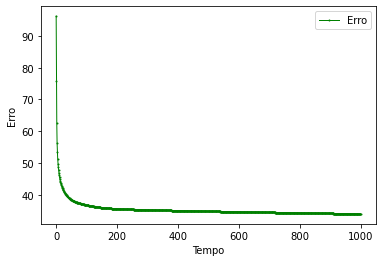

In [11]:
t = np.linspace(0,1000,1000)
plt.ylabel('Erro') 
plt.xlabel('Tempo') 
plt.plot(t, Epoca, color='g', marker='o', linewidth=1, markersize=1, label="Erro")
plt.legend(loc="upper right")

In [27]:
Epoca, W, bias = perceptron(1000, 0.1, X_test, y_test, 3, W, bias)

t = np.linspace(0,1000,1000)
plt.ylabel('Erro') 
plt.xlabel('Tempo') 
plt.plot(t, Epoca, color='g', marker='o', linewidth=1, markersize=1, label="Erro")
plt.legend(loc="upper right")

[[1. 0. 0.]]


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')